In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Capstone - HR /Output1 (1).csv')
#data = pd.read_csv('/content/gdrive/MyDrive/Capstone - HR /Output1 (1).csv')

In [ ]:
data.columns

Index(['Total_Experience', 'Relevant_experience', 'Department', 'Role',
       'Industry', 'Organization', 'Designation', 'Education',
       'Graduation_Specialization', 'University_Grad', 'Current_CTC',
       'Inhand_Offer', 'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Certifications', 'International_degree_any', 'Expected_CTC',
       'Candidate_in_demand'],
      dtype='object')

In [ ]:
data.loc[((data["Inhand_Offer"]=='Y')&(data["University_Grad"]=="Did not do graduation")),:]['Certifications']

count    1820.000000
mean        1.858242
std         1.437621
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Certifications, dtype: float64

In [ ]:
df.isnull().sum()

Total_Experience             0
Relevant_experience          0
Department                   0
Role                         0
Industry                     0
Organization                 0
Designation                  0
Education                    0
Graduation_Specialization    0
University_Grad              0
Current_CTC                  0
Inhand_Offer                 0
Last_Appraisal_Rating        0
No_Of_Companies_worked       0
Certifications               0
International_degree_any     0
Expected_CTC                 0
Candidate_in_demand          0
dtype: int64

#### Removing Candidate in demand column

In [ ]:
df.drop(columns=["Candidate_in_demand"],axis=1,inplace=True)

In [ ]:
df["Inhand_Offer"]=df["Inhand_Offer"].map({'N':0,'Y':1})
#df["Inhand_Offer"].unique()

In [ ]:
df.groupby(["Education","Last_Appraisal_Rating"]).agg({"Last_Appraisal_Rating":"count"})

Last_Appraisal_Rating
Education  Last_Appraisal_Rating                       
Doctorate  A                                       1168
           B                                       1331
           C                                       1237
           D                                       1239
           Fresher                                  220
           Key_Performer                           1090
Grad       A                                       1126
           B                                       1411
           C                                       1226
           D                                       1211
           Fresher                                  237
           Key_Performer                            998
PG         A                                       1202
           B                                       1364
           C                                       1200
           D                                       1230
           Fresher                                  233
           Key_Performer                           1097
Under Grad A                                       1175
           B                                       1395
           C                                       1149
           D                                       1237
           Fresher                                  218
           Key_Performer                           1006

In [ ]:
df.Education.unique()

array(['PG', 'Doctorate', 'Grad', 'Under Grad'], dtype=object)

In [ ]:
df.replace(to_replace="Sr. Business Analyst",value="Senior Business Analyst",inplace=True)
df.replace(to_replace='Sr.Manager',value="Senior Manager",inplace=True)
df.replace(to_replace='Analytics/BI',value="Analytics or BI",inplace=True)
df.replace(to_replace='IT-Software',value="IT and Software",inplace=True)

In [ ]:
cat_col = df.select_dtypes(exclude=[np.number]).columns.tolist()
cont_col = df.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
df.columns

Index(['Total_Experience', 'Relevant_experience', 'Department', 'Role',
       'Industry', 'Organization', 'Designation', 'Education',
       'Graduation_Specialization', 'University_Grad', 'Current_CTC',
       'Inhand_Offer', 'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Certifications', 'International_degree_any', 'Expected_CTC'],
      dtype='object')

### Analysis begins from here

In [ ]:
df2 = df.copy()

In [ ]:
df = df2.copy()

In [ ]:
Exp = df.loc[df["Department"]!='Fresher',:].copy()
Fresher = df.loc[df["Department"]=='Fresher',:].copy()

In [ ]:
Exp.columns

Index(['Total_Experience', 'Relevant_experience', 'Department', 'Role',
       'Industry', 'Organization', 'Designation', 'Education',
       'Graduation_Specialization', 'University_Grad', 'Current_CTC',
       'Inhand_Offer', 'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Certifications', 'International_degree_any', 'Expected_CTC'],
      dtype='object')

In [ ]:
data1 = Exp[['Total_Experience','Current_CTC', 'Relevant_experience', 'Department', 'Role','Industry', 'Organization', 'Designation', 'Education',"Expected_CTC"]]

In [ ]:
print(Exp.shape)
print(Fresher.shape)

(24092, 17)
(908, 17)


In [ ]:
#df.drop(columns=['University_Grad'],axis=1,inplace=True)

#### Analysing the data for experienced

#### One-hot encoding

In [ ]:
def ohe(df):
  cat_col = df.select_dtypes(exclude=[np.number]).columns.tolist()
  df = pd.get_dummies(data=df,columns=cat_col)
  new = []
  for i in df.columns:
    new.append("_".join(i.split()))
  for (i,j) in zip(df.columns,new):
    df.rename(columns={i:j},inplace=True)
  return df,list(df.columns)

In [ ]:
df,cols_list=ohe(df)

In [ ]:
cols_list

['Total_Experience',
 'Relevant_experience',
 'Current_CTC',
 'Inhand_Offer',
 'No_Of_Companies_worked',
 'Certifications',
 'International_degree_any',
 'Expected_CTC',
 'Department_Accounts',
 'Department_Analytics_or_BI',
 'Department_Banking',
 'Department_Education',
 'Department_Engineering',
 'Department_Fresher',
 'Department_HR',
 'Department_Healthcare',
 'Department_IT_and_Software',
 'Department_Marketing',
 'Department_Others',
 'Department_Sales',
 'Department_Top_Management',
 'Role_Analyst',
 'Role_Area_Sales_Manager',
 'Role_Associate',
 'Role_Bio_statistician',
 'Role_Business_Analyst',
 'Role_CEO',
 'Role_Consultant',
 'Role_Data_scientist',
 'Role_Financial_Analyst',
 'Role_Fresher',
 'Role_Head',
 'Role_Lab_Executuve',
 'Role_Others',
 'Role_Principal_Analyst',
 'Role_Professor',
 'Role_Project_Manager',
 'Role_Research_Scientist',
 'Role_Researcher',
 'Role_Sales_Execituve',
 'Role_Sales_Manager',
 'Role_Scientist',
 'Role_Senior_Analyst',
 'Role_Senior_Business_A

In [ ]:
cols = ['Department_Others','Role_Others','Industry_Others','Organization_O','Education_Grad','Graduation_Specialization_Did_not_do_graduation','Designation_Others','Last_Appraisal_Rating_D','Graduation_Specialization_Others']

#### Columns to be dropped as drop_first was kept False

In [ ]:
def cols_to_be_dropped(df,cols):
  df.drop(columns=cols,axis=1,inplace=True)
  return df

In [ ]:
cols1 = ['Department_Fresher', 'Role_Fresher', 'Organization_Fresher','Designation_Fresher', 'Industry_Fresher']

In [ ]:
cols2 = ['Graduation_Specialization_Arts']

In [ ]:
#df=cols_to_be_dropped(df,cols)
#df=cols_to_be_dropped(df,cols1)
df=cols_to_be_dropped(df,cols2)

### VIF

In [ ]:
import statsmodels.formula.api as sm
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    VIF = []
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        VIF.append(vif)
        #print (xvar_names[i], " VIF = " , vif)
    df = pd.DataFrame(index=xvar_names,data=VIF,columns=["VIF"])
    return df.sort_values(by='VIF',ascending=False)

In [ ]:
input_data = df.drop(columns=["Expected_CTC"],axis=1)

In [ ]:
input_data.shape

(25000, 100)

In [ ]:
VIF_df = vif_cal(input_data)

In [ ]:
VIF_df.loc[VIF_df["VIF"]==np.inf].shape

(0, 1)

In [ ]:
VIF_df.loc[VIF_df["VIF"]==np.inf].index

Index([], dtype='object')

In [ ]:
VIF_df.sort_values(by="VIF",ascending=False).head(10)

VIF
Total_Experience               5.41
Current_CTC                    5.36
Last_Appraisal_Rating_Fresher  3.63
Education_Under_Grad           3.04
Department_Analytics_or_BI     2.09
Department_Marketing           2.05
Department_Top_Management      1.99
Department_Healthcare          1.95
Organization_M                 1.95
Organization_J                 1.94

#### Statsmodels

In [ ]:
def model(target,features,df):
  import statsmodels.formula.api as sm
  formula = str(target)+"~"+"+".join(features)
  model = sm.ols(formula,df).fit()
  return model

In [ ]:
#features = Exp.drop(columns=["Expected_CTC"],axis=1).columns.tolist()
features1 = df.drop(columns=["Expected_CTC"],axis=1).columns.tolist()

In [ ]:
model=model('Expected_CTC',features1,df)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 5.942e+04
Date:                Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:18:52   Log-Likelihood:            -3.1609e+05
No. Observations:               25000   AIC:                         6.324e+05
Df Residuals:                   24899   BIC:                         6.332e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -2.142e+05   4385.994    -48.829      0.000   -2.23e+05   -2.06e+05
Total_Experience                      -1869.7003    147.842    -12.647      0.000   -2159.479   -1579.922
Relevant_experience                      27.7898    107.085      0.260      0.795    -182.104     237.684
Current_CTC                               1.2756      0.001   1066.873      0.000       1.273       1.278
Inhand_Offer                           5.973e+04   1272.516     46.939      0.000    5.72e+04    6.22e+04
No_Of_Companies_worked                   12.4985    324.004      0.039      0.969    -622.569     647.566
Certifications                         -500.6829    488.373     -1.025      0.305   -1457.924     456.558
International_degree_any               1234.3331   2360.172      0.523      0.601   -3391.744    5860.410
Department_Accounts                    4908.8225   2801.141      1.752      0.080    -581.580    1.04e+04
Department_Analytics_or_BI             1038.0502   2364.560      0.439      0.661   -3596.627    5672.728
Department_Banking                     1887.9618   2319.662      0.814      0.416   -2658.713    6434.637
Department_Education                   4763.6088   2322.265      2.051      0.040     211.831    9315.387
Department_Engineering                 -735.7635   2305.845     -0.319      0.750   -5255.357    3783.830
Department_HR                          1864.4294   2285.740      0.816      0.415   -2615.757    6344.616
Department_Healthcare                  1422.6082   2323.330      0.612      0.540   -3131.257    5976.473
Department_IT_and_Software            -1358.8887   2826.786     -0.481      0.631   -6899.558    4181.780
Department_Marketing                   3462.5702   2174.492      1.592      0.111    -799.563    7724.703
Department_Sales                        287.5772   2289.573      0.126      0.900   -4200.122    4775.276
Department_Top_Management             -2564.1311   2605.517     -0.984      0.325   -7671.100    2542.837
Role_Analyst                           2176.7803   2395.878      0.909      0.364   -2519.282    6872.843
Role_Area_Sales_Manager                7349.2654   6979.310      1.053      0.292   -6330.595     2.1e+04
Role_Associate                         3607.5835   3246.060      1.111      0.266   -2754.887    9970.054
Role_Bio_statistician                  4148.9760   2385.777      1.739      0.082    -527.289    8825.241
Role_Business_Analyst                  1937.9561   2483.534      0.780      0.435   -2929.918    6805.831
Role_CEO                              -2505.5571   3025.189     -0.828      0.408   -8435.107    3423.992
Role_Consultant                        3549.3544   2432.980      1.459      0.145   -1219.431    8318.140
Role_Data

### Significant features

In [ ]:
def generating_coef_table(lr_mod):
  coef_table =pd.read_html(lr_mod.summary2().as_html())[1]
  coef_table.drop(0,axis=0,inplace=True)
  coef_table.columns = ["var_name","coef","std_err","t_stat","p_val","cof_25","conf_975"]
  sig_features = list(coef_table.loc[coef_table["p_val"].astype('float') <= 0.05, "var_name"].values)
  sig_features = [x for x in sig_features if x != "Intercept"]
  sig_coef=coef_table.loc[coef_table["var_name"].isin(sig_features),["var_name","coef"]]
  sig_coef["coef"]=sig_coef["coef"].astype('float')
  return sig_coef
  import seaborn as sns
  import matplotlib.pyplot as plt
  plt.figure(figsize=(12,12))
  p=sns.barplot(y=sig_coef["var_name"],x=sig_coef["coef"],order=sig_coef.sort_values(by="coef",ascending=False).var_name)
  p.set_title("Coefficients of the significant features")
  p.set_xlabel("Coefficients")
  p.set_ylabel("Name of the features")
  sns.set_style('darkgrid')
  plt.show()
  #return sig_features

In [ ]:
sig_coef=generating_coef_table(model)
sig_coef.var_name.unique()

array(['Total_Experience', 'Current_CTC', 'Department_Accounts',
       'Department_HR', 'Department_IT_and_Software', 'Role_Associate',
       'Role_Head', 'Role_Principal_Analyst',
       'Role_Senior_Business_Analyst', 'Industry_Automobile',
       'Industry_Aviation', 'Industry_Retail', 'Industry_Training',
       'Designation_Assistant_Manager', 'Designation_Consultant',
       'Designation_Director', 'Designation_Medical_Officer',
       'Designation_Others', 'Designation_Research_Scientist',
       'Designation_Web_Designer', 'Education_Doctorate',
       'Education_Grad', 'Education_PG', 'Education_Under_Grad'],
      dtype=object)

In [ ]:
sig_coef=generating_coef_table(model)
sig_coef.sort_values(by="coef",ascending=False).head()

var_name         coef
101  Last_Appraisal_Rating_Key_Performer  221528.9458
98               Last_Appraisal_Rating_A  206101.6371
85                   Education_Doctorate  196761.5201
99               Last_Appraisal_Rating_B  180490.4844
86                          Education_PG   78820.2561

In [ ]:
sig_coef.loc[sig_coef["var_name"]=="Current_CTC",["coef"]]

coef
4  1.2815

#### Model performance

In [ ]:
X = Exp.drop(columns=["Expected_CTC"],axis=1)
Y = Exp["Expected_CTC"]

In [ ]:
from sklearn.metrics import r2_score
def linear_regression(X,Y,model_name):
  from sklearn.linear_model import LinearRegression
  from sklearn.model_selection import train_test_split
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
  lr = LinearRegression()
  lr.fit(X_train,Y_train)
  train_pred = lr.predict(X_train)
  test_pred = lr.predict(X_test)
  from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
  rmse_train = mean_squared_error(train_pred,Y_train,squared=False)
  mae_train = mean_absolute_error(train_pred,Y_train)
  mape_train = mean_absolute_percentage_error(train_pred,Y_train)
  r_sq_train = r2_score(train_pred,Y_train)
  rmse_test = mean_squared_error(test_pred,Y_test,squared=False)
  mae_test = mean_absolute_error(test_pred,Y_test)
  mape_test = mean_absolute_percentage_error(test_pred,Y_test)
  r_sq_test = r2_score(test_pred,Y_test)
  Metrics1 = pd.DataFrame(index=["Train R-squared","Test R-squared"],columns=[model_name],data=[r_sq_train,r_sq_test])
  return Metrics1

In [ ]:
Metrics = pd.DataFrame()

In [ ]:
Metrics=linear_regression(X,Y,"LR:with no infinite VIF")
Metrics

LR:with no infinite VIF
Train R-squared                 0.996996
Test R-squared                  0.996981

### Ridge

In [ ]:
from sklearn.linear_model import Ridge,RidgeCV

In [ ]:
ridge = Ridge(alpha=5)

In [ ]:
import statsmodels.regression.linear_model as sm1

In [ ]:
X = Exp.drop(columns=["Expected_CTC"],axis=1)
Y = Exp["Expected_CTC"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16864, 100)
(16864,)
(7228, 100)
(7228,)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
X_train_scaled = pd.DataFrame(data=ss.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=ss.transform(X_test),columns=X_test.columns)

In [ ]:
ridge.fit(X_train_scaled,Y_train)

Ridge(alpha=5)

In [ ]:
ridge_coef = pd.DataFrame(index=X_train.columns,columns=["coef"],data=ridge.coef_)

In [ ]:
ridge_coef.loc['Current_CTC',:]

coef    1.113279e+06
Name: Current_CTC, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

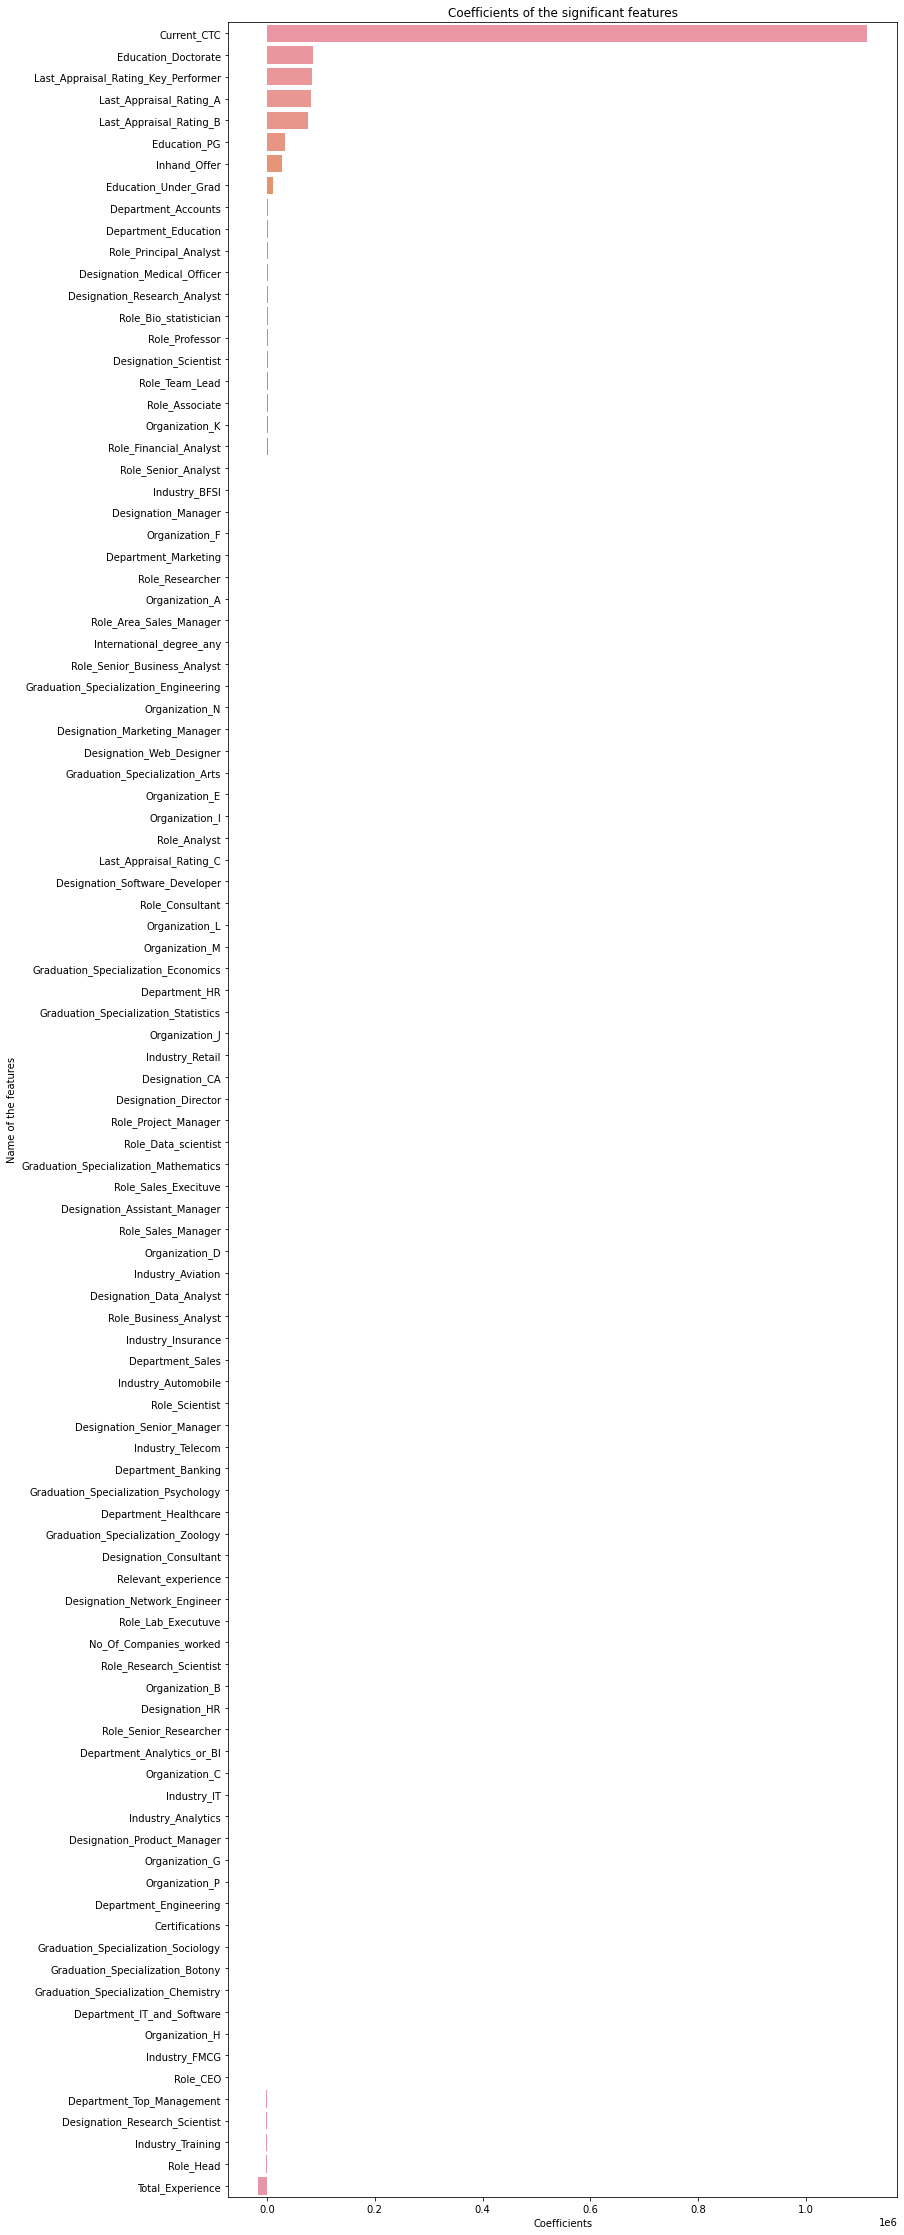

In [ ]:
plt.figure(figsize=(12,40))
p=sns.barplot(y=ridge_coef.index,x=ridge_coef["coef"],order=ridge_coef.sort_values(by="coef",ascending=False).index)
p.set_title("Coefficients of the significant features")
p.set_xlabel("Coefficients")
p.set_ylabel("Name of the features")
sns.set_style('darkgrid')
plt.show()

### Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=12)

In [ ]:
lasso.fit(X_train_scaled,Y_train)

Lasso(alpha=12)

In [ ]:
lasso_coef = pd.DataFrame(index=X_train.columns,columns=["coef"],data=lasso.coef_)

In [ ]:
lasso_coef.loc[lasso_coef["coef"]==0]

coef
Role_Lab_Executuve                 -0.0
Designation_Consultant             -0.0
Graduation_Specialization_Zoology   0.0

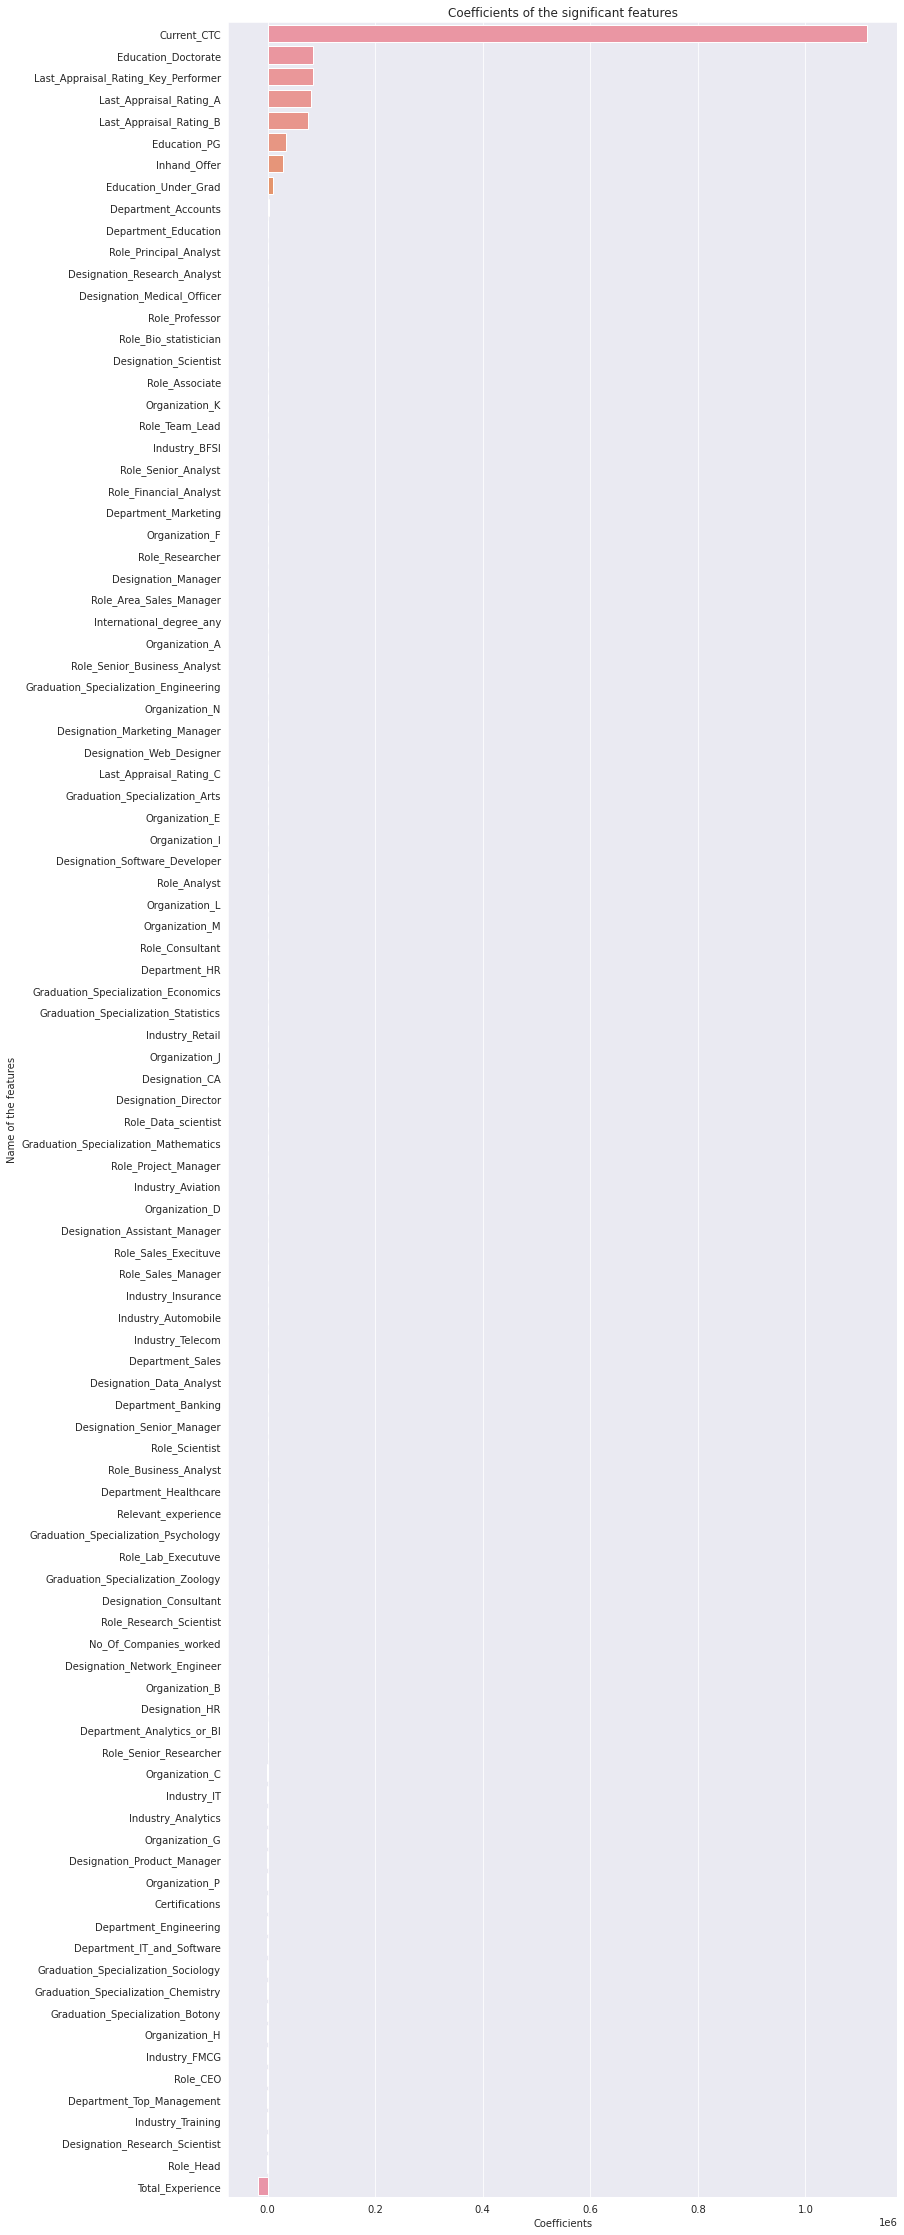

In [ ]:
plt.figure(figsize=(12,40))
p=sns.barplot(y=lasso_coef.index,x=lasso_coef["coef"],order=lasso_coef.sort_values(by="coef",ascending=False).index)
p.set_title("Coefficients of the significant features")
p.set_xlabel("Coefficients")
p.set_ylabel("Name of the features")
sns.set_style('darkgrid')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
def metrics(Y_test,test_pred):
  rmse = mean_squared_error(Y_test,test_pred,squared=False)
  mae = mean_absolute_error(Y_test,test_pred)
  mape = mean_absolute_percentage_error(Y_test,test_pred)
  return rmse,mae,mape

In [ ]:
train_pred_ridge = ridge.predict(X_train_scaled)
test_pred_ridge = ridge.predict(X_test_scaled)
rmse_train_ridge,mae_train_ridge,mape_train_ridge=metrics(train_pred_ridge,Y_train)
rmse_test_ridge,mae_test_ridge,mape_test_ridge=metrics(test_pred_ridge,Y_test)
r_sq_ridge_train = r2_score(train_pred_ridge,Y_train)
r_sq_ridge_test = r2_score(test_pred_ridge,Y_test)

In [ ]:
train_pred_lasso = lasso.predict(X_train_scaled)
test_pred_lasso = lasso.predict(X_test_scaled)

In [ ]:
rmse_train_ridge,mae_train_ridge,mape_train_ridge=metrics(train_pred_ridge,Y_train)
rmse_test_ridge,mae_test_ridge,mape_test_ridge=metrics(test_pred_ridge,Y_test)
r_sq_ridge_train = r2_score(train_pred_ridge,Y_train)
r_sq_ridge_test = r2_score(test_pred_ridge,Y_test)

In [ ]:
rmse_train_lasso,mae_train_lasso,mape_train_lasso=metrics(train_pred_lasso,Y_train)
rmse_test_lasso,mae_test_lasso,mape_test_lasso=metrics(test_pred_lasso,Y_test)
r_sq_lasso_train = r2_score(train_pred_lasso,Y_train)
r_sq_lasso_test = r2_score(test_pred_lasso,Y_test)

In [ ]:
Metrics["Ridge_scaled : alpha = 5"] = [rmse_train_ridge,rmse_test_ridge]

In [ ]:
Metrics["Lasso_scaled : alpha = 4"] = [rmse_train_lasso,rmse_test_lasso]

In [ ]:
Metrics["R-sq : Ridge"] = [r_sq_ridge_train,r_sq_ridge_test]
Metrics["R-sq : Lasso"] = [r_sq_lasso_train,r_sq_lasso_test]

In [ ]:
Metrics

LR:with no infinite VIF  Ridge_scaled : alpha = 5  \
Train R-squared                 0.996996              62021.032438   
Test R-squared                  0.996981              62213.004637   

                 Lasso_scaled : alpha = 4  R-sq : Ridge  R-sq : Lasso  
Train R-squared              62017.293644      0.996993      0.996995  
Test R-squared               62196.828295      0.996978      0.996982

### CatBoost Regressor

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor,Pool

In [ ]:
cbr = CatBoostRegressor()

In [ ]:
X = df.drop('Expected_CTC',axis=1)
Y = df['Expected_CTC']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
cat_col=df.select_dtypes(exclude=['int','float']).columns.tolist()

In [ ]:
pool_train = Pool(X_train,Y_train,cat_features=cat_col)
pool_test = Pool(X_test,Y_test,cat_features=cat_col)

In [ ]:
cbr.fit(pool_train,eval_set=pool_test,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.079809
0:	learn: 1070324.7609417	test: 1084759.0693490	best: 1084759.0693490 (0)	total: 199ms	remaining: 3m 18s
1:	learn: 993344.5159158	test: 1007238.8262516	best: 1007238.8262516 (1)	total: 342ms	remaining: 2m 50s
2:	learn: 918563.9479092	test: 931594.4710537	best: 931594.4710537 (2)	total: 492ms	remaining: 2m 43s
3:	learn: 851904.0050081	test: 864268.1206065	best: 864268.1206065 (3)	total: 616ms	remaining: 2m 33s
4:	learn: 789533.4629043	test: 801574.2334883	best: 801574.2334883 (4)	total: 716ms	remaining: 2m 22s
5:	learn: 732480.1688801	test: 744045.3058603	best: 744045.3058603 (5)	total: 836ms	remaining: 2m 18s
6:	learn: 679201.9793289	test: 689762.9302928	best: 689762.9302928 (6)	total: 936ms	remaining: 2m 12s
7:	learn: 630064.1707133	test: 639955.0791030	best: 639955.0791030 (7)	total: 1.01s	remaining: 2m 5s
8:	learn: 588223.6911223	test: 597908.3119725	best: 597908.3119725 (8)	total: 1.06s	remaining: 1m 57s
9:	learn: 546954.3534004	test: 556262.3715779	be

In [ ]:
test_pred_cbr = cbr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
def metrics(test_pred,Y_test):
  rmse = mean_squared_error(test_pred,Y_test,squared=False)
  mae = mean_absolute_error(test_pred,Y_test)
  mape = mean_absolute_percentage_error(test_pred,Y_test)
  return rmse,mae,mape

In [ ]:
rmse_cbr,mae_cbr,mape_cbr=metrics(test_pred_cbr,Y_test)

In [ ]:
Metrics = pd.DataFrame(index=['RMSE','MAE','MAPE'],columns=["CatBoostRegressor"],data=[rmse_cbr,mae_cbr,mape_cbr])

In [ ]:
Metrics 

CatBoostRegressor
RMSE       36748.371131
MAE        12898.240758
MAPE           0.011136

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=10)
rmse_cbr = []
for train_idx,test_idx in kf.split(X,Y):
  X_train,Y_train = X.iloc[train_idx],Y.iloc[train_idx]
  X_test,Y_test = X.iloc[test_idx],Y.iloc[test_idx]
  pool_train = Pool(X_train,Y_train,cat_features=cat_col)
  pool_test = Pool(X_test,Y_test,cat_features=cat_col)
  cbr.fit(pool_train,eval_set=pool_test,verbose=False)
  test_pred_cbr = cbr.predict(X_test)
  rmse_cbr.append(mean_squared_error(test_pred_cbr,Y_test,squared=False))
rmse_cbr
np.mean(rmse_cbr)

37867.16165349165

In [ ]:
rmse_cbr

[36794.35685830071,
 32727.82216203545,
 42153.66485373628,
 33953.77891764008,
 42631.34287969131,
 32607.289756259725,
 38160.360649755814,
 38061.09746875386,
 38402.67731162362,
 43179.22567711956]

#### LightGBM

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbr = LGBMRegressor()

In [ ]:
#cat_features = X.select_dtypes(exclude=np.number).columns.to_list()
#cat_idx = [X.columns.get_loc(col) for col in cat_features]

In [ ]:
#for col in cat_features:
    #X[col]=pd.Categorical(X[col])

In [ ]:
def ohe(df):
  cat_col = df.select_dtypes(exclude=[np.number]).columns.tolist()
  df = pd.get_dummies(data=df,columns=cat_col)
  new = []
  for i in df.columns:
    new.append("_".join(i.split()))
  for (i,j) in zip(df.columns,new):
    df.rename(columns={i:j},inplace=True)
  return df,list(df.columns)

In [ ]:
df,list1=ohe(df)

In [ ]:
X = df.drop("Expected_CTC",axis=1)
Y = df["Expected_CTC"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
lgbr.fit(X_train,Y_train)

LGBMRegressor()

In [ ]:
lgbr_pred = lgbr.predict(X_test)

In [ ]:
rmse_lgbr,mae_lgbr,mape_lgbr = metrics(lgbr_pred,Y_test)

In [ ]:
Metrics = pd.DataFrame(index=['RMSE','MAE','MAPE'],columns=["LGBMRegressor"],data=[rmse_lgbr,mae_lgbr,mape_lgbr])

In [ ]:
Metrics

LGBMRegressor
RMSE   36046.229220
MAE    13868.334938
MAPE       0.011746

In [ ]:
Metrics

CatBoostRegressor  LGBMRegressor
RMSE       36748.371131   36046.229220
MAE        12898.240758   13868.334938
MAPE           0.011136       0.011746

In [ ]:
kf = KFold(n_splits=10)
rmse_lgbr = []
cat_features = X.select_dtypes(exclude=np.number).columns.to_list()
cat_idx = [X.columns.get_loc(col) for col in cat_features]
for col in cat_features:
  X[col]=pd.Categorical(X[col])
for train_idx,test_idx in kf.split(X,Y):
  X_train,Y_train = X.iloc[train_idx],Y.iloc[train_idx]
  X_test,Y_test = X.iloc[test_idx],Y.iloc[test_idx]
  lgbr = lightgbm.LGBMRegressor()
  lgbr.fit(X_train,Y_train,categorical_feature=cat_idx)
  test_pred_lgbr = lgbr.predict(X_test)
  rmse_lgbr.append(mean_squared_error(test_pred_lgbr,Y_test,squared=False))
rmse_lgbr
np.mean(rmse_lgbr)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(cate

37260.913869410804

#### SHAP values

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 32.1 MB/s 


In [ ]:
#creating an object that can calculate shap values
explainer = shap.TreeExplainer(lgbr)

In [ ]:
#calculate shap values
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values,X_train,feature_names=X_train.columns,plot_type='bar')

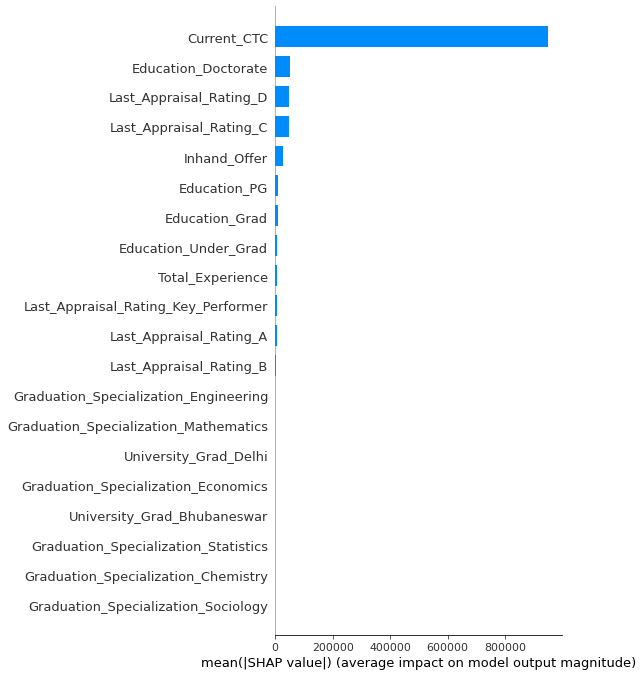

In [ ]:
shap.summary_plot(shap_values,X_train,feature_names=X_train.columns,plot_type='bar')

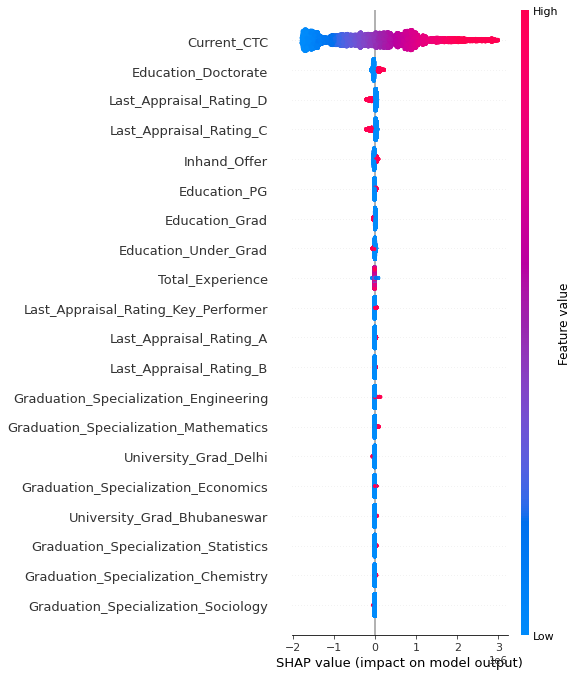

In [ ]:
#Summary plot
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)

In [ ]:
X_train.columns

Index(['Total_Experience', 'Relevant_experience', 'Current_CTC',
       'Inhand_Offer', 'No_Of_Companies_worked', 'Certifications',
       'International_degree_any', 'Department_Accounts',
       'Department_Analytics_or_BI', 'Department_Banking',
       ...
       'University_Grad_Mumbai', 'University_Grad_Nagpur',
       'University_Grad_Pune', 'University_Grad_Surat',
       'Last_Appraisal_Rating_A', 'Last_Appraisal_Rating_B',
       'Last_Appraisal_Rating_C', 'Last_Appraisal_Rating_D',
       'Last_Appraisal_Rating_Fresher', 'Last_Appraisal_Rating_Key_Performer'],
      dtype='object', length=129)

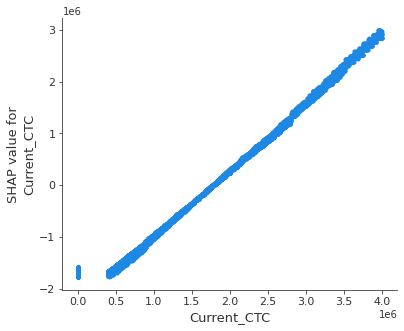

In [ ]:
#shap dependence plot
shap.dependence_plot(2, shap_values, X_train,interaction_index=None)

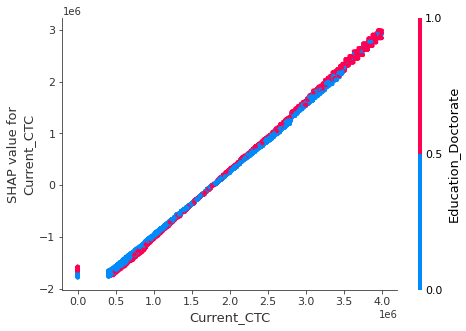

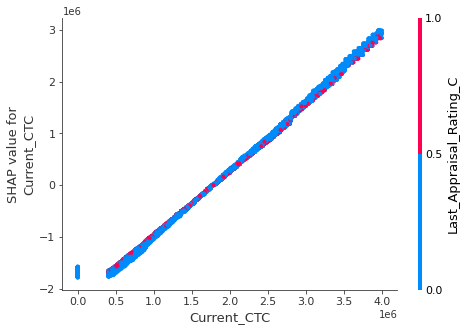

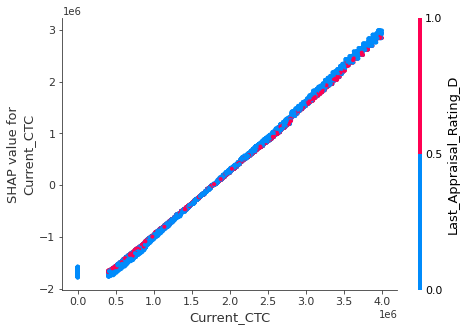

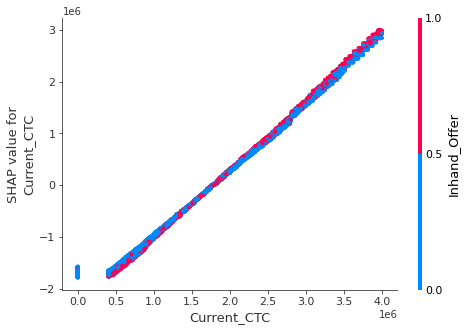

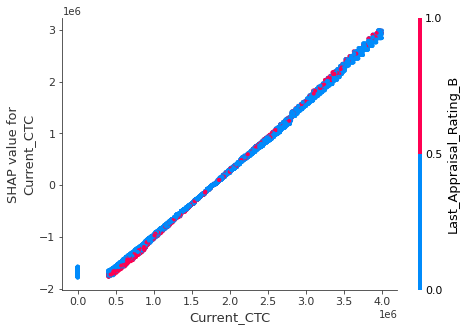

In [ ]:
# we can use shap.approximate_interactions to guess which features
# may interact with age
inds = shap.approximate_interactions("Current_CTC", shap_values, X_train)

# make plots colored by each of the top three possible interacting features
for i in range(5):
    shap.dependence_plot("Current_CTC", shap_values, X_train, interaction_index=inds[i])

In [ ]:
X_train.columns

Index(['Total_Experience', 'Relevant_experience', 'Current_CTC',
       'Inhand_Offer', 'No_Of_Companies_worked', 'Certifications',
       'International_degree_any', 'Department_Accounts',
       'Department_Analytics_or_BI', 'Department_Banking',
       ...
       'University_Grad_Mumbai', 'University_Grad_Nagpur',
       'University_Grad_Pune', 'University_Grad_Surat',
       'Last_Appraisal_Rating_A', 'Last_Appraisal_Rating_B',
       'Last_Appraisal_Rating_C', 'Last_Appraisal_Rating_D',
       'Last_Appraisal_Rating_Fresher', 'Last_Appraisal_Rating_Key_Performer'],
      dtype='object', length=129)

Trying other models

In [ ]:
#DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = Exp.drop("Expected_CTC",axis=1)
Y = Exp["Expected_CTC"]

In [ ]:
print(X.shape)
print(Y.shape)

(24092, 109)
(24092,)


In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16864, 109)
(7228, 109)
(16864,)
(7228,)


In [ ]:
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
train_pred_dtr = dtr.predict(X_train)
test_pred_dtr = dtr.predict(X_test)
rmse_train_dtr,mae_train_dtr,mape_train_dtr=metrics(Y_train,train_pred_dtr)
rmse_test_dtr,mae_test_dtr,mape_test_dtr=metrics(Y_test,test_pred_dtr)
r_sq_dtr_train = r2_score(Y_train,train_pred_dtr)
r_sq_dtr_test = r2_score(Y_test,test_pred_dtr)

In [ ]:
Metrics2 = pd.DataFrame(index=["Train_RMSE","Test_RMSE","Train_MAE","Test_MAE","R-sq_train","R-sq_test"],columns=["Decision tree : default"],data=[rmse_train_dtr,rmse_test_dtr,mae_train_dtr,mae_test_dtr,r_sq_dtr_train,r_sq_dtr_test])

In [ ]:
Metrics2

Decision tree : default
Train_RMSE                 0.000000
Test_RMSE              20106.768223
Train_MAE                  0.000000
Test_MAE                9662.810044
R-sq_train                 1.000000
R-sq_test                  0.999687

In [ ]:
#Optuna
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import optuna

In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def objective(trial,data=X,target=Y):
    max_depth=trial.suggest_int("max_depth",3,15,step=1)
    min_samples_leaf=trial.suggest_int("min_samples_leaf",170,750,step=10)
    min_samples_split=trial.suggest_int("min_samples_split",340,1500,step=10)
    cv = KFold(n_splits=10,random_state=1,shuffle=True)
    cv_scores = []
    for (train_idx,test_idx) in (cv.split(X,Y)):
      X_train,Y_train = X.iloc[train_idx],Y.iloc[train_idx]
      X_test,Y_test = X.iloc[test_idx],Y.iloc[test_idx]
      dtr = DecisionTreeRegressor(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
      dtr.fit(X_train,Y_train)
      preds = dtr.predict(X_test)
      rmse = mean_squared_error(Y_test,preds,squared=False)
      cv_scores.append(rmse)
    return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(direction="minimize",study_name="rmse-min")

[I 2022-09-09 10:58:24,939] A new study created in memory with name: rmse-min


In [ ]:
study.optimize(objective,n_trials=100)

[I 2022-09-09 10:58:25,957] Trial 0 finished with value: 143916.90531791936 and parameters: {'max_depth': 5, 'min_samples_leaf': 410, 'min_samples_split': 400}. Best is trial 0 with value: 143916.90531791936.
[I 2022-09-09 10:58:27,096] Trial 1 finished with value: 147136.84625199944 and parameters: {'max_depth': 7, 'min_samples_leaf': 510, 'min_samples_split': 930}. Best is trial 0 with value: 143916.90531791936.
[I 2022-09-09 10:58:28,137] Trial 2 finished with value: 145851.18959564093 and parameters: {'max_depth': 7, 'min_samples_leaf': 350, 'min_samples_split': 1110}. Best is trial 0 with value: 143916.90531791936.
[I 2022-09-09 10:58:29,115] Trial 3 finished with value: 156986.27166010923 and parameters: {'max_depth': 10, 'min_samples_leaf': 710, 'min_samples_split': 1220}. Best is trial 0 with value: 143916.90531791936.
[I 2022-09-09 10:58:30,240] Trial 4 finished with value: 147886.92947940328 and parameters: {'max_depth': 8, 'min_samples_leaf': 530, 'min_samples_split': 1210}.

In [ ]:
study.best_trial

FrozenTrial(number=88, values=[107910.61401684121], datetime_start=datetime.datetime(2022, 9, 9, 11, 0, 24, 652565), datetime_complete=datetime.datetime(2022, 9, 9, 11, 0, 28, 385826), params={'max_depth': 9, 'min_samples_leaf': 170, 'min_samples_split': 370}, distributions={'max_depth': IntDistribution(high=15, log=False, low=3, step=1), 'min_samples_leaf': IntDistribution(high=750, log=False, low=170, step=10), 'min_samples_split': IntDistribution(high=1500, log=False, low=340, step=10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=88, state=TrialState.COMPLETE, value=None)

In [ ]:
study.best_params

{'max_depth': 9, 'min_samples_leaf': 170, 'min_samples_split': 370}

In [ ]:
best_decision_tree = DecisionTreeRegressor(**study.best_params)

In [ ]:
best_decision_tree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=170, min_samples_split=370)

In [ ]:
train_pred_dtr = best_decision_tree.predict(X_train)
test_pred_dtr = best_decision_tree.predict(X_test)
rmse_train_dtr,mae_train_dtr,mape_train_dtr=metrics(Y_train,train_pred_dtr)
rmse_test_dtr,mae_test_dtr,mape_test_dtr=metrics(Y_test,test_pred_dtr)
r_sq_dtr_train = r2_score(Y_train,train_pred_dtr)
r_sq_dtr_test = r2_score(Y_test,test_pred_dtr)

In [ ]:
rmse_train_dtr

119336.97119386235

In [ ]:
rmse_test_dtr

122356.53616249785

In [ ]:
Metrics2["Decision tree : tuned"] = [rmse_train_dtr,rmse_test_dtr,mae_train_dtr,mae_test_dtr,r_sq_dtr_train,r_sq_dtr_test]

In [ ]:
Metrics2

Decision tree : default  Decision tree : tuned
Train_RMSE                 0.000000          119336.971194
Test_RMSE              20106.768223          122356.536162
Train_MAE                  0.000000           91302.580279
Test_MAE                9662.810044           93788.508191
R-sq_train                 1.000000               0.988909
R-sq_test                  0.999687               0.988396

In [ ]:
#RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
train_pred_rfr = rfr.predict(X_train)
test_pred_rfr = rfr.predict(X_test)
rmse_train_rfr,mae_train_rfr,mape_train_rfr=metrics(Y_train,train_pred_rfr)
rmse_test_rfr,mae_test_rfr,mape_test_rfr=metrics(Y_test,test_pred_rfr)
r_sq_rfr_train = r2_score(Y_train,train_pred_rfr)
r_sq_rfr_test = r2_score(Y_test,test_pred_rfr)

In [ ]:
Metrics2["Random forest : default"] = [rmse_train_rfr,rmse_test_rfr,mae_train_rfr,mae_test_rfr,r_sq_rfr_train,r_sq_rfr_test]

In [ ]:
Metrics2

Decision tree : default  Decision tree : tuned  \
Train_RMSE                 0.000000          119336.971194   
Test_RMSE              20106.768223          122356.536162   
Train_MAE                  0.000000           91302.580279   
Test_MAE                9662.810044           93788.508191   
R-sq_train                 1.000000               0.988909   
R-sq_test                  0.999687               0.988396   

            Random forest : default  
Train_RMSE              5444.634175  
Test_RMSE              14754.721851  
Train_MAE               3020.531226  
Test_MAE                8052.441302  
R-sq_train                 0.999977  
R-sq_test                  0.999831

In [ ]:
def objective(trial,data=X,target=Y):
    max_depth=trial.suggest_int("max_depth",3,15,step=1)
    min_samples_leaf=trial.suggest_int("min_samples_leaf",170,750,step=10)
    min_samples_split=trial.suggest_int("min_samples_split",340,1500,step=10)
    n_estimators=trial.suggest_int("n_estimators",100,1000,step=1)
    max_features=trial.suggest_categorical("max_features",choices=["auto","sqrt","log2"])
    cv = KFold(n_splits=10,random_state=1,shuffle=True)
    cv_scores = []
    for (train_idx,test_idx) in (cv.split(X,Y)):
      X_train,Y_train = X.iloc[train_idx],Y.iloc[train_idx]
      X_test,Y_test = X.iloc[test_idx],Y.iloc[test_idx]
      rfr = RandomForestRegressor(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,max_features=max_features,n_estimators=n_estimators,n_jobs=-1)
      rfr.fit(X_train,Y_train)
      preds = rfr.predict(X_test)
      rmse = mean_squared_error(Y_test,preds,squared=False)
      cv_scores.append(rmse)
    return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(direction="minimize",study_name="rmse-min")

[I 2022-09-09 11:01:11,204] A new study created in memory with name: rmse-min


In [ ]:
study.optimize(objective,n_trials=20)

[I 2022-09-09 11:02:04,534] Trial 0 finished with value: 153433.3476849945 and parameters: {'max_depth': 6, 'min_samples_leaf': 500, 'min_samples_split': 380, 'n_estimators': 125, 'max_features': 'auto'}. Best is trial 0 with value: 153433.3476849945.
[I 2022-09-09 11:05:34,274] Trial 1 finished with value: 145141.26310124775 and parameters: {'max_depth': 7, 'min_samples_leaf': 340, 'min_samples_split': 1040, 'n_estimators': 536, 'max_features': 'auto'}. Best is trial 1 with value: 145141.26310124775.
[I 2022-09-09 11:11:06,681] Trial 2 finished with value: 136318.69587940158 and parameters: {'max_depth': 6, 'min_samples_leaf': 200, 'min_samples_split': 690, 'n_estimators': 809, 'max_features': 'auto'}. Best is trial 2 with value: 136318.69587940158.
[I 2022-09-09 11:11:38,622] Trial 3 finished with value: 574617.0198610954 and parameters: {'max_depth': 7, 'min_samples_leaf': 450, 'min_samples_split': 1080, 'n_estimators': 591, 'max_features': 'sqrt'}. Best is trial 2 with value: 13631

In [ ]:
rfr_gs = RandomForestRegressor(**study.best_params)

In [ ]:
rfr_gs.fit(X_train,Y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=170, min_samples_split=580,
                      n_estimators=831)

In [ ]:
train_pred_rfr = rfr_gs.predict(X_train)
test_pred_rfr = rfr_gs.predict(X_test)
rmse_train_rfr,mae_train_rfr,mape_train_rfr=metrics(Y_train,train_pred_rfr)
rmse_test_rfr,mae_test_rfr,mape_test_rfr=metrics(Y_test,test_pred_rfr)
r_sq_rfr_train = r2_score(Y_train,train_pred_rfr)
r_sq_rfr_test = r2_score(Y_test,test_pred_rfr)

In [ ]:
Metrics2["Random forest:tuned"] = [rmse_train_rfr,rmse_test_rfr,mae_train_rfr,mae_test_rfr,r_sq_rfr_train,r_sq_rfr_test]

In [ ]:
#SVM Regressor

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
X = Exp.drop("Expected_CTC",axis=1)
Y = Exp["Expected_CTC"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
X_train_scaled = pd.DataFrame(data=ss.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=ss.transform(X_test),columns=X_test.columns)

In [ ]:
from sklearn.svm import SVR


In [ ]:
regressor = SVR(kernel = 'rbf')

In [ ]:
regressor.fit(X_train,Y_train)

SVR()

In [ ]:
train_pred_svm = regressor.predict(X_train)
test_pred_svm = regressor.predict(X_test)
rmse_train_svm,mae_train_svm,mape_train_svm=metrics(Y_train,train_pred_svm)
rmse_test_svm,mae_test_svm,mape_test_svm=metrics(Y_test,test_pred_svm)
r_sq_svm_train = r2_score(Y_train,train_pred_svm)
r_sq_svm_test = r2_score(Y_test,test_pred_svm)

In [ ]:
Metrics2["SVM:default"] = [rmse_train_svm,rmse_test_svm,mae_train_svm,mae_test_svm,r_sq_svm_train,r_sq_svm_test]

In [ ]:
Metrics2

Decision tree : default  Decision tree : tuned  \
Train_RMSE                 0.000000          119336.971194   
Test_RMSE              20106.768223          122356.536162   
Train_MAE                  0.000000           91302.580279   
Test_MAE                9662.810044           93788.508191   
R-sq_train                 1.000000               0.988909   
R-sq_test                  0.999687               0.988396   

            Random forest : default  Random forest:tuned   SVM:default  
Train_RMSE              5444.634175        131835.084370  1.130389e+06  
Test_RMSE              14754.721851        134965.854159  1.133229e+06  
Train_MAE               3020.531226         97418.771432  9.276888e+05  
Test_MAE                8052.441302         99288.284462  9.271918e+05  
R-sq_train                 0.999977             0.986464  4.843774e-03  
R-sq_test                  0.999831             0.985881  4.624398e-03

In [ ]:
#GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor()

In [ ]:
gbr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [ ]:
train_pred_gbr = gbr.predict(X_train)
test_pred_gbr = gbr.predict(X_test)
rmse_train_gbr,mae_train_gbr,mape_train_gbr=metrics(Y_train,train_pred_gbr)
rmse_test_gbr,mae_test_gbr,mape_test_gbr=metrics(Y_test,test_pred_gbr)
r_sq_gbr_train = r2_score(Y_train,train_pred_gbr)
r_sq_gbr_test = r2_score(Y_test,test_pred_gbr)

In [ ]:
Metrics2["GBR:default"] = [rmse_train_gbr,rmse_test_gbr,mae_train_gbr,mae_test_gbr,r_sq_gbr_train,r_sq_gbr_test]

In [ ]:
def objective(trial,data=X,target=Y):
  max_depth=trial.suggest_int("max_depth",3,15,step=1)
  min_samples_leaf=trial.suggest_int("min_samples_leaf",170,750,step=10)
  min_samples_split=trial.suggest_int("min_samples_split",340,1500,step=10)
  n_estimators=trial.suggest_int("n_estimators",100,1000,step=10)
  learning_rate=trial.suggest_float("learning_rate",1e-7,0.3,log=True)
  cv = KFold(n_splits=10,random_state=1,shuffle=True)
  cv_scores = []
  for (train_idx,test_idx) in (cv.split(X,Y)):
    X_train,Y_train = X.iloc[train_idx],Y.iloc[train_idx]
    X_test,Y_test = X.iloc[test_idx],Y.iloc[test_idx]
    gbr = GradientBoostingRegressor(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,n_estimators=n_estimators,
                                      learning_rate=learning_rate)
    gbr.fit(X_train,Y_train)
    preds = gbr.predict(X_test)
    rmse = mean_squared_error(Y_test,preds,squared=False)
    cv_scores.append(rmse)
  return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(direction="minimize",study_name="rmse-min")

[I 2022-09-09 12:09:02,189] A new study created in memory with name: rmse-min


In [ ]:
study.best_params

{'max_depth': 11,
 'min_samples_leaf': 220,
 'min_samples_split': 840,
 'n_estimators': 300,
 'learning_rate': 0.06613438667923759}

In [ ]:
gbr_gs = GradientBoostingRegressor(**study.best_params)

In [ ]:
gbr_gs.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.06613438667923759, max_depth=11,
                          min_samples_leaf=220, min_samples_split=840,
                          n_estimators=300)

In [ ]:
train_pred_gbr = gbr_gs.predict(X_train)
test_pred_gbr = gbr_gs.predict(X_test)
rmse_train_gbr,mae_train_gbr,mape_train_gbr=metrics(Y_train,train_pred_gbr)
rmse_test_gbr,mae_test_gbr,mape_test_gbr=metrics(Y_test,test_pred_gbr)
r_sq_gbr_train = r2_score(Y_train,train_pred_gbr)
r_sq_gbr_test = r2_score(Y_test,test_pred_gbr)

In [ ]:
Metrics2["GBR:tuned"] = [rmse_train_gbr,rmse_test_gbr,mae_train_gbr,mae_test_gbr,r_sq_gbr_train,r_sq_gbr_test]

In [ ]:
pd.set_option('display.float_format',lambda x:"{:,.2f}".format(x))
Metrics2

Decision tree : default  Decision tree : tuned  \
Train_RMSE                     0.00             119,336.97   
Test_RMSE                 20,106.77             122,356.54   
Train_MAE                      0.00              91,302.58   
Test_MAE                   9,662.81              93,788.51   
R-sq_train                     1.00                   0.99   
R-sq_test                      1.00                   0.99   

            Random forest : default  Random forest:tuned  SVM:default  \
Train_RMSE                 5,444.63           131,835.08 1,130,388.79   
Test_RMSE                 14,754.72           134,965.85 1,133,228.61   
Train_MAE                  3,020.53            97,418.77   927,688.79   
Test_MAE                   8,052.44            99,288.28   927,191.79   
R-sq_train                     1.00                 0.99         0.00   
R-sq_test                      1.00                 0.99         0.00   

            GBR:default  GBR:tuned  
Train_RMSE    23,160.15  15,903.94  
Test_RMSE     24,449.80  17,648.64  
Train_MAE     17,632.20   9,393.91  
Test_MAE      18,502.14  10,378.03  
R-sq_train         1.00       1.00  
R-sq_test          1.00       1.00

In [ ]:
#XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgbr = xgb.XGBRegressor()

In [ ]:
xgbr.fit(X_train,Y_train)

[13:37:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
train_pred_xgb = xgbr.predict(X_train)
test_pred_xgb = xgbr.predict(X_test)
rmse_train_xgb,mae_train_xgb,mape_train_xgb=metrics(Y_train,train_pred_xgb)
rmse_test_xgb,mae_test_xgb,mape_test_xgb=metrics(Y_test,test_pred_xgb)
r_sq_xgb_train = r2_score(Y_train,train_pred_xgb)
r_sq_xgb_test = r2_score(Y_test,test_pred_xgb)

In [ ]:
Metrics2["XGB:default"] = [rmse_train_xgb,rmse_test_xgb,mae_train_xgb,mae_test_xgb,r_sq_xgb_train,r_sq_xgb_test]

In [ ]:
Metrics2

Decision tree : default  Decision tree : tuned  \
Train_RMSE                     0.00             119,336.97   
Test_RMSE                 20,106.77             122,356.54   
Train_MAE                      0.00              91,302.58   
Test_MAE                   9,662.81              93,788.51   
R-sq_train                     1.00                   0.99   
R-sq_test                      1.00                   0.99   

            Random forest : default  Random forest:tuned  SVM:default  \
Train_RMSE                 5,444.63           131,835.08 1,130,388.79   
Test_RMSE                 14,754.72           134,965.85 1,133,228.61   
Train_MAE                  3,020.53            97,418.77   927,688.79   
Test_MAE                   8,052.44            99,288.28   927,191.79   
R-sq_train                     1.00                 0.99         0.00   
R-sq_test                      1.00                 0.99         0.00   

            GBR:default  GBR:tuned  XGB:default  
Train_RMSE    23,160.15  15,903.94    23,201.27  
Test_RMSE     24,449.80  17,648.64    24,663.62  
Train_MAE     17,632.20   9,393.91    17,673.11  
Test_MAE      18,502.14  10,378.03    18,774.26  
R-sq_train         1.00       1.00         1.00  
R-sq_test          1.00       1.00         1.00

In [ ]:
def objective(trial,data=X,target=Y):
  max_depth=trial.suggest_int("max_depth",3,15,step=1)
  min_samples_leaf=trial.suggest_int("min_samples_leaf",170,750,step=10)
  min_samples_split=trial.suggest_int("min_samples_split",340,1500,step=10)
  n_estimators=trial.suggest_int("n_estimators",500,1000,step=10)
  learning_rate=trial.suggest_float("learning_rate",1e-7,0.3,log=True)
  cv = KFold(n_splits=10,random_state=1,shuffle=True)
  cv_scores = []
  for (train_idx,test_idx) in (cv.split(X,Y)):
    X_train,Y_train = X.iloc[train_idx],Y.iloc[train_idx]
    X_test,Y_test = X.iloc[test_idx],Y.iloc[test_idx]
    xgbr = xgb.XGBRegressor(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,n_estimators=n_estimators,
                            learning_rate=learning_rate)
    xgbr.fit(X_train,Y_train,eval_set=[(X_test,Y_test)],early_stopping_rounds=100)
    preds = xgbr.predict(X_test)
    rmse = mean_squared_error(Y_test,preds,squared=False)
    cv_scores.append(rmse)
  return np.mean(cv_scores)

In [ ]:
study_xgb = optuna.create_study(direction="minimize",study_name="rmse-min")

[I 2022-09-09 14:01:26,597] A new study created in memory with name: rmse-min


In [ ]:
study_xgb.optimize(objective,n_trials=20)

Streaming output truncated to the last 5000 lines.
[612]	validation_0-rmse:2.13816e+06
[613]	validation_0-rmse:2.13752e+06
[614]	validation_0-rmse:2.13689e+06
[615]	validation_0-rmse:2.13625e+06
[616]	validation_0-rmse:2.13562e+06
[617]	validation_0-rmse:2.13498e+06
[618]	validation_0-rmse:2.13435e+06
[619]	validation_0-rmse:2.13372e+06
[620]	validation_0-rmse:2.13308e+06
[621]	validation_0-rmse:2.13245e+06
[622]	validation_0-rmse:2.13181e+06
[623]	validation_0-rmse:2.13118e+06
[624]	validation_0-rmse:2.13055e+06
[625]	validation_0-rmse:2.12992e+06
[626]	validation_0-rmse:2.12928e+06
[627]	validation_0-rmse:2.12865e+06
[628]	validation_0-rmse:2.12802e+06
[629]	validation_0-rmse:2.12739e+06
[630]	validation_0-rmse:2.12676e+06
[631]	validation_0-rmse:2.12612e+06
[632]	validation_0-rmse:2.12549e+06
[633]	validation_0-rmse:2.12486e+06
[634]	validation_0-rmse:2.12423e+06
[635]	validation_0-rmse:2.1236e+06
[636]	validation_0-rmse:2.12297e+06
[637]	validation_0-rmse:2.12234e+06
[638]	validati

[I 2022-09-09 14:07:19,370] Trial 0 finished with value: 2030697.763800831 and parameters: {'max_depth': 3, 'min_samples_leaf': 700, 'min_samples_split': 1090, 'n_estimators': 800, 'learning_rate': 0.0002998212552752152}. Best is trial 0 with value: 2030697.763800831.


Streaming output truncated to the last 5000 lines.
[822]	validation_0-rmse:2.55554e+06
[823]	validation_0-rmse:2.55552e+06
[824]	validation_0-rmse:2.55551e+06
[825]	validation_0-rmse:2.5555e+06
[826]	validation_0-rmse:2.55549e+06
[827]	validation_0-rmse:2.55547e+06
[828]	validation_0-rmse:2.55546e+06
[829]	validation_0-rmse:2.55545e+06
[14:12:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.59958e+06
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:2.59957e+06
[2]	validation_0-rmse:2.59956e+06
[3]	validation_0-rmse:2.59954e+06
[4]	validation_0-rmse:2.59953e+06
[5]	validation_0-rmse:2.59952e+06
[6]	validation_0-rmse:2.59951e+06
[7]	validation_0-rmse:2.59949e+06
[8]	validation_0-rmse:2.59948e+06
[9]	validation_0-rmse:2.59947e+06
[10]	validation_0-rmse:2.59945e+06
[11]	validation_0-rmse:2.59944e+06
[12]	validation_0-rmse:2.59943e+06
[13]	validation_0-rmse:2

[I 2022-09-09 14:18:34,486] Trial 1 finished with value: 2565499.314999533 and parameters: {'max_depth': 9, 'min_samples_leaf': 280, 'min_samples_split': 400, 'n_estimators': 830, 'learning_rate': 4.932362908630557e-06}. Best is trial 0 with value: 2030697.763800831.


[14:18:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.59315e+06
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:2.58545e+06
[2]	validation_0-rmse:2.57778e+06
[3]	validation_0-rmse:2.57014e+06
[4]	validation_0-rmse:2.56251e+06
[5]	validation_0-rmse:2.55491e+06
[6]	validation_0-rmse:2.54733e+06
[7]	validation_0-rmse:2.53977e+06
[8]	validation_0-rmse:2.53224e+06
[9]	validation_0-rmse:2.52472e+06
[10]	validation_0-rmse:2.51724e+06
[11]	validation_0-rmse:2.50977e+06
[12]	validation_0-rmse:2.50232e+06
[13]	validation_0-rmse:2.4949e+06
[14]	validation_0-rmse:2.4875e+06
[15]	validation_0-rmse:2.48013e+06
[16]	validation_0-rmse:2.47277e+06
[17]	validation_0-rmse:2.46544e+06
[18]	validation_0-rmse:2.45812e+06
[19]	validation_0-rmse:2.45083e+06
[20]	validation_0-rmse:2.44356e+06
[21]	validation_0-rmse:2.43632e+06
[22]	validation_0-rmse:2.42909e+06
[23]	validatio

[I 2022-09-09 14:25:35,364] Trial 2 finished with value: 658219.3430590144 and parameters: {'max_depth': 8, 'min_samples_leaf': 580, 'min_samples_split': 840, 'n_estimators': 460, 'learning_rate': 0.002981716669778051}. Best is trial 2 with value: 658219.3430590144.


[14:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.60086e+06
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:2.60086e+06
[2]	validation_0-rmse:2.60086e+06
[3]	validation_0-rmse:2.60086e+06
[4]	validation_0-rmse:2.60086e+06
[5]	validation_0-rmse:2.60086e+06
[6]	validation_0-rmse:2.60086e+06
[7]	validation_0-rmse:2.60086e+06
[8]	validation_0-rmse:2.60086e+06
[9]	validation_0-rmse:2.60086e+06
[10]	validation_0-rmse:2.60086e+06
[11]	validation_0-rmse:2.60086e+06
[12]	validation_0-rmse:2.60086e+06
[13]	validation_0-rmse:2.60086e+06
[14]	validation_0-rmse:2.60086e+06
[15]	validation_0-rmse:2.60086e+06
[16]	validation_0-rmse:2.60086e+06
[17]	validation_0-rmse:2.60086e+06
[18]	validation_0-rmse:2.60086e+06
[19]	validation_0-rmse:2.60086e+06
[20]	validation_0-rmse:2.60086e+06
[21]	validation_0-rmse:2.60086e+06
[22]	validation_0-rmse:2.60086e+06
[23]	validat

[W 2022-09-09 14:28:11,752] Trial 3 failed because of the following error: KeyboardInterrupt()
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-273-f398fa28d888>", line 14, in objective
    xgbr.fit(X_train,Y_train,eval_set=[(X_test,Y_test)],early_stopping_rounds=100)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 1109, in update
    dtrain.handle))
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
best_xgb = xgb.XGBRegressor(**study_xgb.best_params)

In [ ]:
best_xgb.fit(X_train,Y_train)

[14:28:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.002981716669778051, max_depth=8,
             min_samples_leaf=580, min_samples_split=840, n_estimators=460)

In [ ]:
train_pred_xgb = best_xgb.predict(X_train)
test_pred_xgb = best_xgb.predict(X_test)
rmse_train_xgb,mae_train_xgb,mape_train_xgb=metrics(Y_train,train_pred_xgb)
rmse_test_xgb,mae_test_xgb,mape_test_xgb=metrics(Y_test,test_pred_xgb)
r_sq_xgb_train = r2_score(Y_train,train_pred_xgb)
r_sq_xgb_test = r2_score(Y_test,test_pred_xgb)

In [ ]:
Metrics2["XGB:tuned"] = [rmse_train_xgb,rmse_test_xgb,mae_train_xgb,mae_test_xgb,r_sq_xgb_train,r_sq_xgb_test]

In [ ]:
Metrics2

Decision tree : default  Decision tree : tuned  \
Train_RMSE                     0.00             119,336.97   
Test_RMSE                 20,106.77             122,356.54   
Train_MAE                      0.00              91,302.58   
Test_MAE                   9,662.81              93,788.51   
R-sq_train                     1.00                   0.99   
R-sq_test                      1.00                   0.99   

            Random forest : default  Random forest:tuned  SVM:default  \
Train_RMSE                 5,444.63           131,835.08 1,130,388.79   
Test_RMSE                 14,754.72           134,965.85 1,133,228.61   
Train_MAE                  3,020.53            97,418.77   927,688.79   
Test_MAE                   8,052.44            99,288.28   927,191.79   
R-sq_train                     1.00                 0.99         0.00   
R-sq_test                      1.00                 0.99         0.00   

            GBR:default  GBR:tuned  XGB:default  XGB:tuned  
Train_RMSE    23,160.15  15,903.94    23,201.27 657,886.86  
Test_RMSE     24,449.80  17,648.64    24,663.62 661,544.28  
Train_MAE     17,632.20   9,393.91    17,673.11 587,236.21  
Test_MAE      18,502.14  10,378.03    18,774.26 590,722.19  
R-sq_train         1.00       1.00         1.00       0.66  
R-sq_test          1.00       1.00         1.00       0.66

In [ ]:
#LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
Exp = df.loc[df["Department"]!='Fresher',:].copy()

In [ ]:
X = Exp.drop("Expected_CTC",axis=1)
Y = Exp["Expected_CTC"]

In [ ]:
## Handling categorical features in lightGBM
cat_features = X.select_dtypes(exclude=np.number).columns.to_list()
cat_idx = [X.columns.get_loc(col) for col in cat_features]

In [ ]:
for col in cat_features:
    X[col]=pd.Categorical(X[col])

In [ ]:
lgbr = lgb.LGBMRegressor()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
lgbr.fit(X_train,Y_train,categorical_feature=cat_idx)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMRegressor()

In [ ]:
train_pred_lgbr = lgbr.predict(X_train)
test_pred_lgbr = lgbr.predict(X_test)
rmse_train_lgbr,mae_train_lgbr,mape_train_lgbr=metrics(Y_train,train_pred_lgbr)
rmse_test_lgbr,mae_test_lgbr,mape_test_lgbr=metrics(Y_test,test_pred_lgbr)
r_sq_lgbr_train = r2_score(Y_train,train_pred_lgbr)
r_sq_lgbr_test = r2_score(Y_test,test_pred_lgbr)

In [ ]:
Metrics2["LightGBM:default"] = [rmse_train_lgbr,rmse_test_lgbr,mae_train_lgbr,mae_test_lgbr,r_sq_lgbr_train,r_sq_lgbr_test]

In [ ]:
Metrics2.T

Train_RMSE    Test_RMSE  Train_MAE   Test_MAE  \
Decision tree : default         0.00    20,106.77       0.00   9,662.81   
Decision tree : tuned     119,336.97   122,356.54  91,302.58  93,788.51   
Random forest : default     5,444.63    14,754.72   3,020.53   8,052.44   
Random forest:tuned       131,835.08   134,965.85  97,418.77  99,288.28   
SVM:default             1,130,388.79 1,133,228.61 927,688.79 927,191.79   
GBR:default                23,160.15    24,449.80  17,632.20  18,502.14   
GBR:tuned                  15,903.94    17,648.64   9,393.91  10,378.03   
XGB:default                23,201.27    24,663.62  17,673.11  18,774.26   
XGB:tuned                 657,886.86   661,544.28 587,236.21 590,722.19   
LightGBM:default           10,687.54    12,019.16   8,017.43   8,747.10   

                         R-sq_train  R-sq_test  
Decision tree : default        1.00       1.00  
Decision tree : tuned          0.99       0.99  
Random forest : default        1.00       1.00  
Random forest:tuned            0.99       0.99  
SVM:default                    0.00       0.00  
GBR:default                    1.00       1.00  
GBR:tuned                      1.00       1.00  
XGB:default                    1.00       1.00  
XGB:tuned                      0.66       0.66  
LightGBM:default               1.00       1.00

In [ ]:
def objective(trial,data=X,target=Y):
    n_estimators=trial.suggest_int("n_estimators",100,500,step=10)
    learning_rate=trial.suggest_float("learning_rate",1e-7,0.8,log=True)
    max_depth=trial.suggest_int("max_depth",-1,12,step=1)
    min_split_gain=trial.suggest_float("min_split_gain",0.0001,1.5,log=True)
    min_child_weight=trial.suggest_int("min_child_weight",1,15,step=1)
    gamma=trial.suggest_float("gamma",1e-5,0.5,log=True)
    subsample=trial.suggest_float("subsample",0.5,1,log=True)
    colsample_bytree=trial.suggest_float("colsample_bytree",0.5,1,log=True)
    reg_lambda=trial.suggest_int("reg_lambda",0,50,step=1)
    reg_alpha=trial.suggest_int("reg_alpha",0,50,step=1)
    cv = KFold(n_splits=10,random_state=1,shuffle=True)
    cv_scores = []
    for (train_idx,test_idx) in (cv.split(X,Y)):
      X_train,Y_train = X.iloc[train_idx],Y.iloc[train_idx]
      X_test,Y_test = X.iloc[test_idx],Y.iloc[test_idx]
      lgbm = lgb.LGBMRegressor(n_estimators=n_estimators,learning_rate=learning_rate,
                            max_depth=max_depth,min_child_weight=min_child_weight,gamma=gamma,
                            subsample=subsample,colsample_bytree=colsample_bytree,reg_lambda=reg_lambda,
                            reg_alpha=reg_alpha,min_split_gain=min_split_gain)
      lgbm.fit(X_train,Y_train,eval_set=[(X_test,Y_test)],early_stopping_rounds=100,categorical_feature=cat_idx)
      preds = lgbm.predict(X_test)
      rmse = mean_squared_error(Y_test,preds,squared=False)
      cv_scores.append(rmse)
    return np.mean(cv_scores)

In [ ]:
study_lgb = optuna.create_study(direction="minimize",study_name="rmse-min")

[I 2022-09-09 14:30:37,672] A new study created in memory with name: rmse-min


In [ ]:
study_lgb.optimize(objective,n_trials=20)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30001e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29981e+12
[3]	valid_0's l2: 1.29961e+12
[4]	valid_0's l2: 1.29941e+12
[5]	valid_0's l2: 1.29921e+12
[6]	valid_0's l2: 1.29902e+12
[7]	valid_0's l2: 1.29882e+12
[8]	valid_0's l2: 1.29862e+12
[9]	valid_0's l2: 1.29842e+12
[10]	valid_0's l2: 1.29822e+12
[11]	valid_0's l2: 1.29802e+12
[12]	valid_0's l2: 1.29783e+12
[13]	valid_0's l2: 1.29763e+12
[14]	valid_0's l2: 1.29743e+12
[15]	valid_0's l2: 1.29723e+12
[16]	valid_0's l2: 1.29703e+12
[17]	valid_0's l2: 1.29684e+12
[18]	valid_0's l2: 1.29664e+12
[19]	valid_0's l2: 1.29644e+12
[20]	valid_0's l2: 1.29624e+12
[21]	valid_0's l2: 1.29604e+12
[22]	valid_0's l2: 1.29585e+12
[23]	valid_0's l2: 1.29565e+12
[24]	valid_0's l2: 1.29545e+12
[25]	valid_0's l2: 1.2953e+12
[26]	valid_0's l2: 1.2951e+12
[27]	valid_0's l2: 1.29491e+12
[28]	valid_0's l2: 1.29471e+12
[29]	valid_0's l2: 1.29451e+12
[30]	valid_0's l2: 1.29431e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[51]	valid_0's l2: 1.2728e+12
[52]	valid_0's l2: 1.2726e+12
[53]	valid_0's l2: 1.27241e+12
[54]	valid_0's l2: 1.27221e+12
[55]	valid_0's l2: 1.27201e+12
[56]	valid_0's l2: 1.27182e+12
[57]	valid_0's l2: 1.27162e+12
[58]	valid_0's l2: 1.27143e+12
[59]	valid_0's l2: 1.27123e+12
[60]	valid_0's l2: 1.27103e+12
[61]	valid_0's l2: 1.27084e+12
[62]	valid_0's l2: 1.27064e+12
[63]	valid_0's l2: 1.27045e+12
[64]	valid_0's l2: 1.27025e+12
[65]	valid_0's l2: 1.27005e+12
[66]	valid_0's l2: 1.26986e+12
[67]	valid_0's l2: 1.26966e+12
[68]	valid_0's l2: 1.26947e+12
[69]	valid_0's l2: 1.26927e+12
[70]	valid_0's l2: 1.26907e+12
[71]	valid_0's l2: 1.26888e+12
[72]	valid_0's l2: 1.26868e+12
[73]	valid_0's l2: 1.26854e+12
[74]	valid_0's l2: 1.26834e+12
[75]	valid_0's l2: 1.26819e+12
[76]	valid_0's l2: 1.268e+12
[77]	valid_0's l2: 1.26785e+12
[78]	valid_0's l2: 1.26766e+12
[79]	valid_0's l2: 1.26746e+12
[80]	valid_0's l2: 1.26726e+12
[81]	valid_0's l2: 1.26707e+12
[82]	valid_0's l2: 1.26687e+12
[83]	valid_0

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[101]	valid_0's l2: 1.26911e+12
[102]	valid_0's l2: 1.26891e+12
[103]	valid_0's l2: 1.26871e+12
[104]	valid_0's l2: 1.26852e+12
[105]	valid_0's l2: 1.26832e+12
[106]	valid_0's l2: 1.26812e+12
[107]	valid_0's l2: 1.26793e+12
[108]	valid_0's l2: 1.26773e+12
[109]	valid_0's l2: 1.26753e+12
[110]	valid_0's l2: 1.26734e+12
[111]	valid_0's l2: 1.26714e+12
[112]	valid_0's l2: 1.26694e+12
[113]	valid_0's l2: 1.26675e+12
[114]	valid_0's l2: 1.26655e+12
[115]	valid_0's l2: 1.2664e+12
[116]	valid_0's l2: 1.26621e+12
[117]	valid_0's l2: 1.26601e+12
[118]	valid_0's l2: 1.26581e+12
[119]	valid_0's l2: 1.26562e+12
[120]	valid_0's l2: 1.26542e+12
[121]	valid_0's l2: 1.26522e+12
[122]	valid_0's l2: 1.26503e+12
[123]	valid_0's l2: 1.26483e+12
[124]	valid_0's l2: 1.26464e+12
[125]	valid_0's l2: 1.26449e+12
[126]	valid_0's l2: 1.26429e+12
[127]	valid_0's l2: 1.2641e+12
[128]	valid_0's l2: 1.2639e+12
[129]	valid_0's l2: 1.2637e+12
[130]	valid_0's l2: 1.26351e+12
[131]	valid_0's l2: 1.26331e+12
[132]	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30924e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30904e+12
[3]	valid_0's l2: 1.30884e+12
[4]	valid_0's l2: 1.30863e+12
[5]	valid_0's l2: 1.30843e+12
[6]	valid_0's l2: 1.30823e+12
[7]	valid_0's l2: 1.30803e+12
[8]	valid_0's l2: 1.30783e+12
[9]	valid_0's l2: 1.30763e+12
[10]	valid_0's l2: 1.30742e+12
[11]	valid_0's l2: 1.30722e+12
[12]	valid_0's l2: 1.30702e+12
[13]	valid_0's l2: 1.30682e+12
[14]	valid_0's l2: 1.30662e+12
[15]	valid_0's l2: 1.30642e+12
[16]	valid_0's l2: 1.30622e+12
[17]	valid_0's l2: 1.30601e+12
[18]	valid_0's l2: 1.30581e+12
[19]	valid_0's l2: 1.30561e+12
[20]	valid_0's l2: 1.30541e+12
[21]	valid_0's l2: 1.30521e+12
[22]	valid_0's l2: 1.30501e+12
[23]	valid_0's l2: 1.30481e+12
[24]	valid_0's l2: 1.30461e+12
[25]	valid_0's l2: 1.30446e+12
[26]	valid_0's l2: 1.30425e+12
[27]	valid_0's l2: 1.30405e+12
[28]	valid_0's l2: 1.30385e+12
[29]	valid_0's l2: 1.30365e+12
[30]	valid_0's l2: 1.30345e+12
[31]	valid_0's l

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[50]	valid_0's l2: 1.28249e+12
[51]	valid_0's l2: 1.28234e+12
[52]	valid_0's l2: 1.28214e+12
[53]	valid_0's l2: 1.28195e+12
[54]	valid_0's l2: 1.28175e+12
[55]	valid_0's l2: 1.28156e+12
[56]	valid_0's l2: 1.28136e+12
[57]	valid_0's l2: 1.28116e+12
[58]	valid_0's l2: 1.28097e+12
[59]	valid_0's l2: 1.28077e+12
[60]	valid_0's l2: 1.28057e+12
[61]	valid_0's l2: 1.28038e+12
[62]	valid_0's l2: 1.28018e+12
[63]	valid_0's l2: 1.27999e+12
[64]	valid_0's l2: 1.27979e+12
[65]	valid_0's l2: 1.27959e+12
[66]	valid_0's l2: 1.2794e+12
[67]	valid_0's l2: 1.2792e+12
[68]	valid_0's l2: 1.27901e+12
[69]	valid_0's l2: 1.27881e+12
[70]	valid_0's l2: 1.27862e+12
[71]	valid_0's l2: 1.27842e+12
[72]	valid_0's l2: 1.27822e+12
[73]	valid_0's l2: 1.27808e+12
[74]	valid_0's l2: 1.27788e+12
[75]	valid_0's l2: 1.27773e+12
[76]	valid_0's l2: 1.27754e+12
[77]	valid_0's l2: 1.27739e+12
[78]	valid_0's l2: 1.2772e+12
[79]	valid_0's l2: 1.277e+12
[80]	valid_0's l2: 1.27681e+12
[81]	valid_0's l2: 1.27661e+12
[82]	valid_0'

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[98]	valid_0's l2: 1.27318e+12
[99]	valid_0's l2: 1.27298e+12
[100]	valid_0's l2: 1.27278e+12
[101]	valid_0's l2: 1.27258e+12
[102]	valid_0's l2: 1.27238e+12
[103]	valid_0's l2: 1.27218e+12
[104]	valid_0's l2: 1.27199e+12
[105]	valid_0's l2: 1.27179e+12
[106]	valid_0's l2: 1.27159e+12
[107]	valid_0's l2: 1.27139e+12
[108]	valid_0's l2: 1.2712e+12
[109]	valid_0's l2: 1.271e+12
[110]	valid_0's l2: 1.2708e+12
[111]	valid_0's l2: 1.2706e+12
[112]	valid_0's l2: 1.2704e+12
[113]	valid_0's l2: 1.27021e+12
[114]	valid_0's l2: 1.27001e+12
[115]	valid_0's l2: 1.26986e+12
[116]	valid_0's l2: 1.26966e+12
[117]	valid_0's l2: 1.26946e+12
[118]	valid_0's l2: 1.26927e+12
[119]	valid_0's l2: 1.26907e+12
[120]	valid_0's l2: 1.26887e+12
[121]	valid_0's l2: 1.26867e+12
[122]	valid_0's l2: 1.26848e+12
[123]	valid_0's l2: 1.26828e+12
[124]	valid_0's l2: 1.26808e+12
[125]	valid_0's l2: 1.26793e+12
[126]	valid_0's l2: 1.26774e+12
[127]	valid_0's l2: 1.26754e+12
[128]	valid_0's l2: 1.26734e+12
[129]	valid_0's 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.26065e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.26045e+12
[3]	valid_0's l2: 1.26026e+12
[4]	valid_0's l2: 1.26007e+12
[5]	valid_0's l2: 1.25987e+12
[6]	valid_0's l2: 1.25968e+12
[7]	valid_0's l2: 1.25949e+12
[8]	valid_0's l2: 1.25929e+12
[9]	valid_0's l2: 1.2591e+12
[10]	valid_0's l2: 1.25891e+12
[11]	valid_0's l2: 1.25871e+12
[12]	valid_0's l2: 1.25852e+12
[13]	valid_0's l2: 1.25833e+12
[14]	valid_0's l2: 1.25813e+12
[15]	valid_0's l2: 1.25794e+12
[16]	valid_0's l2: 1.25775e+12
[17]	valid_0's l2: 1.25755e+12
[18]	valid_0's l2: 1.25736e+12
[19]	valid_0's l2: 1.25717e+12
[20]	valid_0's l2: 1.25697e+12
[21]	valid_0's l2: 1.25678e+12
[22]	valid_0's l2: 1.25659e+12
[23]	valid_0's l2: 1.25639e+12
[24]	valid_0's l2: 1.2562e+12
[25]	valid_0's l2: 1.25605e+12
[26]	valid_0's l2: 1.25586e+12
[27]	valid_0's l2: 1.25567e+12
[28]	valid_0's l2: 1.25548e+12
[29]	valid_0's l2: 1.25528e+12
[30]	valid_0's l2: 1.25509e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[51]	valid_0's l2: 1.23753e+12
[52]	valid_0's l2: 1.23734e+12
[53]	valid_0's l2: 1.23715e+12
[54]	valid_0's l2: 1.23696e+12
[55]	valid_0's l2: 1.23677e+12
[56]	valid_0's l2: 1.23657e+12
[57]	valid_0's l2: 1.23638e+12
[58]	valid_0's l2: 1.23619e+12
[59]	valid_0's l2: 1.236e+12
[60]	valid_0's l2: 1.23581e+12
[61]	valid_0's l2: 1.23562e+12
[62]	valid_0's l2: 1.23543e+12
[63]	valid_0's l2: 1.23524e+12
[64]	valid_0's l2: 1.23505e+12
[65]	valid_0's l2: 1.23486e+12
[66]	valid_0's l2: 1.23467e+12
[67]	valid_0's l2: 1.23448e+12
[68]	valid_0's l2: 1.23429e+12
[69]	valid_0's l2: 1.2341e+12
[70]	valid_0's l2: 1.2339e+12
[71]	valid_0's l2: 1.23371e+12
[72]	valid_0's l2: 1.23352e+12
[73]	valid_0's l2: 1.23338e+12
[74]	valid_0's l2: 1.23319e+12
[75]	valid_0's l2: 1.23304e+12
[76]	valid_0's l2: 1.23285e+12
[77]	valid_0's l2: 1.2327e+12
[78]	valid_0's l2: 1.23251e+12
[79]	valid_0's l2: 1.23232e+12
[80]	valid_0's l2: 1.23213e+12
[81]	valid_0's l2: 1.23194e+12
[82]	valid_0's l2: 1.23175e+12
[83]	valid_0'

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[101]	valid_0's l2: 1.2598e+12
[102]	valid_0's l2: 1.25961e+12
[103]	valid_0's l2: 1.25941e+12
[104]	valid_0's l2: 1.25922e+12
[105]	valid_0's l2: 1.25902e+12
[106]	valid_0's l2: 1.25882e+12
[107]	valid_0's l2: 1.25863e+12
[108]	valid_0's l2: 1.25843e+12
[109]	valid_0's l2: 1.25824e+12
[110]	valid_0's l2: 1.25804e+12
[111]	valid_0's l2: 1.25785e+12
[112]	valid_0's l2: 1.25765e+12
[113]	valid_0's l2: 1.25746e+12
[114]	valid_0's l2: 1.25726e+12
[115]	valid_0's l2: 1.25712e+12
[116]	valid_0's l2: 1.25692e+12
[117]	valid_0's l2: 1.25672e+12
[118]	valid_0's l2: 1.25653e+12
[119]	valid_0's l2: 1.25633e+12
[120]	valid_0's l2: 1.25614e+12
[121]	valid_0's l2: 1.25594e+12
[122]	valid_0's l2: 1.25575e+12
[123]	valid_0's l2: 1.25555e+12
[124]	valid_0's l2: 1.25536e+12
[125]	valid_0's l2: 1.25521e+12
[126]	valid_0's l2: 1.25502e+12
[127]	valid_0's l2: 1.25482e+12
[128]	valid_0's l2: 1.25463e+12
[129]	valid_0's l2: 1.25443e+12
[130]	valid_0's l2: 1.25424e+12
[131]	valid_0's l2: 1.25405e+12
[132]	val

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30642e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30622e+12
[3]	valid_0's l2: 1.30602e+12
[4]	valid_0's l2: 1.30582e+12
[5]	valid_0's l2: 1.30562e+12
[6]	valid_0's l2: 1.30542e+12
[7]	valid_0's l2: 1.30522e+12
[8]	valid_0's l2: 1.30502e+12
[9]	valid_0's l2: 1.30482e+12
[10]	valid_0's l2: 1.30462e+12
[11]	valid_0's l2: 1.30442e+12
[12]	valid_0's l2: 1.30422e+12
[13]	valid_0's l2: 1.30402e+12
[14]	valid_0's l2: 1.30382e+12
[15]	valid_0's l2: 1.30362e+12
[16]	valid_0's l2: 1.30342e+12
[17]	valid_0's l2: 1.30322e+12
[18]	valid_0's l2: 1.30302e+12
[19]	valid_0's l2: 1.30282e+12
[20]	valid_0's l2: 1.30262e+12
[21]	valid_0's l2: 1.30242e+12
[22]	valid_0's l2: 1.30222e+12
[23]	valid_0's l2: 1.30202e+12
[24]	valid_0's l2: 1.30182e+12
[25]	valid_0's l2: 1.30167e+12
[26]	valid_0's l2: 1.30147e+12
[27]	valid_0's l2: 1.30127e+12
[28]	valid_0's l2: 1.30107e+12
[29]	valid_0's l2: 1.30087e+12
[30]	valid_0's l2: 1.30067e+12
[31]	valid_0's l

[I 2022-09-09 14:30:42,071] Trial 0 finished with value: 1116071.237804527 and parameters: {'n_estimators': 210, 'learning_rate': 8.548161403011562e-05, 'max_depth': 2, 'min_split_gain': 0.0027045974404590425, 'min_child_weight': 9, 'gamma': 0.10716798215951652, 'subsample': 0.9660507549931646, 'colsample_bytree': 0.9745272570196062, 'reg_lambda': 14, 'reg_alpha': 42}. Best is trial 0 with value: 1116071.237804527.


[151]	valid_0's l2: 1.2773e+12
[152]	valid_0's l2: 1.2771e+12
[153]	valid_0's l2: 1.27691e+12
[154]	valid_0's l2: 1.27671e+12
[155]	valid_0's l2: 1.27652e+12
[156]	valid_0's l2: 1.27632e+12
[157]	valid_0's l2: 1.27613e+12
[158]	valid_0's l2: 1.27593e+12
[159]	valid_0's l2: 1.27574e+12
[160]	valid_0's l2: 1.27554e+12
[161]	valid_0's l2: 1.27535e+12
[162]	valid_0's l2: 1.27515e+12
[163]	valid_0's l2: 1.27495e+12
[164]	valid_0's l2: 1.27476e+12
[165]	valid_0's l2: 1.27456e+12
[166]	valid_0's l2: 1.27437e+12
[167]	valid_0's l2: 1.27417e+12
[168]	valid_0's l2: 1.27398e+12
[169]	valid_0's l2: 1.27378e+12
[170]	valid_0's l2: 1.27359e+12
[171]	valid_0's l2: 1.27339e+12
[172]	valid_0's l2: 1.2732e+12
[173]	valid_0's l2: 1.273e+12
[174]	valid_0's l2: 1.27281e+12
[175]	valid_0's l2: 1.27262e+12
[176]	valid_0's l2: 1.27242e+12
[177]	valid_0's l2: 1.27223e+12
[178]	valid_0's l2: 1.27203e+12
[179]	valid_0's l2: 1.27184e+12
[180]	valid_0's l2: 1.27169e+12
[181]	valid_0's l2: 1.27149e+12
[182]	valid_0

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[19]	valid_0's l2: 4.98103e+08
[20]	valid_0's l2: 4.7197e+08
[21]	valid_0's l2: 4.70149e+08
[22]	valid_0's l2: 4.70407e+08
[23]	valid_0's l2: 4.44144e+08
[24]	valid_0's l2: 4.20366e+08
[25]	valid_0's l2: 4.21797e+08
[26]	valid_0's l2: 4.02414e+08
[27]	valid_0's l2: 3.85879e+08
[28]	valid_0's l2: 3.66405e+08
[29]	valid_0's l2: 3.53759e+08
[30]	valid_0's l2: 3.40502e+08
[31]	valid_0's l2: 3.31454e+08
[32]	valid_0's l2: 3.19204e+08
[33]	valid_0's l2: 3.17712e+08
[34]	valid_0's l2: 3.09188e+08
[35]	valid_0's l2: 2.91895e+08
[36]	valid_0's l2: 2.84456e+08
[37]	valid_0's l2: 2.74747e+08
[38]	valid_0's l2: 2.68022e+08
[39]	valid_0's l2: 2.64051e+08
[40]	valid_0's l2: 2.59129e+08
[41]	valid_0's l2: 2.57272e+08
[42]	valid_0's l2: 2.52589e+08
[43]	valid_0's l2: 2.52652e+08
[44]	valid_0's l2: 2.53596e+08
[45]	valid_0's l2: 2.48783e+08
[46]	valid_0's l2: 2.44612e+08
[47]	valid_0's l2: 2.39864e+08
[48]	valid_0's l2: 2.39784e+08
[49]	valid_0's l2: 2.34837e+08
[50]	valid_0's l2: 2.28172e+08
[51]	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 6.04372e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.86048e+11
[3]	valid_0's l2: 1.3633e+11
[4]	valid_0's l2: 6.58195e+10
[5]	valid_0's l2: 3.21705e+10
[6]	valid_0's l2: 1.60974e+10
[7]	valid_0's l2: 8.31445e+09
[8]	valid_0's l2: 4.53878e+09
[9]	valid_0's l2: 2.6398e+09
[10]	valid_0's l2: 1.69091e+09
[11]	valid_0's l2: 1.23084e+09
[12]	valid_0's l2: 9.48275e+08
[13]	valid_0's l2: 7.75499e+08
[14]	valid_0's l2: 6.95859e+08
[15]	valid_0's l2: 5.96287e+08
[16]	valid_0's l2: 5.38446e+08
[17]	valid_0's l2: 5.01361e+08
[18]	valid_0's l2: 4.61088e+08
[19]	valid_0's l2: 4.57767e+08
[20]	valid_0's l2: 4.21992e+08
[21]	valid_0's l2: 4.19119e+08
[22]	valid_0's l2: 4.21196e+08
[23]	valid_0's l2: 3.95868e+08
[24]	valid_0's l2: 3.78994e+08
[25]	valid_0's l2: 3.79118e+08
[26]	valid_0's l2: 3.64677e+08
[27]	valid_0's l2: 3.52619e+08
[28]	valid_0's l2: 3.35441e+08
[29]	valid_0's l2: 3.23872e+08
[30]	valid_0's l2: 3.22405e+08
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 6.08763e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.9124e+11
[3]	valid_0's l2: 1.39261e+11
[4]	valid_0's l2: 6.72649e+10
[5]	valid_0's l2: 3.34917e+10
[6]	valid_0's l2: 1.69003e+10
[7]	valid_0's l2: 8.81733e+09
[8]	valid_0's l2: 4.83556e+09
[9]	valid_0's l2: 2.84836e+09
[10]	valid_0's l2: 1.83478e+09
[11]	valid_0's l2: 1.36662e+09
[12]	valid_0's l2: 1.02388e+09
[13]	valid_0's l2: 8.34273e+08
[14]	valid_0's l2: 7.54369e+08
[15]	valid_0's l2: 6.923e+08
[16]	valid_0's l2: 6.22685e+08
[17]	valid_0's l2: 5.67847e+08
[18]	valid_0's l2: 5.32556e+08
[19]	valid_0's l2: 5.24328e+08
[20]	valid_0's l2: 4.87532e+08
[21]	valid_0's l2: 4.84946e+08
[22]	valid_0's l2: 4.78245e+08
[23]	valid_0's l2: 4.59295e+08
[24]	valid_0's l2: 4.29375e+08
[25]	valid_0's l2: 4.28547e+08
[26]	valid_0's l2: 4.04331e+08
[27]	valid_0's l2: 3.86578e+08
[28]	valid_0's l2: 3.76873e+08
[29]	valid_0's l2: 3.67036e+08
[30]	valid_0's l2: 3.63978e+08
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 6.16316e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.92245e+11
[3]	valid_0's l2: 1.39357e+11
[4]	valid_0's l2: 6.73067e+10
[5]	valid_0's l2: 3.31332e+10
[6]	valid_0's l2: 1.67549e+10
[7]	valid_0's l2: 8.60092e+09
[8]	valid_0's l2: 4.68539e+09
[9]	valid_0's l2: 2.77173e+09
[10]	valid_0's l2: 1.75784e+09
[11]	valid_0's l2: 1.28583e+09
[12]	valid_0's l2: 9.80228e+08
[13]	valid_0's l2: 7.94313e+08
[14]	valid_0's l2: 7.10768e+08
[15]	valid_0's l2: 6.37591e+08
[16]	valid_0's l2: 5.67105e+08
[17]	valid_0's l2: 5.24622e+08
[18]	valid_0's l2: 4.81697e+08
[19]	valid_0's l2: 4.72016e+08
[20]	valid_0's l2: 4.48767e+08
[21]	valid_0's l2: 4.46075e+08
[22]	valid_0's l2: 4.43947e+08
[23]	valid_0's l2: 4.0938e+08
[24]	valid_0's l2: 3.82989e+08
[25]	valid_0's l2: 3.83088e+08
[26]	valid_0's l2: 3.66148e+08
[27]	valid_0's l2: 3.53878e+08
[28]	valid_0's l2: 3.47225e+08
[29]	valid_0's l2: 3.44686e+08
[30]	valid_0's l2: 3.28087e+08
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 6.10982e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.91253e+11
[3]	valid_0's l2: 1.40071e+11
[4]	valid_0's l2: 6.81982e+10
[5]	valid_0's l2: 3.38377e+10
[6]	valid_0's l2: 1.71358e+10
[7]	valid_0's l2: 8.92591e+09
[8]	valid_0's l2: 4.83735e+09
[9]	valid_0's l2: 2.80038e+09
[10]	valid_0's l2: 1.77507e+09
[11]	valid_0's l2: 1.27577e+09
[12]	valid_0's l2: 9.44524e+08
[13]	valid_0's l2: 7.59057e+08
[14]	valid_0's l2: 6.75972e+08
[15]	valid_0's l2: 5.67228e+08
[16]	valid_0's l2: 5.19861e+08
[17]	valid_0's l2: 4.63585e+08
[18]	valid_0's l2: 4.36049e+08
[19]	valid_0's l2: 4.2764e+08
[20]	valid_0's l2: 4.04635e+08
[21]	valid_0's l2: 4.02863e+08
[22]	valid_0's l2: 3.98591e+08
[23]	valid_0's l2: 3.76285e+08
[24]	valid_0's l2: 3.56759e+08
[25]	valid_0's l2: 3.58119e+08
[26]	valid_0's l2: 3.33755e+08
[27]	valid_0's l2: 3.15889e+08
[28]	valid_0's l2: 3.0149e+08
[29]	valid_0's l2: 2.92184e+08
[30]	valid_0's l2: 2.91028e+08
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 6.08214e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.88037e+11
[3]	valid_0's l2: 1.37381e+11
[4]	valid_0's l2: 6.63386e+10
[5]	valid_0's l2: 3.24545e+10
[6]	valid_0's l2: 1.62615e+10
[7]	valid_0's l2: 8.43384e+09
[8]	valid_0's l2: 4.59915e+09
[9]	valid_0's l2: 2.6854e+09
[10]	valid_0's l2: 1.70847e+09
[11]	valid_0's l2: 1.22667e+09
[12]	valid_0's l2: 9.49576e+08
[13]	valid_0's l2: 7.92599e+08
[14]	valid_0's l2: 7.17059e+08
[15]	valid_0's l2: 6.29047e+08
[16]	valid_0's l2: 5.90415e+08
[17]	valid_0's l2: 5.4741e+08
[18]	valid_0's l2: 5.06419e+08
[19]	valid_0's l2: 4.97392e+08
[20]	valid_0's l2: 4.5669e+08
[21]	valid_0's l2: 4.56579e+08
[22]	valid_0's l2: 4.54368e+08
[23]	valid_0's l2: 4.30331e+08
[24]	valid_0's l2: 4.08561e+08
[25]	valid_0's l2: 4.09478e+08
[26]	valid_0's l2: 3.94451e+08
[27]	valid_0's l2: 3.78113e+08
[28]	valid_0's l2: 3.61146e+08
[29]	valid_0's l2: 3.55197e+08
[30]	valid_0's l2: 3.43973e+08
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 5.94989e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.82771e+11
[3]	valid_0's l2: 1.36167e+11
[4]	valid_0's l2: 6.57267e+10
[5]	valid_0's l2: 3.25201e+10
[6]	valid_0's l2: 1.62422e+10
[7]	valid_0's l2: 8.53615e+09
[8]	valid_0's l2: 4.69353e+09
[9]	valid_0's l2: 2.79456e+09
[10]	valid_0's l2: 1.80865e+09
[11]	valid_0's l2: 1.31032e+09
[12]	valid_0's l2: 1.01295e+09
[13]	valid_0's l2: 8.43645e+08
[14]	valid_0's l2: 7.56404e+08
[15]	valid_0's l2: 6.6422e+08
[16]	valid_0's l2: 5.99603e+08
[17]	valid_0's l2: 5.5359e+08
[18]	valid_0's l2: 5.17042e+08
[19]	valid_0's l2: 5.097e+08
[20]	valid_0's l2: 4.7578e+08
[21]	valid_0's l2: 4.71897e+08
[22]	valid_0's l2: 4.67666e+08
[23]	valid_0's l2: 4.44922e+08
[24]	valid_0's l2: 4.22773e+08
[25]	valid_0's l2: 4.22213e+08
[26]	valid_0's l2: 3.99448e+08
[27]	valid_0's l2: 3.80518e+08
[28]	valid_0's l2: 3.67262e+08
[29]	valid_0's l2: 3.5524e+08
[30]	valid_0's l2: 3.39428e+08
[31]	valid_0's l2: 3.2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 5.89167e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.80989e+11
[3]	valid_0's l2: 1.3526e+11
[4]	valid_0's l2: 6.56212e+10
[5]	valid_0's l2: 3.23125e+10
[6]	valid_0's l2: 1.62755e+10
[7]	valid_0's l2: 8.45382e+09
[8]	valid_0's l2: 4.62817e+09
[9]	valid_0's l2: 2.68817e+09
[10]	valid_0's l2: 1.71789e+09
[11]	valid_0's l2: 1.23624e+09
[12]	valid_0's l2: 9.3898e+08
[13]	valid_0's l2: 7.72772e+08
[14]	valid_0's l2: 6.97161e+08
[15]	valid_0's l2: 6.18167e+08
[16]	valid_0's l2: 5.7004e+08
[17]	valid_0's l2: 5.16116e+08
[18]	valid_0's l2: 4.78053e+08
[19]	valid_0's l2: 4.71335e+08
[20]	valid_0's l2: 4.37144e+08
[21]	valid_0's l2: 4.3583e+08
[22]	valid_0's l2: 4.33635e+08
[23]	valid_0's l2: 4.12802e+08
[24]	valid_0's l2: 3.85361e+08
[25]	valid_0's l2: 3.84869e+08
[26]	valid_0's l2: 3.6503e+08
[27]	valid_0's l2: 3.54033e+08
[28]	valid_0's l2: 3.40703e+08
[29]	valid_0's l2: 3.27153e+08
[30]	valid_0's l2: 3.18037e+08
[31]	valid_0's l2: 3.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[26]	valid_0's l2: 4.11696e+08
[27]	valid_0's l2: 3.92617e+08
[28]	valid_0's l2: 3.81735e+08
[29]	valid_0's l2: 3.59337e+08
[30]	valid_0's l2: 3.53904e+08
[31]	valid_0's l2: 3.44399e+08
[32]	valid_0's l2: 3.38196e+08
[33]	valid_0's l2: 3.39713e+08
[34]	valid_0's l2: 3.31006e+08
[35]	valid_0's l2: 3.24882e+08
[36]	valid_0's l2: 3.13598e+08
[37]	valid_0's l2: 3.03033e+08
[38]	valid_0's l2: 2.9689e+08
[39]	valid_0's l2: 2.92792e+08
[40]	valid_0's l2: 2.92732e+08
[41]	valid_0's l2: 2.8746e+08
[42]	valid_0's l2: 2.88019e+08
[43]	valid_0's l2: 2.81017e+08
[44]	valid_0's l2: 2.74858e+08
[45]	valid_0's l2: 2.69623e+08
[46]	valid_0's l2: 2.64668e+08
[47]	valid_0's l2: 2.61544e+08
[48]	valid_0's l2: 2.57551e+08
[49]	valid_0's l2: 2.53841e+08
[50]	valid_0's l2: 2.50453e+08
[51]	valid_0's l2: 2.4985e+08
[52]	valid_0's l2: 2.47637e+08
[53]	valid_0's l2: 2.46758e+08
[54]	valid_0's l2: 2.47547e+08
[55]	valid_0's l2: 2.46201e+08
[56]	valid_0's l2: 2.45572e+08
[57]	valid_0's l2: 2.43207e+08
[58]	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 6.17766e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.9465e+11
[3]	valid_0's l2: 1.42077e+11
[4]	valid_0's l2: 6.84286e+10
[5]	valid_0's l2: 3.33118e+10
[6]	valid_0's l2: 1.68446e+10
[7]	valid_0's l2: 8.77863e+09
[8]	valid_0's l2: 4.75189e+09
[9]	valid_0's l2: 2.76693e+09
[10]	valid_0's l2: 1.77211e+09
[11]	valid_0's l2: 1.27435e+09
[12]	valid_0's l2: 9.39421e+08
[13]	valid_0's l2: 7.67705e+08
[14]	valid_0's l2: 6.85633e+08
[15]	valid_0's l2: 5.9669e+08
[16]	valid_0's l2: 5.57789e+08
[17]	valid_0's l2: 5.14708e+08
[18]	valid_0's l2: 4.7197e+08
[19]	valid_0's l2: 4.67021e+08
[20]	valid_0's l2: 4.34793e+08
[21]	valid_0's l2: 4.31536e+08
[22]	valid_0's l2: 4.24045e+08
[23]	valid_0's l2: 3.97761e+08
[24]	valid_0's l2: 3.79746e+08
[25]	valid_0's l2: 3.79289e+08
[26]	valid_0's l2: 3.60644e+08
[27]	valid_0's l2: 3.46047e+08
[28]	valid_0's l2: 3.36278e+08
[29]	valid_0's l2: 3.2822e+08
[30]	valid_0's l2: 3.18869e+08
[31]	valid_0's l2: 3

[I 2022-09-09 14:30:52,329] Trial 1 finished with value: 12258.578281319973 and parameters: {'n_estimators': 490, 'learning_rate': 0.3182118045424603, 'max_depth': -1, 'min_split_gain': 0.008333827390516696, 'min_child_weight': 15, 'gamma': 5.2986453948311026e-05, 'subsample': 0.7703180400852261, 'colsample_bytree': 0.9150615139591578, 'reg_lambda': 1, 'reg_alpha': 24}. Best is trial 1 with value: 12258.578281319973.
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.29984e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29948e+12
[3]	valid_0's l2: 1.29911e+12
[4]	valid_0's l2: 1.29879e+12
[5]	valid_0's l2: 1.29842e+12
[6]	valid_0's l2: 1.29806e+12
[7]	valid_0's l2: 1.2977e+12
[8]	valid_0's l2: 1.29733e+12
[9]	valid_0's l2: 1.29697e+12
[10]	valid_0's l2: 1.29661e+12
[11]	valid_0's l2: 1.29642e+12
[12]	valid_0's l2: 1.29606e+12
[13]	valid_0's l2: 1.29574e+12
[14]	valid_0's l2: 1.29555e+12
[15]	valid_0's l2: 1.29519e+12
[16]	valid_0's l2: 1.29482e+12
[17]	valid_0's l2: 1.2945e+12
[18]	valid_0's l2: 1.29431e+12
[19]	valid_0's l2: 1.29399e+12
[20]	valid_0's l2: 1.29363e+12
[21]	valid_0's l2: 1.29333e+12
[22]	valid_0's l2: 1.293e+12
[23]	valid_0's l2: 1.29268e+12
[24]	valid_0's l2: 1.29232e+12
[25]	valid_0's l2: 1.292e+12
[26]	valid_0's l2: 1.29163e+12
[27]	valid_0's l2: 1.29127e+12
[28]	valid_0's l2: 1.29091e+12
[29]	valid_0's l2: 1.29055e+12
[30]	valid_0's l2: 1.29026e+12
[31]	valid_0's l2: 1.2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[15]	valid_0's l2: 1.27775e+12
[16]	valid_0's l2: 1.27739e+12
[17]	valid_0's l2: 1.27707e+12
[18]	valid_0's l2: 1.27689e+12
[19]	valid_0's l2: 1.27657e+12
[20]	valid_0's l2: 1.27621e+12
[21]	valid_0's l2: 1.27592e+12
[22]	valid_0's l2: 1.2756e+12
[23]	valid_0's l2: 1.27528e+12
[24]	valid_0's l2: 1.27492e+12
[25]	valid_0's l2: 1.2746e+12
[26]	valid_0's l2: 1.27424e+12
[27]	valid_0's l2: 1.27388e+12
[28]	valid_0's l2: 1.27352e+12
[29]	valid_0's l2: 1.27316e+12
[30]	valid_0's l2: 1.27288e+12
[31]	valid_0's l2: 1.27252e+12
[32]	valid_0's l2: 1.27216e+12
[33]	valid_0's l2: 1.27184e+12
[34]	valid_0's l2: 1.27148e+12
[35]	valid_0's l2: 1.27112e+12
[36]	valid_0's l2: 1.27081e+12
[37]	valid_0's l2: 1.27045e+12
[38]	valid_0's l2: 1.27009e+12
[39]	valid_0's l2: 1.26974e+12
[40]	valid_0's l2: 1.26938e+12
[41]	valid_0's l2: 1.26902e+12
[42]	valid_0's l2: 1.26866e+12
[43]	valid_0's l2: 1.26831e+12
[44]	valid_0's l2: 1.26802e+12
[45]	valid_0's l2: 1.26766e+12
[46]	valid_0's l2: 1.26731e+12
[47]	valid

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[33]	valid_0's l2: 1.27774e+12
[34]	valid_0's l2: 1.27738e+12
[35]	valid_0's l2: 1.27702e+12
[36]	valid_0's l2: 1.2767e+12
[37]	valid_0's l2: 1.27634e+12
[38]	valid_0's l2: 1.27598e+12
[39]	valid_0's l2: 1.27562e+12
[40]	valid_0's l2: 1.27526e+12
[41]	valid_0's l2: 1.2749e+12
[42]	valid_0's l2: 1.27454e+12
[43]	valid_0's l2: 1.27417e+12
[44]	valid_0's l2: 1.27389e+12
[45]	valid_0's l2: 1.27353e+12
[46]	valid_0's l2: 1.27316e+12
[47]	valid_0's l2: 1.2728e+12
[48]	valid_0's l2: 1.27244e+12
[49]	valid_0's l2: 1.27208e+12
[50]	valid_0's l2: 1.27172e+12
[51]	valid_0's l2: 1.27154e+12
[52]	valid_0's l2: 1.27118e+12
[53]	valid_0's l2: 1.27104e+12
[54]	valid_0's l2: 1.27087e+12
[55]	valid_0's l2: 1.27051e+12
[56]	valid_0's l2: 1.27021e+12
[57]	valid_0's l2: 1.26985e+12
[58]	valid_0's l2: 1.26949e+12
[59]	valid_0's l2: 1.26913e+12
[60]	valid_0's l2: 1.26877e+12
[61]	valid_0's l2: 1.26841e+12
[62]	valid_0's l2: 1.26805e+12
[63]	valid_0's l2: 1.26769e+12
[64]	valid_0's l2: 1.26734e+12
[65]	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[53]	valid_0's l2: 1.29147e+12
[54]	valid_0's l2: 1.2913e+12
[55]	valid_0's l2: 1.29094e+12
[56]	valid_0's l2: 1.29064e+12
[57]	valid_0's l2: 1.29028e+12
[58]	valid_0's l2: 1.28991e+12
[59]	valid_0's l2: 1.28954e+12
[60]	valid_0's l2: 1.28918e+12
[61]	valid_0's l2: 1.28881e+12
[62]	valid_0's l2: 1.28845e+12
[63]	valid_0's l2: 1.28808e+12
[64]	valid_0's l2: 1.28772e+12
[65]	valid_0's l2: 1.28735e+12
[66]	valid_0's l2: 1.28699e+12
[67]	valid_0's l2: 1.28662e+12
[68]	valid_0's l2: 1.2865e+12
[69]	valid_0's l2: 1.28614e+12
[70]	valid_0's l2: 1.28577e+12
[71]	valid_0's l2: 1.28541e+12
[72]	valid_0's l2: 1.28504e+12
[73]	valid_0's l2: 1.28472e+12
[74]	valid_0's l2: 1.28436e+12
[75]	valid_0's l2: 1.28404e+12
[76]	valid_0's l2: 1.28375e+12
[77]	valid_0's l2: 1.28343e+12
[78]	valid_0's l2: 1.28306e+12
[79]	valid_0's l2: 1.2827e+12
[80]	valid_0's l2: 1.28234e+12
[81]	valid_0's l2: 1.28197e+12
[82]	valid_0's l2: 1.28161e+12
[83]	valid_0's l2: 1.28125e+12
[84]	valid_0's l2: 1.28088e+12
[85]	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.29189e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29153e+12
[3]	valid_0's l2: 1.29116e+12
[4]	valid_0's l2: 1.29084e+12
[5]	valid_0's l2: 1.29048e+12
[6]	valid_0's l2: 1.29011e+12
[7]	valid_0's l2: 1.28975e+12
[8]	valid_0's l2: 1.28938e+12
[9]	valid_0's l2: 1.28902e+12
[10]	valid_0's l2: 1.28866e+12
[11]	valid_0's l2: 1.28849e+12
[12]	valid_0's l2: 1.28813e+12
[13]	valid_0's l2: 1.28781e+12
[14]	valid_0's l2: 1.28763e+12
[15]	valid_0's l2: 1.28727e+12
[16]	valid_0's l2: 1.28691e+12
[17]	valid_0's l2: 1.28659e+12
[18]	valid_0's l2: 1.28641e+12
[19]	valid_0's l2: 1.28609e+12
[20]	valid_0's l2: 1.28573e+12
[21]	valid_0's l2: 1.28544e+12
[22]	valid_0's l2: 1.28512e+12
[23]	valid_0's l2: 1.2848e+12
[24]	valid_0's l2: 1.28444e+12
[25]	valid_0's l2: 1.28412e+12
[26]	valid_0's l2: 1.28376e+12
[27]	valid_0's l2: 1.28339e+12
[28]	valid_0's l2: 1.28303e+12
[29]	valid_0's l2: 1.28267e+12
[30]	valid_0's l2: 1.28238e+12
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[20]	valid_0's l2: 1.28571e+12
[21]	valid_0's l2: 1.28541e+12
[22]	valid_0's l2: 1.28508e+12
[23]	valid_0's l2: 1.28476e+12
[24]	valid_0's l2: 1.28439e+12
[25]	valid_0's l2: 1.28406e+12
[26]	valid_0's l2: 1.2837e+12
[27]	valid_0's l2: 1.28334e+12
[28]	valid_0's l2: 1.28298e+12
[29]	valid_0's l2: 1.28261e+12
[30]	valid_0's l2: 1.28232e+12
[31]	valid_0's l2: 1.28196e+12
[32]	valid_0's l2: 1.2816e+12
[33]	valid_0's l2: 1.28127e+12
[34]	valid_0's l2: 1.28091e+12
[35]	valid_0's l2: 1.28055e+12
[36]	valid_0's l2: 1.28023e+12
[37]	valid_0's l2: 1.27987e+12
[38]	valid_0's l2: 1.2795e+12
[39]	valid_0's l2: 1.27914e+12
[40]	valid_0's l2: 1.27878e+12
[41]	valid_0's l2: 1.27842e+12
[42]	valid_0's l2: 1.27806e+12
[43]	valid_0's l2: 1.2777e+12
[44]	valid_0's l2: 1.2774e+12
[45]	valid_0's l2: 1.27704e+12
[46]	valid_0's l2: 1.27668e+12
[47]	valid_0's l2: 1.27632e+12
[48]	valid_0's l2: 1.27596e+12
[49]	valid_0's l2: 1.2756e+12
[50]	valid_0's l2: 1.27524e+12
[51]	valid_0's l2: 1.27506e+12
[52]	valid_0's

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[40]	valid_0's l2: 1.24773e+12
[41]	valid_0's l2: 1.24738e+12
[42]	valid_0's l2: 1.24703e+12
[43]	valid_0's l2: 1.24667e+12
[44]	valid_0's l2: 1.24639e+12
[45]	valid_0's l2: 1.24604e+12
[46]	valid_0's l2: 1.24569e+12
[47]	valid_0's l2: 1.24534e+12
[48]	valid_0's l2: 1.24499e+12
[49]	valid_0's l2: 1.24464e+12
[50]	valid_0's l2: 1.24429e+12
[51]	valid_0's l2: 1.24412e+12
[52]	valid_0's l2: 1.24377e+12
[53]	valid_0's l2: 1.24363e+12
[54]	valid_0's l2: 1.24346e+12
[55]	valid_0's l2: 1.24311e+12
[56]	valid_0's l2: 1.24283e+12
[57]	valid_0's l2: 1.24248e+12
[58]	valid_0's l2: 1.24213e+12
[59]	valid_0's l2: 1.24178e+12
[60]	valid_0's l2: 1.24143e+12
[61]	valid_0's l2: 1.24108e+12
[62]	valid_0's l2: 1.24073e+12
[63]	valid_0's l2: 1.24038e+12
[64]	valid_0's l2: 1.24003e+12
[65]	valid_0's l2: 1.23968e+12
[66]	valid_0's l2: 1.23933e+12
[67]	valid_0's l2: 1.23898e+12
[68]	valid_0's l2: 1.23887e+12
[69]	valid_0's l2: 1.23852e+12
[70]	valid_0's l2: 1.23817e+12
[71]	valid_0's l2: 1.23782e+12
[72]	val

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.24684e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.24649e+12
[3]	valid_0's l2: 1.24614e+12
[4]	valid_0's l2: 1.24582e+12
[5]	valid_0's l2: 1.24547e+12
[6]	valid_0's l2: 1.24512e+12
[7]	valid_0's l2: 1.24477e+12
[8]	valid_0's l2: 1.24442e+12
[9]	valid_0's l2: 1.24407e+12
[10]	valid_0's l2: 1.24372e+12
[11]	valid_0's l2: 1.24355e+12
[12]	valid_0's l2: 1.2432e+12
[13]	valid_0's l2: 1.24289e+12
[14]	valid_0's l2: 1.24271e+12
[15]	valid_0's l2: 1.24236e+12
[16]	valid_0's l2: 1.24201e+12
[17]	valid_0's l2: 1.2417e+12
[18]	valid_0's l2: 1.24152e+12
[19]	valid_0's l2: 1.24121e+12
[20]	valid_0's l2: 1.24086e+12
[21]	valid_0's l2: 1.24056e+12
[22]	valid_0's l2: 1.24025e+12
[23]	valid_0's l2: 1.23994e+12
[24]	valid_0's l2: 1.23959e+12
[25]	valid_0's l2: 1.23927e+12
[26]	valid_0's l2: 1.23892e+12
[27]	valid_0's l2: 1.23857e+12
[28]	valid_0's l2: 1.23822e+12
[29]	valid_0's l2: 1.23787e+12
[30]	valid_0's l2: 1.23759e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[24]	valid_0's l2: 1.27152e+12
[25]	valid_0's l2: 1.2712e+12
[26]	valid_0's l2: 1.27084e+12
[27]	valid_0's l2: 1.27048e+12
[28]	valid_0's l2: 1.27012e+12
[29]	valid_0's l2: 1.26977e+12
[30]	valid_0's l2: 1.26948e+12
[31]	valid_0's l2: 1.26912e+12
[32]	valid_0's l2: 1.26876e+12
[33]	valid_0's l2: 1.26845e+12
[34]	valid_0's l2: 1.26809e+12
[35]	valid_0's l2: 1.26773e+12
[36]	valid_0's l2: 1.26742e+12
[37]	valid_0's l2: 1.26706e+12
[38]	valid_0's l2: 1.26671e+12
[39]	valid_0's l2: 1.26635e+12
[40]	valid_0's l2: 1.26599e+12
[41]	valid_0's l2: 1.26564e+12
[42]	valid_0's l2: 1.26528e+12
[43]	valid_0's l2: 1.26492e+12
[44]	valid_0's l2: 1.26464e+12
[45]	valid_0's l2: 1.26428e+12
[46]	valid_0's l2: 1.26393e+12
[47]	valid_0's l2: 1.26357e+12
[48]	valid_0's l2: 1.26321e+12
[49]	valid_0's l2: 1.26286e+12
[50]	valid_0's l2: 1.2625e+12
[51]	valid_0's l2: 1.26233e+12
[52]	valid_0's l2: 1.26197e+12
[53]	valid_0's l2: 1.26183e+12
[54]	valid_0's l2: 1.26167e+12
[55]	valid_0's l2: 1.26132e+12
[56]	valid

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[41]	valid_0's l2: 1.29272e+12
[42]	valid_0's l2: 1.29236e+12
[43]	valid_0's l2: 1.292e+12
[44]	valid_0's l2: 1.29171e+12
[45]	valid_0's l2: 1.29134e+12
[46]	valid_0's l2: 1.29098e+12
[47]	valid_0's l2: 1.29062e+12
[48]	valid_0's l2: 1.29026e+12
[49]	valid_0's l2: 1.28989e+12
[50]	valid_0's l2: 1.28953e+12
[51]	valid_0's l2: 1.28935e+12
[52]	valid_0's l2: 1.28899e+12
[53]	valid_0's l2: 1.28884e+12
[54]	valid_0's l2: 1.28867e+12
[55]	valid_0's l2: 1.28831e+12
[56]	valid_0's l2: 1.28802e+12
[57]	valid_0's l2: 1.28765e+12
[58]	valid_0's l2: 1.28729e+12
[59]	valid_0's l2: 1.28693e+12
[60]	valid_0's l2: 1.28657e+12
[61]	valid_0's l2: 1.28621e+12
[62]	valid_0's l2: 1.28585e+12
[63]	valid_0's l2: 1.28549e+12
[64]	valid_0's l2: 1.28512e+12
[65]	valid_0's l2: 1.28476e+12
[66]	valid_0's l2: 1.2844e+12
[67]	valid_0's l2: 1.28404e+12
[68]	valid_0's l2: 1.28393e+12
[69]	valid_0's l2: 1.28357e+12
[70]	valid_0's l2: 1.28321e+12
[71]	valid_0's l2: 1.28285e+12
[72]	valid_0's l2: 1.28249e+12
[73]	valid_

[I 2022-09-09 14:30:56,038] Trial 2 finished with value: 1113411.6785976794 and parameters: {'n_estimators': 140, 'learning_rate': 0.00014788600939782772, 'max_depth': 6, 'min_split_gain': 0.008170579618083353, 'min_child_weight': 3, 'gamma': 0.00012274453663429837, 'subsample': 0.5808212625447331, 'colsample_bytree': 0.7409890019822508, 'reg_lambda': 42, 'reg_alpha': 42}. Best is trial 1 with value: 12258.578281319973.
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.3002e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30018e+12
[3]	valid_0's l2: 1.30017e+12
[4]	valid_0's l2: 1.30016e+12
[5]	valid_0's l2: 1.30015e+12
[6]	valid_0's l2: 1.30014e+12
[7]	valid_0's l2: 1.30013e+12
[8]	valid_0's l2: 1.30012e+12
[9]	valid_0's l2: 1.30011e+12
[10]	valid_0's l2: 1.3001e+12
[11]	valid_0's l2: 1.30009e+12
[12]	valid_0's l2: 1.30008e+12
[13]	valid_0's l2: 1.30007e+12
[14]	valid_0's l2: 1.30006e+12
[15]	valid_0's l2: 1.30005e+12
[16]	valid_0's l2: 1.30004e+12
[17]	valid_0's l2: 1.30003e+12
[18]	valid_0's l2: 1.30003e+12
[19]	valid_0's l2: 1.30002e+12
[20]	valid_0's l2: 1.30001e+12
[21]	valid_0's l2: 1.3e+12
[22]	valid_0's l2: 1.29999e+12
[23]	valid_0's l2: 1.29998e+12
[24]	valid_0's l2: 1.29997e+12
[25]	valid_0's l2: 1.29996e+12
[26]	valid_0's l2: 1.29995e+12
[27]	valid_0's l2: 1.29993e+12
[28]	valid_0's l2: 1.29992e+12
[29]	valid_0's l2: 1.29991e+12
[30]	valid_0's l2: 1.2999e+12
[31]	valid_0's l2: 1.29

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[12]	valid_0's l2: 1.28259e+12
[13]	valid_0's l2: 1.28258e+12
[14]	valid_0's l2: 1.28257e+12
[15]	valid_0's l2: 1.28256e+12
[16]	valid_0's l2: 1.28255e+12
[17]	valid_0's l2: 1.28254e+12
[18]	valid_0's l2: 1.28253e+12
[19]	valid_0's l2: 1.28252e+12
[20]	valid_0's l2: 1.28251e+12
[21]	valid_0's l2: 1.2825e+12
[22]	valid_0's l2: 1.2825e+12
[23]	valid_0's l2: 1.28249e+12
[24]	valid_0's l2: 1.28247e+12
[25]	valid_0's l2: 1.28247e+12
[26]	valid_0's l2: 1.28245e+12
[27]	valid_0's l2: 1.28244e+12
[28]	valid_0's l2: 1.28243e+12
[29]	valid_0's l2: 1.28242e+12
[30]	valid_0's l2: 1.28241e+12
[31]	valid_0's l2: 1.2824e+12
[32]	valid_0's l2: 1.28239e+12
[33]	valid_0's l2: 1.28238e+12
[34]	valid_0's l2: 1.28237e+12
[35]	valid_0's l2: 1.28236e+12
[36]	valid_0's l2: 1.28235e+12
[37]	valid_0's l2: 1.28234e+12
[38]	valid_0's l2: 1.28233e+12
[39]	valid_0's l2: 1.28232e+12
[40]	valid_0's l2: 1.28231e+12
[41]	valid_0's l2: 1.2823e+12
[42]	valid_0's l2: 1.28229e+12
[43]	valid_0's l2: 1.28227e+12
[44]	valid_0

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[34]	valid_0's l2: 1.28836e+12
[35]	valid_0's l2: 1.28835e+12
[36]	valid_0's l2: 1.28834e+12
[37]	valid_0's l2: 1.28833e+12
[38]	valid_0's l2: 1.28832e+12
[39]	valid_0's l2: 1.28831e+12
[40]	valid_0's l2: 1.2883e+12
[41]	valid_0's l2: 1.28829e+12
[42]	valid_0's l2: 1.28828e+12
[43]	valid_0's l2: 1.28827e+12
[44]	valid_0's l2: 1.28826e+12
[45]	valid_0's l2: 1.28825e+12
[46]	valid_0's l2: 1.28824e+12
[47]	valid_0's l2: 1.28822e+12
[48]	valid_0's l2: 1.28821e+12
[49]	valid_0's l2: 1.2882e+12
[50]	valid_0's l2: 1.28819e+12
[51]	valid_0's l2: 1.28819e+12
[52]	valid_0's l2: 1.28818e+12
[53]	valid_0's l2: 1.28816e+12
[54]	valid_0's l2: 1.28815e+12
[55]	valid_0's l2: 1.28814e+12
[56]	valid_0's l2: 1.28813e+12
[57]	valid_0's l2: 1.28812e+12
[58]	valid_0's l2: 1.28811e+12
[59]	valid_0's l2: 1.2881e+12
[60]	valid_0's l2: 1.28809e+12
[61]	valid_0's l2: 1.28808e+12
[62]	valid_0's l2: 1.28807e+12
[63]	valid_0's l2: 1.28806e+12
[64]	valid_0's l2: 1.28805e+12
[65]	valid_0's l2: 1.28804e+12
[66]	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30943e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30942e+12
[3]	valid_0's l2: 1.30941e+12
[4]	valid_0's l2: 1.3094e+12
[5]	valid_0's l2: 1.30939e+12
[6]	valid_0's l2: 1.30937e+12
[7]	valid_0's l2: 1.30936e+12
[8]	valid_0's l2: 1.30935e+12
[9]	valid_0's l2: 1.30934e+12
[10]	valid_0's l2: 1.30933e+12
[11]	valid_0's l2: 1.30932e+12
[12]	valid_0's l2: 1.30931e+12
[13]	valid_0's l2: 1.3093e+12
[14]	valid_0's l2: 1.3093e+12
[15]	valid_0's l2: 1.30929e+12
[16]	valid_0's l2: 1.30928e+12
[17]	valid_0's l2: 1.30926e+12
[18]	valid_0's l2: 1.30926e+12
[19]	valid_0's l2: 1.30925e+12
[20]	valid_0's l2: 1.30924e+12
[21]	valid_0's l2: 1.30923e+12
[22]	valid_0's l2: 1.30922e+12
[23]	valid_0's l2: 1.30921e+12
[24]	valid_0's l2: 1.3092e+12
[25]	valid_0's l2: 1.30919e+12
[26]	valid_0's l2: 1.30918e+12
[27]	valid_0's l2: 1.30917e+12
[28]	valid_0's l2: 1.30915e+12
[29]	valid_0's l2: 1.30914e+12
[30]	valid_0's l2: 1.30913e+12
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[25]	valid_0's l2: 1.29201e+12
[26]	valid_0's l2: 1.292e+12
[27]	valid_0's l2: 1.29199e+12
[28]	valid_0's l2: 1.29198e+12
[29]	valid_0's l2: 1.29197e+12
[30]	valid_0's l2: 1.29196e+12
[31]	valid_0's l2: 1.29195e+12
[32]	valid_0's l2: 1.29194e+12
[33]	valid_0's l2: 1.29193e+12
[34]	valid_0's l2: 1.29191e+12
[35]	valid_0's l2: 1.2919e+12
[36]	valid_0's l2: 1.29189e+12
[37]	valid_0's l2: 1.29188e+12
[38]	valid_0's l2: 1.29187e+12
[39]	valid_0's l2: 1.29186e+12
[40]	valid_0's l2: 1.29185e+12
[41]	valid_0's l2: 1.29184e+12
[42]	valid_0's l2: 1.29183e+12
[43]	valid_0's l2: 1.29182e+12
[44]	valid_0's l2: 1.29181e+12
[45]	valid_0's l2: 1.2918e+12
[46]	valid_0's l2: 1.29179e+12
[47]	valid_0's l2: 1.29178e+12
[48]	valid_0's l2: 1.29176e+12
[49]	valid_0's l2: 1.29175e+12
[50]	valid_0's l2: 1.29174e+12
[51]	valid_0's l2: 1.29174e+12
[52]	valid_0's l2: 1.29173e+12
[53]	valid_0's l2: 1.29172e+12
[54]	valid_0's l2: 1.29171e+12
[55]	valid_0's l2: 1.29169e+12
[56]	valid_0's l2: 1.29169e+12
[57]	valid_0

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.2923e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29229e+12
[3]	valid_0's l2: 1.29228e+12
[4]	valid_0's l2: 1.29227e+12
[5]	valid_0's l2: 1.29226e+12
[6]	valid_0's l2: 1.29225e+12
[7]	valid_0's l2: 1.29224e+12
[8]	valid_0's l2: 1.29223e+12
[9]	valid_0's l2: 1.29221e+12
[10]	valid_0's l2: 1.2922e+12
[11]	valid_0's l2: 1.2922e+12
[12]	valid_0's l2: 1.29219e+12
[13]	valid_0's l2: 1.29218e+12
[14]	valid_0's l2: 1.29217e+12
[15]	valid_0's l2: 1.29216e+12
[16]	valid_0's l2: 1.29215e+12
[17]	valid_0's l2: 1.29214e+12
[18]	valid_0's l2: 1.29213e+12
[19]	valid_0's l2: 1.29212e+12
[20]	valid_0's l2: 1.29211e+12
[21]	valid_0's l2: 1.2921e+12
[22]	valid_0's l2: 1.29209e+12
[23]	valid_0's l2: 1.29208e+12
[24]	valid_0's l2: 1.29207e+12
[25]	valid_0's l2: 1.29206e+12
[26]	valid_0's l2: 1.29205e+12
[27]	valid_0's l2: 1.29204e+12
[28]	valid_0's l2: 1.29203e+12
[29]	valid_0's l2: 1.29202e+12
[30]	valid_0's l2: 1.29201e+12
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[26]	valid_0's l2: 1.26059e+12
[27]	valid_0's l2: 1.26058e+12
[28]	valid_0's l2: 1.26057e+12
[29]	valid_0's l2: 1.26056e+12
[30]	valid_0's l2: 1.26055e+12
[31]	valid_0's l2: 1.26054e+12
[32]	valid_0's l2: 1.26053e+12
[33]	valid_0's l2: 1.26052e+12
[34]	valid_0's l2: 1.26051e+12
[35]	valid_0's l2: 1.2605e+12
[36]	valid_0's l2: 1.26049e+12
[37]	valid_0's l2: 1.26048e+12
[38]	valid_0's l2: 1.26046e+12
[39]	valid_0's l2: 1.26045e+12
[40]	valid_0's l2: 1.26044e+12
[41]	valid_0's l2: 1.26043e+12
[42]	valid_0's l2: 1.26042e+12
[43]	valid_0's l2: 1.26041e+12
[44]	valid_0's l2: 1.2604e+12
[45]	valid_0's l2: 1.26039e+12
[46]	valid_0's l2: 1.26038e+12
[47]	valid_0's l2: 1.26037e+12
[48]	valid_0's l2: 1.26036e+12
[49]	valid_0's l2: 1.26035e+12
[50]	valid_0's l2: 1.26034e+12
[51]	valid_0's l2: 1.26033e+12
[52]	valid_0's l2: 1.26032e+12
[53]	valid_0's l2: 1.26031e+12
[54]	valid_0's l2: 1.2603e+12
[55]	valid_0's l2: 1.26029e+12
[56]	valid_0's l2: 1.26028e+12
[57]	valid_0's l2: 1.26027e+12
[58]	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.24718e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.24717e+12
[3]	valid_0's l2: 1.24716e+12
[4]	valid_0's l2: 1.24715e+12
[5]	valid_0's l2: 1.24714e+12
[6]	valid_0's l2: 1.24713e+12
[7]	valid_0's l2: 1.24712e+12
[8]	valid_0's l2: 1.24711e+12
[9]	valid_0's l2: 1.2471e+12
[10]	valid_0's l2: 1.24709e+12
[11]	valid_0's l2: 1.24708e+12
[12]	valid_0's l2: 1.24707e+12
[13]	valid_0's l2: 1.24706e+12
[14]	valid_0's l2: 1.24706e+12
[15]	valid_0's l2: 1.24704e+12
[16]	valid_0's l2: 1.24703e+12
[17]	valid_0's l2: 1.24702e+12
[18]	valid_0's l2: 1.24702e+12
[19]	valid_0's l2: 1.24701e+12
[20]	valid_0's l2: 1.247e+12
[21]	valid_0's l2: 1.24699e+12
[22]	valid_0's l2: 1.24698e+12
[23]	valid_0's l2: 1.24697e+12
[24]	valid_0's l2: 1.24696e+12
[25]	valid_0's l2: 1.24695e+12
[26]	valid_0's l2: 1.24694e+12
[27]	valid_0's l2: 1.24693e+12
[28]	valid_0's l2: 1.24692e+12
[29]	valid_0's l2: 1.24691e+12
[30]	valid_0's l2: 1.2469e+12
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[18]	valid_0's l2: 1.27911e+12
[19]	valid_0's l2: 1.2791e+12
[20]	valid_0's l2: 1.27909e+12
[21]	valid_0's l2: 1.27908e+12
[22]	valid_0's l2: 1.27907e+12
[23]	valid_0's l2: 1.27906e+12
[24]	valid_0's l2: 1.27905e+12
[25]	valid_0's l2: 1.27904e+12
[26]	valid_0's l2: 1.27903e+12
[27]	valid_0's l2: 1.27902e+12
[28]	valid_0's l2: 1.27901e+12
[29]	valid_0's l2: 1.279e+12
[30]	valid_0's l2: 1.27899e+12
[31]	valid_0's l2: 1.27898e+12
[32]	valid_0's l2: 1.27897e+12
[33]	valid_0's l2: 1.27896e+12
[34]	valid_0's l2: 1.27895e+12
[35]	valid_0's l2: 1.27894e+12
[36]	valid_0's l2: 1.27893e+12
[37]	valid_0's l2: 1.27892e+12
[38]	valid_0's l2: 1.27891e+12
[39]	valid_0's l2: 1.2789e+12
[40]	valid_0's l2: 1.27888e+12
[41]	valid_0's l2: 1.27887e+12
[42]	valid_0's l2: 1.27886e+12
[43]	valid_0's l2: 1.27885e+12
[44]	valid_0's l2: 1.27884e+12
[45]	valid_0's l2: 1.27883e+12
[46]	valid_0's l2: 1.27882e+12
[47]	valid_0's l2: 1.27881e+12
[48]	valid_0's l2: 1.2788e+12
[49]	valid_0's l2: 1.27879e+12
[50]	valid_0'

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30661e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.3066e+12
[3]	valid_0's l2: 1.30659e+12
[4]	valid_0's l2: 1.30658e+12
[5]	valid_0's l2: 1.30657e+12
[6]	valid_0's l2: 1.30656e+12
[7]	valid_0's l2: 1.30655e+12
[8]	valid_0's l2: 1.30654e+12
[9]	valid_0's l2: 1.30652e+12
[10]	valid_0's l2: 1.30651e+12
[11]	valid_0's l2: 1.30651e+12
[12]	valid_0's l2: 1.3065e+12
[13]	valid_0's l2: 1.30649e+12
[14]	valid_0's l2: 1.30648e+12
[15]	valid_0's l2: 1.30647e+12
[16]	valid_0's l2: 1.30646e+12
[17]	valid_0's l2: 1.30645e+12
[18]	valid_0's l2: 1.30644e+12
[19]	valid_0's l2: 1.30643e+12
[20]	valid_0's l2: 1.30642e+12
[21]	valid_0's l2: 1.30641e+12
[22]	valid_0's l2: 1.3064e+12
[23]	valid_0's l2: 1.30639e+12
[24]	valid_0's l2: 1.30638e+12
[25]	valid_0's l2: 1.30637e+12
[26]	valid_0's l2: 1.30636e+12
[27]	valid_0's l2: 1.30635e+12
[28]	valid_0's l2: 1.30634e+12
[29]	valid_0's l2: 1.30633e+12
[30]	valid_0's l2: 1.30632e+12
[31]	valid_0's l2: 

[I 2022-09-09 14:31:05,961] Trial 3 finished with value: 1132183.436787143 and parameters: {'n_estimators': 390, 'learning_rate': 4.453887305819741e-06, 'max_depth': 10, 'min_split_gain': 0.003690566689057501, 'min_child_weight': 4, 'gamma': 0.09983518497531976, 'subsample': 0.7496531758320587, 'colsample_bytree': 0.7688283257120695, 'reg_lambda': 48, 'reg_alpha': 23}. Best is trial 1 with value: 12258.578281319973.


[384]	valid_0's l2: 1.30258e+12
[385]	valid_0's l2: 1.30257e+12
[386]	valid_0's l2: 1.30256e+12
[387]	valid_0's l2: 1.30255e+12
[388]	valid_0's l2: 1.30254e+12
[389]	valid_0's l2: 1.30253e+12
[390]	valid_0's l2: 1.30252e+12
Did not meet early stopping. Best iteration is:
[390]	valid_0's l2: 1.30252e+12
[1]	valid_0's l2: 3.20691e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 9.32134e+10
[3]	valid_0's l2: 3.39311e+10
[4]	valid_0's l2: 1.64716e+10
[5]	valid_0's l2: 1.00885e+10
[6]	valid_0's l2: 7.40499e+09
[7]	valid_0's l2: 6.2345e+09
[8]	valid_0's l2: 5.57599e+09
[9]	valid_0's l2: 5.2938e+09
[10]	valid_0's l2: 5.12651e+09
[11]	valid_0's l2: 4.93643e+09
[12]	valid_0's l2: 4.02875e+09
[13]	valid_0's l2: 3.97728e+09
[14]	valid_0's l2: 3.90372e+09
[15]	valid_0's l2: 3.50051e+09
[16]	valid_0's l2: 3.27693e+09
[17]	valid_0's l2: 2.78471e+09
[18]	valid_0's l2: 2.42079e+09
[19]	valid_0's l2: 2.3864e+09
[20]	valid_0's l2: 2.24413e+09
[21]	valid_0's l2: 2.1889

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[35]	valid_0's l2: 1.29135e+09
[36]	valid_0's l2: 1.21167e+09
[37]	valid_0's l2: 1.1456e+09
[38]	valid_0's l2: 1.10817e+09
[39]	valid_0's l2: 1.0708e+09
[40]	valid_0's l2: 1.05327e+09
[41]	valid_0's l2: 1.00293e+09
[42]	valid_0's l2: 9.83617e+08
[43]	valid_0's l2: 9.51505e+08
[44]	valid_0's l2: 9.47009e+08
[45]	valid_0's l2: 9.28154e+08
[46]	valid_0's l2: 9.06542e+08
[47]	valid_0's l2: 8.81258e+08
[48]	valid_0's l2: 8.77971e+08
[49]	valid_0's l2: 8.50597e+08
[50]	valid_0's l2: 8.33499e+08
[51]	valid_0's l2: 8.32628e+08
[52]	valid_0's l2: 8.07795e+08
[53]	valid_0's l2: 7.98999e+08
[54]	valid_0's l2: 7.31995e+08
[55]	valid_0's l2: 7.19267e+08
[56]	valid_0's l2: 7.12638e+08
[57]	valid_0's l2: 6.92717e+08
[58]	valid_0's l2: 6.78208e+08
[59]	valid_0's l2: 6.72688e+08
[60]	valid_0's l2: 6.66002e+08
[61]	valid_0's l2: 6.60273e+08
[62]	valid_0's l2: 6.47494e+08
[63]	valid_0's l2: 6.42957e+08
[64]	valid_0's l2: 6.38725e+08
[65]	valid_0's l2: 6.32299e+08
[66]	valid_0's l2: 6.23553e+08
[67]	valid

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[41]	valid_0's l2: 1.26244e+09
[42]	valid_0's l2: 1.22095e+09
[43]	valid_0's l2: 1.19222e+09
[44]	valid_0's l2: 1.18595e+09
[45]	valid_0's l2: 1.13379e+09
[46]	valid_0's l2: 1.11533e+09
[47]	valid_0's l2: 1.03998e+09
[48]	valid_0's l2: 9.97512e+08
[49]	valid_0's l2: 9.79953e+08
[50]	valid_0's l2: 9.47975e+08
[51]	valid_0's l2: 9.33342e+08
[52]	valid_0's l2: 9.19467e+08
[53]	valid_0's l2: 9.11611e+08
[54]	valid_0's l2: 8.60128e+08
[55]	valid_0's l2: 8.32109e+08
[56]	valid_0's l2: 8.19387e+08
[57]	valid_0's l2: 7.96854e+08
[58]	valid_0's l2: 7.81804e+08
[59]	valid_0's l2: 7.78568e+08
[60]	valid_0's l2: 7.58195e+08
[61]	valid_0's l2: 7.24896e+08
[62]	valid_0's l2: 7.07829e+08
[63]	valid_0's l2: 6.78787e+08
[64]	valid_0's l2: 6.6595e+08
[65]	valid_0's l2: 6.51049e+08
[66]	valid_0's l2: 6.439e+08
[67]	valid_0's l2: 6.4249e+08
[68]	valid_0's l2: 6.42229e+08
[69]	valid_0's l2: 6.35002e+08
[70]	valid_0's l2: 6.19667e+08
[71]	valid_0's l2: 6.06884e+08
[72]	valid_0's l2: 6.00213e+08
[73]	valid_0

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[30]	valid_0's l2: 1.78333e+09
[31]	valid_0's l2: 1.64575e+09
[32]	valid_0's l2: 1.54577e+09
[33]	valid_0's l2: 1.53566e+09
[34]	valid_0's l2: 1.46774e+09
[35]	valid_0's l2: 1.39719e+09
[36]	valid_0's l2: 1.35247e+09
[37]	valid_0's l2: 1.32013e+09
[38]	valid_0's l2: 1.24406e+09
[39]	valid_0's l2: 1.15147e+09
[40]	valid_0's l2: 1.11237e+09
[41]	valid_0's l2: 1.0999e+09
[42]	valid_0's l2: 1.07145e+09
[43]	valid_0's l2: 1.01137e+09
[44]	valid_0's l2: 1.00474e+09
[45]	valid_0's l2: 9.68182e+08
[46]	valid_0's l2: 9.44551e+08
[47]	valid_0's l2: 9.26842e+08
[48]	valid_0's l2: 9.19965e+08
[49]	valid_0's l2: 8.99391e+08
[50]	valid_0's l2: 8.69131e+08
[51]	valid_0's l2: 8.67519e+08
[52]	valid_0's l2: 8.31306e+08
[53]	valid_0's l2: 8.06884e+08
[54]	valid_0's l2: 7.65376e+08
[55]	valid_0's l2: 7.45132e+08
[56]	valid_0's l2: 7.40528e+08
[57]	valid_0's l2: 7.12157e+08
[58]	valid_0's l2: 6.89806e+08
[59]	valid_0's l2: 6.84913e+08
[60]	valid_0's l2: 6.68271e+08
[61]	valid_0's l2: 6.47612e+08
[62]	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[43]	valid_0's l2: 1.15509e+09
[44]	valid_0's l2: 1.13744e+09
[45]	valid_0's l2: 1.1165e+09
[46]	valid_0's l2: 1.0923e+09
[47]	valid_0's l2: 1.07834e+09
[48]	valid_0's l2: 1.05511e+09
[49]	valid_0's l2: 1.04366e+09
[50]	valid_0's l2: 1.013e+09
[51]	valid_0's l2: 1.01142e+09
[52]	valid_0's l2: 9.90309e+08
[53]	valid_0's l2: 9.71022e+08
[54]	valid_0's l2: 9.56715e+08
[55]	valid_0's l2: 9.51733e+08
[56]	valid_0's l2: 9.36335e+08
[57]	valid_0's l2: 8.75258e+08
[58]	valid_0's l2: 8.56838e+08
[59]	valid_0's l2: 8.19942e+08
[60]	valid_0's l2: 8.13243e+08
[61]	valid_0's l2: 8.03601e+08
[62]	valid_0's l2: 7.89858e+08
[63]	valid_0's l2: 7.73938e+08
[64]	valid_0's l2: 7.60551e+08
[65]	valid_0's l2: 6.97727e+08
[66]	valid_0's l2: 6.92917e+08
[67]	valid_0's l2: 6.9253e+08
[68]	valid_0's l2: 6.91439e+08
[69]	valid_0's l2: 6.82673e+08
[70]	valid_0's l2: 6.66943e+08
[71]	valid_0's l2: 6.62466e+08
[72]	valid_0's l2: 6.52093e+08
[73]	valid_0's l2: 6.50064e+08
[74]	valid_0's l2: 6.41017e+08
[75]	valid_0'

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[48]	valid_0's l2: 8.5561e+08
[49]	valid_0's l2: 8.35131e+08
[50]	valid_0's l2: 8.30183e+08
[51]	valid_0's l2: 8.27478e+08
[52]	valid_0's l2: 8.19742e+08
[53]	valid_0's l2: 8.05101e+08
[54]	valid_0's l2: 7.85887e+08
[55]	valid_0's l2: 7.79121e+08
[56]	valid_0's l2: 7.79746e+08
[57]	valid_0's l2: 7.44848e+08
[58]	valid_0's l2: 7.40049e+08
[59]	valid_0's l2: 6.74045e+08
[60]	valid_0's l2: 6.71346e+08
[61]	valid_0's l2: 6.55205e+08
[62]	valid_0's l2: 6.33409e+08
[63]	valid_0's l2: 6.28555e+08
[64]	valid_0's l2: 6.22029e+08
[65]	valid_0's l2: 6.20374e+08
[66]	valid_0's l2: 6.14788e+08
[67]	valid_0's l2: 6.12851e+08
[68]	valid_0's l2: 6.1156e+08
[69]	valid_0's l2: 6.07029e+08
[70]	valid_0's l2: 6.00271e+08
[71]	valid_0's l2: 5.89754e+08
[72]	valid_0's l2: 5.79435e+08
[73]	valid_0's l2: 5.61716e+08
[74]	valid_0's l2: 5.50262e+08
[75]	valid_0's l2: 5.49544e+08
[76]	valid_0's l2: 5.22868e+08
[77]	valid_0's l2: 5.19764e+08
[78]	valid_0's l2: 5.05137e+08
[79]	valid_0's l2: 4.97333e+08
[80]	valid

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[50]	valid_0's l2: 7.97985e+08
[51]	valid_0's l2: 7.93434e+08
[52]	valid_0's l2: 7.81992e+08
[53]	valid_0's l2: 7.63663e+08
[54]	valid_0's l2: 7.60044e+08
[55]	valid_0's l2: 7.49953e+08
[56]	valid_0's l2: 7.38086e+08
[57]	valid_0's l2: 7.26939e+08
[58]	valid_0's l2: 7.05152e+08
[59]	valid_0's l2: 6.89275e+08
[60]	valid_0's l2: 6.82941e+08
[61]	valid_0's l2: 6.79004e+08
[62]	valid_0's l2: 6.75468e+08
[63]	valid_0's l2: 6.74764e+08
[64]	valid_0's l2: 6.48006e+08
[65]	valid_0's l2: 6.43764e+08
[66]	valid_0's l2: 6.26733e+08
[67]	valid_0's l2: 6.04534e+08
[68]	valid_0's l2: 6.02343e+08
[69]	valid_0's l2: 5.87201e+08
[70]	valid_0's l2: 5.77253e+08
[71]	valid_0's l2: 5.721e+08
[72]	valid_0's l2: 5.53148e+08
[73]	valid_0's l2: 5.45249e+08
[74]	valid_0's l2: 5.38871e+08
[75]	valid_0's l2: 5.39702e+08
[76]	valid_0's l2: 5.36077e+08
[77]	valid_0's l2: 5.33301e+08
[78]	valid_0's l2: 5.20557e+08
[79]	valid_0's l2: 5.13996e+08
[80]	valid_0's l2: 4.97307e+08
[81]	valid_0's l2: 4.89459e+08
[82]	valid

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[59]	valid_0's l2: 6.97531e+08
[60]	valid_0's l2: 6.8733e+08
[61]	valid_0's l2: 6.80822e+08
[62]	valid_0's l2: 6.73041e+08
[63]	valid_0's l2: 6.64223e+08
[64]	valid_0's l2: 6.42956e+08
[65]	valid_0's l2: 6.39212e+08
[66]	valid_0's l2: 6.23528e+08
[67]	valid_0's l2: 6.04727e+08
[68]	valid_0's l2: 6.01213e+08
[69]	valid_0's l2: 5.8696e+08
[70]	valid_0's l2: 5.82979e+08
[71]	valid_0's l2: 5.77644e+08
[72]	valid_0's l2: 5.68164e+08
[73]	valid_0's l2: 5.60446e+08
[74]	valid_0's l2: 5.56539e+08
[75]	valid_0's l2: 5.56411e+08
[76]	valid_0's l2: 5.43431e+08
[77]	valid_0's l2: 5.42914e+08
[78]	valid_0's l2: 5.36491e+08
[79]	valid_0's l2: 5.34668e+08
[80]	valid_0's l2: 5.3236e+08
[81]	valid_0's l2: 5.26412e+08
[82]	valid_0's l2: 5.19449e+08
[83]	valid_0's l2: 5.07144e+08
[84]	valid_0's l2: 5.01677e+08
[85]	valid_0's l2: 4.95205e+08
[86]	valid_0's l2: 4.81147e+08
[87]	valid_0's l2: 4.79927e+08
[88]	valid_0's l2: 4.71045e+08
[89]	valid_0's l2: 4.67067e+08
[90]	valid_0's l2: 4.65031e+08
[91]	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[65]	valid_0's l2: 5.4479e+08
[66]	valid_0's l2: 5.22795e+08
[67]	valid_0's l2: 5.12332e+08
[68]	valid_0's l2: 5.08156e+08
[69]	valid_0's l2: 4.93517e+08
[70]	valid_0's l2: 4.83945e+08
[71]	valid_0's l2: 4.80493e+08
[72]	valid_0's l2: 4.74661e+08
[73]	valid_0's l2: 4.7316e+08
[74]	valid_0's l2: 4.68125e+08
[75]	valid_0's l2: 4.66188e+08
[76]	valid_0's l2: 4.55309e+08
[77]	valid_0's l2: 4.55585e+08
[78]	valid_0's l2: 4.52683e+08
[79]	valid_0's l2: 4.51096e+08
[80]	valid_0's l2: 4.46088e+08
[81]	valid_0's l2: 4.46558e+08
[82]	valid_0's l2: 4.4287e+08
[83]	valid_0's l2: 4.41027e+08
[84]	valid_0's l2: 4.35701e+08
[85]	valid_0's l2: 4.31948e+08
[86]	valid_0's l2: 4.29706e+08
[87]	valid_0's l2: 4.28388e+08
[88]	valid_0's l2: 4.27543e+08
[89]	valid_0's l2: 4.26943e+08
[90]	valid_0's l2: 4.26283e+08
[91]	valid_0's l2: 4.26577e+08
[92]	valid_0's l2: 4.26469e+08
[93]	valid_0's l2: 4.20685e+08
[94]	valid_0's l2: 4.17565e+08
[95]	valid_0's l2: 4.16086e+08
[96]	valid_0's l2: 4.10038e+08
[97]	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[68]	valid_0's l2: 5.32835e+08
[69]	valid_0's l2: 5.26339e+08
[70]	valid_0's l2: 5.09926e+08
[71]	valid_0's l2: 4.99533e+08
[72]	valid_0's l2: 4.93348e+08
[73]	valid_0's l2: 4.92249e+08
[74]	valid_0's l2: 4.78815e+08
[75]	valid_0's l2: 4.75434e+08
[76]	valid_0's l2: 4.6784e+08
[77]	valid_0's l2: 4.68291e+08
[78]	valid_0's l2: 4.58384e+08
[79]	valid_0's l2: 4.48174e+08
[80]	valid_0's l2: 4.4347e+08
[81]	valid_0's l2: 4.30633e+08
[82]	valid_0's l2: 4.26259e+08
[83]	valid_0's l2: 4.21434e+08
[84]	valid_0's l2: 4.13052e+08
[85]	valid_0's l2: 4.11599e+08
[86]	valid_0's l2: 4.08331e+08
[87]	valid_0's l2: 4.08213e+08
[88]	valid_0's l2: 3.99733e+08
[89]	valid_0's l2: 4.00053e+08
[90]	valid_0's l2: 3.9993e+08
[91]	valid_0's l2: 4.00342e+08
[92]	valid_0's l2: 4.00767e+08
[93]	valid_0's l2: 3.94848e+08
[94]	valid_0's l2: 3.85166e+08
[95]	valid_0's l2: 3.8571e+08
[96]	valid_0's l2: 3.83281e+08
[97]	valid_0's l2: 3.82003e+08
[98]	valid_0's l2: 3.81818e+08
[99]	valid_0's l2: 3.73639e+08
[100]	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[64]	valid_0's l2: 5.0891e+08
[65]	valid_0's l2: 4.9874e+08
[66]	valid_0's l2: 4.95809e+08
[67]	valid_0's l2: 4.90978e+08
[68]	valid_0's l2: 4.91157e+08
[69]	valid_0's l2: 4.79175e+08
[70]	valid_0's l2: 4.52608e+08
[71]	valid_0's l2: 4.41115e+08
[72]	valid_0's l2: 4.33729e+08
[73]	valid_0's l2: 4.34169e+08
[74]	valid_0's l2: 4.26748e+08
[75]	valid_0's l2: 4.27211e+08
[76]	valid_0's l2: 4.2279e+08
[77]	valid_0's l2: 4.22006e+08
[78]	valid_0's l2: 4.17425e+08
[79]	valid_0's l2: 4.08817e+08
[80]	valid_0's l2: 4.05996e+08
[81]	valid_0's l2: 4.01835e+08
[82]	valid_0's l2: 3.97962e+08
[83]	valid_0's l2: 3.88122e+08
[84]	valid_0's l2: 3.82757e+08
[85]	valid_0's l2: 3.77664e+08
[86]	valid_0's l2: 3.77531e+08
[87]	valid_0's l2: 3.78398e+08
[88]	valid_0's l2: 3.74182e+08
[89]	valid_0's l2: 3.7239e+08
[90]	valid_0's l2: 3.72204e+08
[91]	valid_0's l2: 3.72061e+08
[92]	valid_0's l2: 3.71881e+08
[93]	valid_0's l2: 3.70236e+08
[94]	valid_0's l2: 3.66218e+08
[95]	valid_0's l2: 3.67116e+08
[96]	valid_0

[I 2022-09-09 14:31:10,096] Trial 4 finished with value: 14482.873889871058 and parameters: {'n_estimators': 240, 'learning_rate': 0.5425011316001227, 'max_depth': 3, 'min_split_gain': 0.01732544567125084, 'min_child_weight': 5, 'gamma': 0.013810763619791501, 'subsample': 0.877409925013323, 'colsample_bytree': 0.8198766356975385, 'reg_lambda': 27, 'reg_alpha': 41}. Best is trial 1 with value: 12258.578281319973.


[218]	valid_0's l2: 2.13565e+08
[219]	valid_0's l2: 2.13311e+08
[220]	valid_0's l2: 2.13229e+08
[221]	valid_0's l2: 2.13228e+08
[222]	valid_0's l2: 2.13112e+08
[223]	valid_0's l2: 2.12027e+08
[224]	valid_0's l2: 2.12135e+08
[225]	valid_0's l2: 2.12375e+08
[226]	valid_0's l2: 2.12177e+08
[227]	valid_0's l2: 2.12363e+08
[228]	valid_0's l2: 2.12034e+08
[229]	valid_0's l2: 2.11977e+08
[230]	valid_0's l2: 2.10478e+08
[231]	valid_0's l2: 2.10539e+08
[232]	valid_0's l2: 2.10813e+08
[233]	valid_0's l2: 2.1059e+08
[234]	valid_0's l2: 2.07959e+08
[235]	valid_0's l2: 2.0741e+08
[236]	valid_0's l2: 2.06893e+08
[237]	valid_0's l2: 2.0695e+08
[238]	valid_0's l2: 2.07088e+08
[239]	valid_0's l2: 2.06142e+08
[240]	valid_0's l2: 2.06136e+08
Did not meet early stopping. Best iteration is:
[240]	valid_0's l2: 2.06136e+08
[1]	valid_0's l2: 1.29893e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29766e+12
[3]	valid_0's l2: 1.29638e+12
[4]	valid_0's l2: 1.29524e+12
[5]	

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[40]	valid_0's l2: 1.25362e+12
[41]	valid_0's l2: 1.25239e+12
[42]	valid_0's l2: 1.25117e+12
[43]	valid_0's l2: 1.24994e+12
[44]	valid_0's l2: 1.24895e+12
[45]	valid_0's l2: 1.24773e+12
[46]	valid_0's l2: 1.2465e+12
[47]	valid_0's l2: 1.24528e+12
[48]	valid_0's l2: 1.24406e+12
[49]	valid_0's l2: 1.24284e+12
[50]	valid_0's l2: 1.24162e+12
[51]	valid_0's l2: 1.241e+12
[52]	valid_0's l2: 1.23978e+12
[53]	valid_0's l2: 1.23928e+12
[54]	valid_0's l2: 1.23869e+12
[55]	valid_0's l2: 1.23748e+12
[56]	valid_0's l2: 1.23649e+12
[57]	valid_0's l2: 1.23527e+12
[58]	valid_0's l2: 1.23406e+12
[59]	valid_0's l2: 1.23285e+12
[60]	valid_0's l2: 1.23164e+12
[61]	valid_0's l2: 1.23044e+12
[62]	valid_0's l2: 1.22923e+12
[63]	valid_0's l2: 1.22802e+12
[64]	valid_0's l2: 1.22682e+12
[65]	valid_0's l2: 1.22562e+12
[66]	valid_0's l2: 1.22441e+12
[67]	valid_0's l2: 1.22321e+12
[68]	valid_0's l2: 1.22279e+12
[69]	valid_0's l2: 1.22159e+12
[70]	valid_0's l2: 1.22039e+12
[71]	valid_0's l2: 1.21919e+12
[72]	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.28144e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.28018e+12
[3]	valid_0's l2: 1.27892e+12
[4]	valid_0's l2: 1.27779e+12
[5]	valid_0's l2: 1.27653e+12
[6]	valid_0's l2: 1.27527e+12
[7]	valid_0's l2: 1.27401e+12
[8]	valid_0's l2: 1.27275e+12
[9]	valid_0's l2: 1.2715e+12
[10]	valid_0's l2: 1.27024e+12
[11]	valid_0's l2: 1.26965e+12
[12]	valid_0's l2: 1.2684e+12
[13]	valid_0's l2: 1.26728e+12
[14]	valid_0's l2: 1.26666e+12
[15]	valid_0's l2: 1.26541e+12
[16]	valid_0's l2: 1.26416e+12
[17]	valid_0's l2: 1.26305e+12
[18]	valid_0's l2: 1.26243e+12
[19]	valid_0's l2: 1.26132e+12
[20]	valid_0's l2: 1.26008e+12
[21]	valid_0's l2: 1.25906e+12
[22]	valid_0's l2: 1.25795e+12
[23]	valid_0's l2: 1.25685e+12
[24]	valid_0's l2: 1.25561e+12
[25]	valid_0's l2: 1.25451e+12
[26]	valid_0's l2: 1.25327e+12
[27]	valid_0's l2: 1.25203e+12
[28]	valid_0's l2: 1.2508e+12
[29]	valid_0's l2: 1.24956e+12
[30]	valid_0's l2: 1.24858e+12
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.28743e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.28615e+12
[3]	valid_0's l2: 1.28487e+12
[4]	valid_0's l2: 1.28375e+12
[5]	valid_0's l2: 1.28248e+12
[6]	valid_0's l2: 1.2812e+12
[7]	valid_0's l2: 1.27993e+12
[8]	valid_0's l2: 1.27866e+12
[9]	valid_0's l2: 1.27739e+12
[10]	valid_0's l2: 1.27612e+12
[11]	valid_0's l2: 1.27552e+12
[12]	valid_0's l2: 1.27425e+12
[13]	valid_0's l2: 1.27313e+12
[14]	valid_0's l2: 1.2725e+12
[15]	valid_0's l2: 1.27124e+12
[16]	valid_0's l2: 1.26998e+12
[17]	valid_0's l2: 1.26887e+12
[18]	valid_0's l2: 1.26824e+12
[19]	valid_0's l2: 1.26713e+12
[20]	valid_0's l2: 1.26587e+12
[21]	valid_0's l2: 1.26485e+12
[22]	valid_0's l2: 1.26374e+12
[23]	valid_0's l2: 1.26264e+12
[24]	valid_0's l2: 1.26138e+12
[25]	valid_0's l2: 1.26029e+12
[26]	valid_0's l2: 1.25904e+12
[27]	valid_0's l2: 1.25779e+12
[28]	valid_0's l2: 1.25654e+12
[29]	valid_0's l2: 1.25529e+12
[30]	valid_0's l2: 1.25431e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30814e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30684e+12
[3]	valid_0's l2: 1.30554e+12
[4]	valid_0's l2: 1.30439e+12
[5]	valid_0's l2: 1.3031e+12
[6]	valid_0's l2: 1.3018e+12
[7]	valid_0's l2: 1.30051e+12
[8]	valid_0's l2: 1.29922e+12
[9]	valid_0's l2: 1.29793e+12
[10]	valid_0's l2: 1.29664e+12
[11]	valid_0's l2: 1.29603e+12
[12]	valid_0's l2: 1.29474e+12
[13]	valid_0's l2: 1.2936e+12
[14]	valid_0's l2: 1.29296e+12
[15]	valid_0's l2: 1.29168e+12
[16]	valid_0's l2: 1.2904e+12
[17]	valid_0's l2: 1.28926e+12
[18]	valid_0's l2: 1.28863e+12
[19]	valid_0's l2: 1.28749e+12
[20]	valid_0's l2: 1.28621e+12
[21]	valid_0's l2: 1.28518e+12
[22]	valid_0's l2: 1.28405e+12
[23]	valid_0's l2: 1.28291e+12
[24]	valid_0's l2: 1.28164e+12
[25]	valid_0's l2: 1.28051e+12
[26]	valid_0's l2: 1.27924e+12
[27]	valid_0's l2: 1.27797e+12
[28]	valid_0's l2: 1.2767e+12
[29]	valid_0's l2: 1.27544e+12
[30]	valid_0's l2: 1.27444e+12
[31]	valid_0's l2: 1.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.29098e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.28971e+12
[3]	valid_0's l2: 1.28844e+12
[4]	valid_0's l2: 1.28733e+12
[5]	valid_0's l2: 1.28606e+12
[6]	valid_0's l2: 1.2848e+12
[7]	valid_0's l2: 1.28352e+12
[8]	valid_0's l2: 1.28225e+12
[9]	valid_0's l2: 1.28099e+12
[10]	valid_0's l2: 1.27973e+12
[11]	valid_0's l2: 1.27915e+12
[12]	valid_0's l2: 1.27789e+12
[13]	valid_0's l2: 1.27678e+12
[14]	valid_0's l2: 1.27618e+12
[15]	valid_0's l2: 1.27492e+12
[16]	valid_0's l2: 1.27367e+12
[17]	valid_0's l2: 1.27256e+12
[18]	valid_0's l2: 1.27196e+12
[19]	valid_0's l2: 1.27086e+12
[20]	valid_0's l2: 1.2696e+12
[21]	valid_0's l2: 1.26859e+12
[22]	valid_0's l2: 1.26749e+12
[23]	valid_0's l2: 1.26639e+12
[24]	valid_0's l2: 1.26514e+12
[25]	valid_0's l2: 1.26406e+12
[26]	valid_0's l2: 1.2628e+12
[27]	valid_0's l2: 1.26156e+12
[28]	valid_0's l2: 1.26031e+12
[29]	valid_0's l2: 1.25907e+12
[30]	valid_0's l2: 1.25809e+12
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.29103e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.28976e+12
[3]	valid_0's l2: 1.28848e+12
[4]	valid_0's l2: 1.28733e+12
[5]	valid_0's l2: 1.28605e+12
[6]	valid_0's l2: 1.28478e+12
[7]	valid_0's l2: 1.2835e+12
[8]	valid_0's l2: 1.28223e+12
[9]	valid_0's l2: 1.28096e+12
[10]	valid_0's l2: 1.2797e+12
[11]	valid_0's l2: 1.27907e+12
[12]	valid_0's l2: 1.27781e+12
[13]	valid_0's l2: 1.27667e+12
[14]	valid_0's l2: 1.27602e+12
[15]	valid_0's l2: 1.27476e+12
[16]	valid_0's l2: 1.2735e+12
[17]	valid_0's l2: 1.27236e+12
[18]	valid_0's l2: 1.27172e+12
[19]	valid_0's l2: 1.27059e+12
[20]	valid_0's l2: 1.26933e+12
[21]	valid_0's l2: 1.26829e+12
[22]	valid_0's l2: 1.26716e+12
[23]	valid_0's l2: 1.26603e+12
[24]	valid_0's l2: 1.26478e+12
[25]	valid_0's l2: 1.26365e+12
[26]	valid_0's l2: 1.2624e+12
[27]	valid_0's l2: 1.26115e+12
[28]	valid_0's l2: 1.2599e+12
[29]	valid_0's l2: 1.25865e+12
[30]	valid_0's l2: 1.25765e+12
[31]	valid_0's l2: 1.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.2596e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.25835e+12
[3]	valid_0's l2: 1.25711e+12
[4]	valid_0's l2: 1.256e+12
[5]	valid_0's l2: 1.25476e+12
[6]	valid_0's l2: 1.25352e+12
[7]	valid_0's l2: 1.25228e+12
[8]	valid_0's l2: 1.25105e+12
[9]	valid_0's l2: 1.24981e+12
[10]	valid_0's l2: 1.24858e+12
[11]	valid_0's l2: 1.248e+12
[12]	valid_0's l2: 1.24677e+12
[13]	valid_0's l2: 1.24567e+12
[14]	valid_0's l2: 1.24507e+12
[15]	valid_0's l2: 1.24384e+12
[16]	valid_0's l2: 1.24261e+12
[17]	valid_0's l2: 1.24152e+12
[18]	valid_0's l2: 1.24092e+12
[19]	valid_0's l2: 1.23982e+12
[20]	valid_0's l2: 1.2386e+12
[21]	valid_0's l2: 1.23759e+12
[22]	valid_0's l2: 1.23649e+12
[23]	valid_0's l2: 1.2354e+12
[24]	valid_0's l2: 1.23418e+12
[25]	valid_0's l2: 1.2331e+12
[26]	valid_0's l2: 1.23188e+12
[27]	valid_0's l2: 1.23066e+12
[28]	valid_0's l2: 1.22945e+12
[29]	valid_0's l2: 1.22823e+12
[30]	valid_0's l2: 1.22726e+12
[31]	valid_0's l2: 1.226

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.24596e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.24473e+12
[3]	valid_0's l2: 1.2435e+12
[4]	valid_0's l2: 1.2424e+12
[5]	valid_0's l2: 1.24117e+12
[6]	valid_0's l2: 1.23995e+12
[7]	valid_0's l2: 1.23872e+12
[8]	valid_0's l2: 1.23749e+12
[9]	valid_0's l2: 1.23627e+12
[10]	valid_0's l2: 1.23505e+12
[11]	valid_0's l2: 1.23447e+12
[12]	valid_0's l2: 1.23325e+12
[13]	valid_0's l2: 1.23216e+12
[14]	valid_0's l2: 1.23155e+12
[15]	valid_0's l2: 1.23034e+12
[16]	valid_0's l2: 1.22913e+12
[17]	valid_0's l2: 1.22804e+12
[18]	valid_0's l2: 1.22743e+12
[19]	valid_0's l2: 1.22635e+12
[20]	valid_0's l2: 1.22513e+12
[21]	valid_0's l2: 1.22412e+12
[22]	valid_0's l2: 1.22304e+12
[23]	valid_0's l2: 1.22196e+12
[24]	valid_0's l2: 1.22075e+12
[25]	valid_0's l2: 1.21967e+12
[26]	valid_0's l2: 1.21847e+12
[27]	valid_0's l2: 1.21726e+12
[28]	valid_0's l2: 1.21606e+12
[29]	valid_0's l2: 1.21485e+12
[30]	valid_0's l2: 1.21388e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.27803e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.27677e+12
[3]	valid_0's l2: 1.2755e+12
[4]	valid_0's l2: 1.27438e+12
[5]	valid_0's l2: 1.27312e+12
[6]	valid_0's l2: 1.27187e+12
[7]	valid_0's l2: 1.27061e+12
[8]	valid_0's l2: 1.26936e+12
[9]	valid_0's l2: 1.26811e+12
[10]	valid_0's l2: 1.26686e+12
[11]	valid_0's l2: 1.26626e+12
[12]	valid_0's l2: 1.26501e+12
[13]	valid_0's l2: 1.2639e+12
[14]	valid_0's l2: 1.26329e+12
[15]	valid_0's l2: 1.26204e+12
[16]	valid_0's l2: 1.2608e+12
[17]	valid_0's l2: 1.25969e+12
[18]	valid_0's l2: 1.25908e+12
[19]	valid_0's l2: 1.25797e+12
[20]	valid_0's l2: 1.25672e+12
[21]	valid_0's l2: 1.25571e+12
[22]	valid_0's l2: 1.2546e+12
[23]	valid_0's l2: 1.2535e+12
[24]	valid_0's l2: 1.25226e+12
[25]	valid_0's l2: 1.25116e+12
[26]	valid_0's l2: 1.24993e+12
[27]	valid_0's l2: 1.2487e+12
[28]	valid_0's l2: 1.24746e+12
[29]	valid_0's l2: 1.24623e+12
[30]	valid_0's l2: 1.24525e+12
[31]	valid_0's l2: 1.2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30534e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30405e+12
[3]	valid_0's l2: 1.30277e+12
[4]	valid_0's l2: 1.30162e+12
[5]	valid_0's l2: 1.30034e+12
[6]	valid_0's l2: 1.29906e+12
[7]	valid_0's l2: 1.29778e+12
[8]	valid_0's l2: 1.2965e+12
[9]	valid_0's l2: 1.29522e+12
[10]	valid_0's l2: 1.29394e+12
[11]	valid_0's l2: 1.29333e+12
[12]	valid_0's l2: 1.29205e+12
[13]	valid_0's l2: 1.29092e+12
[14]	valid_0's l2: 1.29028e+12
[15]	valid_0's l2: 1.28901e+12
[16]	valid_0's l2: 1.28774e+12
[17]	valid_0's l2: 1.28661e+12
[18]	valid_0's l2: 1.28597e+12
[19]	valid_0's l2: 1.28485e+12
[20]	valid_0's l2: 1.28358e+12
[21]	valid_0's l2: 1.28255e+12
[22]	valid_0's l2: 1.28142e+12
[23]	valid_0's l2: 1.2803e+12
[24]	valid_0's l2: 1.27904e+12
[25]	valid_0's l2: 1.27791e+12
[26]	valid_0's l2: 1.27666e+12
[27]	valid_0's l2: 1.2754e+12
[28]	valid_0's l2: 1.27415e+12
[29]	valid_0's l2: 1.27289e+12
[30]	valid_0's l2: 1.27189e+12
[31]	valid_0's l2: 

[I 2022-09-09 14:31:17,102] Trial 5 finished with value: 1001337.1990029949 and parameters: {'n_estimators': 270, 'learning_rate': 0.0005192506672616029, 'max_depth': -1, 'min_split_gain': 0.0025655344210884974, 'min_child_weight': 6, 'gamma': 0.0023895294419520063, 'subsample': 0.5928962584107758, 'colsample_bytree': 0.7380809701688535, 'reg_lambda': 46, 'reg_alpha': 39}. Best is trial 1 with value: 12258.578281319973.
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.27591e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.25213e+12
[3]	valid_0's l2: 1.22874e+12
[4]	valid_0's l2: 1.20821e+12
[5]	valid_0's l2: 1.18574e+12
[6]	valid_0's l2: 1.16365e+12
[7]	valid_0's l2: 1.14204e+12
[8]	valid_0's l2: 1.12087e+12
[9]	valid_0's l2: 1.10005e+12
[10]	valid_0's l2: 1.08184e+12
[11]	valid_0's l2: 1.0729e+12
[12]	valid_0's l2: 1.05292e+12
[13]	valid_0's l2: 1.03546e+12
[14]	valid_0's l2: 1.02578e+12
[15]	valid_0's l2: 1.00674e+12
[16]	valid_0's l2: 9.88086e+11
[17]	valid_0's l2: 9.72111e+11
[18]	valid_0's l2: 9.67106e+11
[19]	valid_0's l2: 9.52878e+11
[20]	valid_0's l2: 9.37563e+11
[21]	valid_0's l2: 9.24022e+11
[22]	valid_0's l2: 9.09257e+11
[23]	valid_0's l2: 8.94424e+11
[24]	valid_0's l2: 8.79872e+11
[25]	valid_0's l2: 8.7625e+11
[26]	valid_0's l2: 8.6003e+11
[27]	valid_0's l2: 8.44064e+11
[28]	valid_0's l2: 8.28406e+11
[29]	valid_0's l2: 8.14988e+11
[30]	valid_0's l2: 8.03341e+11
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.25867e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.23519e+12
[3]	valid_0's l2: 1.21206e+12
[4]	valid_0's l2: 1.19182e+12
[5]	valid_0's l2: 1.16958e+12
[6]	valid_0's l2: 1.14771e+12
[7]	valid_0's l2: 1.12626e+12
[8]	valid_0's l2: 1.10518e+12
[9]	valid_0's l2: 1.08451e+12
[10]	valid_0's l2: 1.06653e+12
[11]	valid_0's l2: 1.05794e+12
[12]	valid_0's l2: 1.03811e+12
[13]	valid_0's l2: 1.0209e+12
[14]	valid_0's l2: 1.01167e+12
[15]	valid_0's l2: 9.92811e+11
[16]	valid_0's l2: 9.74303e+11
[17]	valid_0's l2: 9.586e+11
[18]	valid_0's l2: 9.53632e+11
[19]	valid_0's l2: 9.39561e+11
[20]	valid_0's l2: 9.24535e+11
[21]	valid_0's l2: 9.11044e+11
[22]	valid_0's l2: 8.96561e+11
[23]	valid_0's l2: 8.81969e+11
[24]	valid_0's l2: 8.67657e+11
[25]	valid_0's l2: 8.64048e+11
[26]	valid_0's l2: 8.4793e+11
[27]	valid_0's l2: 8.32052e+11
[28]	valid_0's l2: 8.1656e+11
[29]	valid_0's l2: 8.03368e+11
[30]	valid_0's l2: 7.9181e+11
[31]	valid_0's l2: 7.7

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.26441e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.24062e+12
[3]	valid_0's l2: 1.2172e+12
[4]	valid_0's l2: 1.19687e+12
[5]	valid_0's l2: 1.17432e+12
[6]	valid_0's l2: 1.1522e+12
[7]	valid_0's l2: 1.13053e+12
[8]	valid_0's l2: 1.10935e+12
[9]	valid_0's l2: 1.08851e+12
[10]	valid_0's l2: 1.07047e+12
[11]	valid_0's l2: 1.06175e+12
[12]	valid_0's l2: 1.04177e+12
[13]	valid_0's l2: 1.02447e+12
[14]	valid_0's l2: 1.01518e+12
[15]	valid_0's l2: 9.96158e+11
[16]	valid_0's l2: 9.77527e+11
[17]	valid_0's l2: 9.61782e+11
[18]	valid_0's l2: 9.56885e+11
[19]	valid_0's l2: 9.42743e+11
[20]	valid_0's l2: 9.27649e+11
[21]	valid_0's l2: 9.14165e+11
[22]	valid_0's l2: 8.99614e+11
[23]	valid_0's l2: 8.84927e+11
[24]	valid_0's l2: 8.70519e+11
[25]	valid_0's l2: 8.66977e+11
[26]	valid_0's l2: 8.50795e+11
[27]	valid_0's l2: 8.34847e+11
[28]	valid_0's l2: 8.19218e+11
[29]	valid_0's l2: 8.05929e+11
[30]	valid_0's l2: 7.94367e+11
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.28471e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.26049e+12
[3]	valid_0's l2: 1.23668e+12
[4]	valid_0's l2: 1.21588e+12
[5]	valid_0's l2: 1.19299e+12
[6]	valid_0's l2: 1.17048e+12
[7]	valid_0's l2: 1.14842e+12
[8]	valid_0's l2: 1.12683e+12
[9]	valid_0's l2: 1.10562e+12
[10]	valid_0's l2: 1.08724e+12
[11]	valid_0's l2: 1.07854e+12
[12]	valid_0's l2: 1.05824e+12
[13]	valid_0's l2: 1.04056e+12
[14]	valid_0's l2: 1.03123e+12
[15]	valid_0's l2: 1.01183e+12
[16]	valid_0's l2: 9.92826e+11
[17]	valid_0's l2: 9.76715e+11
[18]	valid_0's l2: 9.7181e+11
[19]	valid_0's l2: 9.5762e+11
[20]	valid_0's l2: 9.42171e+11
[21]	valid_0's l2: 9.28596e+11
[22]	valid_0's l2: 9.13706e+11
[23]	valid_0's l2: 8.98691e+11
[24]	valid_0's l2: 8.83954e+11
[25]	valid_0's l2: 8.80396e+11
[26]	valid_0's l2: 8.63924e+11
[27]	valid_0's l2: 8.47702e+11
[28]	valid_0's l2: 8.31803e+11
[29]	valid_0's l2: 8.18218e+11
[30]	valid_0's l2: 8.06565e+11
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.26797e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.2442e+12
[3]	valid_0's l2: 1.22082e+12
[4]	valid_0's l2: 1.20058e+12
[5]	valid_0's l2: 1.17809e+12
[6]	valid_0's l2: 1.15604e+12
[7]	valid_0's l2: 1.13438e+12
[8]	valid_0's l2: 1.11324e+12
[9]	valid_0's l2: 1.09242e+12
[10]	valid_0's l2: 1.0746e+12
[11]	valid_0's l2: 1.06623e+12
[12]	valid_0's l2: 1.04632e+12
[13]	valid_0's l2: 1.02911e+12
[14]	valid_0's l2: 1.02016e+12
[15]	valid_0's l2: 1.00117e+12
[16]	valid_0's l2: 9.82595e+11
[17]	valid_0's l2: 9.66942e+11
[18]	valid_0's l2: 9.62251e+11
[19]	valid_0's l2: 9.48326e+11
[20]	valid_0's l2: 9.33317e+11
[21]	valid_0's l2: 9.19885e+11
[22]	valid_0's l2: 9.05432e+11
[23]	valid_0's l2: 8.90824e+11
[24]	valid_0's l2: 8.76492e+11
[25]	valid_0's l2: 8.73299e+11
[26]	valid_0's l2: 8.57117e+11
[27]	valid_0's l2: 8.41136e+11
[28]	valid_0's l2: 8.25502e+11
[29]	valid_0's l2: 8.12289e+11
[30]	valid_0's l2: 8.00785e+11
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[36]	valid_0's l2: 7.24291e+11
[37]	valid_0's l2: 7.10715e+11
[38]	valid_0's l2: 7.00266e+11
[39]	valid_0's l2: 6.90017e+11
[40]	valid_0's l2: 6.80201e+11
[41]	valid_0's l2: 6.67529e+11
[42]	valid_0's l2: 6.55095e+11
[43]	valid_0's l2: 6.42898e+11
[44]	valid_0's l2: 6.34755e+11
[45]	valid_0's l2: 6.22924e+11
[46]	valid_0's l2: 6.11322e+11
[47]	valid_0's l2: 5.99892e+11
[48]	valid_0's l2: 5.88742e+11
[49]	valid_0's l2: 5.77803e+11
[50]	valid_0's l2: 5.72522e+11
[51]	valid_0's l2: 5.68174e+11
[52]	valid_0's l2: 5.57636e+11
[53]	valid_0's l2: 5.53889e+11
[54]	valid_0's l2: 5.49473e+11
[55]	valid_0's l2: 5.3932e+11
[56]	valid_0's l2: 5.3547e+11
[57]	valid_0's l2: 5.25523e+11
[58]	valid_0's l2: 5.21883e+11
[59]	valid_0's l2: 5.12267e+11
[60]	valid_0's l2: 5.02822e+11
[61]	valid_0's l2: 4.93439e+11
[62]	valid_0's l2: 4.85831e+11
[63]	valid_0's l2: 4.78369e+11
[64]	valid_0's l2: 4.69499e+11
[65]	valid_0's l2: 4.60761e+11
[66]	valid_0's l2: 4.52209e+11
[67]	valid_0's l2: 4.49987e+11
[68]	valid

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.23719e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.21401e+12
[3]	valid_0's l2: 1.19125e+12
[4]	valid_0's l2: 1.17121e+12
[5]	valid_0's l2: 1.14934e+12
[6]	valid_0's l2: 1.12783e+12
[7]	valid_0's l2: 1.10674e+12
[8]	valid_0's l2: 1.08608e+12
[9]	valid_0's l2: 1.06578e+12
[10]	valid_0's l2: 1.04801e+12
[11]	valid_0's l2: 1.03974e+12
[12]	valid_0's l2: 1.02023e+12
[13]	valid_0's l2: 1.0032e+12
[14]	valid_0's l2: 9.94372e+11
[15]	valid_0's l2: 9.75835e+11
[16]	valid_0's l2: 9.57695e+11
[17]	valid_0's l2: 9.42201e+11
[18]	valid_0's l2: 9.37348e+11
[19]	valid_0's l2: 9.23419e+11
[20]	valid_0's l2: 9.08572e+11
[21]	valid_0's l2: 8.95372e+11
[22]	valid_0's l2: 8.8106e+11
[23]	valid_0's l2: 8.66603e+11
[24]	valid_0's l2: 8.5243e+11
[25]	valid_0's l2: 8.49049e+11
[26]	valid_0's l2: 8.3322e+11
[27]	valid_0's l2: 8.17631e+11
[28]	valid_0's l2: 8.02366e+11
[29]	valid_0's l2: 7.89306e+11
[30]	valid_0's l2: 7.77926e+11
[31]	valid_0's l2: 7

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.22378e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.20087e+12
[3]	valid_0's l2: 1.17833e+12
[4]	valid_0's l2: 1.15849e+12
[5]	valid_0's l2: 1.13686e+12
[6]	valid_0's l2: 1.11553e+12
[7]	valid_0's l2: 1.09471e+12
[8]	valid_0's l2: 1.07433e+12
[9]	valid_0's l2: 1.05423e+12
[10]	valid_0's l2: 1.03664e+12
[11]	valid_0's l2: 1.02821e+12
[12]	valid_0's l2: 1.00898e+12
[13]	valid_0's l2: 9.92108e+11
[14]	valid_0's l2: 9.83192e+11
[15]	valid_0's l2: 9.64846e+11
[16]	valid_0's l2: 9.46891e+11
[17]	valid_0's l2: 9.31547e+11
[18]	valid_0's l2: 9.26616e+11
[19]	valid_0's l2: 9.12647e+11
[20]	valid_0's l2: 8.97947e+11
[21]	valid_0's l2: 8.84694e+11
[22]	valid_0's l2: 8.70526e+11
[23]	valid_0's l2: 8.56212e+11
[24]	valid_0's l2: 8.42163e+11
[25]	valid_0's l2: 8.3866e+11
[26]	valid_0's l2: 8.23083e+11
[27]	valid_0's l2: 8.07718e+11
[28]	valid_0's l2: 7.92644e+11
[29]	valid_0's l2: 7.79698e+11
[30]	valid_0's l2: 7.68239e+11
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.25529e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.2318e+12
[3]	valid_0's l2: 1.2087e+12
[4]	valid_0's l2: 1.18844e+12
[5]	valid_0's l2: 1.16621e+12
[6]	valid_0's l2: 1.14435e+12
[7]	valid_0's l2: 1.12296e+12
[8]	valid_0's l2: 1.102e+12
[9]	valid_0's l2: 1.08143e+12
[10]	valid_0's l2: 1.06354e+12
[11]	valid_0's l2: 1.05518e+12
[12]	valid_0's l2: 1.03542e+12
[13]	valid_0's l2: 1.01819e+12
[14]	valid_0's l2: 1.00912e+12
[15]	valid_0's l2: 9.90356e+11
[16]	valid_0's l2: 9.71904e+11
[17]	valid_0's l2: 9.56211e+11
[18]	valid_0's l2: 9.51315e+11
[19]	valid_0's l2: 9.37264e+11
[20]	valid_0's l2: 9.2222e+11
[21]	valid_0's l2: 9.08883e+11
[22]	valid_0's l2: 8.94383e+11
[23]	valid_0's l2: 8.79749e+11
[24]	valid_0's l2: 8.65394e+11
[25]	valid_0's l2: 8.61881e+11
[26]	valid_0's l2: 8.45859e+11
[27]	valid_0's l2: 8.30079e+11
[28]	valid_0's l2: 8.14599e+11
[29]	valid_0's l2: 8.01367e+11
[30]	valid_0's l2: 7.89872e+11
[31]	valid_0's l2: 7.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.28219e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.25825e+12
[3]	valid_0's l2: 1.2347e+12
[4]	valid_0's l2: 1.21414e+12
[5]	valid_0's l2: 1.19145e+12
[6]	valid_0's l2: 1.16921e+12
[7]	valid_0's l2: 1.14742e+12
[8]	valid_0's l2: 1.12599e+12
[9]	valid_0's l2: 1.10501e+12
[10]	valid_0's l2: 1.08665e+12
[11]	valid_0's l2: 1.07785e+12
[12]	valid_0's l2: 1.05776e+12
[13]	valid_0's l2: 1.04027e+12
[14]	valid_0's l2: 1.0308e+12
[15]	valid_0's l2: 1.01161e+12
[16]	valid_0's l2: 9.92811e+11
[17]	valid_0's l2: 9.76874e+11
[18]	valid_0's l2: 9.71983e+11
[19]	valid_0's l2: 9.57793e+11
[20]	valid_0's l2: 9.42512e+11
[21]	valid_0's l2: 9.28976e+11
[22]	valid_0's l2: 9.14207e+11
[23]	valid_0's l2: 8.99312e+11
[24]	valid_0's l2: 8.84702e+11
[25]	valid_0's l2: 8.81175e+11
[26]	valid_0's l2: 8.64893e+11
[27]	valid_0's l2: 8.4888e+11
[28]	valid_0's l2: 8.33133e+11
[29]	valid_0's l2: 8.19662e+11
[30]	valid_0's l2: 8.07965e+11
[31]	valid_0's l2: 

[I 2022-09-09 14:31:24,611] Trial 6 finished with value: 169448.5458512976 and parameters: {'n_estimators': 300, 'learning_rate': 0.009836958125930051, 'max_depth': 6, 'min_split_gain': 0.0005541341352185455, 'min_child_weight': 13, 'gamma': 1.1877675082412723e-05, 'subsample': 0.8539817829650929, 'colsample_bytree': 0.5059172776975043, 'reg_lambda': 32, 'reg_alpha': 22}. Best is trial 1 with value: 12258.578281319973.
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.29928e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29835e+12
[3]	valid_0's l2: 1.29742e+12
[4]	valid_0's l2: 1.2965e+12
[5]	valid_0's l2: 1.29557e+12
[6]	valid_0's l2: 1.29465e+12
[7]	valid_0's l2: 1.29372e+12
[8]	valid_0's l2: 1.2928e+12
[9]	valid_0's l2: 1.29188e+12
[10]	valid_0's l2: 1.29096e+12
[11]	valid_0's l2: 1.29049e+12
[12]	valid_0's l2: 1.28956e+12
[13]	valid_0's l2: 1.28874e+12
[14]	valid_0's l2: 1.28826e+12
[15]	valid_0's l2: 1.28734e+12
[16]	valid_0's l2: 1.28642e+12
[17]	valid_0's l2: 1.2855e+12
[18]	valid_0's l2: 1.28502e+12
[19]	valid_0's l2: 1.2842e+12
[20]	valid_0's l2: 1.28328e+12
[21]	valid_0's l2: 1.28254e+12
[22]	valid_0's l2: 1.28171e+12
[23]	valid_0's l2: 1.28089e+12
[24]	valid_0's l2: 1.27998e+12
[25]	valid_0's l2: 1.27917e+12
[26]	valid_0's l2: 1.27825e+12
[27]	valid_0's l2: 1.27734e+12
[28]	valid_0's l2: 1.27643e+12
[29]	valid_0's l2: 1.27552e+12
[30]	valid_0's l2: 1.27478e+12
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.28179e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.28087e+12
[3]	valid_0's l2: 1.27995e+12
[4]	valid_0's l2: 1.27904e+12
[5]	valid_0's l2: 1.27812e+12
[6]	valid_0's l2: 1.27721e+12
[7]	valid_0's l2: 1.27629e+12
[8]	valid_0's l2: 1.27537e+12
[9]	valid_0's l2: 1.27446e+12
[10]	valid_0's l2: 1.27355e+12
[11]	valid_0's l2: 1.27311e+12
[12]	valid_0's l2: 1.27219e+12
[13]	valid_0's l2: 1.27138e+12
[14]	valid_0's l2: 1.27092e+12
[15]	valid_0's l2: 1.27001e+12
[16]	valid_0's l2: 1.2691e+12
[17]	valid_0's l2: 1.26819e+12
[18]	valid_0's l2: 1.26773e+12
[19]	valid_0's l2: 1.26692e+12
[20]	valid_0's l2: 1.26601e+12
[21]	valid_0's l2: 1.26527e+12
[22]	valid_0's l2: 1.26446e+12
[23]	valid_0's l2: 1.26365e+12
[24]	valid_0's l2: 1.26275e+12
[25]	valid_0's l2: 1.26195e+12
[26]	valid_0's l2: 1.26104e+12
[27]	valid_0's l2: 1.26014e+12
[28]	valid_0's l2: 1.25923e+12
[29]	valid_0's l2: 1.25833e+12
[30]	valid_0's l2: 1.2576e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.28779e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.28686e+12
[3]	valid_0's l2: 1.28594e+12
[4]	valid_0's l2: 1.28502e+12
[5]	valid_0's l2: 1.28411e+12
[6]	valid_0's l2: 1.28319e+12
[7]	valid_0's l2: 1.28227e+12
[8]	valid_0's l2: 1.28135e+12
[9]	valid_0's l2: 1.28044e+12
[10]	valid_0's l2: 1.27952e+12
[11]	valid_0's l2: 1.27907e+12
[12]	valid_0's l2: 1.27815e+12
[13]	valid_0's l2: 1.27733e+12
[14]	valid_0's l2: 1.27687e+12
[15]	valid_0's l2: 1.27595e+12
[16]	valid_0's l2: 1.27504e+12
[17]	valid_0's l2: 1.27413e+12
[18]	valid_0's l2: 1.27366e+12
[19]	valid_0's l2: 1.27285e+12
[20]	valid_0's l2: 1.27194e+12
[21]	valid_0's l2: 1.27119e+12
[22]	valid_0's l2: 1.27038e+12
[23]	valid_0's l2: 1.26956e+12
[24]	valid_0's l2: 1.26866e+12
[25]	valid_0's l2: 1.26785e+12
[26]	valid_0's l2: 1.26694e+12
[27]	valid_0's l2: 1.26603e+12
[28]	valid_0's l2: 1.26513e+12
[29]	valid_0's l2: 1.26422e+12
[30]	valid_0's l2: 1.26349e+12
[31]	valid_0's l

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.3085e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30757e+12
[3]	valid_0's l2: 1.30663e+12
[4]	valid_0's l2: 1.30569e+12
[5]	valid_0's l2: 1.30476e+12
[6]	valid_0's l2: 1.30382e+12
[7]	valid_0's l2: 1.30289e+12
[8]	valid_0's l2: 1.30195e+12
[9]	valid_0's l2: 1.30102e+12
[10]	valid_0's l2: 1.30009e+12
[11]	valid_0's l2: 1.29964e+12
[12]	valid_0's l2: 1.2987e+12
[13]	valid_0's l2: 1.29787e+12
[14]	valid_0's l2: 1.29741e+12
[15]	valid_0's l2: 1.29648e+12
[16]	valid_0's l2: 1.29555e+12
[17]	valid_0's l2: 1.29462e+12
[18]	valid_0's l2: 1.29416e+12
[19]	valid_0's l2: 1.29333e+12
[20]	valid_0's l2: 1.2924e+12
[21]	valid_0's l2: 1.29165e+12
[22]	valid_0's l2: 1.29082e+12
[23]	valid_0's l2: 1.28999e+12
[24]	valid_0's l2: 1.28906e+12
[25]	valid_0's l2: 1.28824e+12
[26]	valid_0's l2: 1.28732e+12
[27]	valid_0's l2: 1.28639e+12
[28]	valid_0's l2: 1.28547e+12
[29]	valid_0's l2: 1.28455e+12
[30]	valid_0's l2: 1.28381e+12
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.29133e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29041e+12
[3]	valid_0's l2: 1.28949e+12
[4]	valid_0's l2: 1.28857e+12
[5]	valid_0's l2: 1.28765e+12
[6]	valid_0's l2: 1.28673e+12
[7]	valid_0's l2: 1.28581e+12
[8]	valid_0's l2: 1.28489e+12
[9]	valid_0's l2: 1.28397e+12
[10]	valid_0's l2: 1.28306e+12
[11]	valid_0's l2: 1.28262e+12
[12]	valid_0's l2: 1.28171e+12
[13]	valid_0's l2: 1.28089e+12
[14]	valid_0's l2: 1.28045e+12
[15]	valid_0's l2: 1.27953e+12
[16]	valid_0's l2: 1.27862e+12
[17]	valid_0's l2: 1.2777e+12
[18]	valid_0's l2: 1.27726e+12
[19]	valid_0's l2: 1.27645e+12
[20]	valid_0's l2: 1.27554e+12
[21]	valid_0's l2: 1.2748e+12
[22]	valid_0's l2: 1.27399e+12
[23]	valid_0's l2: 1.27318e+12
[24]	valid_0's l2: 1.27227e+12
[25]	valid_0's l2: 1.27147e+12
[26]	valid_0's l2: 1.27056e+12
[27]	valid_0's l2: 1.26966e+12
[28]	valid_0's l2: 1.26875e+12
[29]	valid_0's l2: 1.26784e+12
[30]	valid_0's l2: 1.26712e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.29139e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29046e+12
[3]	valid_0's l2: 1.28953e+12
[4]	valid_0's l2: 1.28861e+12
[5]	valid_0's l2: 1.28769e+12
[6]	valid_0's l2: 1.28676e+12
[7]	valid_0's l2: 1.28584e+12
[8]	valid_0's l2: 1.28492e+12
[9]	valid_0's l2: 1.28399e+12
[10]	valid_0's l2: 1.28307e+12
[11]	valid_0's l2: 1.28261e+12
[12]	valid_0's l2: 1.28169e+12
[13]	valid_0's l2: 1.28087e+12
[14]	valid_0's l2: 1.28039e+12
[15]	valid_0's l2: 1.27947e+12
[16]	valid_0's l2: 1.27855e+12
[17]	valid_0's l2: 1.27764e+12
[18]	valid_0's l2: 1.27717e+12
[19]	valid_0's l2: 1.27634e+12
[20]	valid_0's l2: 1.27543e+12
[21]	valid_0's l2: 1.27467e+12
[22]	valid_0's l2: 1.27385e+12
[23]	valid_0's l2: 1.27303e+12
[24]	valid_0's l2: 1.27211e+12
[25]	valid_0's l2: 1.27129e+12
[26]	valid_0's l2: 1.27038e+12
[27]	valid_0's l2: 1.26947e+12
[28]	valid_0's l2: 1.26856e+12
[29]	valid_0's l2: 1.26765e+12
[30]	valid_0's l2: 1.26691e+12
[31]	valid_0's l

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.25994e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.25904e+12
[3]	valid_0's l2: 1.25813e+12
[4]	valid_0's l2: 1.25723e+12
[5]	valid_0's l2: 1.25633e+12
[6]	valid_0's l2: 1.25543e+12
[7]	valid_0's l2: 1.25453e+12
[8]	valid_0's l2: 1.25364e+12
[9]	valid_0's l2: 1.25274e+12
[10]	valid_0's l2: 1.25185e+12
[11]	valid_0's l2: 1.25141e+12
[12]	valid_0's l2: 1.25052e+12
[13]	valid_0's l2: 1.24971e+12
[14]	valid_0's l2: 1.24927e+12
[15]	valid_0's l2: 1.24837e+12
[16]	valid_0's l2: 1.24748e+12
[17]	valid_0's l2: 1.24658e+12
[18]	valid_0's l2: 1.24614e+12
[19]	valid_0's l2: 1.24534e+12
[20]	valid_0's l2: 1.24445e+12
[21]	valid_0's l2: 1.24372e+12
[22]	valid_0's l2: 1.24292e+12
[23]	valid_0's l2: 1.24212e+12
[24]	valid_0's l2: 1.24123e+12
[25]	valid_0's l2: 1.24044e+12
[26]	valid_0's l2: 1.23955e+12
[27]	valid_0's l2: 1.23866e+12
[28]	valid_0's l2: 1.23778e+12
[29]	valid_0's l2: 1.23689e+12
[30]	valid_0's l2: 1.23617e+12
[31]	valid_0's l

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.2463e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.24541e+12
[3]	valid_0's l2: 1.24452e+12
[4]	valid_0's l2: 1.24363e+12
[5]	valid_0's l2: 1.24274e+12
[6]	valid_0's l2: 1.24185e+12
[7]	valid_0's l2: 1.24097e+12
[8]	valid_0's l2: 1.24008e+12
[9]	valid_0's l2: 1.23919e+12
[10]	valid_0's l2: 1.23831e+12
[11]	valid_0's l2: 1.23787e+12
[12]	valid_0's l2: 1.23699e+12
[13]	valid_0's l2: 1.23619e+12
[14]	valid_0's l2: 1.23574e+12
[15]	valid_0's l2: 1.23485e+12
[16]	valid_0's l2: 1.23397e+12
[17]	valid_0's l2: 1.23309e+12
[18]	valid_0's l2: 1.23264e+12
[19]	valid_0's l2: 1.23185e+12
[20]	valid_0's l2: 1.23096e+12
[21]	valid_0's l2: 1.23023e+12
[22]	valid_0's l2: 1.22944e+12
[23]	valid_0's l2: 1.22864e+12
[24]	valid_0's l2: 1.22777e+12
[25]	valid_0's l2: 1.22698e+12
[26]	valid_0's l2: 1.2261e+12
[27]	valid_0's l2: 1.22523e+12
[28]	valid_0's l2: 1.22435e+12
[29]	valid_0's l2: 1.22348e+12
[30]	valid_0's l2: 1.22275e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.27837e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.27746e+12
[3]	valid_0's l2: 1.27654e+12
[4]	valid_0's l2: 1.27563e+12
[5]	valid_0's l2: 1.27471e+12
[6]	valid_0's l2: 1.2738e+12
[7]	valid_0's l2: 1.27289e+12
[8]	valid_0's l2: 1.27197e+12
[9]	valid_0's l2: 1.27106e+12
[10]	valid_0's l2: 1.27016e+12
[11]	valid_0's l2: 1.26971e+12
[12]	valid_0's l2: 1.2688e+12
[13]	valid_0's l2: 1.26799e+12
[14]	valid_0's l2: 1.26754e+12
[15]	valid_0's l2: 1.26663e+12
[16]	valid_0's l2: 1.26572e+12
[17]	valid_0's l2: 1.26482e+12
[18]	valid_0's l2: 1.26436e+12
[19]	valid_0's l2: 1.26356e+12
[20]	valid_0's l2: 1.26265e+12
[21]	valid_0's l2: 1.26192e+12
[22]	valid_0's l2: 1.26111e+12
[23]	valid_0's l2: 1.2603e+12
[24]	valid_0's l2: 1.2594e+12
[25]	valid_0's l2: 1.2586e+12
[26]	valid_0's l2: 1.2577e+12
[27]	valid_0's l2: 1.2568e+12
[28]	valid_0's l2: 1.2559e+12
[29]	valid_0's l2: 1.255e+12
[30]	valid_0's l2: 1.25427e+12
[31]	valid_0's l2: 1.25337

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30569e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30476e+12
[3]	valid_0's l2: 1.30383e+12
[4]	valid_0's l2: 1.30289e+12
[5]	valid_0's l2: 1.30197e+12
[6]	valid_0's l2: 1.30104e+12
[7]	valid_0's l2: 1.30011e+12
[8]	valid_0's l2: 1.29918e+12
[9]	valid_0's l2: 1.29825e+12
[10]	valid_0's l2: 1.29733e+12
[11]	valid_0's l2: 1.29687e+12
[12]	valid_0's l2: 1.29594e+12
[13]	valid_0's l2: 1.29511e+12
[14]	valid_0's l2: 1.29464e+12
[15]	valid_0's l2: 1.29372e+12
[16]	valid_0's l2: 1.2928e+12
[17]	valid_0's l2: 1.29187e+12
[18]	valid_0's l2: 1.2914e+12
[19]	valid_0's l2: 1.29058e+12
[20]	valid_0's l2: 1.28965e+12
[21]	valid_0's l2: 1.28891e+12
[22]	valid_0's l2: 1.28808e+12
[23]	valid_0's l2: 1.28725e+12
[24]	valid_0's l2: 1.28633e+12
[25]	valid_0's l2: 1.28551e+12
[26]	valid_0's l2: 1.28459e+12
[27]	valid_0's l2: 1.28368e+12
[28]	valid_0's l2: 1.28276e+12
[29]	valid_0's l2: 1.28184e+12
[30]	valid_0's l2: 1.28111e+12
[31]	valid_0's l2:

[I 2022-09-09 14:31:33,793] Trial 7 finished with value: 1019952.6805450941 and parameters: {'n_estimators': 310, 'learning_rate': 0.00036354011441006273, 'max_depth': 7, 'min_split_gain': 0.002487875183526212, 'min_child_weight': 14, 'gamma': 0.0003758143750193996, 'subsample': 0.9936866978959462, 'colsample_bytree': 0.7661537312703417, 'reg_lambda': 2, 'reg_alpha': 26}. Best is trial 1 with value: 12258.578281319973.
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.3002e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30019e+12
[3]	valid_0's l2: 1.30018e+12
[4]	valid_0's l2: 1.30018e+12
[5]	valid_0's l2: 1.30017e+12
[6]	valid_0's l2: 1.30016e+12
[7]	valid_0's l2: 1.30015e+12
[8]	valid_0's l2: 1.30015e+12
[9]	valid_0's l2: 1.30014e+12
[10]	valid_0's l2: 1.30013e+12
[11]	valid_0's l2: 1.30013e+12
[12]	valid_0's l2: 1.30012e+12
[13]	valid_0's l2: 1.30011e+12
[14]	valid_0's l2: 1.30011e+12
[15]	valid_0's l2: 1.3001e+12
[16]	valid_0's l2: 1.3001e+12
[17]	valid_0's l2: 1.30009e+12
[18]	valid_0's l2: 1.30009e+12
[19]	valid_0's l2: 1.30008e+12
[20]	valid_0's l2: 1.30008e+12
[21]	valid_0's l2: 1.30007e+12
[22]	valid_0's l2: 1.30006e+12
[23]	valid_0's l2: 1.30006e+12
[24]	valid_0's l2: 1.30005e+12
[25]	valid_0's l2: 1.30005e+12
[26]	valid_0's l2: 1.30004e+12
[27]	valid_0's l2: 1.30004e+12
[28]	valid_0's l2: 1.30003e+12
[29]	valid_0's l2: 1.30002e+12
[30]	valid_0's l2: 1.30002e+12
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[54]	valid_0's l2: 1.28237e+12
[55]	valid_0's l2: 1.28237e+12
[56]	valid_0's l2: 1.28236e+12
[57]	valid_0's l2: 1.28236e+12
[58]	valid_0's l2: 1.28235e+12
[59]	valid_0's l2: 1.28235e+12
[60]	valid_0's l2: 1.28234e+12
[61]	valid_0's l2: 1.28233e+12
[62]	valid_0's l2: 1.28232e+12
[63]	valid_0's l2: 1.28232e+12
[64]	valid_0's l2: 1.28231e+12
[65]	valid_0's l2: 1.2823e+12
[66]	valid_0's l2: 1.28229e+12
[67]	valid_0's l2: 1.28229e+12
[68]	valid_0's l2: 1.28229e+12
[69]	valid_0's l2: 1.28229e+12
[70]	valid_0's l2: 1.28228e+12
[71]	valid_0's l2: 1.28228e+12
[72]	valid_0's l2: 1.28227e+12
[73]	valid_0's l2: 1.28226e+12
[74]	valid_0's l2: 1.28226e+12
[75]	valid_0's l2: 1.28225e+12
[76]	valid_0's l2: 1.28224e+12
[77]	valid_0's l2: 1.28224e+12
[78]	valid_0's l2: 1.28223e+12
[79]	valid_0's l2: 1.28223e+12
[80]	valid_0's l2: 1.28222e+12
[81]	valid_0's l2: 1.28221e+12
[82]	valid_0's l2: 1.28221e+12
[83]	valid_0's l2: 1.28221e+12
[84]	valid_0's l2: 1.2822e+12
[85]	valid_0's l2: 1.28219e+12
[86]	valid

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[99]	valid_0's l2: 1.28811e+12
[100]	valid_0's l2: 1.2881e+12
[101]	valid_0's l2: 1.28809e+12
[102]	valid_0's l2: 1.28808e+12
[103]	valid_0's l2: 1.28808e+12
[104]	valid_0's l2: 1.28808e+12
[105]	valid_0's l2: 1.28807e+12
[106]	valid_0's l2: 1.28807e+12
[107]	valid_0's l2: 1.28806e+12
[108]	valid_0's l2: 1.28805e+12
[109]	valid_0's l2: 1.28805e+12
[110]	valid_0's l2: 1.28804e+12
[111]	valid_0's l2: 1.28803e+12
[112]	valid_0's l2: 1.28803e+12
[113]	valid_0's l2: 1.28802e+12
[114]	valid_0's l2: 1.28801e+12
[115]	valid_0's l2: 1.28801e+12
[116]	valid_0's l2: 1.288e+12
[117]	valid_0's l2: 1.28799e+12
[118]	valid_0's l2: 1.28799e+12
[119]	valid_0's l2: 1.28798e+12
[120]	valid_0's l2: 1.28797e+12
[121]	valid_0's l2: 1.28796e+12
[122]	valid_0's l2: 1.28796e+12
[123]	valid_0's l2: 1.28795e+12
[124]	valid_0's l2: 1.28794e+12
[125]	valid_0's l2: 1.28794e+12
[126]	valid_0's l2: 1.28793e+12
[127]	valid_0's l2: 1.28792e+12
[128]	valid_0's l2: 1.28791e+12
[129]	valid_0's l2: 1.2879e+12
[130]	valid_0

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30943e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30943e+12
[3]	valid_0's l2: 1.30942e+12
[4]	valid_0's l2: 1.30941e+12
[5]	valid_0's l2: 1.3094e+12
[6]	valid_0's l2: 1.3094e+12
[7]	valid_0's l2: 1.30939e+12
[8]	valid_0's l2: 1.30938e+12
[9]	valid_0's l2: 1.30937e+12
[10]	valid_0's l2: 1.30937e+12
[11]	valid_0's l2: 1.30936e+12
[12]	valid_0's l2: 1.30935e+12
[13]	valid_0's l2: 1.30935e+12
[14]	valid_0's l2: 1.30935e+12
[15]	valid_0's l2: 1.30934e+12
[16]	valid_0's l2: 1.30933e+12
[17]	valid_0's l2: 1.30932e+12
[18]	valid_0's l2: 1.30932e+12
[19]	valid_0's l2: 1.30932e+12
[20]	valid_0's l2: 1.30931e+12
[21]	valid_0's l2: 1.3093e+12
[22]	valid_0's l2: 1.3093e+12
[23]	valid_0's l2: 1.30929e+12
[24]	valid_0's l2: 1.30929e+12
[25]	valid_0's l2: 1.30929e+12
[26]	valid_0's l2: 1.30928e+12
[27]	valid_0's l2: 1.30927e+12
[28]	valid_0's l2: 1.30926e+12
[29]	valid_0's l2: 1.30926e+12
[30]	valid_0's l2: 1.30925e+12
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[39]	valid_0's l2: 1.29201e+12
[40]	valid_0's l2: 1.29201e+12
[41]	valid_0's l2: 1.292e+12
[42]	valid_0's l2: 1.29199e+12
[43]	valid_0's l2: 1.29198e+12
[44]	valid_0's l2: 1.29198e+12
[45]	valid_0's l2: 1.29197e+12
[46]	valid_0's l2: 1.29196e+12
[47]	valid_0's l2: 1.29195e+12
[48]	valid_0's l2: 1.29194e+12
[49]	valid_0's l2: 1.29194e+12
[50]	valid_0's l2: 1.29193e+12
[51]	valid_0's l2: 1.29193e+12
[52]	valid_0's l2: 1.29192e+12
[53]	valid_0's l2: 1.29192e+12
[54]	valid_0's l2: 1.29192e+12
[55]	valid_0's l2: 1.29191e+12
[56]	valid_0's l2: 1.29191e+12
[57]	valid_0's l2: 1.2919e+12
[58]	valid_0's l2: 1.2919e+12
[59]	valid_0's l2: 1.29189e+12
[60]	valid_0's l2: 1.29188e+12
[61]	valid_0's l2: 1.29188e+12
[62]	valid_0's l2: 1.29187e+12
[63]	valid_0's l2: 1.29186e+12
[64]	valid_0's l2: 1.29186e+12
[65]	valid_0's l2: 1.29185e+12
[66]	valid_0's l2: 1.29184e+12
[67]	valid_0's l2: 1.29184e+12
[68]	valid_0's l2: 1.29184e+12
[69]	valid_0's l2: 1.29183e+12
[70]	valid_0's l2: 1.29182e+12
[71]	valid_0

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[101]	valid_0's l2: 1.29169e+12
[102]	valid_0's l2: 1.29168e+12
[103]	valid_0's l2: 1.29168e+12
[104]	valid_0's l2: 1.29167e+12
[105]	valid_0's l2: 1.29167e+12
[106]	valid_0's l2: 1.29166e+12
[107]	valid_0's l2: 1.29166e+12
[108]	valid_0's l2: 1.29165e+12
[109]	valid_0's l2: 1.29164e+12
[110]	valid_0's l2: 1.29164e+12
[111]	valid_0's l2: 1.29163e+12
[112]	valid_0's l2: 1.29162e+12
[113]	valid_0's l2: 1.29162e+12
[114]	valid_0's l2: 1.29161e+12
[115]	valid_0's l2: 1.29161e+12
[116]	valid_0's l2: 1.2916e+12
[117]	valid_0's l2: 1.29159e+12
[118]	valid_0's l2: 1.29158e+12
[119]	valid_0's l2: 1.29158e+12
[120]	valid_0's l2: 1.29157e+12
[121]	valid_0's l2: 1.29156e+12
[122]	valid_0's l2: 1.29155e+12
[123]	valid_0's l2: 1.29155e+12
[124]	valid_0's l2: 1.29154e+12
[125]	valid_0's l2: 1.29153e+12
[126]	valid_0's l2: 1.29152e+12
[127]	valid_0's l2: 1.29152e+12
[128]	valid_0's l2: 1.29151e+12
[129]	valid_0's l2: 1.2915e+12
[130]	valid_0's l2: 1.29149e+12
[131]	valid_0's l2: 1.29148e+12
[132]	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.26083e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.26083e+12
[3]	valid_0's l2: 1.26082e+12
[4]	valid_0's l2: 1.26081e+12
[5]	valid_0's l2: 1.26081e+12
[6]	valid_0's l2: 1.2608e+12
[7]	valid_0's l2: 1.26079e+12
[8]	valid_0's l2: 1.26078e+12
[9]	valid_0's l2: 1.26077e+12
[10]	valid_0's l2: 1.26077e+12
[11]	valid_0's l2: 1.26077e+12
[12]	valid_0's l2: 1.26076e+12
[13]	valid_0's l2: 1.26075e+12
[14]	valid_0's l2: 1.26075e+12
[15]	valid_0's l2: 1.26074e+12
[16]	valid_0's l2: 1.26073e+12
[17]	valid_0's l2: 1.26073e+12
[18]	valid_0's l2: 1.26073e+12
[19]	valid_0's l2: 1.26072e+12
[20]	valid_0's l2: 1.26072e+12
[21]	valid_0's l2: 1.26071e+12
[22]	valid_0's l2: 1.2607e+12
[23]	valid_0's l2: 1.2607e+12
[24]	valid_0's l2: 1.26069e+12
[25]	valid_0's l2: 1.26069e+12
[26]	valid_0's l2: 1.26068e+12
[27]	valid_0's l2: 1.26068e+12
[28]	valid_0's l2: 1.26067e+12
[29]	valid_0's l2: 1.26066e+12
[30]	valid_0's l2: 1.26066e+12
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[48]	valid_0's l2: 1.24688e+12
[49]	valid_0's l2: 1.24688e+12
[50]	valid_0's l2: 1.24687e+12
[51]	valid_0's l2: 1.24687e+12
[52]	valid_0's l2: 1.24686e+12
[53]	valid_0's l2: 1.24686e+12
[54]	valid_0's l2: 1.24686e+12
[55]	valid_0's l2: 1.24685e+12
[56]	valid_0's l2: 1.24685e+12
[57]	valid_0's l2: 1.24684e+12
[58]	valid_0's l2: 1.24684e+12
[59]	valid_0's l2: 1.24683e+12
[60]	valid_0's l2: 1.24682e+12
[61]	valid_0's l2: 1.24682e+12
[62]	valid_0's l2: 1.24681e+12
[63]	valid_0's l2: 1.2468e+12
[64]	valid_0's l2: 1.2468e+12
[65]	valid_0's l2: 1.24679e+12
[66]	valid_0's l2: 1.24678e+12
[67]	valid_0's l2: 1.24678e+12
[68]	valid_0's l2: 1.24678e+12
[69]	valid_0's l2: 1.24677e+12
[70]	valid_0's l2: 1.24677e+12
[71]	valid_0's l2: 1.24676e+12
[72]	valid_0's l2: 1.24676e+12
[73]	valid_0's l2: 1.24675e+12
[74]	valid_0's l2: 1.24674e+12
[75]	valid_0's l2: 1.24674e+12
[76]	valid_0's l2: 1.24673e+12
[77]	valid_0's l2: 1.24673e+12
[78]	valid_0's l2: 1.24672e+12
[79]	valid_0's l2: 1.24672e+12
[80]	valid

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[93]	valid_0's l2: 1.27872e+12
[94]	valid_0's l2: 1.27872e+12
[95]	valid_0's l2: 1.27871e+12
[96]	valid_0's l2: 1.27871e+12
[97]	valid_0's l2: 1.2787e+12
[98]	valid_0's l2: 1.2787e+12
[99]	valid_0's l2: 1.27869e+12
[100]	valid_0's l2: 1.27868e+12
[101]	valid_0's l2: 1.27868e+12
[102]	valid_0's l2: 1.27867e+12
[103]	valid_0's l2: 1.27867e+12
[104]	valid_0's l2: 1.27866e+12
[105]	valid_0's l2: 1.27865e+12
[106]	valid_0's l2: 1.27865e+12
[107]	valid_0's l2: 1.27864e+12
[108]	valid_0's l2: 1.27864e+12
[109]	valid_0's l2: 1.27863e+12
[110]	valid_0's l2: 1.27862e+12
[111]	valid_0's l2: 1.27862e+12
[112]	valid_0's l2: 1.27861e+12
[113]	valid_0's l2: 1.2786e+12
[114]	valid_0's l2: 1.2786e+12
[115]	valid_0's l2: 1.27859e+12
[116]	valid_0's l2: 1.27859e+12
[117]	valid_0's l2: 1.27858e+12
[118]	valid_0's l2: 1.27857e+12
[119]	valid_0's l2: 1.27856e+12
[120]	valid_0's l2: 1.27856e+12
[121]	valid_0's l2: 1.27855e+12
[122]	valid_0's l2: 1.27854e+12
[123]	valid_0's l2: 1.27853e+12
[124]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30662e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30661e+12
[3]	valid_0's l2: 1.3066e+12
[4]	valid_0's l2: 1.30659e+12
[5]	valid_0's l2: 1.30659e+12
[6]	valid_0's l2: 1.30658e+12
[7]	valid_0's l2: 1.30657e+12
[8]	valid_0's l2: 1.30656e+12
[9]	valid_0's l2: 1.30655e+12
[10]	valid_0's l2: 1.30655e+12
[11]	valid_0's l2: 1.30655e+12
[12]	valid_0's l2: 1.30654e+12
[13]	valid_0's l2: 1.30653e+12
[14]	valid_0's l2: 1.30653e+12
[15]	valid_0's l2: 1.30652e+12
[16]	valid_0's l2: 1.30651e+12
[17]	valid_0's l2: 1.30651e+12
[18]	valid_0's l2: 1.30651e+12
[19]	valid_0's l2: 1.3065e+12
[20]	valid_0's l2: 1.30649e+12
[21]	valid_0's l2: 1.30649e+12
[22]	valid_0's l2: 1.30648e+12
[23]	valid_0's l2: 1.30648e+12
[24]	valid_0's l2: 1.30647e+12
[25]	valid_0's l2: 1.30647e+12
[26]	valid_0's l2: 1.30646e+12
[27]	valid_0's l2: 1.30645e+12
[28]	valid_0's l2: 1.30644e+12
[29]	valid_0's l2: 1.30644e+12
[30]	valid_0's l2: 1.30643e+12
[31]	valid_0's l2:

[I 2022-09-09 14:31:37,489] Trial 8 finished with value: 1133240.6387872866 and parameters: {'n_estimators': 270, 'learning_rate': 3.404480790397e-06, 'max_depth': 2, 'min_split_gain': 0.06728274147365856, 'min_child_weight': 2, 'gamma': 0.03166802978144113, 'subsample': 0.6693025197372882, 'colsample_bytree': 0.5299040812660492, 'reg_lambda': 28, 'reg_alpha': 21}. Best is trial 1 with value: 12258.578281319973.



[177]	valid_0's l2: 1.30549e+12
[178]	valid_0's l2: 1.30548e+12
[179]	valid_0's l2: 1.30547e+12
[180]	valid_0's l2: 1.30547e+12
[181]	valid_0's l2: 1.30547e+12
[182]	valid_0's l2: 1.30546e+12
[183]	valid_0's l2: 1.30546e+12
[184]	valid_0's l2: 1.30545e+12
[185]	valid_0's l2: 1.30544e+12
[186]	valid_0's l2: 1.30544e+12
[187]	valid_0's l2: 1.30543e+12
[188]	valid_0's l2: 1.30542e+12
[189]	valid_0's l2: 1.30542e+12
[190]	valid_0's l2: 1.30541e+12
[191]	valid_0's l2: 1.3054e+12
[192]	valid_0's l2: 1.3054e+12
[193]	valid_0's l2: 1.30539e+12
[194]	valid_0's l2: 1.30538e+12
[195]	valid_0's l2: 1.30538e+12
[196]	valid_0's l2: 1.30537e+12
[197]	valid_0's l2: 1.30537e+12
[198]	valid_0's l2: 1.30536e+12
[199]	valid_0's l2: 1.30536e+12
[200]	valid_0's l2: 1.30535e+12
[201]	valid_0's l2: 1.30535e+12
[202]	valid_0's l2: 1.30535e+12
[203]	valid_0's l2: 1.30534e+12
[204]	valid_0's l2: 1.30534e+12
[205]	valid_0's l2: 1.30534e+12
[206]	valid_0's l2: 1.30533e+12
[207]	valid_0's l2: 1.30533e+12
[208]	val

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.03204e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 8.202e+11
[3]	valid_0's l2: 6.52968e+11
[4]	valid_0's l2: 5.19937e+11
[5]	valid_0's l2: 4.14111e+11
[6]	valid_0's l2: 3.30711e+11
[7]	valid_0's l2: 2.64139e+11
[8]	valid_0's l2: 2.1135e+11
[9]	valid_0's l2: 1.6945e+11
[10]	valid_0's l2: 1.35692e+11
[11]	valid_0's l2: 1.09014e+11
[12]	valid_0's l2: 8.78861e+10
[13]	valid_0's l2: 7.08846e+10
[14]	valid_0's l2: 5.7365e+10
[15]	valid_0's l2: 4.64785e+10
[16]	valid_0's l2: 3.77914e+10
[17]	valid_0's l2: 3.07822e+10
[18]	valid_0's l2: 2.50765e+10
[19]	valid_0's l2: 2.04118e+10
[20]	valid_0's l2: 1.66616e+10
[21]	valid_0's l2: 1.3678e+10
[22]	valid_0's l2: 1.12438e+10
[23]	valid_0's l2: 9.30309e+09
[24]	valid_0's l2: 7.71739e+09
[25]	valid_0's l2: 6.48042e+09
[26]	valid_0's l2: 5.41996e+09
[27]	valid_0's l2: 4.54549e+09
[28]	valid_0's l2: 3.83343e+09
[29]	valid_0's l2: 3.22469e+09
[30]	valid_0's l2: 2.75231e+09
[31]	valid_0's l2: 2.3

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.01668e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 8.06105e+11
[3]	valid_0's l2: 6.41131e+11
[4]	valid_0's l2: 5.09956e+11
[5]	valid_0's l2: 4.05958e+11
[6]	valid_0's l2: 3.23942e+11
[7]	valid_0's l2: 2.58441e+11
[8]	valid_0's l2: 2.06396e+11
[9]	valid_0's l2: 1.64946e+11
[10]	valid_0's l2: 1.31969e+11
[11]	valid_0's l2: 1.0602e+11
[12]	valid_0's l2: 8.53396e+10
[13]	valid_0's l2: 6.85895e+10
[14]	valid_0's l2: 5.53221e+10
[15]	valid_0's l2: 4.47536e+10
[16]	valid_0's l2: 3.63021e+10
[17]	valid_0's l2: 2.94355e+10
[18]	valid_0's l2: 2.39414e+10
[19]	valid_0's l2: 1.94773e+10
[20]	valid_0's l2: 1.5977e+10
[21]	valid_0's l2: 1.30935e+10
[22]	valid_0's l2: 1.07946e+10
[23]	valid_0's l2: 8.93243e+09
[24]	valid_0's l2: 7.41051e+09
[25]	valid_0's l2: 6.26522e+09
[26]	valid_0's l2: 5.22525e+09
[27]	valid_0's l2: 4.39028e+09
[28]	valid_0's l2: 3.70279e+09
[29]	valid_0's l2: 3.13186e+09
[30]	valid_0's l2: 2.68664e+09
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.01999e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 8.08225e+11
[3]	valid_0's l2: 6.42036e+11
[4]	valid_0's l2: 5.10391e+11
[5]	valid_0's l2: 4.0586e+11
[6]	valid_0's l2: 3.23941e+11
[7]	valid_0's l2: 2.58627e+11
[8]	valid_0's l2: 2.0669e+11
[9]	valid_0's l2: 1.65384e+11
[10]	valid_0's l2: 1.32417e+11
[11]	valid_0's l2: 1.06388e+11
[12]	valid_0's l2: 8.56114e+10
[13]	valid_0's l2: 6.89491e+10
[14]	valid_0's l2: 5.56906e+10
[15]	valid_0's l2: 4.51121e+10
[16]	valid_0's l2: 3.6688e+10
[17]	valid_0's l2: 2.98128e+10
[18]	valid_0's l2: 2.42858e+10
[19]	valid_0's l2: 1.98025e+10
[20]	valid_0's l2: 1.62424e+10
[21]	valid_0's l2: 1.33768e+10
[22]	valid_0's l2: 1.10399e+10
[23]	valid_0's l2: 9.17494e+09
[24]	valid_0's l2: 7.58894e+09
[25]	valid_0's l2: 6.39587e+09
[26]	valid_0's l2: 5.35621e+09
[27]	valid_0's l2: 4.52276e+09
[28]	valid_0's l2: 3.82028e+09
[29]	valid_0's l2: 3.24854e+09
[30]	valid_0's l2: 2.78062e+09
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.03631e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 8.20941e+11
[3]	valid_0's l2: 6.51276e+11
[4]	valid_0's l2: 5.17375e+11
[5]	valid_0's l2: 4.1159e+11
[6]	valid_0's l2: 3.2759e+11
[7]	valid_0's l2: 2.6139e+11
[8]	valid_0's l2: 2.08914e+11
[9]	valid_0's l2: 1.67282e+11
[10]	valid_0's l2: 1.34007e+11
[11]	valid_0's l2: 1.07413e+11
[12]	valid_0's l2: 8.64233e+10
[13]	valid_0's l2: 6.96158e+10
[14]	valid_0's l2: 5.6077e+10
[15]	valid_0's l2: 4.52127e+10
[16]	valid_0's l2: 3.67119e+10
[17]	valid_0's l2: 2.97371e+10
[18]	valid_0's l2: 2.41843e+10
[19]	valid_0's l2: 1.96921e+10
[20]	valid_0's l2: 1.60607e+10
[21]	valid_0's l2: 1.31499e+10
[22]	valid_0's l2: 1.07806e+10
[23]	valid_0's l2: 8.87128e+09
[24]	valid_0's l2: 7.33331e+09
[25]	valid_0's l2: 6.17873e+09
[26]	valid_0's l2: 5.14142e+09
[27]	valid_0's l2: 4.28859e+09
[28]	valid_0's l2: 3.59834e+09
[29]	valid_0's l2: 3.02409e+09
[30]	valid_0's l2: 2.57398e+09
[31]	valid_0's l2: 2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.02381e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 8.1322e+11
[3]	valid_0's l2: 6.46065e+11
[4]	valid_0's l2: 5.14461e+11
[5]	valid_0's l2: 4.10008e+11
[6]	valid_0's l2: 3.27389e+11
[7]	valid_0's l2: 2.62031e+11
[8]	valid_0's l2: 2.09969e+11
[9]	valid_0's l2: 1.68426e+11
[10]	valid_0's l2: 1.35214e+11
[11]	valid_0's l2: 1.08876e+11
[12]	valid_0's l2: 8.76943e+10
[13]	valid_0's l2: 7.08865e+10
[14]	valid_0's l2: 5.74189e+10
[15]	valid_0's l2: 4.6597e+10
[16]	valid_0's l2: 3.79434e+10
[17]	valid_0's l2: 3.09686e+10
[18]	valid_0's l2: 2.53281e+10
[19]	valid_0's l2: 2.07619e+10
[20]	valid_0's l2: 1.70796e+10
[21]	valid_0's l2: 1.40343e+10
[22]	valid_0's l2: 1.15858e+10
[23]	valid_0's l2: 9.66725e+09
[24]	valid_0's l2: 8.04471e+09
[25]	valid_0's l2: 6.86666e+09
[26]	valid_0's l2: 5.74753e+09
[27]	valid_0's l2: 4.85961e+09
[28]	valid_0's l2: 4.0989e+09
[29]	valid_0's l2: 3.50491e+09
[30]	valid_0's l2: 3.02369e+09
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.02343e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 8.10268e+11
[3]	valid_0's l2: 6.42369e+11
[4]	valid_0's l2: 5.09971e+11
[5]	valid_0's l2: 4.05571e+11
[6]	valid_0's l2: 3.2264e+11
[7]	valid_0's l2: 2.56666e+11
[8]	valid_0's l2: 2.05114e+11
[9]	valid_0's l2: 1.63799e+11
[10]	valid_0's l2: 1.30937e+11
[11]	valid_0's l2: 1.04815e+11
[12]	valid_0's l2: 8.41812e+10
[13]	valid_0's l2: 6.74087e+10
[14]	valid_0's l2: 5.41913e+10
[15]	valid_0's l2: 4.37505e+10
[16]	valid_0's l2: 3.53879e+10
[17]	valid_0's l2: 2.86264e+10
[18]	valid_0's l2: 2.32153e+10
[19]	valid_0's l2: 1.89463e+10
[20]	valid_0's l2: 1.54211e+10
[21]	valid_0's l2: 1.26509e+10
[22]	valid_0's l2: 1.039e+10
[23]	valid_0's l2: 8.59041e+09
[24]	valid_0's l2: 7.11181e+09
[25]	valid_0's l2: 5.96737e+09
[26]	valid_0's l2: 4.96414e+09
[27]	valid_0's l2: 4.17728e+09
[28]	valid_0's l2: 3.5173e+09
[29]	valid_0's l2: 2.99071e+09
[30]	valid_0's l2: 2.55288e+09
[31]	valid_0's l2: 2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 9.9951e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 7.93075e+11
[3]	valid_0's l2: 6.29729e+11
[4]	valid_0's l2: 5.00435e+11
[5]	valid_0's l2: 3.98089e+11
[6]	valid_0's l2: 3.172e+11
[7]	valid_0's l2: 2.5325e+11
[8]	valid_0's l2: 2.02346e+11
[9]	valid_0's l2: 1.61962e+11
[10]	valid_0's l2: 1.29659e+11
[11]	valid_0's l2: 1.04009e+11
[12]	valid_0's l2: 8.3708e+10
[13]	valid_0's l2: 6.74219e+10
[14]	valid_0's l2: 5.42919e+10
[15]	valid_0's l2: 4.39255e+10
[16]	valid_0's l2: 3.5604e+10
[17]	valid_0's l2: 2.90317e+10
[18]	valid_0's l2: 2.36978e+10
[19]	valid_0's l2: 1.93053e+10
[20]	valid_0's l2: 1.5826e+10
[21]	valid_0's l2: 1.3009e+10
[22]	valid_0's l2: 1.07584e+10
[23]	valid_0's l2: 8.93628e+09
[24]	valid_0's l2: 7.45439e+09
[25]	valid_0's l2: 6.32294e+09
[26]	valid_0's l2: 5.33943e+09
[27]	valid_0's l2: 4.50927e+09
[28]	valid_0's l2: 3.84882e+09
[29]	valid_0's l2: 3.28072e+09
[30]	valid_0's l2: 2.82993e+09
[31]	valid_0's l2: 2.443

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 9.8825e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 7.84683e+11
[3]	valid_0's l2: 6.23356e+11
[4]	valid_0's l2: 4.95913e+11
[5]	valid_0's l2: 3.95336e+11
[6]	valid_0's l2: 3.15192e+11
[7]	valid_0's l2: 2.51781e+11
[8]	valid_0's l2: 2.01177e+11
[9]	valid_0's l2: 1.60703e+11
[10]	valid_0's l2: 1.28645e+11
[11]	valid_0's l2: 1.03343e+11
[12]	valid_0's l2: 8.2979e+10
[13]	valid_0's l2: 6.68739e+10
[14]	valid_0's l2: 5.39384e+10
[15]	valid_0's l2: 4.34898e+10
[16]	valid_0's l2: 3.52677e+10
[17]	valid_0's l2: 2.85677e+10
[18]	valid_0's l2: 2.32662e+10
[19]	valid_0's l2: 1.90119e+10
[20]	valid_0's l2: 1.55218e+10
[21]	valid_0's l2: 1.2776e+10
[22]	valid_0's l2: 1.05579e+10
[23]	valid_0's l2: 8.68545e+09
[24]	valid_0's l2: 7.20248e+09
[25]	valid_0's l2: 6.07258e+09
[26]	valid_0's l2: 5.07026e+09
[27]	valid_0's l2: 4.256e+09
[28]	valid_0's l2: 3.58874e+09
[29]	valid_0's l2: 3.03573e+09
[30]	valid_0's l2: 2.61027e+09
[31]	valid_0's l2: 2.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.01415e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 8.04708e+11
[3]	valid_0's l2: 6.38871e+11
[4]	valid_0's l2: 5.08167e+11
[5]	valid_0's l2: 4.04195e+11
[6]	valid_0's l2: 3.22031e+11
[7]	valid_0's l2: 2.57098e+11
[8]	valid_0's l2: 2.05131e+11
[9]	valid_0's l2: 1.63884e+11
[10]	valid_0's l2: 1.31211e+11
[11]	valid_0's l2: 1.05063e+11
[12]	valid_0's l2: 8.45699e+10
[13]	valid_0's l2: 6.79993e+10
[14]	valid_0's l2: 5.48585e+10
[15]	valid_0's l2: 4.43002e+10
[16]	valid_0's l2: 3.58543e+10
[17]	valid_0's l2: 2.9071e+10
[18]	valid_0's l2: 2.36529e+10
[19]	valid_0's l2: 1.93124e+10
[20]	valid_0's l2: 1.57768e+10
[21]	valid_0's l2: 1.29098e+10
[22]	valid_0's l2: 1.06388e+10
[23]	valid_0's l2: 8.79111e+09
[24]	valid_0's l2: 7.2882e+09
[25]	valid_0's l2: 6.14157e+09
[26]	valid_0's l2: 5.13432e+09
[27]	valid_0's l2: 4.31589e+09
[28]	valid_0's l2: 3.64836e+09
[29]	valid_0's l2: 3.11244e+09
[30]	valid_0's l2: 2.66582e+09
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.03664e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 8.22707e+11
[3]	valid_0's l2: 6.5477e+11
[4]	valid_0's l2: 5.21594e+11
[5]	valid_0's l2: 4.15994e+11
[6]	valid_0's l2: 3.32332e+11
[7]	valid_0's l2: 2.65541e+11
[8]	valid_0's l2: 2.12276e+11
[9]	valid_0's l2: 1.70157e+11
[10]	valid_0's l2: 1.36262e+11
[11]	valid_0's l2: 1.09504e+11
[12]	valid_0's l2: 8.83214e+10
[13]	valid_0's l2: 7.13485e+10
[14]	valid_0's l2: 5.74285e+10
[15]	valid_0's l2: 4.64992e+10
[16]	valid_0's l2: 3.77896e+10
[17]	valid_0's l2: 3.06781e+10
[18]	valid_0's l2: 2.49604e+10
[19]	valid_0's l2: 2.03247e+10
[20]	valid_0's l2: 1.66417e+10
[21]	valid_0's l2: 1.36492e+10
[22]	valid_0's l2: 1.12499e+10
[23]	valid_0's l2: 9.29295e+09
[24]	valid_0's l2: 7.70071e+09
[25]	valid_0's l2: 6.52231e+09
[26]	valid_0's l2: 5.47364e+09
[27]	valid_0's l2: 4.61439e+09
[28]	valid_0's l2: 3.89077e+09
[29]	valid_0's l2: 3.31552e+09
[30]	valid_0's l2: 2.85684e+09
[31]	valid_0's l2

[I 2022-09-09 14:31:42,967] Trial 9 finished with value: 12006.596398973774 and parameters: {'n_estimators': 140, 'learning_rate': 0.11523177711981937, 'max_depth': 12, 'min_split_gain': 0.02015444841529587, 'min_child_weight': 6, 'gamma': 0.005645940972268096, 'subsample': 0.5680738895622995, 'colsample_bytree': 0.9659116768859324, 'reg_lambda': 43, 'reg_alpha': 24}. Best is trial 9 with value: 12006.596398973774.
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.26527e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.23136e+12
[3]	valid_0's l2: 1.19829e+12
[4]	valid_0's l2: 1.16948e+12
[5]	valid_0's l2: 1.13817e+12
[6]	valid_0's l2: 1.10773e+12
[7]	valid_0's l2: 1.07807e+12
[8]	valid_0's l2: 1.04935e+12
[9]	valid_0's l2: 1.02136e+12
[10]	valid_0's l2: 9.97107e+11
[11]	valid_0's l2: 9.85253e+11
[12]	valid_0's l2: 9.58916e+11
[13]	valid_0's l2: 9.36084e+11
[14]	valid_0's l2: 9.23595e+11
[15]	valid_0's l2: 8.98996e+11
[16]	valid_0's l2: 8.7509e+11
[17]	valid_0's l2: 8.54856e+11
[18]	valid_0's l2: 8.44728e+11
[19]	valid_0's l2: 8.27027e+11
[20]	valid_0's l2: 8.08085e+11
[21]	valid_0's l2: 7.91277e+11
[22]	valid_0's l2: 7.7284e+11
[23]	valid_0's l2: 7.54905e+11
[24]	valid_0's l2: 7.37463e+11
[25]	valid_0's l2: 7.22254e+11
[26]	valid_0's l2: 7.03085e+11
[27]	valid_0's l2: 6.84313e+11
[28]	valid_0's l2: 6.66083e+11
[29]	valid_0's l2: 6.48383e+11
[30]	valid_0's l2: 6.35369e+11
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[53]	valid_0's l2: 3.71804e+11
[54]	valid_0's l2: 3.6777e+11
[55]	valid_0's l2: 3.5813e+11
[56]	valid_0's l2: 3.54771e+11
[57]	valid_0's l2: 3.45448e+11
[58]	valid_0's l2: 3.41636e+11
[59]	valid_0's l2: 3.3276e+11
[60]	valid_0's l2: 3.24075e+11
[61]	valid_0's l2: 3.15581e+11
[62]	valid_0's l2: 3.07318e+11
[63]	valid_0's l2: 2.99258e+11
[64]	valid_0's l2: 2.9149e+11
[65]	valid_0's l2: 2.83849e+11
[66]	valid_0's l2: 2.76431e+11
[67]	valid_0's l2: 2.74484e+11
[68]	valid_0's l2: 2.72171e+11
[69]	valid_0's l2: 2.67291e+11
[70]	valid_0's l2: 2.60308e+11
[71]	valid_0's l2: 2.57946e+11
[72]	valid_0's l2: 2.51225e+11
[73]	valid_0's l2: 2.46151e+11
[74]	valid_0's l2: 2.41793e+11
[75]	valid_0's l2: 2.37004e+11
[76]	valid_0's l2: 2.32661e+11
[77]	valid_0's l2: 2.27923e+11
[78]	valid_0's l2: 2.22058e+11
[79]	valid_0's l2: 2.20441e+11
[80]	valid_0's l2: 2.14751e+11
[81]	valid_0's l2: 2.09272e+11
[82]	valid_0's l2: 2.05127e+11
[83]	valid_0's l2: 2.0328e+11
[84]	valid_0's l2: 1.98076e+11
[85]	valid_0'

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[6]	valid_0's l2: 1.09624e+12
[7]	valid_0's l2: 1.06654e+12
[8]	valid_0's l2: 1.0378e+12
[9]	valid_0's l2: 1.00983e+12
[10]	valid_0's l2: 9.85829e+11
[11]	valid_0's l2: 9.74307e+11
[12]	valid_0's l2: 9.47984e+11
[13]	valid_0's l2: 9.25368e+11
[14]	valid_0's l2: 9.13314e+11
[15]	valid_0's l2: 8.88724e+11
[16]	valid_0's l2: 8.64842e+11
[17]	valid_0's l2: 8.44906e+11
[18]	valid_0's l2: 8.35017e+11
[19]	valid_0's l2: 8.1743e+11
[20]	valid_0's l2: 7.98773e+11
[21]	valid_0's l2: 7.82112e+11
[22]	valid_0's l2: 7.6385e+11
[23]	valid_0's l2: 7.46091e+11
[24]	valid_0's l2: 7.28816e+11
[25]	valid_0's l2: 7.13588e+11
[26]	valid_0's l2: 6.94496e+11
[27]	valid_0's l2: 6.75848e+11
[28]	valid_0's l2: 6.57725e+11
[29]	valid_0's l2: 6.40129e+11
[30]	valid_0's l2: 6.27222e+11
[31]	valid_0's l2: 6.10432e+11
[32]	valid_0's l2: 5.9413e+11
[33]	valid_0's l2: 5.82529e+11
[34]	valid_0's l2: 5.67026e+11
[35]	valid_0's l2: 5.62862e+11
[36]	valid_0's l2: 5.50497e+11
[37]	valid_0's l2: 5.35836e+11
[38]	valid_0's l

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[54]	valid_0's l2: 3.74287e+11
[55]	valid_0's l2: 3.64487e+11
[56]	valid_0's l2: 3.61063e+11
[57]	valid_0's l2: 3.51585e+11
[58]	valid_0's l2: 3.47654e+11
[59]	valid_0's l2: 3.386e+11
[60]	valid_0's l2: 3.29749e+11
[61]	valid_0's l2: 3.21132e+11
[62]	valid_0's l2: 3.12763e+11
[63]	valid_0's l2: 3.0456e+11
[64]	valid_0's l2: 2.96658e+11
[65]	valid_0's l2: 2.88939e+11
[66]	valid_0's l2: 2.81406e+11
[67]	valid_0's l2: 2.7933e+11
[68]	valid_0's l2: 2.76917e+11
[69]	valid_0's l2: 2.71997e+11
[70]	valid_0's l2: 2.64944e+11
[71]	valid_0's l2: 2.62592e+11
[72]	valid_0's l2: 2.55796e+11
[73]	valid_0's l2: 2.50587e+11
[74]	valid_0's l2: 2.4621e+11
[75]	valid_0's l2: 2.41288e+11
[76]	valid_0's l2: 2.36933e+11
[77]	valid_0's l2: 2.32062e+11
[78]	valid_0's l2: 2.26109e+11
[79]	valid_0's l2: 2.24373e+11
[80]	valid_0's l2: 2.18621e+11
[81]	valid_0's l2: 2.13069e+11
[82]	valid_0's l2: 2.08795e+11
[83]	valid_0's l2: 2.06888e+11
[84]	valid_0's l2: 2.01627e+11
[85]	valid_0's l2: 1.96511e+11
[86]	valid_0'

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[8]	valid_0's l2: 1.04206e+12
[9]	valid_0's l2: 1.01414e+12
[10]	valid_0's l2: 9.9037e+11
[11]	valid_0's l2: 9.79248e+11
[12]	valid_0's l2: 9.52953e+11
[13]	valid_0's l2: 9.30466e+11
[14]	valid_0's l2: 9.18912e+11
[15]	valid_0's l2: 8.9435e+11
[16]	valid_0's l2: 8.70441e+11
[17]	valid_0's l2: 8.50741e+11
[18]	valid_0's l2: 8.41255e+11
[19]	valid_0's l2: 8.2394e+11
[20]	valid_0's l2: 8.05383e+11
[21]	valid_0's l2: 7.88689e+11
[22]	valid_0's l2: 7.70518e+11
[23]	valid_0's l2: 7.52843e+11
[24]	valid_0's l2: 7.35673e+11
[25]	valid_0's l2: 7.20709e+11
[26]	valid_0's l2: 7.01561e+11
[27]	valid_0's l2: 6.8294e+11
[28]	valid_0's l2: 6.64772e+11
[29]	valid_0's l2: 6.47148e+11
[30]	valid_0's l2: 6.3431e+11
[31]	valid_0's l2: 6.17559e+11
[32]	valid_0's l2: 6.01166e+11
[33]	valid_0's l2: 5.89658e+11
[34]	valid_0's l2: 5.741e+11
[35]	valid_0's l2: 5.70164e+11
[36]	valid_0's l2: 5.57932e+11
[37]	valid_0's l2: 5.43222e+11
[38]	valid_0's l2: 5.28885e+11
[39]	valid_0's l2: 5.14932e+11
[40]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[51]	valid_0's l2: 3.83731e+11
[52]	valid_0's l2: 3.73593e+11
[53]	valid_0's l2: 3.70058e+11
[54]	valid_0's l2: 3.65929e+11
[55]	valid_0's l2: 3.56291e+11
[56]	valid_0's l2: 3.52859e+11
[57]	valid_0's l2: 3.43528e+11
[58]	valid_0's l2: 3.39581e+11
[59]	valid_0's l2: 3.30697e+11
[60]	valid_0's l2: 3.22033e+11
[61]	valid_0's l2: 3.13509e+11
[62]	valid_0's l2: 3.05232e+11
[63]	valid_0's l2: 2.97155e+11
[64]	valid_0's l2: 2.894e+11
[65]	valid_0's l2: 2.81782e+11
[66]	valid_0's l2: 2.7438e+11
[67]	valid_0's l2: 2.72396e+11
[68]	valid_0's l2: 2.7003e+11
[69]	valid_0's l2: 2.65126e+11
[70]	valid_0's l2: 2.58139e+11
[71]	valid_0's l2: 2.55767e+11
[72]	valid_0's l2: 2.49045e+11
[73]	valid_0's l2: 2.43855e+11
[74]	valid_0's l2: 2.39502e+11
[75]	valid_0's l2: 2.34593e+11
[76]	valid_0's l2: 2.30287e+11
[77]	valid_0's l2: 2.25449e+11
[78]	valid_0's l2: 2.19611e+11
[79]	valid_0's l2: 2.17916e+11
[80]	valid_0's l2: 2.12227e+11
[81]	valid_0's l2: 2.06776e+11
[82]	valid_0's l2: 2.02576e+11
[83]	valid_0

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[5]	valid_0's l2: 1.10302e+12
[6]	valid_0's l2: 1.07331e+12
[7]	valid_0's l2: 1.04442e+12
[8]	valid_0's l2: 1.01634e+12
[9]	valid_0's l2: 9.89035e+11
[10]	valid_0's l2: 9.65327e+11
[11]	valid_0's l2: 9.54466e+11
[12]	valid_0's l2: 9.28758e+11
[13]	valid_0's l2: 9.0651e+11
[14]	valid_0's l2: 8.95115e+11
[15]	valid_0's l2: 8.71111e+11
[16]	valid_0's l2: 8.47836e+11
[17]	valid_0's l2: 8.28222e+11
[18]	valid_0's l2: 8.19058e+11
[19]	valid_0's l2: 8.01742e+11
[20]	valid_0's l2: 7.83386e+11
[21]	valid_0's l2: 7.6695e+11
[22]	valid_0's l2: 7.48995e+11
[23]	valid_0's l2: 7.31535e+11
[24]	valid_0's l2: 7.14555e+11
[25]	valid_0's l2: 6.99763e+11
[26]	valid_0's l2: 6.81091e+11
[27]	valid_0's l2: 6.62866e+11
[28]	valid_0's l2: 6.45112e+11
[29]	valid_0's l2: 6.27821e+11
[30]	valid_0's l2: 6.15124e+11
[31]	valid_0's l2: 5.98672e+11
[32]	valid_0's l2: 5.82688e+11
[33]	valid_0's l2: 5.71418e+11
[34]	valid_0's l2: 5.56163e+11
[35]	valid_0's l2: 5.52025e+11
[36]	valid_0's l2: 5.39831e+11
[37]	valid_0's 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[50]	valid_0's l2: 3.7709e+11
[51]	valid_0's l2: 3.73189e+11
[52]	valid_0's l2: 3.63422e+11
[53]	valid_0's l2: 3.60034e+11
[54]	valid_0's l2: 3.56099e+11
[55]	valid_0's l2: 3.4676e+11
[56]	valid_0's l2: 3.43435e+11
[57]	valid_0's l2: 3.34411e+11
[58]	valid_0's l2: 3.30711e+11
[59]	valid_0's l2: 3.22127e+11
[60]	valid_0's l2: 3.13792e+11
[61]	valid_0's l2: 3.05568e+11
[62]	valid_0's l2: 2.97575e+11
[63]	valid_0's l2: 2.89776e+11
[64]	valid_0's l2: 2.82281e+11
[65]	valid_0's l2: 2.74932e+11
[66]	valid_0's l2: 2.67811e+11
[67]	valid_0's l2: 2.65823e+11
[68]	valid_0's l2: 2.63464e+11
[69]	valid_0's l2: 2.58666e+11
[70]	valid_0's l2: 2.51952e+11
[71]	valid_0's l2: 2.49582e+11
[72]	valid_0's l2: 2.43112e+11
[73]	valid_0's l2: 2.38173e+11
[74]	valid_0's l2: 2.33901e+11
[75]	valid_0's l2: 2.29227e+11
[76]	valid_0's l2: 2.24927e+11
[77]	valid_0's l2: 2.20318e+11
[78]	valid_0's l2: 2.14698e+11
[79]	valid_0's l2: 2.13083e+11
[80]	valid_0's l2: 2.07612e+11
[81]	valid_0's l2: 2.02363e+11
[82]	valid

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.24477e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.21126e+12
[3]	valid_0's l2: 1.17857e+12
[4]	valid_0's l2: 1.15013e+12
[5]	valid_0's l2: 1.11923e+12
[6]	valid_0's l2: 1.08907e+12
[7]	valid_0's l2: 1.05978e+12
[8]	valid_0's l2: 1.03128e+12
[9]	valid_0's l2: 1.00358e+12
[10]	valid_0's l2: 9.79731e+11
[11]	valid_0's l2: 9.68527e+11
[12]	valid_0's l2: 9.42561e+11
[13]	valid_0's l2: 9.20051e+11
[14]	valid_0's l2: 9.08264e+11
[15]	valid_0's l2: 8.83948e+11
[16]	valid_0's l2: 8.60303e+11
[17]	valid_0's l2: 8.40438e+11
[18]	valid_0's l2: 8.30955e+11
[19]	valid_0's l2: 8.13481e+11
[20]	valid_0's l2: 7.94888e+11
[21]	valid_0's l2: 7.78347e+11
[22]	valid_0's l2: 7.60172e+11
[23]	valid_0's l2: 7.42494e+11
[24]	valid_0's l2: 7.25303e+11
[25]	valid_0's l2: 7.10333e+11
[26]	valid_0's l2: 6.91378e+11
[27]	valid_0's l2: 6.72848e+11
[28]	valid_0's l2: 6.54874e+11
[29]	valid_0's l2: 6.37343e+11
[30]	valid_0's l2: 6.24513e+11
[31]	valid_0's l

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
[I 2022-09-09 14:31:46,110] Trial 10 finished with value: 380831.01251443004 and parameters: {'n_estimators': 100, 'learning_rate': 0.014221863156867314, 'max_depth': 11, 'min_split_gain': 0.7983916065890513, 'min_child_weight': 9, 'gamma': 0.002653185625081011, 'subsample': 0.5018825571782792, 'colsample_bytree': 0.6011584815828184, 'reg_lambda': 37, 'reg_alpha': 2}. Best is trial 9 with value: 12006.596398973774.


[44]	valid_0's l2: 4.61584e+11
[45]	valid_0's l2: 4.49469e+11
[46]	valid_0's l2: 4.37644e+11
[47]	valid_0's l2: 4.2615e+11
[48]	valid_0's l2: 4.14952e+11
[49]	valid_0's l2: 4.04036e+11
[50]	valid_0's l2: 3.99052e+11
[51]	valid_0's l2: 3.95024e+11
[52]	valid_0's l2: 3.84713e+11
[53]	valid_0's l2: 3.81196e+11
[54]	valid_0's l2: 3.77001e+11
[55]	valid_0's l2: 3.67155e+11
[56]	valid_0's l2: 3.63764e+11
[57]	valid_0's l2: 3.54257e+11
[58]	valid_0's l2: 3.50336e+11
[59]	valid_0's l2: 3.41258e+11
[60]	valid_0's l2: 3.32424e+11
[61]	valid_0's l2: 3.23747e+11
[62]	valid_0's l2: 3.15332e+11
[63]	valid_0's l2: 3.07115e+11
[64]	valid_0's l2: 2.99175e+11
[65]	valid_0's l2: 2.9141e+11
[66]	valid_0's l2: 2.83854e+11
[67]	valid_0's l2: 2.81827e+11
[68]	valid_0's l2: 2.7944e+11
[69]	valid_0's l2: 2.74528e+11
[70]	valid_0's l2: 2.67425e+11
[71]	valid_0's l2: 2.65039e+11
[72]	valid_0's l2: 2.58197e+11
[73]	valid_0's l2: 2.52963e+11
[74]	valid_0's l2: 2.48609e+11
[75]	valid_0's l2: 2.43653e+11
[76]	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.50505e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.18308e+10
[3]	valid_0's l2: 5.80521e+09
[4]	valid_0's l2: 3.09474e+09
[5]	valid_0's l2: 2.14666e+09
[6]	valid_0's l2: 1.70306e+09
[7]	valid_0's l2: 1.43053e+09
[8]	valid_0's l2: 1.2209e+09
[9]	valid_0's l2: 1.055e+09
[10]	valid_0's l2: 9.22229e+08
[11]	valid_0's l2: 8.17088e+08
[12]	valid_0's l2: 7.7974e+08
[13]	valid_0's l2: 7.23579e+08
[14]	valid_0's l2: 7.26815e+08
[15]	valid_0's l2: 7.02556e+08
[16]	valid_0's l2: 6.80098e+08
[17]	valid_0's l2: 6.44179e+08
[18]	valid_0's l2: 6.08233e+08
[19]	valid_0's l2: 5.81042e+08
[20]	valid_0's l2: 5.49924e+08
[21]	valid_0's l2: 5.28565e+08
[22]	valid_0's l2: 5.1976e+08
[23]	valid_0's l2: 4.93202e+08
[24]	valid_0's l2: 4.93262e+08
[25]	valid_0's l2: 4.95536e+08
[26]	valid_0's l2: 5.00963e+08
[27]	valid_0's l2: 5.01941e+08
[28]	valid_0's l2: 4.94612e+08
[29]	valid_0's l2: 4.96951e+08
[30]	valid_0's l2: 4.9999e+08
[31]	valid_0's l2: 5.0

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[29]	valid_0's l2: 4.14052e+08
[30]	valid_0's l2: 4.00443e+08
[31]	valid_0's l2: 3.81773e+08
[32]	valid_0's l2: 3.81256e+08
[33]	valid_0's l2: 3.83018e+08
[34]	valid_0's l2: 3.72801e+08
[35]	valid_0's l2: 3.72672e+08
[36]	valid_0's l2: 3.70209e+08
[37]	valid_0's l2: 3.56874e+08
[38]	valid_0's l2: 3.58736e+08
[39]	valid_0's l2: 3.59043e+08
[40]	valid_0's l2: 3.52603e+08
[41]	valid_0's l2: 3.55001e+08
[42]	valid_0's l2: 3.51797e+08
[43]	valid_0's l2: 3.49051e+08
[44]	valid_0's l2: 3.49661e+08
[45]	valid_0's l2: 3.50706e+08
[46]	valid_0's l2: 3.50019e+08
[47]	valid_0's l2: 3.51469e+08
[48]	valid_0's l2: 3.5289e+08
[49]	valid_0's l2: 3.53929e+08
[50]	valid_0's l2: 3.55492e+08
[51]	valid_0's l2: 3.54525e+08
[52]	valid_0's l2: 3.56026e+08
[53]	valid_0's l2: 3.58166e+08
[54]	valid_0's l2: 3.47925e+08
[55]	valid_0's l2: 3.36068e+08
[56]	valid_0's l2: 3.28577e+08
[57]	valid_0's l2: 3.29066e+08
[58]	valid_0's l2: 3.28949e+08
[59]	valid_0's l2: 3.29121e+08
[60]	valid_0's l2: 3.27206e+08
[61]	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[6]	valid_0's l2: 1.9081e+09
[7]	valid_0's l2: 1.55026e+09
[8]	valid_0's l2: 1.35912e+09
[9]	valid_0's l2: 1.1721e+09
[10]	valid_0's l2: 9.9892e+08
[11]	valid_0's l2: 9.27784e+08
[12]	valid_0's l2: 8.69932e+08
[13]	valid_0's l2: 8.73483e+08
[14]	valid_0's l2: 8.1359e+08
[15]	valid_0's l2: 7.32519e+08
[16]	valid_0's l2: 6.82347e+08
[17]	valid_0's l2: 5.95034e+08
[18]	valid_0's l2: 5.58103e+08
[19]	valid_0's l2: 5.37361e+08
[20]	valid_0's l2: 5.10779e+08
[21]	valid_0's l2: 4.62225e+08
[22]	valid_0's l2: 4.64251e+08
[23]	valid_0's l2: 4.65424e+08
[24]	valid_0's l2: 4.49067e+08
[25]	valid_0's l2: 4.51295e+08
[26]	valid_0's l2: 4.40497e+08
[27]	valid_0's l2: 4.41374e+08
[28]	valid_0's l2: 4.42916e+08
[29]	valid_0's l2: 4.26438e+08
[30]	valid_0's l2: 4.28154e+08
[31]	valid_0's l2: 4.13568e+08
[32]	valid_0's l2: 3.97473e+08
[33]	valid_0's l2: 3.98458e+08
[34]	valid_0's l2: 3.80625e+08
[35]	valid_0's l2: 3.8419e+08
[36]	valid_0's l2: 3.70466e+08
[37]	valid_0's l2: 3.70344e+08
[38]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.45631e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.16138e+10
[3]	valid_0's l2: 6.05644e+09
[4]	valid_0's l2: 3.30737e+09
[5]	valid_0's l2: 2.49405e+09
[6]	valid_0's l2: 1.78755e+09
[7]	valid_0's l2: 1.50435e+09
[8]	valid_0's l2: 1.27543e+09
[9]	valid_0's l2: 1.08325e+09
[10]	valid_0's l2: 9.86086e+08
[11]	valid_0's l2: 8.89401e+08
[12]	valid_0's l2: 8.1666e+08
[13]	valid_0's l2: 7.70686e+08
[14]	valid_0's l2: 7.22442e+08
[15]	valid_0's l2: 7.22393e+08
[16]	valid_0's l2: 6.62813e+08
[17]	valid_0's l2: 6.08919e+08
[18]	valid_0's l2: 5.92607e+08
[19]	valid_0's l2: 5.87637e+08
[20]	valid_0's l2: 5.37197e+08
[21]	valid_0's l2: 5.26796e+08
[22]	valid_0's l2: 4.78987e+08
[23]	valid_0's l2: 4.81169e+08
[24]	valid_0's l2: 4.66623e+08
[25]	valid_0's l2: 4.68484e+08
[26]	valid_0's l2: 4.31115e+08
[27]	valid_0's l2: 4.22177e+08
[28]	valid_0's l2: 3.99228e+08
[29]	valid_0's l2: 3.98113e+08
[30]	valid_0's l2: 3.89334e+08
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.48723e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.28251e+10
[3]	valid_0's l2: 6.59521e+09
[4]	valid_0's l2: 3.27916e+09
[5]	valid_0's l2: 2.32562e+09
[6]	valid_0's l2: 1.8356e+09
[7]	valid_0's l2: 1.53145e+09
[8]	valid_0's l2: 1.26868e+09
[9]	valid_0's l2: 1.17182e+09
[10]	valid_0's l2: 1.06549e+09
[11]	valid_0's l2: 9.08149e+08
[12]	valid_0's l2: 7.91772e+08
[13]	valid_0's l2: 7.00377e+08
[14]	valid_0's l2: 6.52279e+08
[15]	valid_0's l2: 6.51738e+08
[16]	valid_0's l2: 6.30018e+08
[17]	valid_0's l2: 6.28184e+08
[18]	valid_0's l2: 5.68259e+08
[19]	valid_0's l2: 5.17942e+08
[20]	valid_0's l2: 4.99534e+08
[21]	valid_0's l2: 4.92088e+08
[22]	valid_0's l2: 4.94121e+08
[23]	valid_0's l2: 4.97629e+08
[24]	valid_0's l2: 4.86892e+08
[25]	valid_0's l2: 4.86851e+08
[26]	valid_0's l2: 4.68852e+08
[27]	valid_0's l2: 4.56595e+08
[28]	valid_0's l2: 4.51881e+08
[29]	valid_0's l2: 4.55189e+08
[30]	valid_0's l2: 4.39221e+08
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.45551e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.1408e+10
[3]	valid_0's l2: 5.8551e+09
[4]	valid_0's l2: 3.24596e+09
[5]	valid_0's l2: 2.24509e+09
[6]	valid_0's l2: 1.81852e+09
[7]	valid_0's l2: 1.52517e+09
[8]	valid_0's l2: 1.32775e+09
[9]	valid_0's l2: 1.06697e+09
[10]	valid_0's l2: 9.27328e+08
[11]	valid_0's l2: 8.34163e+08
[12]	valid_0's l2: 7.32745e+08
[13]	valid_0's l2: 6.79269e+08
[14]	valid_0's l2: 6.40688e+08
[15]	valid_0's l2: 6.48566e+08
[16]	valid_0's l2: 6.05073e+08
[17]	valid_0's l2: 5.49307e+08
[18]	valid_0's l2: 5.09977e+08
[19]	valid_0's l2: 4.86769e+08
[20]	valid_0's l2: 4.35843e+08
[21]	valid_0's l2: 4.32985e+08
[22]	valid_0's l2: 4.15415e+08
[23]	valid_0's l2: 4.17088e+08
[24]	valid_0's l2: 3.93987e+08
[25]	valid_0's l2: 3.9482e+08
[26]	valid_0's l2: 3.95945e+08
[27]	valid_0's l2: 3.91175e+08
[28]	valid_0's l2: 3.85274e+08
[29]	valid_0's l2: 3.85271e+08
[30]	valid_0's l2: 3.62517e+08
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.44889e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.23565e+10
[3]	valid_0's l2: 6.31193e+09
[4]	valid_0's l2: 3.41629e+09
[5]	valid_0's l2: 2.2779e+09
[6]	valid_0's l2: 1.90817e+09
[7]	valid_0's l2: 1.6192e+09
[8]	valid_0's l2: 1.37371e+09
[9]	valid_0's l2: 1.19897e+09
[10]	valid_0's l2: 1.00748e+09
[11]	valid_0's l2: 8.63043e+08
[12]	valid_0's l2: 8.31159e+08
[13]	valid_0's l2: 8.20991e+08
[14]	valid_0's l2: 7.46447e+08
[15]	valid_0's l2: 7.46765e+08
[16]	valid_0's l2: 6.79465e+08
[17]	valid_0's l2: 6.34228e+08
[18]	valid_0's l2: 5.96456e+08
[19]	valid_0's l2: 5.66172e+08
[20]	valid_0's l2: 5.56042e+08
[21]	valid_0's l2: 5.44289e+08
[22]	valid_0's l2: 5.22971e+08
[23]	valid_0's l2: 5.23966e+08
[24]	valid_0's l2: 5.21669e+08
[25]	valid_0's l2: 5.25667e+08
[26]	valid_0's l2: 4.95572e+08
[27]	valid_0's l2: 4.87507e+08
[28]	valid_0's l2: 4.69119e+08
[29]	valid_0's l2: 4.46278e+08
[30]	valid_0's l2: 4.28429e+08
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.41917e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.10934e+10
[3]	valid_0's l2: 5.95481e+09
[4]	valid_0's l2: 3.19212e+09
[5]	valid_0's l2: 2.32192e+09
[6]	valid_0's l2: 1.77662e+09
[7]	valid_0's l2: 1.46876e+09
[8]	valid_0's l2: 1.21494e+09
[9]	valid_0's l2: 1.04061e+09
[10]	valid_0's l2: 9.07853e+08
[11]	valid_0's l2: 8.43169e+08
[12]	valid_0's l2: 8.10755e+08
[13]	valid_0's l2: 7.68076e+08
[14]	valid_0's l2: 6.95273e+08
[15]	valid_0's l2: 6.45847e+08
[16]	valid_0's l2: 6.04078e+08
[17]	valid_0's l2: 5.41056e+08
[18]	valid_0's l2: 5.35748e+08
[19]	valid_0's l2: 5.08106e+08
[20]	valid_0's l2: 5.13371e+08
[21]	valid_0's l2: 4.94399e+08
[22]	valid_0's l2: 4.964e+08
[23]	valid_0's l2: 4.98687e+08
[24]	valid_0's l2: 4.80869e+08
[25]	valid_0's l2: 4.84676e+08
[26]	valid_0's l2: 4.7934e+08
[27]	valid_0's l2: 4.5849e+08
[28]	valid_0's l2: 4.50617e+08
[29]	valid_0's l2: 4.52493e+08
[30]	valid_0's l2: 4.56788e+08
[31]	valid_0's l2: 4

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[34]	valid_0's l2: 5.09445e+08
[35]	valid_0's l2: 5.12331e+08
[36]	valid_0's l2: 4.88156e+08
[37]	valid_0's l2: 4.89002e+08
[38]	valid_0's l2: 4.65065e+08
[39]	valid_0's l2: 4.61406e+08
[40]	valid_0's l2: 4.61711e+08
[41]	valid_0's l2: 4.58137e+08
[42]	valid_0's l2: 4.54957e+08
[43]	valid_0's l2: 4.56433e+08
[44]	valid_0's l2: 4.58071e+08
[45]	valid_0's l2: 4.58684e+08
[46]	valid_0's l2: 4.47792e+08
[47]	valid_0's l2: 4.47222e+08
[48]	valid_0's l2: 4.50324e+08
[49]	valid_0's l2: 4.51548e+08
[50]	valid_0's l2: 4.39913e+08
[51]	valid_0's l2: 4.40418e+08
[52]	valid_0's l2: 4.41763e+08
[53]	valid_0's l2: 4.42169e+08
[54]	valid_0's l2: 4.42558e+08
[55]	valid_0's l2: 4.38731e+08
[56]	valid_0's l2: 4.31511e+08
[57]	valid_0's l2: 4.27375e+08
[58]	valid_0's l2: 4.26569e+08
[59]	valid_0's l2: 4.29843e+08
[60]	valid_0's l2: 4.15303e+08
[61]	valid_0's l2: 4.08056e+08
[62]	valid_0's l2: 4.09701e+08
[63]	valid_0's l2: 4.10077e+08
[64]	valid_0's l2: 4.09206e+08
[65]	valid_0's l2: 4.08361e+08
[66]	val

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.50571e+11
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.29228e+10
[3]	valid_0's l2: 6.36295e+09
[4]	valid_0's l2: 3.16738e+09
[5]	valid_0's l2: 2.34663e+09
[6]	valid_0's l2: 1.87649e+09
[7]	valid_0's l2: 1.53831e+09
[8]	valid_0's l2: 1.2261e+09
[9]	valid_0's l2: 1.09253e+09
[10]	valid_0's l2: 9.60194e+08
[11]	valid_0's l2: 8.55383e+08
[12]	valid_0's l2: 7.79121e+08
[13]	valid_0's l2: 7.8285e+08
[14]	valid_0's l2: 7.22372e+08
[15]	valid_0's l2: 6.61449e+08
[16]	valid_0's l2: 6.37832e+08
[17]	valid_0's l2: 6.0124e+08
[18]	valid_0's l2: 5.98618e+08
[19]	valid_0's l2: 5.85328e+08
[20]	valid_0's l2: 5.81848e+08
[21]	valid_0's l2: 5.65242e+08
[22]	valid_0's l2: 5.68434e+08
[23]	valid_0's l2: 5.69092e+08
[24]	valid_0's l2: 5.59596e+08
[25]	valid_0's l2: 5.51913e+08
[26]	valid_0's l2: 5.01727e+08
[27]	valid_0's l2: 4.9127e+08
[28]	valid_0's l2: 4.66481e+08
[29]	valid_0's l2: 4.50265e+08
[30]	valid_0's l2: 4.50795e+08
[31]	valid_0's l2: 4

[I 2022-09-09 14:31:51,278] Trial 11 finished with value: 18757.522426366988 and parameters: {'n_estimators': 480, 'learning_rate': 0.6953231391392145, 'max_depth': -1, 'min_split_gain': 0.07796498971261445, 'min_child_weight': 11, 'gamma': 1.615099251708945e-05, 'subsample': 0.7288686602065423, 'colsample_bytree': 0.9527994458297957, 'reg_lambda': 15, 'reg_alpha': 7}. Best is trial 9 with value: 12006.596398973774.


[80]	valid_0's l2: 3.63907e+08
[81]	valid_0's l2: 3.64684e+08
[82]	valid_0's l2: 3.6615e+08
[83]	valid_0's l2: 3.674e+08
[84]	valid_0's l2: 3.65966e+08
[85]	valid_0's l2: 3.66953e+08
[86]	valid_0's l2: 3.65682e+08
[87]	valid_0's l2: 3.68528e+08
[88]	valid_0's l2: 3.69795e+08
[89]	valid_0's l2: 3.70728e+08
[90]	valid_0's l2: 3.70843e+08
[91]	valid_0's l2: 3.71438e+08
[92]	valid_0's l2: 3.72371e+08
[93]	valid_0's l2: 3.72709e+08
[94]	valid_0's l2: 3.73246e+08
[95]	valid_0's l2: 3.74437e+08
[96]	valid_0's l2: 3.75241e+08
[97]	valid_0's l2: 3.75693e+08
[98]	valid_0's l2: 3.75766e+08
[99]	valid_0's l2: 3.74278e+08
[100]	valid_0's l2: 3.73723e+08
[101]	valid_0's l2: 3.74648e+08
[102]	valid_0's l2: 3.74533e+08
[103]	valid_0's l2: 3.73891e+08
[104]	valid_0's l2: 3.74381e+08
[105]	valid_0's l2: 3.75001e+08
[106]	valid_0's l2: 3.7542e+08
[107]	valid_0's l2: 3.76276e+08
[108]	valid_0's l2: 3.76442e+08
[109]	valid_0's l2: 3.77692e+08
[110]	valid_0's l2: 3.76941e+08
[111]	valid_0's l2: 3.77101e+08


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.21593e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.13714e+12
[3]	valid_0's l2: 1.06358e+12
[4]	valid_0's l2: 9.94692e+11
[5]	valid_0's l2: 9.30489e+11
[6]	valid_0's l2: 8.70307e+11
[7]	valid_0's l2: 8.1421e+11
[8]	valid_0's l2: 7.61829e+11
[9]	valid_0's l2: 7.12807e+11
[10]	valid_0's l2: 6.66873e+11
[11]	valid_0's l2: 6.28184e+11
[12]	valid_0's l2: 5.87869e+11
[13]	valid_0's l2: 5.50152e+11
[14]	valid_0's l2: 5.18495e+11
[15]	valid_0's l2: 4.85339e+11
[16]	valid_0's l2: 4.54292e+11
[17]	valid_0's l2: 4.2509e+11
[18]	valid_0's l2: 3.97844e+11
[19]	valid_0's l2: 3.75115e+11
[20]	valid_0's l2: 3.51089e+11
[21]	valid_0's l2: 3.31207e+11
[22]	valid_0's l2: 3.12635e+11
[23]	valid_0's l2: 2.92674e+11
[24]	valid_0's l2: 2.74038e+11
[25]	valid_0's l2: 2.59022e+11
[26]	valid_0's l2: 2.42515e+11
[27]	valid_0's l2: 2.27017e+11
[28]	valid_0's l2: 2.12585e+11
[29]	valid_0's l2: 1.99087e+11
[30]	valid_0's l2: 1.86563e+11
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.19929e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.1213e+12
[3]	valid_0's l2: 1.04851e+12
[4]	valid_0's l2: 9.8045e+11
[5]	valid_0's l2: 9.16682e+11
[6]	valid_0's l2: 8.57287e+11
[7]	valid_0's l2: 8.01491e+11
[8]	valid_0's l2: 7.49589e+11
[9]	valid_0's l2: 7.00946e+11
[10]	valid_0's l2: 6.5549e+11
[11]	valid_0's l2: 6.17479e+11
[12]	valid_0's l2: 5.77461e+11
[13]	valid_0's l2: 5.40073e+11
[14]	valid_0's l2: 5.09001e+11
[15]	valid_0's l2: 4.76198e+11
[16]	valid_0's l2: 4.45425e+11
[17]	valid_0's l2: 4.16578e+11
[18]	valid_0's l2: 3.89755e+11
[19]	valid_0's l2: 3.67514e+11
[20]	valid_0's l2: 3.43901e+11
[21]	valid_0's l2: 3.24459e+11
[22]	valid_0's l2: 3.06298e+11
[23]	valid_0's l2: 2.86693e+11
[24]	valid_0's l2: 2.68269e+11
[25]	valid_0's l2: 2.5352e+11
[26]	valid_0's l2: 2.37224e+11
[27]	valid_0's l2: 2.22019e+11
[28]	valid_0's l2: 2.07785e+11
[29]	valid_0's l2: 1.94483e+11
[30]	valid_0's l2: 1.82089e+11
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.20513e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.127e+12
[3]	valid_0's l2: 1.05408e+12
[4]	valid_0's l2: 9.85812e+11
[5]	valid_0's l2: 9.22191e+11
[6]	valid_0's l2: 8.62575e+11
[7]	valid_0's l2: 8.0694e+11
[8]	valid_0's l2: 7.54798e+11
[9]	valid_0's l2: 7.0629e+11
[10]	valid_0's l2: 6.60695e+11
[11]	valid_0's l2: 6.2237e+11
[12]	valid_0's l2: 5.82297e+11
[13]	valid_0's l2: 5.44739e+11
[14]	valid_0's l2: 5.13393e+11
[15]	valid_0's l2: 4.80395e+11
[16]	valid_0's l2: 4.4953e+11
[17]	valid_0's l2: 4.20678e+11
[18]	valid_0's l2: 3.93614e+11
[19]	valid_0's l2: 3.7119e+11
[20]	valid_0's l2: 3.47355e+11
[21]	valid_0's l2: 3.27689e+11
[22]	valid_0's l2: 3.09304e+11
[23]	valid_0's l2: 2.89548e+11
[24]	valid_0's l2: 2.71114e+11
[25]	valid_0's l2: 2.56224e+11
[26]	valid_0's l2: 2.3989e+11
[27]	valid_0's l2: 2.24584e+11
[28]	valid_0's l2: 2.10298e+11
[29]	valid_0's l2: 1.96957e+11
[30]	valid_0's l2: 1.84462e+11
[31]	valid_0's l2: 1.727

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.22417e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.1447e+12
[3]	valid_0's l2: 1.07028e+12
[4]	valid_0's l2: 1.0009e+12
[5]	valid_0's l2: 9.3595e+11
[6]	valid_0's l2: 8.75379e+11
[7]	valid_0's l2: 8.18696e+11
[8]	valid_0's l2: 7.65778e+11
[9]	valid_0's l2: 7.16292e+11
[10]	valid_0's l2: 6.70026e+11
[11]	valid_0's l2: 6.31025e+11
[12]	valid_0's l2: 5.90367e+11
[13]	valid_0's l2: 5.52322e+11
[14]	valid_0's l2: 5.20423e+11
[15]	valid_0's l2: 4.86848e+11
[16]	valid_0's l2: 4.55425e+11
[17]	valid_0's l2: 4.25976e+11
[18]	valid_0's l2: 3.98629e+11
[19]	valid_0's l2: 3.75813e+11
[20]	valid_0's l2: 3.51508e+11
[21]	valid_0's l2: 3.3157e+11
[22]	valid_0's l2: 3.12894e+11
[23]	valid_0's l2: 2.92802e+11
[24]	valid_0's l2: 2.73978e+11
[25]	valid_0's l2: 2.58942e+11
[26]	valid_0's l2: 2.42299e+11
[27]	valid_0's l2: 2.26791e+11
[28]	valid_0's l2: 2.12275e+11
[29]	valid_0's l2: 1.98675e+11
[30]	valid_0's l2: 1.8602e+11
[31]	valid_0's l2: 1.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.20853e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.13027e+12
[3]	valid_0's l2: 1.05721e+12
[4]	valid_0's l2: 9.88907e+11
[5]	valid_0's l2: 9.24995e+11
[6]	valid_0's l2: 8.65344e+11
[7]	valid_0's l2: 8.09575e+11
[8]	valid_0's l2: 7.57344e+11
[9]	valid_0's l2: 7.08593e+11
[10]	valid_0's l2: 6.62871e+11
[11]	valid_0's l2: 6.24778e+11
[12]	valid_0's l2: 5.84648e+11
[13]	valid_0's l2: 5.47155e+11
[14]	valid_0's l2: 5.15991e+11
[15]	valid_0's l2: 4.82821e+11
[16]	valid_0's l2: 4.51819e+11
[17]	valid_0's l2: 4.22888e+11
[18]	valid_0's l2: 3.95839e+11
[19]	valid_0's l2: 3.73537e+11
[20]	valid_0's l2: 3.49629e+11
[21]	valid_0's l2: 3.30133e+11
[22]	valid_0's l2: 3.1188e+11
[23]	valid_0's l2: 2.92011e+11
[24]	valid_0's l2: 2.73346e+11
[25]	valid_0's l2: 2.58685e+11
[26]	valid_0's l2: 2.42202e+11
[27]	valid_0's l2: 2.26795e+11
[28]	valid_0's l2: 2.12368e+11
[29]	valid_0's l2: 1.98939e+11
[30]	valid_0's l2: 1.86349e+11
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.20817e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.12963e+12
[3]	valid_0's l2: 1.05616e+12
[4]	valid_0's l2: 9.87551e+11
[5]	valid_0's l2: 9.23372e+11
[6]	valid_0's l2: 8.63352e+11
[7]	valid_0's l2: 8.07329e+11
[8]	valid_0's l2: 7.55042e+11
[9]	valid_0's l2: 7.06043e+11
[10]	valid_0's l2: 6.60259e+11
[11]	valid_0's l2: 6.21556e+11
[12]	valid_0's l2: 5.81277e+11
[13]	valid_0's l2: 5.43678e+11
[14]	valid_0's l2: 5.12054e+11
[15]	valid_0's l2: 4.7891e+11
[16]	valid_0's l2: 4.48089e+11
[17]	valid_0's l2: 4.19069e+11
[18]	valid_0's l2: 3.92075e+11
[19]	valid_0's l2: 3.69436e+11
[20]	valid_0's l2: 3.45511e+11
[21]	valid_0's l2: 3.25741e+11
[22]	valid_0's l2: 3.07269e+11
[23]	valid_0's l2: 2.87459e+11
[24]	valid_0's l2: 2.68904e+11
[25]	valid_0's l2: 2.53885e+11
[26]	valid_0's l2: 2.37508e+11
[27]	valid_0's l2: 2.22184e+11
[28]	valid_0's l2: 2.0792e+11
[29]	valid_0's l2: 1.94604e+11
[30]	valid_0's l2: 1.82145e+11
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.17896e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.10247e+12
[3]	valid_0's l2: 1.03103e+12
[4]	valid_0's l2: 9.6413e+11
[5]	valid_0's l2: 9.01711e+11
[6]	valid_0's l2: 8.43451e+11
[7]	valid_0's l2: 7.88821e+11
[8]	valid_0's l2: 7.37713e+11
[9]	valid_0's l2: 6.90167e+11
[10]	valid_0's l2: 6.45602e+11
[11]	valid_0's l2: 6.0799e+11
[12]	valid_0's l2: 5.68775e+11
[13]	valid_0's l2: 5.32214e+11
[14]	valid_0's l2: 5.01471e+11
[15]	valid_0's l2: 4.69256e+11
[16]	valid_0's l2: 4.39127e+11
[17]	valid_0's l2: 4.10834e+11
[18]	valid_0's l2: 3.84436e+11
[19]	valid_0's l2: 3.62458e+11
[20]	valid_0's l2: 3.39271e+11
[21]	valid_0's l2: 3.20049e+11
[22]	valid_0's l2: 3.02086e+11
[23]	valid_0's l2: 2.82794e+11
[24]	valid_0's l2: 2.64727e+11
[25]	valid_0's l2: 2.50245e+11
[26]	valid_0's l2: 2.34311e+11
[27]	valid_0's l2: 2.19376e+11
[28]	valid_0's l2: 2.05417e+11
[29]	valid_0's l2: 1.92387e+11
[30]	valid_0's l2: 1.80161e+11
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.1663e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.09075e+12
[3]	valid_0's l2: 1.02017e+12
[4]	valid_0's l2: 9.54186e+11
[5]	valid_0's l2: 8.92517e+11
[6]	valid_0's l2: 8.34936e+11
[7]	valid_0's l2: 7.81099e+11
[8]	valid_0's l2: 7.30773e+11
[9]	valid_0's l2: 6.8369e+11
[10]	valid_0's l2: 6.39695e+11
[11]	valid_0's l2: 6.02265e+11
[12]	valid_0's l2: 5.63516e+11
[13]	valid_0's l2: 5.27282e+11
[14]	valid_0's l2: 4.96677e+11
[15]	valid_0's l2: 4.64855e+11
[16]	valid_0's l2: 4.35022e+11
[17]	valid_0's l2: 4.0725e+11
[18]	valid_0's l2: 3.81214e+11
[19]	valid_0's l2: 3.59315e+11
[20]	valid_0's l2: 3.36344e+11
[21]	valid_0's l2: 3.17212e+11
[22]	valid_0's l2: 2.99338e+11
[23]	valid_0's l2: 2.80319e+11
[24]	valid_0's l2: 2.62414e+11
[25]	valid_0's l2: 2.48042e+11
[26]	valid_0's l2: 2.32233e+11
[27]	valid_0's l2: 2.17474e+11
[28]	valid_0's l2: 2.03701e+11
[29]	valid_0's l2: 1.90768e+11
[30]	valid_0's l2: 1.7874e+11
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.19616e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.11842e+12
[3]	valid_0's l2: 1.04582e+12
[4]	valid_0's l2: 9.78051e+11
[5]	valid_0's l2: 9.1471e+11
[6]	valid_0's l2: 8.55365e+11
[7]	valid_0's l2: 8.00208e+11
[8]	valid_0's l2: 7.48425e+11
[9]	valid_0's l2: 7.0005e+11
[10]	valid_0's l2: 6.54813e+11
[11]	valid_0's l2: 6.16792e+11
[12]	valid_0's l2: 5.77015e+11
[13]	valid_0's l2: 5.39793e+11
[14]	valid_0's l2: 5.08631e+11
[15]	valid_0's l2: 4.75845e+11
[16]	valid_0's l2: 4.45251e+11
[17]	valid_0's l2: 4.16638e+11
[18]	valid_0's l2: 3.89773e+11
[19]	valid_0's l2: 3.67493e+11
[20]	valid_0's l2: 3.43872e+11
[21]	valid_0's l2: 3.24401e+11
[22]	valid_0's l2: 3.06215e+11
[23]	valid_0's l2: 2.86673e+11
[24]	valid_0's l2: 2.68398e+11
[25]	valid_0's l2: 2.53718e+11
[26]	valid_0's l2: 2.37486e+11
[27]	valid_0's l2: 2.22284e+11
[28]	valid_0's l2: 2.08063e+11
[29]	valid_0's l2: 1.94806e+11
[30]	valid_0's l2: 1.8239e+11
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.22196e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.14301e+12
[3]	valid_0's l2: 1.06911e+12
[4]	valid_0's l2: 1.00014e+12
[5]	valid_0's l2: 9.35469e+11
[6]	valid_0's l2: 8.75283e+11
[7]	valid_0's l2: 8.18943e+11
[8]	valid_0's l2: 7.66117e+11
[9]	valid_0's l2: 7.16806e+11
[10]	valid_0's l2: 6.70748e+11
[11]	valid_0's l2: 6.31725e+11
[12]	valid_0's l2: 5.91172e+11
[13]	valid_0's l2: 5.53301e+11
[14]	valid_0's l2: 5.214e+11
[15]	valid_0's l2: 4.87995e+11
[16]	valid_0's l2: 4.56797e+11
[17]	valid_0's l2: 4.27523e+11
[18]	valid_0's l2: 4.00158e+11
[19]	valid_0's l2: 3.77327e+11
[20]	valid_0's l2: 3.53288e+11
[21]	valid_0's l2: 3.33329e+11
[22]	valid_0's l2: 3.14708e+11
[23]	valid_0's l2: 2.94706e+11
[24]	valid_0's l2: 2.75965e+11
[25]	valid_0's l2: 2.60853e+11
[26]	valid_0's l2: 2.44254e+11
[27]	valid_0's l2: 2.2874e+11
[28]	valid_0's l2: 2.14274e+11
[29]	valid_0's l2: 2.00709e+11
[30]	valid_0's l2: 1.87997e+11
[31]	valid_0's l2: 

[I 2022-09-09 14:32:07,677] Trial 12 finished with value: 11874.093625204208 and parameters: {'n_estimators': 480, 'learning_rate': 0.03346632911460539, 'max_depth': 12, 'min_split_gain': 0.00014872927115231485, 'min_child_weight': 15, 'gamma': 0.00025000166124584385, 'subsample': 0.6403651416964831, 'colsample_bytree': 0.8751932822534025, 'reg_lambda': 1, 'reg_alpha': 32}. Best is trial 12 with value: 11874.093625204208.


[470]	valid_0's l2: 1.3125e+08
[471]	valid_0's l2: 1.30907e+08
[472]	valid_0's l2: 1.30591e+08
[473]	valid_0's l2: 1.30403e+08
[474]	valid_0's l2: 1.3017e+08
[475]	valid_0's l2: 1.30108e+08
[476]	valid_0's l2: 1.30093e+08
[477]	valid_0's l2: 1.29748e+08
[478]	valid_0's l2: 1.29721e+08
[479]	valid_0's l2: 1.29318e+08
[480]	valid_0's l2: 1.29157e+08
Did not meet early stopping. Best iteration is:
[480]	valid_0's l2: 1.29157e+08


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.24199e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.18658e+12
[3]	valid_0's l2: 1.13352e+12
[4]	valid_0's l2: 1.08291e+12
[5]	valid_0's l2: 1.03451e+12
[6]	valid_0's l2: 9.88215e+11
[7]	valid_0's l2: 9.44007e+11
[8]	valid_0's l2: 9.01862e+11
[9]	valid_0's l2: 8.61495e+11
[10]	valid_0's l2: 8.23172e+11
[11]	valid_0's l2: 7.90763e+11
[12]	valid_0's l2: 7.55523e+11
[13]	valid_0's l2: 7.25278e+11
[14]	valid_0's l2: 6.96403e+11
[15]	valid_0's l2: 6.65335e+11
[16]	valid_0's l2: 6.35622e+11
[17]	valid_0's l2: 6.07311e+11
[18]	valid_0's l2: 5.80284e+11
[19]	valid_0's l2: 5.57325e+11
[20]	valid_0's l2: 5.32517e+11
[21]	valid_0's l2: 5.1158e+11
[22]	valid_0's l2: 4.9159e+11
[23]	valid_0's l2: 4.72507e+11
[24]	valid_0's l2: 4.5149e+11
[25]	valid_0's l2: 4.34232e+11
[26]	valid_0's l2: 4.14946e+11
[27]	valid_0's l2: 3.96535e+11
[28]	valid_0's l2: 3.78948e+11
[29]	valid_0's l2: 3.62155e+11
[30]	valid_0's l2: 3.49705e+11
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.22498e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.16986e+12
[3]	valid_0's l2: 1.11747e+12
[4]	valid_0's l2: 1.06722e+12
[5]	valid_0's l2: 1.01939e+12
[6]	valid_0's l2: 9.7355e+11
[7]	valid_0's l2: 9.29899e+11
[8]	valid_0's l2: 8.88073e+11
[9]	valid_0's l2: 8.48277e+11
[10]	valid_0's l2: 8.10389e+11
[11]	valid_0's l2: 7.78615e+11
[12]	valid_0's l2: 7.43699e+11
[13]	valid_0's l2: 7.13974e+11
[14]	valid_0's l2: 6.85597e+11
[15]	valid_0's l2: 6.54819e+11
[16]	valid_0's l2: 6.25524e+11
[17]	valid_0's l2: 5.97527e+11
[18]	valid_0's l2: 5.70831e+11
[19]	valid_0's l2: 5.48275e+11
[20]	valid_0's l2: 5.23792e+11
[21]	valid_0's l2: 5.03229e+11
[22]	valid_0's l2: 4.83598e+11
[23]	valid_0's l2: 4.64859e+11
[24]	valid_0's l2: 4.44159e+11
[25]	valid_0's l2: 4.27162e+11
[26]	valid_0's l2: 4.0815e+11
[27]	valid_0's l2: 3.90031e+11
[28]	valid_0's l2: 3.7269e+11
[29]	valid_0's l2: 3.56139e+11
[30]	valid_0's l2: 3.43819e+11
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.23064e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.17514e+12
[3]	valid_0's l2: 1.12213e+12
[4]	valid_0's l2: 1.07157e+12
[5]	valid_0's l2: 1.02327e+12
[6]	valid_0's l2: 9.77325e+11
[7]	valid_0's l2: 9.33426e+11
[8]	valid_0's l2: 8.91604e+11
[9]	valid_0's l2: 8.51689e+11
[10]	valid_0's l2: 8.13649e+11
[11]	valid_0's l2: 7.81739e+11
[12]	valid_0's l2: 7.4674e+11
[13]	valid_0's l2: 7.16809e+11
[14]	valid_0's l2: 6.88234e+11
[15]	valid_0's l2: 6.57364e+11
[16]	valid_0's l2: 6.27899e+11
[17]	valid_0's l2: 5.998e+11
[18]	valid_0's l2: 5.73026e+11
[19]	valid_0's l2: 5.50342e+11
[20]	valid_0's l2: 5.25802e+11
[21]	valid_0's l2: 5.05119e+11
[22]	valid_0's l2: 4.85361e+11
[23]	valid_0's l2: 4.66496e+11
[24]	valid_0's l2: 4.45681e+11
[25]	valid_0's l2: 4.28655e+11
[26]	valid_0's l2: 4.09584e+11
[27]	valid_0's l2: 3.91379e+11
[28]	valid_0's l2: 3.74046e+11
[29]	valid_0's l2: 3.57491e+11
[30]	valid_0's l2: 3.45105e+11
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.25019e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.19371e+12
[3]	valid_0's l2: 1.13975e+12
[4]	valid_0's l2: 1.08829e+12
[5]	valid_0's l2: 1.03937e+12
[6]	valid_0's l2: 9.92589e+11
[7]	valid_0's l2: 9.48086e+11
[8]	valid_0's l2: 9.05434e+11
[9]	valid_0's l2: 8.64843e+11
[10]	valid_0's l2: 8.26202e+11
[11]	valid_0's l2: 7.93668e+11
[12]	valid_0's l2: 7.58193e+11
[13]	valid_0's l2: 7.27678e+11
[14]	valid_0's l2: 6.98549e+11
[15]	valid_0's l2: 6.67269e+11
[16]	valid_0's l2: 6.37378e+11
[17]	valid_0's l2: 6.08966e+11
[18]	valid_0's l2: 5.81718e+11
[19]	valid_0's l2: 5.58601e+11
[20]	valid_0's l2: 5.3357e+11
[21]	valid_0's l2: 5.12497e+11
[22]	valid_0's l2: 4.9238e+11
[23]	valid_0's l2: 4.73174e+11
[24]	valid_0's l2: 4.51995e+11
[25]	valid_0's l2: 4.34688e+11
[26]	valid_0's l2: 4.15276e+11
[27]	valid_0's l2: 3.96721e+11
[28]	valid_0's l2: 3.79029e+11
[29]	valid_0's l2: 3.62135e+11
[30]	valid_0's l2: 3.49662e+11
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.23429e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.17892e+12
[3]	valid_0's l2: 1.126e+12
[4]	valid_0's l2: 1.07556e+12
[5]	valid_0's l2: 1.02725e+12
[6]	valid_0's l2: 9.81253e+11
[7]	valid_0's l2: 9.37226e+11
[8]	valid_0's l2: 8.9535e+11
[9]	valid_0's l2: 8.55125e+11
[10]	valid_0's l2: 8.17126e+11
[11]	valid_0's l2: 7.85451e+11
[12]	valid_0's l2: 7.50422e+11
[13]	valid_0's l2: 7.20666e+11
[14]	valid_0's l2: 6.92212e+11
[15]	valid_0's l2: 6.61226e+11
[16]	valid_0's l2: 6.31653e+11
[17]	valid_0's l2: 6.03528e+11
[18]	valid_0's l2: 5.76641e+11
[19]	valid_0's l2: 5.54074e+11
[20]	valid_0's l2: 5.29389e+11
[21]	valid_0's l2: 5.08818e+11
[22]	valid_0's l2: 4.89141e+11
[23]	valid_0's l2: 4.70356e+11
[24]	valid_0's l2: 4.49535e+11
[25]	valid_0's l2: 4.32632e+11
[26]	valid_0's l2: 4.13465e+11
[27]	valid_0's l2: 3.95205e+11
[28]	valid_0's l2: 3.77756e+11
[29]	valid_0's l2: 3.61082e+11
[30]	valid_0's l2: 3.48844e+11
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[2]	valid_0's l2: 1.17845e+12
[3]	valid_0's l2: 1.12535e+12
[4]	valid_0's l2: 1.07472e+12
[5]	valid_0's l2: 1.02629e+12
[6]	valid_0's l2: 9.80143e+11
[7]	valid_0's l2: 9.35986e+11
[8]	valid_0's l2: 8.93734e+11
[9]	valid_0's l2: 8.53483e+11
[10]	valid_0's l2: 8.1517e+11
[11]	valid_0's l2: 7.82793e+11
[12]	valid_0's l2: 7.47593e+11
[13]	valid_0's l2: 7.17343e+11
[14]	valid_0's l2: 6.88471e+11
[15]	valid_0's l2: 6.57538e+11
[16]	valid_0's l2: 6.28035e+11
[17]	valid_0's l2: 5.9989e+11
[18]	valid_0's l2: 5.72989e+11
[19]	valid_0's l2: 5.50065e+11
[20]	valid_0's l2: 5.25392e+11
[21]	valid_0's l2: 5.04488e+11
[22]	valid_0's l2: 4.84536e+11
[23]	valid_0's l2: 4.65493e+11
[24]	valid_0's l2: 4.44623e+11
[25]	valid_0's l2: 4.27307e+11
[26]	valid_0's l2: 4.08161e+11
[27]	valid_0's l2: 3.89924e+11
[28]	valid_0's l2: 3.72469e+11
[29]	valid_0's l2: 3.55845e+11
[30]	valid_0's l2: 3.4342e+11
[31]	valid_0's l2: 3.28101e+11
[32]	valid_0's l2: 3.13463e+11
[33]	valid_0's l2: 3.01439e+11
[34]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.20399e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.14979e+12
[3]	valid_0's l2: 1.09804e+12
[4]	valid_0's l2: 1.04878e+12
[5]	valid_0's l2: 1.00158e+12
[6]	valid_0's l2: 9.56491e+11
[7]	valid_0's l2: 9.13447e+11
[8]	valid_0's l2: 8.72412e+11
[9]	valid_0's l2: 8.33274e+11
[10]	valid_0's l2: 7.95946e+11
[11]	valid_0's l2: 7.64575e+11
[12]	valid_0's l2: 7.30351e+11
[13]	valid_0's l2: 7.00929e+11
[14]	valid_0's l2: 6.72839e+11
[15]	valid_0's l2: 6.42668e+11
[16]	valid_0's l2: 6.13903e+11
[17]	valid_0's l2: 5.86414e+11
[18]	valid_0's l2: 5.60204e+11
[19]	valid_0's l2: 5.37898e+11
[20]	valid_0's l2: 5.13883e+11
[21]	valid_0's l2: 4.93556e+11
[22]	valid_0's l2: 4.74159e+11
[23]	valid_0's l2: 4.55643e+11
[24]	valid_0's l2: 4.35315e+11
[25]	valid_0's l2: 4.1861e+11
[26]	valid_0's l2: 3.99959e+11
[27]	valid_0's l2: 3.82144e+11
[28]	valid_0's l2: 3.65118e+11
[29]	valid_0's l2: 3.48854e+11
[30]	valid_0's l2: 3.3673e+11
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.19101e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.13744e+12
[3]	valid_0's l2: 1.08626e+12
[4]	valid_0's l2: 1.03748e+12
[5]	valid_0's l2: 9.91001e+11
[6]	valid_0's l2: 9.46611e+11
[7]	valid_0's l2: 9.04276e+11
[8]	valid_0's l2: 8.63702e+11
[9]	valid_0's l2: 8.25145e+11
[10]	valid_0's l2: 7.88242e+11
[11]	valid_0's l2: 7.57056e+11
[12]	valid_0's l2: 7.23127e+11
[13]	valid_0's l2: 6.93945e+11
[14]	valid_0's l2: 6.66093e+11
[15]	valid_0's l2: 6.36369e+11
[16]	valid_0's l2: 6.08041e+11
[17]	valid_0's l2: 5.80915e+11
[18]	valid_0's l2: 5.55004e+11
[19]	valid_0's l2: 5.32826e+11
[20]	valid_0's l2: 5.09105e+11
[21]	valid_0's l2: 4.8888e+11
[22]	valid_0's l2: 4.6959e+11
[23]	valid_0's l2: 4.51176e+11
[24]	valid_0's l2: 4.31156e+11
[25]	valid_0's l2: 4.14601e+11
[26]	valid_0's l2: 3.96263e+11
[27]	valid_0's l2: 3.78725e+11
[28]	valid_0's l2: 3.61984e+11
[29]	valid_0's l2: 3.46041e+11
[30]	valid_0's l2: 3.33793e+11
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.22169e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.16662e+12
[3]	valid_0's l2: 1.11421e+12
[4]	valid_0's l2: 1.06404e+12
[5]	valid_0's l2: 1.01619e+12
[6]	valid_0's l2: 9.70586e+11
[7]	valid_0's l2: 9.26959e+11
[8]	valid_0's l2: 8.85377e+11
[9]	valid_0's l2: 8.45581e+11
[10]	valid_0's l2: 8.07761e+11
[11]	valid_0's l2: 7.76063e+11
[12]	valid_0's l2: 7.41305e+11
[13]	valid_0's l2: 7.11624e+11
[14]	valid_0's l2: 6.8328e+11
[15]	valid_0's l2: 6.52612e+11
[16]	valid_0's l2: 6.23412e+11
[17]	valid_0's l2: 5.9545e+11
[18]	valid_0's l2: 5.68866e+11
[19]	valid_0's l2: 5.46336e+11
[20]	valid_0's l2: 5.21908e+11
[21]	valid_0's l2: 5.01369e+11
[22]	valid_0's l2: 4.81755e+11
[23]	valid_0's l2: 4.63029e+11
[24]	valid_0's l2: 4.42394e+11
[25]	valid_0's l2: 4.25485e+11
[26]	valid_0's l2: 4.0657e+11
[27]	valid_0's l2: 3.88518e+11
[28]	valid_0's l2: 3.71287e+11
[29]	valid_0's l2: 3.54811e+11
[30]	valid_0's l2: 3.42633e+11
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.24763e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.19166e+12
[3]	valid_0's l2: 1.1383e+12
[4]	valid_0's l2: 1.08711e+12
[5]	valid_0's l2: 1.03854e+12
[6]	valid_0's l2: 9.91906e+11
[7]	valid_0's l2: 9.47482e+11
[8]	valid_0's l2: 9.05204e+11
[9]	valid_0's l2: 8.64671e+11
[10]	valid_0's l2: 8.2617e+11
[11]	valid_0's l2: 7.93612e+11
[12]	valid_0's l2: 7.58174e+11
[13]	valid_0's l2: 7.2771e+11
[14]	valid_0's l2: 6.98629e+11
[15]	valid_0's l2: 6.67442e+11
[16]	valid_0's l2: 6.37733e+11
[17]	valid_0's l2: 6.09279e+11
[18]	valid_0's l2: 5.823e+11
[19]	valid_0's l2: 5.59196e+11
[20]	valid_0's l2: 5.34345e+11
[21]	valid_0's l2: 5.13277e+11
[22]	valid_0's l2: 4.93166e+11
[23]	valid_0's l2: 4.73927e+11
[24]	valid_0's l2: 4.52928e+11
[25]	valid_0's l2: 4.35582e+11
[26]	valid_0's l2: 4.16323e+11
[27]	valid_0's l2: 3.97943e+11
[28]	valid_0's l2: 3.80378e+11
[29]	valid_0's l2: 3.63605e+11
[30]	valid_0's l2: 3.51144e+11
[31]	valid_0's l2: 3.

[I 2022-09-09 14:32:21,394] Trial 13 finished with value: 18023.911633030926 and parameters: {'n_estimators': 400, 'learning_rate': 0.023410092472560085, 'max_depth': 12, 'min_split_gain': 0.0006378379311381863, 'min_child_weight': 7, 'gamma': 0.0005337410218575507, 'subsample': 0.6286192185454941, 'colsample_bytree': 0.8713068690116784, 'reg_lambda': 13, 'reg_alpha': 32}. Best is trial 12 with value: 11874.093625204208.


[372]	valid_0's l2: 3.48218e+08
[373]	valid_0's l2: 3.47259e+08
[374]	valid_0's l2: 3.46478e+08
[375]	valid_0's l2: 3.44589e+08
[376]	valid_0's l2: 3.42671e+08
[377]	valid_0's l2: 3.4163e+08
[378]	valid_0's l2: 3.41279e+08
[379]	valid_0's l2: 3.40441e+08
[380]	valid_0's l2: 3.39016e+08
[381]	valid_0's l2: 3.37467e+08
[382]	valid_0's l2: 3.36304e+08
[383]	valid_0's l2: 3.35643e+08
[384]	valid_0's l2: 3.33743e+08
[385]	valid_0's l2: 3.32933e+08
[386]	valid_0's l2: 3.31539e+08
[387]	valid_0's l2: 3.30691e+08
[388]	valid_0's l2: 3.2893e+08
[389]	valid_0's l2: 3.26566e+08
[390]	valid_0's l2: 3.25584e+08
[391]	valid_0's l2: 3.24299e+08
[392]	valid_0's l2: 3.23294e+08
[393]	valid_0's l2: 3.23232e+08
[394]	valid_0's l2: 3.22499e+08
[395]	valid_0's l2: 3.21711e+08
[396]	valid_0's l2: 3.21112e+08
[397]	valid_0's l2: 3.19577e+08
[398]	valid_0's l2: 3.1831e+08
[399]	valid_0's l2: 3.17507e+08
[400]	valid_0's l2: 3.16653e+08
Did not meet early stopping. Best iteration is:
[400]	valid_0's l2: 3.16653

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30021e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30021e+12
[3]	valid_0's l2: 1.3002e+12
[4]	valid_0's l2: 1.3002e+12
[5]	valid_0's l2: 1.3002e+12
[6]	valid_0's l2: 1.3002e+12
[7]	valid_0's l2: 1.3002e+12
[8]	valid_0's l2: 1.3002e+12
[9]	valid_0's l2: 1.3002e+12
[10]	valid_0's l2: 1.3002e+12
[11]	valid_0's l2: 1.3002e+12
[12]	valid_0's l2: 1.3002e+12
[13]	valid_0's l2: 1.3002e+12
[14]	valid_0's l2: 1.3002e+12
[15]	valid_0's l2: 1.3002e+12
[16]	valid_0's l2: 1.3002e+12
[17]	valid_0's l2: 1.3002e+12
[18]	valid_0's l2: 1.3002e+12
[19]	valid_0's l2: 1.3002e+12
[20]	valid_0's l2: 1.3002e+12
[21]	valid_0's l2: 1.3002e+12
[22]	valid_0's l2: 1.3002e+12
[23]	valid_0's l2: 1.3002e+12
[24]	valid_0's l2: 1.3002e+12
[25]	valid_0's l2: 1.3002e+12
[26]	valid_0's l2: 1.3002e+12
[27]	valid_0's l2: 1.3002e+12
[28]	valid_0's l2: 1.3002e+12
[29]	valid_0's l2: 1.3002e+12
[30]	valid_0's l2: 1.3002e+12
[31]	valid_0's l2: 1.3002e+12
[32]	valid_0's

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.28271e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.28271e+12
[3]	valid_0's l2: 1.28271e+12
[4]	valid_0's l2: 1.28271e+12
[5]	valid_0's l2: 1.28271e+12
[6]	valid_0's l2: 1.28271e+12
[7]	valid_0's l2: 1.28271e+12
[8]	valid_0's l2: 1.28271e+12
[9]	valid_0's l2: 1.28271e+12
[10]	valid_0's l2: 1.28271e+12
[11]	valid_0's l2: 1.28271e+12
[12]	valid_0's l2: 1.28271e+12
[13]	valid_0's l2: 1.28271e+12
[14]	valid_0's l2: 1.28271e+12
[15]	valid_0's l2: 1.28271e+12
[16]	valid_0's l2: 1.28271e+12
[17]	valid_0's l2: 1.28271e+12
[18]	valid_0's l2: 1.28271e+12
[19]	valid_0's l2: 1.28271e+12
[20]	valid_0's l2: 1.28271e+12
[21]	valid_0's l2: 1.28271e+12
[22]	valid_0's l2: 1.2827e+12
[23]	valid_0's l2: 1.2827e+12
[24]	valid_0's l2: 1.2827e+12
[25]	valid_0's l2: 1.2827e+12
[26]	valid_0's l2: 1.2827e+12
[27]	valid_0's l2: 1.2827e+12
[28]	valid_0's l2: 1.2827e+12
[29]	valid_0's l2: 1.2827e+12
[30]	valid_0's l2: 1.2827e+12
[31]	valid_0's l2: 1.2827

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[46]	valid_0's l2: 1.28869e+12
[47]	valid_0's l2: 1.28869e+12
[48]	valid_0's l2: 1.28869e+12
[49]	valid_0's l2: 1.28869e+12
[50]	valid_0's l2: 1.28869e+12
[51]	valid_0's l2: 1.28869e+12
[52]	valid_0's l2: 1.28869e+12
[53]	valid_0's l2: 1.28869e+12
[54]	valid_0's l2: 1.28869e+12
[55]	valid_0's l2: 1.28869e+12
[56]	valid_0's l2: 1.28869e+12
[57]	valid_0's l2: 1.28869e+12
[58]	valid_0's l2: 1.28869e+12
[59]	valid_0's l2: 1.28869e+12
[60]	valid_0's l2: 1.28869e+12
[61]	valid_0's l2: 1.28869e+12
[62]	valid_0's l2: 1.28869e+12
[63]	valid_0's l2: 1.28869e+12
[64]	valid_0's l2: 1.28869e+12
[65]	valid_0's l2: 1.28869e+12
[66]	valid_0's l2: 1.28869e+12
[67]	valid_0's l2: 1.28869e+12
[68]	valid_0's l2: 1.28869e+12
[69]	valid_0's l2: 1.28869e+12
[70]	valid_0's l2: 1.28868e+12
[71]	valid_0's l2: 1.28868e+12
[72]	valid_0's l2: 1.28868e+12
[73]	valid_0's l2: 1.28868e+12
[74]	valid_0's l2: 1.28868e+12
[75]	valid_0's l2: 1.28868e+12
[76]	valid_0's l2: 1.28868e+12
[77]	valid_0's l2: 1.28868e+12
[78]	val

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[4]	valid_0's l2: 1.30944e+12
[5]	valid_0's l2: 1.30944e+12
[6]	valid_0's l2: 1.30944e+12
[7]	valid_0's l2: 1.30944e+12
[8]	valid_0's l2: 1.30944e+12
[9]	valid_0's l2: 1.30944e+12
[10]	valid_0's l2: 1.30944e+12
[11]	valid_0's l2: 1.30944e+12
[12]	valid_0's l2: 1.30944e+12
[13]	valid_0's l2: 1.30944e+12
[14]	valid_0's l2: 1.30944e+12
[15]	valid_0's l2: 1.30944e+12
[16]	valid_0's l2: 1.30944e+12
[17]	valid_0's l2: 1.30944e+12
[18]	valid_0's l2: 1.30944e+12
[19]	valid_0's l2: 1.30944e+12
[20]	valid_0's l2: 1.30943e+12
[21]	valid_0's l2: 1.30943e+12
[22]	valid_0's l2: 1.30943e+12
[23]	valid_0's l2: 1.30943e+12
[24]	valid_0's l2: 1.30943e+12
[25]	valid_0's l2: 1.30943e+12
[26]	valid_0's l2: 1.30943e+12
[27]	valid_0's l2: 1.30943e+12
[28]	valid_0's l2: 1.30943e+12
[29]	valid_0's l2: 1.30943e+12
[30]	valid_0's l2: 1.30943e+12
[31]	valid_0's l2: 1.30943e+12
[32]	valid_0's l2: 1.30943e+12
[33]	valid_0's l2: 1.30943e+12
[34]	valid_0's l2: 1.30943e+12
[35]	valid_0's l2: 1.30943e+12
[36]	valid_0's

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.29226e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29226e+12
[3]	valid_0's l2: 1.29226e+12
[4]	valid_0's l2: 1.29225e+12
[5]	valid_0's l2: 1.29225e+12
[6]	valid_0's l2: 1.29225e+12
[7]	valid_0's l2: 1.29225e+12
[8]	valid_0's l2: 1.29225e+12
[9]	valid_0's l2: 1.29225e+12
[10]	valid_0's l2: 1.29225e+12
[11]	valid_0's l2: 1.29225e+12
[12]	valid_0's l2: 1.29225e+12
[13]	valid_0's l2: 1.29225e+12
[14]	valid_0's l2: 1.29225e+12
[15]	valid_0's l2: 1.29225e+12
[16]	valid_0's l2: 1.29225e+12
[17]	valid_0's l2: 1.29225e+12
[18]	valid_0's l2: 1.29225e+12
[19]	valid_0's l2: 1.29225e+12
[20]	valid_0's l2: 1.29225e+12
[21]	valid_0's l2: 1.29225e+12
[22]	valid_0's l2: 1.29225e+12
[23]	valid_0's l2: 1.29225e+12
[24]	valid_0's l2: 1.29225e+12
[25]	valid_0's l2: 1.29225e+12
[26]	valid_0's l2: 1.29225e+12
[27]	valid_0's l2: 1.29225e+12
[28]	valid_0's l2: 1.29225e+12
[29]	valid_0's l2: 1.29225e+12
[30]	valid_0's l2: 1.29225e+12
[31]	valid_0's l

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[49]	valid_0's l2: 1.2923e+12
[50]	valid_0's l2: 1.2923e+12
[51]	valid_0's l2: 1.2923e+12
[52]	valid_0's l2: 1.2923e+12
[53]	valid_0's l2: 1.2923e+12
[54]	valid_0's l2: 1.2923e+12
[55]	valid_0's l2: 1.2923e+12
[56]	valid_0's l2: 1.2923e+12
[57]	valid_0's l2: 1.29229e+12
[58]	valid_0's l2: 1.29229e+12
[59]	valid_0's l2: 1.29229e+12
[60]	valid_0's l2: 1.29229e+12
[61]	valid_0's l2: 1.29229e+12
[62]	valid_0's l2: 1.29229e+12
[63]	valid_0's l2: 1.29229e+12
[64]	valid_0's l2: 1.29229e+12
[65]	valid_0's l2: 1.29229e+12
[66]	valid_0's l2: 1.29229e+12
[67]	valid_0's l2: 1.29229e+12
[68]	valid_0's l2: 1.29229e+12
[69]	valid_0's l2: 1.29229e+12
[70]	valid_0's l2: 1.29229e+12
[71]	valid_0's l2: 1.29229e+12
[72]	valid_0's l2: 1.29229e+12
[73]	valid_0's l2: 1.29229e+12
[74]	valid_0's l2: 1.29229e+12
[75]	valid_0's l2: 1.29229e+12
[76]	valid_0's l2: 1.29229e+12
[77]	valid_0's l2: 1.29229e+12
[78]	valid_0's l2: 1.29229e+12
[79]	valid_0's l2: 1.29229e+12
[80]	valid_0's l2: 1.29229e+12
[81]	valid_0's l

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[6]	valid_0's l2: 1.26084e+12
[7]	valid_0's l2: 1.26084e+12
[8]	valid_0's l2: 1.26084e+12
[9]	valid_0's l2: 1.26084e+12
[10]	valid_0's l2: 1.26084e+12
[11]	valid_0's l2: 1.26084e+12
[12]	valid_0's l2: 1.26084e+12
[13]	valid_0's l2: 1.26084e+12
[14]	valid_0's l2: 1.26084e+12
[15]	valid_0's l2: 1.26084e+12
[16]	valid_0's l2: 1.26084e+12
[17]	valid_0's l2: 1.26084e+12
[18]	valid_0's l2: 1.26084e+12
[19]	valid_0's l2: 1.26084e+12
[20]	valid_0's l2: 1.26084e+12
[21]	valid_0's l2: 1.26083e+12
[22]	valid_0's l2: 1.26083e+12
[23]	valid_0's l2: 1.26083e+12
[24]	valid_0's l2: 1.26083e+12
[25]	valid_0's l2: 1.26083e+12
[26]	valid_0's l2: 1.26083e+12
[27]	valid_0's l2: 1.26083e+12
[28]	valid_0's l2: 1.26083e+12
[29]	valid_0's l2: 1.26083e+12
[30]	valid_0's l2: 1.26083e+12
[31]	valid_0's l2: 1.26083e+12
[32]	valid_0's l2: 1.26083e+12
[33]	valid_0's l2: 1.26083e+12
[34]	valid_0's l2: 1.26083e+12
[35]	valid_0's l2: 1.26083e+12
[36]	valid_0's l2: 1.26083e+12
[37]	valid_0's l2: 1.26083e+12
[38]	valid_0

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.24719e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.24719e+12
[3]	valid_0's l2: 1.24719e+12
[4]	valid_0's l2: 1.24719e+12
[5]	valid_0's l2: 1.24719e+12
[6]	valid_0's l2: 1.24719e+12
[7]	valid_0's l2: 1.24719e+12
[8]	valid_0's l2: 1.24719e+12
[9]	valid_0's l2: 1.24719e+12
[10]	valid_0's l2: 1.24719e+12
[11]	valid_0's l2: 1.24719e+12
[12]	valid_0's l2: 1.24719e+12
[13]	valid_0's l2: 1.24719e+12
[14]	valid_0's l2: 1.24719e+12
[15]	valid_0's l2: 1.24719e+12
[16]	valid_0's l2: 1.24719e+12
[17]	valid_0's l2: 1.24719e+12
[18]	valid_0's l2: 1.24719e+12
[19]	valid_0's l2: 1.24719e+12
[20]	valid_0's l2: 1.24719e+12
[21]	valid_0's l2: 1.24718e+12
[22]	valid_0's l2: 1.24718e+12
[23]	valid_0's l2: 1.24718e+12
[24]	valid_0's l2: 1.24718e+12
[25]	valid_0's l2: 1.24718e+12
[26]	valid_0's l2: 1.24718e+12
[27]	valid_0's l2: 1.24718e+12
[28]	valid_0's l2: 1.24718e+12
[29]	valid_0's l2: 1.24718e+12
[30]	valid_0's l2: 1.24718e+12
[31]	valid_0's l

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.27929e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.27929e+12
[3]	valid_0's l2: 1.27929e+12
[4]	valid_0's l2: 1.27929e+12
[5]	valid_0's l2: 1.27929e+12
[6]	valid_0's l2: 1.27929e+12
[7]	valid_0's l2: 1.27929e+12
[8]	valid_0's l2: 1.27929e+12
[9]	valid_0's l2: 1.27929e+12
[10]	valid_0's l2: 1.27928e+12
[11]	valid_0's l2: 1.27928e+12
[12]	valid_0's l2: 1.27928e+12
[13]	valid_0's l2: 1.27928e+12
[14]	valid_0's l2: 1.27928e+12
[15]	valid_0's l2: 1.27928e+12
[16]	valid_0's l2: 1.27928e+12
[17]	valid_0's l2: 1.27928e+12
[18]	valid_0's l2: 1.27928e+12
[19]	valid_0's l2: 1.27928e+12
[20]	valid_0's l2: 1.27928e+12
[21]	valid_0's l2: 1.27928e+12
[22]	valid_0's l2: 1.27928e+12
[23]	valid_0's l2: 1.27928e+12
[24]	valid_0's l2: 1.27928e+12
[25]	valid_0's l2: 1.27928e+12
[26]	valid_0's l2: 1.27928e+12
[27]	valid_0's l2: 1.27928e+12
[28]	valid_0's l2: 1.27928e+12
[29]	valid_0's l2: 1.27928e+12
[30]	valid_0's l2: 1.27928e+12
[31]	valid_0's l

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30662e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.30662e+12
[3]	valid_0's l2: 1.30662e+12
[4]	valid_0's l2: 1.30662e+12
[5]	valid_0's l2: 1.30662e+12
[6]	valid_0's l2: 1.30662e+12
[7]	valid_0's l2: 1.30662e+12
[8]	valid_0's l2: 1.30662e+12
[9]	valid_0's l2: 1.30662e+12
[10]	valid_0's l2: 1.30662e+12
[11]	valid_0's l2: 1.30662e+12
[12]	valid_0's l2: 1.30662e+12
[13]	valid_0's l2: 1.30662e+12
[14]	valid_0's l2: 1.30662e+12
[15]	valid_0's l2: 1.30662e+12
[16]	valid_0's l2: 1.30662e+12
[17]	valid_0's l2: 1.30662e+12
[18]	valid_0's l2: 1.30662e+12
[19]	valid_0's l2: 1.30662e+12
[20]	valid_0's l2: 1.30662e+12
[21]	valid_0's l2: 1.30662e+12
[22]	valid_0's l2: 1.30662e+12
[23]	valid_0's l2: 1.30662e+12
[24]	valid_0's l2: 1.30662e+12
[25]	valid_0's l2: 1.30662e+12
[26]	valid_0's l2: 1.30662e+12
[27]	valid_0's l2: 1.30661e+12
[28]	valid_0's l2: 1.30661e+12
[29]	valid_0's l2: 1.30661e+12
[30]	valid_0's l2: 1.30661e+12
[31]	valid_0's l

[I 2022-09-09 14:32:26,540] Trial 14 finished with value: 1133944.520841572 and parameters: {'n_estimators': 180, 'learning_rate': 1.4776800744194969e-07, 'max_depth': 9, 'min_split_gain': 0.0001012486475619251, 'min_child_weight': 11, 'gamma': 0.0068770551845373324, 'subsample': 0.5237961484409712, 'colsample_bytree': 0.6558792017982675, 'reg_lambda': 19, 'reg_alpha': 50}. Best is trial 12 with value: 11874.093625204208.
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.29377e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.28737e+12
[3]	valid_0's l2: 1.281e+12
[4]	valid_0's l2: 1.27466e+12
[5]	valid_0's l2: 1.26836e+12
[6]	valid_0's l2: 1.26209e+12
[7]	valid_0's l2: 1.25584e+12
[8]	valid_0's l2: 1.24961e+12
[9]	valid_0's l2: 1.24341e+12
[10]	valid_0's l2: 1.23725e+12
[11]	valid_0's l2: 1.23187e+12
[12]	valid_0's l2: 1.22578e+12
[13]	valid_0's l2: 1.22032e+12
[14]	valid_0's l2: 1.21489e+12
[15]	valid_0's l2: 1.20887e+12
[16]	valid_0's l2: 1.20287e+12
[17]	valid_0's l2: 1.1969e+12
[18]	valid_0's l2: 1.19096e+12
[19]	valid_0's l2: 1.18567e+12
[20]	valid_0's l2: 1.17979e+12
[21]	valid_0's l2: 1.17455e+12
[22]	valid_0's l2: 1.16933e+12
[23]	valid_0's l2: 1.16414e+12
[24]	valid_0's l2: 1.15837e+12
[25]	valid_0's l2: 1.15328e+12
[26]	valid_0's l2: 1.14756e+12
[27]	valid_0's l2: 1.14187e+12
[28]	valid_0's l2: 1.1362e+12
[29]	valid_0's l2: 1.13056e+12
[30]	valid_0's l2: 1.12601e+12
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[13]	valid_0's l2: 1.20361e+12
[14]	valid_0's l2: 1.19827e+12
[15]	valid_0's l2: 1.19229e+12
[16]	valid_0's l2: 1.18636e+12
[17]	valid_0's l2: 1.18044e+12
[18]	valid_0's l2: 1.17456e+12
[19]	valid_0's l2: 1.16935e+12
[20]	valid_0's l2: 1.16352e+12
[21]	valid_0's l2: 1.15836e+12
[22]	valid_0's l2: 1.15323e+12
[23]	valid_0's l2: 1.14812e+12
[24]	valid_0's l2: 1.1424e+12
[25]	valid_0's l2: 1.13737e+12
[26]	valid_0's l2: 1.1317e+12
[27]	valid_0's l2: 1.12606e+12
[28]	valid_0's l2: 1.12046e+12
[29]	valid_0's l2: 1.11488e+12
[30]	valid_0's l2: 1.11037e+12
[31]	valid_0's l2: 1.10484e+12
[32]	valid_0's l2: 1.09934e+12
[33]	valid_0's l2: 1.09447e+12
[34]	valid_0's l2: 1.08903e+12
[35]	valid_0's l2: 1.08361e+12
[36]	valid_0's l2: 1.07821e+12
[37]	valid_0's l2: 1.07285e+12
[38]	valid_0's l2: 1.06751e+12
[39]	valid_0's l2: 1.0622e+12
[40]	valid_0's l2: 1.05691e+12
[41]	valid_0's l2: 1.05165e+12
[42]	valid_0's l2: 1.04644e+12
[43]	valid_0's l2: 1.04123e+12
[44]	valid_0's l2: 1.03665e+12
[45]	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[17]	valid_0's l2: 1.18584e+12
[18]	valid_0's l2: 1.17993e+12
[19]	valid_0's l2: 1.17468e+12
[20]	valid_0's l2: 1.16882e+12
[21]	valid_0's l2: 1.16363e+12
[22]	valid_0's l2: 1.15846e+12
[23]	valid_0's l2: 1.15331e+12
[24]	valid_0's l2: 1.14758e+12
[25]	valid_0's l2: 1.14253e+12
[26]	valid_0's l2: 1.13685e+12
[27]	valid_0's l2: 1.1312e+12
[28]	valid_0's l2: 1.12558e+12
[29]	valid_0's l2: 1.11999e+12
[30]	valid_0's l2: 1.11546e+12
[31]	valid_0's l2: 1.10992e+12
[32]	valid_0's l2: 1.1044e+12
[33]	valid_0's l2: 1.0995e+12
[34]	valid_0's l2: 1.09404e+12
[35]	valid_0's l2: 1.08861e+12
[36]	valid_0's l2: 1.0832e+12
[37]	valid_0's l2: 1.07781e+12
[38]	valid_0's l2: 1.07246e+12
[39]	valid_0's l2: 1.06713e+12
[40]	valid_0's l2: 1.06183e+12
[41]	valid_0's l2: 1.05655e+12
[42]	valid_0's l2: 1.05133e+12
[43]	valid_0's l2: 1.04611e+12
[44]	valid_0's l2: 1.04152e+12
[45]	valid_0's l2: 1.03637e+12
[46]	valid_0's l2: 1.03121e+12
[47]	valid_0's l2: 1.02609e+12
[48]	valid_0's l2: 1.02101e+12
[49]	valid_0

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30291e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.2964e+12
[3]	valid_0's l2: 1.28993e+12
[4]	valid_0's l2: 1.2835e+12
[5]	valid_0's l2: 1.27711e+12
[6]	valid_0's l2: 1.27074e+12
[7]	valid_0's l2: 1.26441e+12
[8]	valid_0's l2: 1.25811e+12
[9]	valid_0's l2: 1.25184e+12
[10]	valid_0's l2: 1.24562e+12
[11]	valid_0's l2: 1.24021e+12
[12]	valid_0's l2: 1.23403e+12
[13]	valid_0's l2: 1.22851e+12
[14]	valid_0's l2: 1.22302e+12
[15]	valid_0's l2: 1.21693e+12
[16]	valid_0's l2: 1.21088e+12
[17]	valid_0's l2: 1.20485e+12
[18]	valid_0's l2: 1.19885e+12
[19]	valid_0's l2: 1.1935e+12
[20]	valid_0's l2: 1.18757e+12
[21]	valid_0's l2: 1.18227e+12
[22]	valid_0's l2: 1.17699e+12
[23]	valid_0's l2: 1.17175e+12
[24]	valid_0's l2: 1.16592e+12
[25]	valid_0's l2: 1.16078e+12
[26]	valid_0's l2: 1.15501e+12
[27]	valid_0's l2: 1.14927e+12
[28]	valid_0's l2: 1.14356e+12
[29]	valid_0's l2: 1.13787e+12
[30]	valid_0's l2: 1.1333e+12
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[17]	valid_0's l2: 1.18966e+12
[18]	valid_0's l2: 1.18376e+12
[19]	valid_0's l2: 1.17854e+12
[20]	valid_0's l2: 1.17268e+12
[21]	valid_0's l2: 1.16752e+12
[22]	valid_0's l2: 1.16238e+12
[23]	valid_0's l2: 1.15726e+12
[24]	valid_0's l2: 1.15151e+12
[25]	valid_0's l2: 1.14651e+12
[26]	valid_0's l2: 1.14082e+12
[27]	valid_0's l2: 1.13516e+12
[28]	valid_0's l2: 1.12954e+12
[29]	valid_0's l2: 1.12394e+12
[30]	valid_0's l2: 1.11945e+12
[31]	valid_0's l2: 1.1139e+12
[32]	valid_0's l2: 1.10838e+12
[33]	valid_0's l2: 1.10351e+12
[34]	valid_0's l2: 1.09803e+12
[35]	valid_0's l2: 1.09259e+12
[36]	valid_0's l2: 1.08717e+12
[37]	valid_0's l2: 1.08179e+12
[38]	valid_0's l2: 1.07643e+12
[39]	valid_0's l2: 1.07109e+12
[40]	valid_0's l2: 1.06578e+12
[41]	valid_0's l2: 1.0605e+12
[42]	valid_0's l2: 1.05527e+12
[43]	valid_0's l2: 1.05004e+12
[44]	valid_0's l2: 1.04548e+12
[45]	valid_0's l2: 1.04032e+12
[46]	valid_0's l2: 1.03517e+12
[47]	valid_0's l2: 1.03004e+12
[48]	valid_0's l2: 1.02494e+12
[49]	valid

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.28587e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.27947e+12
[3]	valid_0's l2: 1.27309e+12
[4]	valid_0's l2: 1.26675e+12
[5]	valid_0's l2: 1.26044e+12
[6]	valid_0's l2: 1.25416e+12
[7]	valid_0's l2: 1.24791e+12
[8]	valid_0's l2: 1.2417e+12
[9]	valid_0's l2: 1.23551e+12
[10]	valid_0's l2: 1.22937e+12
[11]	valid_0's l2: 1.22398e+12
[12]	valid_0's l2: 1.21788e+12
[13]	valid_0's l2: 1.21241e+12
[14]	valid_0's l2: 1.20696e+12
[15]	valid_0's l2: 1.20096e+12
[16]	valid_0's l2: 1.19498e+12
[17]	valid_0's l2: 1.18903e+12
[18]	valid_0's l2: 1.18311e+12
[19]	valid_0's l2: 1.1778e+12
[20]	valid_0's l2: 1.17194e+12
[21]	valid_0's l2: 1.16668e+12
[22]	valid_0's l2: 1.16145e+12
[23]	valid_0's l2: 1.15625e+12
[24]	valid_0's l2: 1.1505e+12
[25]	valid_0's l2: 1.14535e+12
[26]	valid_0's l2: 1.13965e+12
[27]	valid_0's l2: 1.13398e+12
[28]	valid_0's l2: 1.12833e+12
[29]	valid_0's l2: 1.12271e+12
[30]	valid_0's l2: 1.11814e+12
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[23]	valid_0's l2: 1.1283e+12
[24]	valid_0's l2: 1.12269e+12
[25]	valid_0's l2: 1.11773e+12
[26]	valid_0's l2: 1.11217e+12
[27]	valid_0's l2: 1.10663e+12
[28]	valid_0's l2: 1.10113e+12
[29]	valid_0's l2: 1.09565e+12
[30]	valid_0's l2: 1.0912e+12
[31]	valid_0's l2: 1.08578e+12
[32]	valid_0's l2: 1.08038e+12
[33]	valid_0's l2: 1.07557e+12
[34]	valid_0's l2: 1.07022e+12
[35]	valid_0's l2: 1.06491e+12
[36]	valid_0's l2: 1.05961e+12
[37]	valid_0's l2: 1.05435e+12
[38]	valid_0's l2: 1.0491e+12
[39]	valid_0's l2: 1.04389e+12
[40]	valid_0's l2: 1.0387e+12
[41]	valid_0's l2: 1.03354e+12
[42]	valid_0's l2: 1.02841e+12
[43]	valid_0's l2: 1.0233e+12
[44]	valid_0's l2: 1.01879e+12
[45]	valid_0's l2: 1.01374e+12
[46]	valid_0's l2: 1.0087e+12
[47]	valid_0's l2: 1.00369e+12
[48]	valid_0's l2: 9.98706e+11
[49]	valid_0's l2: 9.93744e+11
[50]	valid_0's l2: 9.88806e+11
[51]	valid_0's l2: 9.8445e+11
[52]	valid_0's l2: 9.79572e+11
[53]	valid_0's l2: 9.74712e+11
[54]	valid_0's l2: 9.69874e+11
[55]	valid_0's 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.24099e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.23481e+12
[3]	valid_0's l2: 1.22866e+12
[4]	valid_0's l2: 1.22255e+12
[5]	valid_0's l2: 1.21646e+12
[6]	valid_0's l2: 1.21041e+12
[7]	valid_0's l2: 1.20439e+12
[8]	valid_0's l2: 1.19839e+12
[9]	valid_0's l2: 1.19243e+12
[10]	valid_0's l2: 1.18651e+12
[11]	valid_0's l2: 1.18133e+12
[12]	valid_0's l2: 1.17545e+12
[13]	valid_0's l2: 1.17018e+12
[14]	valid_0's l2: 1.16493e+12
[15]	valid_0's l2: 1.15914e+12
[16]	valid_0's l2: 1.15338e+12
[17]	valid_0's l2: 1.14764e+12
[18]	valid_0's l2: 1.14194e+12
[19]	valid_0's l2: 1.13682e+12
[20]	valid_0's l2: 1.13116e+12
[21]	valid_0's l2: 1.1261e+12
[22]	valid_0's l2: 1.12106e+12
[23]	valid_0's l2: 1.11604e+12
[24]	valid_0's l2: 1.1105e+12
[25]	valid_0's l2: 1.10558e+12
[26]	valid_0's l2: 1.10009e+12
[27]	valid_0's l2: 1.09463e+12
[28]	valid_0's l2: 1.08919e+12
[29]	valid_0's l2: 1.08378e+12
[30]	valid_0's l2: 1.07931e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.27291e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.26657e+12
[3]	valid_0's l2: 1.26025e+12
[4]	valid_0's l2: 1.25398e+12
[5]	valid_0's l2: 1.24774e+12
[6]	valid_0's l2: 1.24153e+12
[7]	valid_0's l2: 1.23534e+12
[8]	valid_0's l2: 1.22918e+12
[9]	valid_0's l2: 1.22306e+12
[10]	valid_0's l2: 1.21699e+12
[11]	valid_0's l2: 1.21171e+12
[12]	valid_0's l2: 1.20567e+12
[13]	valid_0's l2: 1.2003e+12
[14]	valid_0's l2: 1.19496e+12
[15]	valid_0's l2: 1.18901e+12
[16]	valid_0's l2: 1.18309e+12
[17]	valid_0's l2: 1.17719e+12
[18]	valid_0's l2: 1.17132e+12
[19]	valid_0's l2: 1.16612e+12
[20]	valid_0's l2: 1.16031e+12
[21]	valid_0's l2: 1.15515e+12
[22]	valid_0's l2: 1.15002e+12
[23]	valid_0's l2: 1.14492e+12
[24]	valid_0's l2: 1.13922e+12
[25]	valid_0's l2: 1.13421e+12
[26]	valid_0's l2: 1.12856e+12
[27]	valid_0's l2: 1.12294e+12
[28]	valid_0's l2: 1.11735e+12
[29]	valid_0's l2: 1.11179e+12
[30]	valid_0's l2: 1.10733e+12
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[17]	valid_0's l2: 1.20258e+12
[18]	valid_0's l2: 1.19662e+12
[19]	valid_0's l2: 1.19128e+12
[20]	valid_0's l2: 1.18537e+12
[21]	valid_0's l2: 1.18009e+12
[22]	valid_0's l2: 1.17484e+12
[23]	valid_0's l2: 1.16961e+12
[24]	valid_0's l2: 1.16381e+12
[25]	valid_0's l2: 1.15866e+12
[26]	valid_0's l2: 1.15291e+12
[27]	valid_0's l2: 1.14718e+12
[28]	valid_0's l2: 1.14149e+12
[29]	valid_0's l2: 1.13583e+12
[30]	valid_0's l2: 1.13127e+12
[31]	valid_0's l2: 1.12565e+12
[32]	valid_0's l2: 1.12007e+12
[33]	valid_0's l2: 1.1151e+12
[34]	valid_0's l2: 1.10956e+12
[35]	valid_0's l2: 1.10404e+12
[36]	valid_0's l2: 1.09856e+12
[37]	valid_0's l2: 1.09312e+12
[38]	valid_0's l2: 1.08769e+12
[39]	valid_0's l2: 1.0823e+12
[40]	valid_0's l2: 1.07694e+12
[41]	valid_0's l2: 1.07159e+12
[42]	valid_0's l2: 1.06629e+12
[43]	valid_0's l2: 1.06101e+12
[44]	valid_0's l2: 1.05631e+12
[45]	valid_0's l2: 1.05109e+12
[46]	valid_0's l2: 1.04587e+12
[47]	valid_0's l2: 1.0407e+12
[48]	valid_0's l2: 1.03553e+12
[49]	valid_

[I 2022-09-09 14:32:38,563] Trial 15 finished with value: 444725.73866768565 and parameters: {'n_estimators': 390, 'learning_rate': 0.0025449987425673467, 'max_depth': 9, 'min_split_gain': 0.07765843777808464, 'min_child_weight': 11, 'gamma': 0.0005655489816029397, 'subsample': 0.55467761512025, 'colsample_bytree': 0.8718022032341852, 'reg_lambda': 7, 'reg_alpha': 13}. Best is trial 12 with value: 11874.093625204208.
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.18561e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.08147e+12
[3]	valid_0's l2: 9.8642e+11
[4]	valid_0's l2: 9.00024e+11
[5]	valid_0's l2: 8.20877e+11
[6]	valid_0's l2: 7.48833e+11
[7]	valid_0's l2: 6.83138e+11
[8]	valid_0's l2: 6.23317e+11
[9]	valid_0's l2: 5.68916e+11
[10]	valid_0's l2: 5.19394e+11
[11]	valid_0's l2: 4.7406e+11
[12]	valid_0's l2: 4.32853e+11
[13]	valid_0's l2: 3.9521e+11
[14]	valid_0's l2: 3.60868e+11
[15]	valid_0's l2: 3.2961e+11
[16]	valid_0's l2: 3.01126e+11
[17]	valid_0's l2: 2.75029e+11
[18]	valid_0's l2: 2.51301e+11
[19]	valid_0's l2: 2.29769e+11
[20]	valid_0's l2: 2.09925e+11
[21]	valid_0's l2: 1.91843e+11
[22]	valid_0's l2: 1.754e+11
[23]	valid_0's l2: 1.60455e+11
[24]	valid_0's l2: 1.46804e+11
[25]	valid_0's l2: 1.35343e+11
[26]	valid_0's l2: 1.2377e+11
[27]	valid_0's l2: 1.13292e+11
[28]	valid_0's l2: 1.0363e+11
[29]	valid_0's l2: 9.4808e+10
[30]	valid_0's l2: 8.68281e+10
[31]	valid_0's l2: 7.9523

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.16937e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.06609e+12
[3]	valid_0's l2: 9.71863e+11
[4]	valid_0's l2: 8.85787e+11
[5]	valid_0's l2: 8.08114e+11
[6]	valid_0's l2: 7.36847e+11
[7]	valid_0's l2: 6.7196e+11
[8]	valid_0's l2: 6.12841e+11
[9]	valid_0's l2: 5.58988e+11
[10]	valid_0's l2: 5.10137e+11
[11]	valid_0's l2: 4.65483e+11
[12]	valid_0's l2: 4.24755e+11
[13]	valid_0's l2: 3.87672e+11
[14]	valid_0's l2: 3.53884e+11
[15]	valid_0's l2: 3.23118e+11
[16]	valid_0's l2: 2.95197e+11
[17]	valid_0's l2: 2.69566e+11
[18]	valid_0's l2: 2.46186e+11
[19]	valid_0's l2: 2.24857e+11
[20]	valid_0's l2: 2.05364e+11
[21]	valid_0's l2: 1.87598e+11
[22]	valid_0's l2: 1.71428e+11
[23]	valid_0's l2: 1.56776e+11
[24]	valid_0's l2: 1.43289e+11
[25]	valid_0's l2: 1.32139e+11
[26]	valid_0's l2: 1.20782e+11
[27]	valid_0's l2: 1.10458e+11
[28]	valid_0's l2: 1.01068e+11
[29]	valid_0's l2: 9.25115e+10
[30]	valid_0's l2: 8.46221e+10
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.17405e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.06995e+12
[3]	valid_0's l2: 9.75234e+11
[4]	valid_0's l2: 8.88839e+11
[5]	valid_0's l2: 8.10173e+11
[6]	valid_0's l2: 7.38688e+11
[7]	valid_0's l2: 6.73654e+11
[8]	valid_0's l2: 6.14446e+11
[9]	valid_0's l2: 5.60389e+11
[10]	valid_0's l2: 5.11073e+11
[11]	valid_0's l2: 4.66301e+11
[12]	valid_0's l2: 4.25554e+11
[13]	valid_0's l2: 3.88343e+11
[14]	valid_0's l2: 3.54494e+11
[15]	valid_0's l2: 3.23685e+11
[16]	valid_0's l2: 2.95574e+11
[17]	valid_0's l2: 2.69957e+11
[18]	valid_0's l2: 2.46633e+11
[19]	valid_0's l2: 2.25412e+11
[20]	valid_0's l2: 2.05958e+11
[21]	valid_0's l2: 1.88238e+11
[22]	valid_0's l2: 1.72097e+11
[23]	valid_0's l2: 1.57391e+11
[24]	valid_0's l2: 1.43932e+11
[25]	valid_0's l2: 1.32726e+11
[26]	valid_0's l2: 1.2147e+11
[27]	valid_0's l2: 1.11184e+11
[28]	valid_0's l2: 1.01765e+11
[29]	valid_0's l2: 9.31595e+10
[30]	valid_0's l2: 8.53449e+10
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.19271e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.08652e+12
[3]	valid_0's l2: 9.90171e+11
[4]	valid_0's l2: 9.02406e+11
[5]	valid_0's l2: 8.22586e+11
[6]	valid_0's l2: 7.5006e+11
[7]	valid_0's l2: 6.8385e+11
[8]	valid_0's l2: 6.23732e+11
[9]	valid_0's l2: 5.6891e+11
[10]	valid_0's l2: 5.18836e+11
[11]	valid_0's l2: 4.73301e+11
[12]	valid_0's l2: 4.31808e+11
[13]	valid_0's l2: 3.93952e+11
[14]	valid_0's l2: 3.59627e+11
[15]	valid_0's l2: 3.28243e+11
[16]	valid_0's l2: 2.99792e+11
[17]	valid_0's l2: 2.7377e+11
[18]	valid_0's l2: 2.50002e+11
[19]	valid_0's l2: 2.28289e+11
[20]	valid_0's l2: 2.08635e+11
[21]	valid_0's l2: 1.90667e+11
[22]	valid_0's l2: 1.74335e+11
[23]	valid_0's l2: 1.59461e+11
[24]	valid_0's l2: 1.45754e+11
[25]	valid_0's l2: 1.34332e+11
[26]	valid_0's l2: 1.22925e+11
[27]	valid_0's l2: 1.12494e+11
[28]	valid_0's l2: 1.02953e+11
[29]	valid_0's l2: 9.41456e+10
[30]	valid_0's l2: 8.61309e+10
[31]	valid_0's l2: 7

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.17797e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.07356e+12
[3]	valid_0's l2: 9.78708e+11
[4]	valid_0's l2: 8.92305e+11
[5]	valid_0's l2: 8.13869e+11
[6]	valid_0's l2: 7.42283e+11
[7]	valid_0's l2: 6.77298e+11
[8]	valid_0's l2: 6.18026e+11
[9]	valid_0's l2: 5.6397e+11
[10]	valid_0's l2: 5.14867e+11
[11]	valid_0's l2: 4.7019e+11
[12]	valid_0's l2: 4.2948e+11
[13]	valid_0's l2: 3.92279e+11
[14]	valid_0's l2: 3.58345e+11
[15]	valid_0's l2: 3.27388e+11
[16]	valid_0's l2: 2.99203e+11
[17]	valid_0's l2: 2.73505e+11
[18]	valid_0's l2: 2.50064e+11
[19]	valid_0's l2: 2.28738e+11
[20]	valid_0's l2: 2.09224e+11
[21]	valid_0's l2: 1.91429e+11
[22]	valid_0's l2: 1.751e+11
[23]	valid_0's l2: 1.60242e+11
[24]	valid_0's l2: 1.46718e+11
[25]	valid_0's l2: 1.35505e+11
[26]	valid_0's l2: 1.24095e+11
[27]	valid_0's l2: 1.13668e+11
[28]	valid_0's l2: 1.04087e+11
[29]	valid_0's l2: 9.53582e+10
[30]	valid_0's l2: 8.74146e+10
[31]	valid_0's l2: 8.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.17745e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.07319e+12
[3]	valid_0's l2: 9.78112e+11
[4]	valid_0's l2: 8.91182e+11
[5]	valid_0's l2: 8.12233e+11
[6]	valid_0's l2: 7.40451e+11
[7]	valid_0's l2: 6.74832e+11
[8]	valid_0's l2: 6.15053e+11
[9]	valid_0's l2: 5.60846e+11
[10]	valid_0's l2: 5.11274e+11
[11]	valid_0's l2: 4.66258e+11
[12]	valid_0's l2: 4.2532e+11
[13]	valid_0's l2: 3.87826e+11
[14]	valid_0's l2: 3.5373e+11
[15]	valid_0's l2: 3.22595e+11
[16]	valid_0's l2: 2.94415e+11
[17]	valid_0's l2: 2.68617e+11
[18]	valid_0's l2: 2.45061e+11
[19]	valid_0's l2: 2.23676e+11
[20]	valid_0's l2: 2.04201e+11
[21]	valid_0's l2: 1.8651e+11
[22]	valid_0's l2: 1.70352e+11
[23]	valid_0's l2: 1.5568e+11
[24]	valid_0's l2: 1.42216e+11
[25]	valid_0's l2: 1.3093e+11
[26]	valid_0's l2: 1.19638e+11
[27]	valid_0's l2: 1.09287e+11
[28]	valid_0's l2: 9.99848e+10
[29]	valid_0's l2: 9.14378e+10
[30]	valid_0's l2: 8.36148e+10
[31]	valid_0's l2: 7.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.14928e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.04747e+12
[3]	valid_0's l2: 9.54599e+11
[4]	valid_0's l2: 8.70148e+11
[5]	valid_0's l2: 7.93148e+11
[6]	valid_0's l2: 7.23078e+11
[7]	valid_0's l2: 6.5941e+11
[8]	valid_0's l2: 6.01407e+11
[9]	valid_0's l2: 5.48584e+11
[10]	valid_0's l2: 5.00791e+11
[11]	valid_0's l2: 4.57015e+11
[12]	valid_0's l2: 4.17091e+11
[13]	valid_0's l2: 3.80672e+11
[14]	valid_0's l2: 3.47563e+11
[15]	valid_0's l2: 3.17346e+11
[16]	valid_0's l2: 2.89823e+11
[17]	valid_0's l2: 2.64722e+11
[18]	valid_0's l2: 2.41781e+11
[19]	valid_0's l2: 2.20853e+11
[20]	valid_0's l2: 2.0185e+11
[21]	valid_0's l2: 1.84507e+11
[22]	valid_0's l2: 1.68631e+11
[23]	valid_0's l2: 1.54215e+11
[24]	valid_0's l2: 1.41019e+11
[25]	valid_0's l2: 1.2996e+11
[26]	valid_0's l2: 1.189e+11
[27]	valid_0's l2: 1.08838e+11
[28]	valid_0's l2: 9.96316e+10
[29]	valid_0's l2: 9.12004e+10
[30]	valid_0's l2: 8.34743e+10
[31]	valid_0's l2: 7.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.13691e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.03621e+12
[3]	valid_0's l2: 9.44514e+11
[4]	valid_0's l2: 8.61236e+11
[5]	valid_0's l2: 7.85326e+11
[6]	valid_0's l2: 7.1612e+11
[7]	valid_0's l2: 6.53128e+11
[8]	valid_0's l2: 5.9585e+11
[9]	valid_0's l2: 5.4358e+11
[10]	valid_0's l2: 4.96151e+11
[11]	valid_0's l2: 4.52683e+11
[12]	valid_0's l2: 4.13181e+11
[13]	valid_0's l2: 3.77336e+11
[14]	valid_0's l2: 3.44427e+11
[15]	valid_0's l2: 3.14504e+11
[16]	valid_0's l2: 2.87402e+11
[17]	valid_0's l2: 2.62594e+11
[18]	valid_0's l2: 2.39905e+11
[19]	valid_0's l2: 2.19297e+11
[20]	valid_0's l2: 2.00378e+11
[21]	valid_0's l2: 1.83173e+11
[22]	valid_0's l2: 1.67438e+11
[23]	valid_0's l2: 1.53104e+11
[24]	valid_0's l2: 1.39986e+11
[25]	valid_0's l2: 1.28997e+11
[26]	valid_0's l2: 1.18028e+11
[27]	valid_0's l2: 1.07966e+11
[28]	valid_0's l2: 9.88525e+10
[29]	valid_0's l2: 9.04816e+10
[30]	valid_0's l2: 8.28811e+10
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.16604e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.06301e+12
[3]	valid_0's l2: 9.68874e+11
[4]	valid_0's l2: 8.83251e+11
[5]	valid_0's l2: 8.0543e+11
[6]	valid_0's l2: 7.34315e+11
[7]	valid_0's l2: 6.69523e+11
[8]	valid_0's l2: 6.10492e+11
[9]	valid_0's l2: 5.56829e+11
[10]	valid_0's l2: 5.07956e+11
[11]	valid_0's l2: 4.63351e+11
[12]	valid_0's l2: 4.22881e+11
[13]	valid_0's l2: 3.8581e+11
[14]	valid_0's l2: 3.52088e+11
[15]	valid_0's l2: 3.21299e+11
[16]	valid_0's l2: 2.93401e+11
[17]	valid_0's l2: 2.67828e+11
[18]	valid_0's l2: 2.44596e+11
[19]	valid_0's l2: 2.23292e+11
[20]	valid_0's l2: 2.03983e+11
[21]	valid_0's l2: 1.86553e+11
[22]	valid_0's l2: 1.70381e+11
[23]	valid_0's l2: 1.55723e+11
[24]	valid_0's l2: 1.42306e+11
[25]	valid_0's l2: 1.31225e+11
[26]	valid_0's l2: 1.19968e+11
[27]	valid_0's l2: 1.09781e+11
[28]	valid_0's l2: 1.00406e+11
[29]	valid_0's l2: 9.1847e+10
[30]	valid_0's l2: 8.40543e+10
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.19129e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.08593e+12
[3]	valid_0's l2: 9.9026e+11
[4]	valid_0's l2: 9.03211e+11
[5]	valid_0's l2: 8.23828e+11
[6]	valid_0's l2: 7.51775e+11
[7]	valid_0's l2: 6.85683e+11
[8]	valid_0's l2: 6.25891e+11
[9]	valid_0's l2: 5.71138e+11
[10]	valid_0's l2: 5.21215e+11
[11]	valid_0's l2: 4.75856e+11
[12]	valid_0's l2: 4.34513e+11
[13]	valid_0's l2: 3.96744e+11
[14]	valid_0's l2: 3.62461e+11
[15]	valid_0's l2: 3.31076e+11
[16]	valid_0's l2: 3.02572e+11
[17]	valid_0's l2: 2.76473e+11
[18]	valid_0's l2: 2.52733e+11
[19]	valid_0's l2: 2.30992e+11
[20]	valid_0's l2: 2.11223e+11
[21]	valid_0's l2: 1.93199e+11
[22]	valid_0's l2: 1.76684e+11
[23]	valid_0's l2: 1.61591e+11
[24]	valid_0's l2: 1.47887e+11
[25]	valid_0's l2: 1.36327e+11
[26]	valid_0's l2: 1.24751e+11
[27]	valid_0's l2: 1.14207e+11
[28]	valid_0's l2: 1.04485e+11
[29]	valid_0's l2: 9.56663e+10
[30]	valid_0's l2: 8.76496e+10
[31]	valid_0's l2

[I 2022-09-09 14:32:49,682] Trial 16 finished with value: 10407.468572502403 and parameters: {'n_estimators': 340, 'learning_rate': 0.04692750762813655, 'max_depth': 12, 'min_split_gain': 0.8634651634142011, 'min_child_weight': 1, 'gamma': 0.00014187079395170277, 'subsample': 0.6456525626529206, 'colsample_bytree': 0.9805952578319178, 'reg_lambda': 21, 'reg_alpha': 33}. Best is trial 16 with value: 10407.468572502403.
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.1804e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.07202e+12
[3]	valid_0's l2: 9.73534e+11
[4]	valid_0's l2: 8.84413e+11
[5]	valid_0's l2: 8.03227e+11
[6]	valid_0's l2: 7.29558e+11
[7]	valid_0's l2: 6.62609e+11
[8]	valid_0's l2: 6.01942e+11
[9]	valid_0's l2: 5.47056e+11
[10]	valid_0's l2: 4.97335e+11
[11]	valid_0's l2: 4.57129e+11
[12]	valid_0's l2: 4.15449e+11
[13]	valid_0's l2: 3.81539e+11
[14]	valid_0's l2: 3.50784e+11
[15]	valid_0's l2: 3.18924e+11
[16]	valid_0's l2: 2.90007e+11
[17]	valid_0's l2: 2.63841e+11
[18]	valid_0's l2: 2.39907e+11
[19]	valid_0's l2: 2.20951e+11
[20]	valid_0's l2: 2.01009e+11
[21]	valid_0's l2: 1.85376e+11
[22]	valid_0's l2: 1.7121e+11
[23]	valid_0's l2: 1.58357e+11
[24]	valid_0's l2: 1.44185e+11
[25]	valid_0's l2: 1.33645e+11
[26]	valid_0's l2: 1.21768e+11
[27]	valid_0's l2: 1.11042e+11
[28]	valid_0's l2: 1.0127e+11
[29]	valid_0's l2: 9.23422e+10
[30]	valid_0's l2: 8.6522e+10
[31]	valid_0's l2: 7

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.16422e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.05673e+12
[3]	valid_0's l2: 9.59102e+11
[4]	valid_0's l2: 8.70315e+11
[5]	valid_0's l2: 7.90127e+11
[6]	valid_0's l2: 7.17625e+11
[7]	valid_0's l2: 6.51564e+11
[8]	valid_0's l2: 5.91666e+11
[9]	valid_0's l2: 5.37389e+11
[10]	valid_0's l2: 4.88302e+11
[11]	valid_0's l2: 4.49201e+11
[12]	valid_0's l2: 4.08147e+11
[13]	valid_0's l2: 3.74935e+11
[14]	valid_0's l2: 3.44813e+11
[15]	valid_0's l2: 3.13343e+11
[16]	valid_0's l2: 2.84856e+11
[17]	valid_0's l2: 2.58933e+11
[18]	valid_0's l2: 2.35415e+11
[19]	valid_0's l2: 2.16908e+11
[20]	valid_0's l2: 1.97264e+11
[21]	valid_0's l2: 1.82013e+11
[22]	valid_0's l2: 1.68185e+11
[23]	valid_0's l2: 1.55644e+11
[24]	valid_0's l2: 1.41636e+11
[25]	valid_0's l2: 1.31356e+11
[26]	valid_0's l2: 1.19691e+11
[27]	valid_0's l2: 1.09061e+11
[28]	valid_0's l2: 9.93435e+10
[29]	valid_0's l2: 9.04991e+10
[30]	valid_0's l2: 8.47667e+10
[31]	valid_0's l

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.16884e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.06051e+12
[3]	valid_0's l2: 9.6237e+11
[4]	valid_0's l2: 8.7326e+11
[5]	valid_0's l2: 7.92719e+11
[6]	valid_0's l2: 7.19657e+11
[7]	valid_0's l2: 6.53643e+11
[8]	valid_0's l2: 5.93303e+11
[9]	valid_0's l2: 5.38734e+11
[10]	valid_0's l2: 4.89556e+11
[11]	valid_0's l2: 4.50199e+11
[12]	valid_0's l2: 4.09066e+11
[13]	valid_0's l2: 3.7568e+11
[14]	valid_0's l2: 3.45398e+11
[15]	valid_0's l2: 3.14038e+11
[16]	valid_0's l2: 2.85532e+11
[17]	valid_0's l2: 2.59611e+11
[18]	valid_0's l2: 2.36151e+11
[19]	valid_0's l2: 2.17513e+11
[20]	valid_0's l2: 1.97957e+11
[21]	valid_0's l2: 1.82604e+11
[22]	valid_0's l2: 1.68677e+11
[23]	valid_0's l2: 1.56024e+11
[24]	valid_0's l2: 1.42161e+11
[25]	valid_0's l2: 1.31714e+11
[26]	valid_0's l2: 1.20074e+11
[27]	valid_0's l2: 1.09539e+11
[28]	valid_0's l2: 9.98985e+10
[29]	valid_0's l2: 9.11565e+10
[30]	valid_0's l2: 8.53901e+10
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.18741e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.07689e+12
[3]	valid_0's l2: 9.77065e+11
[4]	valid_0's l2: 8.86534e+11
[5]	valid_0's l2: 8.04675e+11
[6]	valid_0's l2: 7.30477e+11
[7]	valid_0's l2: 6.63039e+11
[8]	valid_0's l2: 6.02139e+11
[9]	valid_0's l2: 5.46793e+11
[10]	valid_0's l2: 4.96697e+11
[11]	valid_0's l2: 4.56511e+11
[12]	valid_0's l2: 4.14655e+11
[13]	valid_0's l2: 3.80683e+11
[14]	valid_0's l2: 3.49877e+11
[15]	valid_0's l2: 3.17873e+11
[16]	valid_0's l2: 2.88999e+11
[17]	valid_0's l2: 2.62676e+11
[18]	valid_0's l2: 2.38901e+11
[19]	valid_0's l2: 2.19953e+11
[20]	valid_0's l2: 2.00049e+11
[21]	valid_0's l2: 1.84462e+11
[22]	valid_0's l2: 1.70316e+11
[23]	valid_0's l2: 1.57454e+11
[24]	valid_0's l2: 1.43357e+11
[25]	valid_0's l2: 1.32904e+11
[26]	valid_0's l2: 1.21181e+11
[27]	valid_0's l2: 1.10506e+11
[28]	valid_0's l2: 1.00746e+11
[29]	valid_0's l2: 9.1842e+10
[30]	valid_0's l2: 8.61017e+10
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.17278e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.06412e+12
[3]	valid_0's l2: 9.65844e+11
[4]	valid_0's l2: 8.77101e+11
[5]	valid_0's l2: 7.96336e+11
[6]	valid_0's l2: 7.23236e+11
[7]	valid_0's l2: 6.57016e+11
[8]	valid_0's l2: 5.96947e+11
[9]	valid_0's l2: 5.42401e+11
[10]	valid_0's l2: 4.93097e+11
[11]	valid_0's l2: 4.53906e+11
[12]	valid_0's l2: 4.12739e+11
[13]	valid_0's l2: 3.79692e+11
[14]	valid_0's l2: 3.49493e+11
[15]	valid_0's l2: 3.17923e+11
[16]	valid_0's l2: 2.89237e+11
[17]	valid_0's l2: 2.6307e+11
[18]	valid_0's l2: 2.39528e+11
[19]	valid_0's l2: 2.20944e+11
[20]	valid_0's l2: 2.01239e+11
[21]	valid_0's l2: 1.85919e+11
[22]	valid_0's l2: 1.72014e+11
[23]	valid_0's l2: 1.59371e+11
[24]	valid_0's l2: 1.45263e+11
[25]	valid_0's l2: 1.34996e+11
[26]	valid_0's l2: 1.23155e+11
[27]	valid_0's l2: 1.12413e+11
[28]	valid_0's l2: 1.02602e+11
[29]	valid_0's l2: 9.37305e+10
[30]	valid_0's l2: 8.79315e+10
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.17223e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.06373e+12
[3]	valid_0's l2: 9.64956e+11
[4]	valid_0's l2: 8.75619e+11
[5]	valid_0's l2: 7.94378e+11
[6]	valid_0's l2: 7.20993e+11
[7]	valid_0's l2: 6.54484e+11
[8]	valid_0's l2: 5.93933e+11
[9]	valid_0's l2: 5.39248e+11
[10]	valid_0's l2: 4.89647e+11
[11]	valid_0's l2: 4.49744e+11
[12]	valid_0's l2: 4.08421e+11
[13]	valid_0's l2: 3.74697e+11
[14]	valid_0's l2: 3.44136e+11
[15]	valid_0's l2: 3.12547e+11
[16]	valid_0's l2: 2.83848e+11
[17]	valid_0's l2: 2.57823e+11
[18]	valid_0's l2: 2.34308e+11
[19]	valid_0's l2: 2.1555e+11
[20]	valid_0's l2: 1.95884e+11
[21]	valid_0's l2: 1.80423e+11
[22]	valid_0's l2: 1.66447e+11
[23]	valid_0's l2: 1.53788e+11
[24]	valid_0's l2: 1.39884e+11
[25]	valid_0's l2: 1.29486e+11
[26]	valid_0's l2: 1.17892e+11
[27]	valid_0's l2: 1.07388e+11
[28]	valid_0's l2: 9.77923e+10
[29]	valid_0's l2: 8.90686e+10
[30]	valid_0's l2: 8.33761e+10
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.14421e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.03825e+12
[3]	valid_0's l2: 9.42028e+11
[4]	valid_0's l2: 8.5487e+11
[5]	valid_0's l2: 7.75882e+11
[6]	valid_0's l2: 7.04367e+11
[7]	valid_0's l2: 6.3959e+11
[8]	valid_0's l2: 5.80869e+11
[9]	valid_0's l2: 5.27564e+11
[10]	valid_0's l2: 4.79439e+11
[11]	valid_0's l2: 4.40668e+11
[12]	valid_0's l2: 4.0039e+11
[13]	valid_0's l2: 3.67529e+11
[14]	valid_0's l2: 3.37728e+11
[15]	valid_0's l2: 3.06948e+11
[16]	valid_0's l2: 2.78994e+11
[17]	valid_0's l2: 2.53546e+11
[18]	valid_0's l2: 2.30606e+11
[19]	valid_0's l2: 2.12276e+11
[20]	valid_0's l2: 1.93056e+11
[21]	valid_0's l2: 1.77974e+11
[22]	valid_0's l2: 1.64289e+11
[23]	valid_0's l2: 1.51891e+11
[24]	valid_0's l2: 1.38218e+11
[25]	valid_0's l2: 1.28153e+11
[26]	valid_0's l2: 1.16745e+11
[27]	valid_0's l2: 1.06439e+11
[28]	valid_0's l2: 9.7002e+10
[29]	valid_0's l2: 8.84493e+10
[30]	valid_0's l2: 8.28686e+10
[31]	valid_0's l2: 7

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.13189e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.02716e+12
[3]	valid_0's l2: 9.3214e+11
[4]	valid_0's l2: 8.46285e+11
[5]	valid_0's l2: 7.68308e+11
[6]	valid_0's l2: 6.97565e+11
[7]	valid_0's l2: 6.33472e+11
[8]	valid_0's l2: 5.75588e+11
[9]	valid_0's l2: 5.22776e+11
[10]	valid_0's l2: 4.75138e+11
[11]	valid_0's l2: 4.36569e+11
[12]	valid_0's l2: 3.96732e+11
[13]	valid_0's l2: 3.64053e+11
[14]	valid_0's l2: 3.34443e+11
[15]	valid_0's l2: 3.04017e+11
[16]	valid_0's l2: 2.76485e+11
[17]	valid_0's l2: 2.51397e+11
[18]	valid_0's l2: 2.28737e+11
[19]	valid_0's l2: 2.10536e+11
[20]	valid_0's l2: 1.91561e+11
[21]	valid_0's l2: 1.766e+11
[22]	valid_0's l2: 1.63012e+11
[23]	valid_0's l2: 1.50733e+11
[24]	valid_0's l2: 1.37312e+11
[25]	valid_0's l2: 1.27321e+11
[26]	valid_0's l2: 1.16115e+11
[27]	valid_0's l2: 1.05872e+11
[28]	valid_0's l2: 9.64828e+10
[29]	valid_0's l2: 8.79477e+10
[30]	valid_0's l2: 8.22901e+10
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.16089e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.05367e+12
[3]	valid_0's l2: 9.56145e+11
[4]	valid_0's l2: 8.67824e+11
[5]	valid_0's l2: 7.87699e+11
[6]	valid_0's l2: 7.15152e+11
[7]	valid_0's l2: 6.49394e+11
[8]	valid_0's l2: 5.8959e+11
[9]	valid_0's l2: 5.35414e+11
[10]	valid_0's l2: 4.86571e+11
[11]	valid_0's l2: 4.47388e+11
[12]	valid_0's l2: 4.06291e+11
[13]	valid_0's l2: 3.73211e+11
[14]	valid_0's l2: 3.432e+11
[15]	valid_0's l2: 3.11879e+11
[16]	valid_0's l2: 2.83484e+11
[17]	valid_0's l2: 2.57679e+11
[18]	valid_0's l2: 2.3428e+11
[19]	valid_0's l2: 2.15802e+11
[20]	valid_0's l2: 1.96173e+11
[21]	valid_0's l2: 1.80961e+11
[22]	valid_0's l2: 1.67165e+11
[23]	valid_0's l2: 1.54658e+11
[24]	valid_0's l2: 1.40747e+11
[25]	valid_0's l2: 1.30527e+11
[26]	valid_0's l2: 1.18869e+11
[27]	valid_0's l2: 1.08383e+11
[28]	valid_0's l2: 9.87402e+10
[29]	valid_0's l2: 8.99531e+10
[30]	valid_0's l2: 8.43135e+10
[31]	valid_0's l2: 7

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.18604e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.07661e+12
[3]	valid_0's l2: 9.77183e+11
[4]	valid_0's l2: 8.87257e+11
[5]	valid_0's l2: 8.05747e+11
[6]	valid_0's l2: 7.32068e+11
[7]	valid_0's l2: 6.64853e+11
[8]	valid_0's l2: 6.04273e+11
[9]	valid_0's l2: 5.49018e+11
[10]	valid_0's l2: 4.98917e+11
[11]	valid_0's l2: 4.58669e+11
[12]	valid_0's l2: 4.16908e+11
[13]	valid_0's l2: 3.82785e+11
[14]	valid_0's l2: 3.51884e+11
[15]	valid_0's l2: 3.19997e+11
[16]	valid_0's l2: 2.91161e+11
[17]	valid_0's l2: 2.64923e+11
[18]	valid_0's l2: 2.41131e+11
[19]	valid_0's l2: 2.21961e+11
[20]	valid_0's l2: 2.0201e+11
[21]	valid_0's l2: 1.86307e+11
[22]	valid_0's l2: 1.72049e+11
[23]	valid_0's l2: 1.59144e+11
[24]	valid_0's l2: 1.44985e+11
[25]	valid_0's l2: 1.345e+11
[26]	valid_0's l2: 1.22598e+11
[27]	valid_0's l2: 1.11763e+11
[28]	valid_0's l2: 1.01952e+11
[29]	valid_0's l2: 9.30218e+10
[30]	valid_0's l2: 8.72583e+10
[31]	valid_0's l2: 

[I 2022-09-09 14:33:02,824] Trial 17 finished with value: 13102.899424077334 and parameters: {'n_estimators': 430, 'learning_rate': 0.049113819043209134, 'max_depth': 8, 'min_split_gain': 0.9805755983459924, 'min_child_weight': 1, 'gamma': 9.825322674930791e-05, 'subsample': 0.6559944439908896, 'colsample_bytree': 0.8449288301026153, 'reg_lambda': 21, 'reg_alpha': 31}. Best is trial 16 with value: 10407.468572502403.
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.29483e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.28948e+12
[3]	valid_0's l2: 1.28415e+12
[4]	valid_0's l2: 1.27954e+12
[5]	valid_0's l2: 1.27426e+12
[6]	valid_0's l2: 1.26899e+12
[7]	valid_0's l2: 1.26375e+12
[8]	valid_0's l2: 1.25853e+12
[9]	valid_0's l2: 1.25333e+12
[10]	valid_0's l2: 1.24815e+12
[11]	valid_0's l2: 1.24579e+12
[12]	valid_0's l2: 1.24065e+12
[13]	valid_0's l2: 1.2362e+12
[14]	valid_0's l2: 1.23385e+12
[15]	valid_0's l2: 1.22876e+12
[16]	valid_0's l2: 1.22369e+12
[17]	valid_0's l2: 1.2193e+12
[18]	valid_0's l2: 1.21702e+12
[19]	valid_0's l2: 1.21269e+12
[20]	valid_0's l2: 1.20768e+12
[21]	valid_0's l2: 1.2037e+12
[22]	valid_0's l2: 1.1994e+12
[23]	valid_0's l2: 1.19512e+12
[24]	valid_0's l2: 1.19086e+12
[25]	valid_0's l2: 1.18692e+12
[26]	valid_0's l2: 1.18202e+12
[27]	valid_0's l2: 1.17714e+12
[28]	valid_0's l2: 1.17228e+12
[29]	valid_0's l2: 1.16744e+12
[30]	valid_0's l2: 1.16362e+12
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.27737e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.27206e+12
[3]	valid_0's l2: 1.26677e+12
[4]	valid_0's l2: 1.26226e+12
[5]	valid_0's l2: 1.25701e+12
[6]	valid_0's l2: 1.25178e+12
[7]	valid_0's l2: 1.24657e+12
[8]	valid_0's l2: 1.24139e+12
[9]	valid_0's l2: 1.23623e+12
[10]	valid_0's l2: 1.23109e+12
[11]	valid_0's l2: 1.22888e+12
[12]	valid_0's l2: 1.22377e+12
[13]	valid_0's l2: 1.21942e+12
[14]	valid_0's l2: 1.21721e+12
[15]	valid_0's l2: 1.21215e+12
[16]	valid_0's l2: 1.20712e+12
[17]	valid_0's l2: 1.20283e+12
[18]	valid_0's l2: 1.20068e+12
[19]	valid_0's l2: 1.19643e+12
[20]	valid_0's l2: 1.19145e+12
[21]	valid_0's l2: 1.1875e+12
[22]	valid_0's l2: 1.18329e+12
[23]	valid_0's l2: 1.1791e+12
[24]	valid_0's l2: 1.17493e+12
[25]	valid_0's l2: 1.17104e+12
[26]	valid_0's l2: 1.16617e+12
[27]	valid_0's l2: 1.16132e+12
[28]	valid_0's l2: 1.1565e+12
[29]	valid_0's l2: 1.1517e+12
[30]	valid_0's l2: 1.1479e+12
[31]	valid_0's l2: 1.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.28333e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.27798e+12
[3]	valid_0's l2: 1.27265e+12
[4]	valid_0's l2: 1.26811e+12
[5]	valid_0's l2: 1.26283e+12
[6]	valid_0's l2: 1.25756e+12
[7]	valid_0's l2: 1.25232e+12
[8]	valid_0's l2: 1.24709e+12
[9]	valid_0's l2: 1.2419e+12
[10]	valid_0's l2: 1.23672e+12
[11]	valid_0's l2: 1.23444e+12
[12]	valid_0's l2: 1.2293e+12
[13]	valid_0's l2: 1.22492e+12
[14]	valid_0's l2: 1.22265e+12
[15]	valid_0's l2: 1.21755e+12
[16]	valid_0's l2: 1.21247e+12
[17]	valid_0's l2: 1.20816e+12
[18]	valid_0's l2: 1.20596e+12
[19]	valid_0's l2: 1.20168e+12
[20]	valid_0's l2: 1.19667e+12
[21]	valid_0's l2: 1.19271e+12
[22]	valid_0's l2: 1.18848e+12
[23]	valid_0's l2: 1.18427e+12
[24]	valid_0's l2: 1.18007e+12
[25]	valid_0's l2: 1.17615e+12
[26]	valid_0's l2: 1.17125e+12
[27]	valid_0's l2: 1.16637e+12
[28]	valid_0's l2: 1.16152e+12
[29]	valid_0's l2: 1.15668e+12
[30]	valid_0's l2: 1.15287e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30397e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29851e+12
[3]	valid_0's l2: 1.29308e+12
[4]	valid_0's l2: 1.28845e+12
[5]	valid_0's l2: 1.28306e+12
[6]	valid_0's l2: 1.2777e+12
[7]	valid_0's l2: 1.27235e+12
[8]	valid_0's l2: 1.26704e+12
[9]	valid_0's l2: 1.26174e+12
[10]	valid_0's l2: 1.25647e+12
[11]	valid_0's l2: 1.25419e+12
[12]	valid_0's l2: 1.24895e+12
[13]	valid_0's l2: 1.24447e+12
[14]	valid_0's l2: 1.24223e+12
[15]	valid_0's l2: 1.23704e+12
[16]	valid_0's l2: 1.23187e+12
[17]	valid_0's l2: 1.22746e+12
[18]	valid_0's l2: 1.22525e+12
[19]	valid_0's l2: 1.22087e+12
[20]	valid_0's l2: 1.21577e+12
[21]	valid_0's l2: 1.21177e+12
[22]	valid_0's l2: 1.20744e+12
[23]	valid_0's l2: 1.20313e+12
[24]	valid_0's l2: 1.19884e+12
[25]	valid_0's l2: 1.19489e+12
[26]	valid_0's l2: 1.18992e+12
[27]	valid_0's l2: 1.18496e+12
[28]	valid_0's l2: 1.18003e+12
[29]	valid_0's l2: 1.17512e+12
[30]	valid_0's l2: 1.17128e+12
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.2869e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.28157e+12
[3]	valid_0's l2: 1.27626e+12
[4]	valid_0's l2: 1.27176e+12
[5]	valid_0's l2: 1.26649e+12
[6]	valid_0's l2: 1.26125e+12
[7]	valid_0's l2: 1.25602e+12
[8]	valid_0's l2: 1.25082e+12
[9]	valid_0's l2: 1.24564e+12
[10]	valid_0's l2: 1.24048e+12
[11]	valid_0's l2: 1.23833e+12
[12]	valid_0's l2: 1.2332e+12
[13]	valid_0's l2: 1.22886e+12
[14]	valid_0's l2: 1.22674e+12
[15]	valid_0's l2: 1.22166e+12
[16]	valid_0's l2: 1.2166e+12
[17]	valid_0's l2: 1.21233e+12
[18]	valid_0's l2: 1.21024e+12
[19]	valid_0's l2: 1.20602e+12
[20]	valid_0's l2: 1.20102e+12
[21]	valid_0's l2: 1.19707e+12
[22]	valid_0's l2: 1.19288e+12
[23]	valid_0's l2: 1.1887e+12
[24]	valid_0's l2: 1.18454e+12
[25]	valid_0's l2: 1.18067e+12
[26]	valid_0's l2: 1.17579e+12
[27]	valid_0's l2: 1.17092e+12
[28]	valid_0's l2: 1.16608e+12
[29]	valid_0's l2: 1.16125e+12
[30]	valid_0's l2: 1.15747e+12
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.28694e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.28158e+12
[3]	valid_0's l2: 1.27625e+12
[4]	valid_0's l2: 1.2716e+12
[5]	valid_0's l2: 1.26631e+12
[6]	valid_0's l2: 1.26105e+12
[7]	valid_0's l2: 1.2558e+12
[8]	valid_0's l2: 1.25058e+12
[9]	valid_0's l2: 1.24537e+12
[10]	valid_0's l2: 1.24019e+12
[11]	valid_0's l2: 1.23784e+12
[12]	valid_0's l2: 1.23269e+12
[13]	valid_0's l2: 1.22821e+12
[14]	valid_0's l2: 1.22589e+12
[15]	valid_0's l2: 1.22079e+12
[16]	valid_0's l2: 1.21571e+12
[17]	valid_0's l2: 1.2113e+12
[18]	valid_0's l2: 1.20902e+12
[19]	valid_0's l2: 1.20462e+12
[20]	valid_0's l2: 1.19961e+12
[21]	valid_0's l2: 1.19561e+12
[22]	valid_0's l2: 1.19127e+12
[23]	valid_0's l2: 1.18696e+12
[24]	valid_0's l2: 1.18266e+12
[25]	valid_0's l2: 1.17868e+12
[26]	valid_0's l2: 1.17377e+12
[27]	valid_0's l2: 1.16889e+12
[28]	valid_0's l2: 1.16402e+12
[29]	valid_0's l2: 1.15918e+12
[30]	valid_0's l2: 1.15534e+12
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.25559e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.25036e+12
[3]	valid_0's l2: 1.24515e+12
[4]	valid_0's l2: 1.24067e+12
[5]	valid_0's l2: 1.23551e+12
[6]	valid_0's l2: 1.23036e+12
[7]	valid_0's l2: 1.22524e+12
[8]	valid_0's l2: 1.22014e+12
[9]	valid_0's l2: 1.21506e+12
[10]	valid_0's l2: 1.21e+12
[11]	valid_0's l2: 1.20785e+12
[12]	valid_0's l2: 1.20283e+12
[13]	valid_0's l2: 1.19851e+12
[14]	valid_0's l2: 1.19636e+12
[15]	valid_0's l2: 1.19139e+12
[16]	valid_0's l2: 1.18643e+12
[17]	valid_0's l2: 1.18217e+12
[18]	valid_0's l2: 1.18009e+12
[19]	valid_0's l2: 1.17588e+12
[20]	valid_0's l2: 1.17098e+12
[21]	valid_0's l2: 1.16708e+12
[22]	valid_0's l2: 1.1629e+12
[23]	valid_0's l2: 1.15874e+12
[24]	valid_0's l2: 1.1546e+12
[25]	valid_0's l2: 1.15073e+12
[26]	valid_0's l2: 1.14594e+12
[27]	valid_0's l2: 1.14118e+12
[28]	valid_0's l2: 1.13643e+12
[29]	valid_0's l2: 1.1317e+12
[30]	valid_0's l2: 1.12794e+12
[31]	valid_0's l2: 1.1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.242e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.23684e+12
[3]	valid_0's l2: 1.23169e+12
[4]	valid_0's l2: 1.22725e+12
[5]	valid_0's l2: 1.22215e+12
[6]	valid_0's l2: 1.21706e+12
[7]	valid_0's l2: 1.212e+12
[8]	valid_0's l2: 1.20696e+12
[9]	valid_0's l2: 1.20194e+12
[10]	valid_0's l2: 1.19694e+12
[11]	valid_0's l2: 1.19479e+12
[12]	valid_0's l2: 1.18982e+12
[13]	valid_0's l2: 1.18553e+12
[14]	valid_0's l2: 1.18336e+12
[15]	valid_0's l2: 1.17844e+12
[16]	valid_0's l2: 1.17354e+12
[17]	valid_0's l2: 1.16931e+12
[18]	valid_0's l2: 1.16722e+12
[19]	valid_0's l2: 1.16304e+12
[20]	valid_0's l2: 1.15821e+12
[21]	valid_0's l2: 1.15429e+12
[22]	valid_0's l2: 1.15015e+12
[23]	valid_0's l2: 1.14602e+12
[24]	valid_0's l2: 1.14191e+12
[25]	valid_0's l2: 1.13805e+12
[26]	valid_0's l2: 1.13332e+12
[27]	valid_0's l2: 1.12861e+12
[28]	valid_0's l2: 1.12392e+12
[29]	valid_0's l2: 1.11925e+12
[30]	valid_0's l2: 1.11549e+12
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.27396e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.26866e+12
[3]	valid_0's l2: 1.26337e+12
[4]	valid_0's l2: 1.25887e+12
[5]	valid_0's l2: 1.25364e+12
[6]	valid_0's l2: 1.24842e+12
[7]	valid_0's l2: 1.24322e+12
[8]	valid_0's l2: 1.23805e+12
[9]	valid_0's l2: 1.2329e+12
[10]	valid_0's l2: 1.22777e+12
[11]	valid_0's l2: 1.22554e+12
[12]	valid_0's l2: 1.22044e+12
[13]	valid_0's l2: 1.2161e+12
[14]	valid_0's l2: 1.21387e+12
[15]	valid_0's l2: 1.20882e+12
[16]	valid_0's l2: 1.20379e+12
[17]	valid_0's l2: 1.19951e+12
[18]	valid_0's l2: 1.19736e+12
[19]	valid_0's l2: 1.19311e+12
[20]	valid_0's l2: 1.18815e+12
[21]	valid_0's l2: 1.18423e+12
[22]	valid_0's l2: 1.18003e+12
[23]	valid_0's l2: 1.17585e+12
[24]	valid_0's l2: 1.17169e+12
[25]	valid_0's l2: 1.16781e+12
[26]	valid_0's l2: 1.16295e+12
[27]	valid_0's l2: 1.15811e+12
[28]	valid_0's l2: 1.15328e+12
[29]	valid_0's l2: 1.14848e+12
[30]	valid_0's l2: 1.14471e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30119e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29579e+12
[3]	valid_0's l2: 1.2904e+12
[4]	valid_0's l2: 1.28577e+12
[5]	valid_0's l2: 1.28043e+12
[6]	valid_0's l2: 1.27511e+12
[7]	valid_0's l2: 1.26981e+12
[8]	valid_0's l2: 1.26454e+12
[9]	valid_0's l2: 1.25928e+12
[10]	valid_0's l2: 1.25405e+12
[11]	valid_0's l2: 1.25174e+12
[12]	valid_0's l2: 1.24653e+12
[13]	valid_0's l2: 1.24205e+12
[14]	valid_0's l2: 1.23974e+12
[15]	valid_0's l2: 1.23459e+12
[16]	valid_0's l2: 1.22945e+12
[17]	valid_0's l2: 1.22504e+12
[18]	valid_0's l2: 1.22279e+12
[19]	valid_0's l2: 1.21842e+12
[20]	valid_0's l2: 1.21336e+12
[21]	valid_0's l2: 1.20934e+12
[22]	valid_0's l2: 1.205e+12
[23]	valid_0's l2: 1.20068e+12
[24]	valid_0's l2: 1.19639e+12
[25]	valid_0's l2: 1.19243e+12
[26]	valid_0's l2: 1.18748e+12
[27]	valid_0's l2: 1.18255e+12
[28]	valid_0's l2: 1.17763e+12
[29]	valid_0's l2: 1.17274e+12
[30]	valid_0's l2: 1.16888e+12
[31]	valid_0's l2: 

[I 2022-09-09 14:33:10,131] Trial 18 finished with value: 618868.8694280622 and parameters: {'n_estimators': 330, 'learning_rate': 0.0021431170795391747, 'max_depth': 4, 'min_split_gain': 0.360662681349772, 'min_child_weight': 13, 'gamma': 0.00026486667375531515, 'subsample': 0.6879489343021471, 'colsample_bytree': 0.6705650620720515, 'reg_lambda': 8, 'reg_alpha': 32}. Best is trial 16 with value: 10407.468572502403.


[325]	valid_0's l2: 3.97501e+11
[326]	valid_0's l2: 3.95897e+11
[327]	valid_0's l2: 3.94296e+11
[328]	valid_0's l2: 3.92702e+11
[329]	valid_0's l2: 3.91392e+11
[330]	valid_0's l2: 3.89808e+11
Did not meet early stopping. Best iteration is:
[330]	valid_0's l2: 3.89808e+11
[1]	valid_0's l2: 1.29323e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.2863e+12
[3]	valid_0's l2: 1.27941e+12
[4]	valid_0's l2: 1.27256e+12
[5]	valid_0's l2: 1.26574e+12
[6]	valid_0's l2: 1.25896e+12
[7]	valid_0's l2: 1.25221e+12
[8]	valid_0's l2: 1.24552e+12
[9]	valid_0's l2: 1.23885e+12
[10]	valid_0's l2: 1.23223e+12
[11]	valid_0's l2: 1.22563e+12
[12]	valid_0's l2: 1.21908e+12
[13]	valid_0's l2: 1.21256e+12
[14]	valid_0's l2: 1.20607e+12
[15]	valid_0's l2: 1.19962e+12


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[16]	valid_0's l2: 1.19321e+12
[17]	valid_0's l2: 1.18683e+12
[18]	valid_0's l2: 1.18048e+12
[19]	valid_0's l2: 1.17417e+12
[20]	valid_0's l2: 1.1679e+12
[21]	valid_0's l2: 1.16164e+12
[22]	valid_0's l2: 1.15544e+12
[23]	valid_0's l2: 1.14927e+12
[24]	valid_0's l2: 1.14313e+12
[25]	valid_0's l2: 1.13764e+12
[26]	valid_0's l2: 1.13155e+12
[27]	valid_0's l2: 1.1255e+12
[28]	valid_0's l2: 1.11948e+12
[29]	valid_0's l2: 1.11349e+12
[30]	valid_0's l2: 1.10755e+12
[31]	valid_0's l2: 1.10163e+12
[32]	valid_0's l2: 1.09573e+12
[33]	valid_0's l2: 1.09047e+12
[34]	valid_0's l2: 1.08464e+12
[35]	valid_0's l2: 1.07885e+12
[36]	valid_0's l2: 1.07308e+12
[37]	valid_0's l2: 1.06734e+12
[38]	valid_0's l2: 1.06166e+12
[39]	valid_0's l2: 1.05598e+12
[40]	valid_0's l2: 1.05035e+12
[41]	valid_0's l2: 1.04474e+12
[42]	valid_0's l2: 1.03918e+12
[43]	valid_0's l2: 1.03363e+12
[44]	valid_0's l2: 1.02813e+12
[45]	valid_0's l2: 1.02264e+12
[46]	valid_0's l2: 1.01718e+12
[47]	valid_0's l2: 1.01175e+12
[48]	valid

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.27581e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.26896e+12
[3]	valid_0's l2: 1.26211e+12
[4]	valid_0's l2: 1.25533e+12
[5]	valid_0's l2: 1.24855e+12
[6]	valid_0's l2: 1.24182e+12
[7]	valid_0's l2: 1.23512e+12
[8]	valid_0's l2: 1.22848e+12
[9]	valid_0's l2: 1.22186e+12
[10]	valid_0's l2: 1.21527e+12
[11]	valid_0's l2: 1.20875e+12
[12]	valid_0's l2: 1.20223e+12
[13]	valid_0's l2: 1.19579e+12
[14]	valid_0's l2: 1.18934e+12
[15]	valid_0's l2: 1.18293e+12
[16]	valid_0's l2: 1.1766e+12
[17]	valid_0's l2: 1.17026e+12
[18]	valid_0's l2: 1.164e+12
[19]	valid_0's l2: 1.15772e+12
[20]	valid_0's l2: 1.15149e+12
[21]	valid_0's l2: 1.14532e+12
[22]	valid_0's l2: 1.13916e+12
[23]	valid_0's l2: 1.13303e+12
[24]	valid_0's l2: 1.12696e+12
[25]	valid_0's l2: 1.12155e+12
[26]	valid_0's l2: 1.11551e+12
[27]	valid_0's l2: 1.10951e+12
[28]	valid_0's l2: 1.10353e+12
[29]	valid_0's l2: 1.09762e+12
[30]	valid_0's l2: 1.0917e+12
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.28172e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.27477e+12
[3]	valid_0's l2: 1.26786e+12
[4]	valid_0's l2: 1.26099e+12
[5]	valid_0's l2: 1.25417e+12
[6]	valid_0's l2: 1.2474e+12
[7]	valid_0's l2: 1.24064e+12
[8]	valid_0's l2: 1.23394e+12
[9]	valid_0's l2: 1.22728e+12
[10]	valid_0's l2: 1.22063e+12
[11]	valid_0's l2: 1.21405e+12
[12]	valid_0's l2: 1.20748e+12
[13]	valid_0's l2: 1.20097e+12
[14]	valid_0's l2: 1.19448e+12
[15]	valid_0's l2: 1.18804e+12
[16]	valid_0's l2: 1.18162e+12
[17]	valid_0's l2: 1.17525e+12
[18]	valid_0's l2: 1.16891e+12
[19]	valid_0's l2: 1.16259e+12
[20]	valid_0's l2: 1.15632e+12
[21]	valid_0's l2: 1.15008e+12
[22]	valid_0's l2: 1.14387e+12
[23]	valid_0's l2: 1.13769e+12
[24]	valid_0's l2: 1.13155e+12
[25]	valid_0's l2: 1.1261e+12
[26]	valid_0's l2: 1.12002e+12
[27]	valid_0's l2: 1.11397e+12
[28]	valid_0's l2: 1.10797e+12
[29]	valid_0's l2: 1.10199e+12
[30]	valid_0's l2: 1.09604e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.30234e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29528e+12
[3]	valid_0's l2: 1.28825e+12
[4]	valid_0's l2: 1.28127e+12
[5]	valid_0's l2: 1.27432e+12
[6]	valid_0's l2: 1.26741e+12
[7]	valid_0's l2: 1.26054e+12
[8]	valid_0's l2: 1.25371e+12
[9]	valid_0's l2: 1.24691e+12
[10]	valid_0's l2: 1.24015e+12
[11]	valid_0's l2: 1.23343e+12
[12]	valid_0's l2: 1.22674e+12
[13]	valid_0's l2: 1.2201e+12
[14]	valid_0's l2: 1.21348e+12
[15]	valid_0's l2: 1.20691e+12
[16]	valid_0's l2: 1.20037e+12
[17]	valid_0's l2: 1.19387e+12
[18]	valid_0's l2: 1.1874e+12
[19]	valid_0's l2: 1.18097e+12
[20]	valid_0's l2: 1.17458e+12
[21]	valid_0's l2: 1.16821e+12
[22]	valid_0's l2: 1.16189e+12
[23]	valid_0's l2: 1.1556e+12
[24]	valid_0's l2: 1.14934e+12
[25]	valid_0's l2: 1.14378e+12
[26]	valid_0's l2: 1.13758e+12
[27]	valid_0's l2: 1.13143e+12
[28]	valid_0's l2: 1.12531e+12
[29]	valid_0's l2: 1.11923e+12
[30]	valid_0's l2: 1.11318e+12
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.2853e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.27839e+12
[3]	valid_0's l2: 1.27151e+12
[4]	valid_0's l2: 1.26468e+12
[5]	valid_0's l2: 1.25787e+12
[6]	valid_0's l2: 1.25109e+12
[7]	valid_0's l2: 1.24436e+12
[8]	valid_0's l2: 1.23768e+12
[9]	valid_0's l2: 1.23102e+12
[10]	valid_0's l2: 1.22439e+12
[11]	valid_0's l2: 1.2178e+12
[12]	valid_0's l2: 1.21126e+12
[13]	valid_0's l2: 1.20473e+12
[14]	valid_0's l2: 1.19825e+12
[15]	valid_0's l2: 1.19182e+12
[16]	valid_0's l2: 1.18539e+12
[17]	valid_0's l2: 1.17902e+12
[18]	valid_0's l2: 1.17269e+12
[19]	valid_0's l2: 1.16639e+12
[20]	valid_0's l2: 1.16011e+12
[21]	valid_0's l2: 1.15387e+12
[22]	valid_0's l2: 1.14768e+12
[23]	valid_0's l2: 1.14149e+12
[24]	valid_0's l2: 1.13535e+12
[25]	valid_0's l2: 1.12994e+12
[26]	valid_0's l2: 1.12387e+12
[27]	valid_0's l2: 1.11783e+12
[28]	valid_0's l2: 1.11183e+12
[29]	valid_0's l2: 1.10585e+12
[30]	valid_0's l2: 1.09991e+12
[31]	valid_0's l2:

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.28532e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.27837e+12
[3]	valid_0's l2: 1.27146e+12
[4]	valid_0's l2: 1.26458e+12
[5]	valid_0's l2: 1.25775e+12
[6]	valid_0's l2: 1.25096e+12
[7]	valid_0's l2: 1.2442e+12
[8]	valid_0's l2: 1.23749e+12
[9]	valid_0's l2: 1.23081e+12
[10]	valid_0's l2: 1.22418e+12
[11]	valid_0's l2: 1.21756e+12
[12]	valid_0's l2: 1.21099e+12
[13]	valid_0's l2: 1.20447e+12
[14]	valid_0's l2: 1.19796e+12
[15]	valid_0's l2: 1.1915e+12
[16]	valid_0's l2: 1.18508e+12
[17]	valid_0's l2: 1.1787e+12
[18]	valid_0's l2: 1.17233e+12
[19]	valid_0's l2: 1.16601e+12
[20]	valid_0's l2: 1.15973e+12
[21]	valid_0's l2: 1.15348e+12
[22]	valid_0's l2: 1.14726e+12
[23]	valid_0's l2: 1.14106e+12
[24]	valid_0's l2: 1.13492e+12
[25]	valid_0's l2: 1.12938e+12
[26]	valid_0's l2: 1.12329e+12
[27]	valid_0's l2: 1.11722e+12
[28]	valid_0's l2: 1.11119e+12
[29]	valid_0's l2: 1.1052e+12
[30]	valid_0's l2: 1.09923e+12
[31]	valid_0's l2: 1

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.25405e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.2473e+12
[3]	valid_0's l2: 1.24059e+12
[4]	valid_0's l2: 1.23391e+12
[5]	valid_0's l2: 1.22727e+12
[6]	valid_0's l2: 1.22067e+12
[7]	valid_0's l2: 1.21411e+12
[8]	valid_0's l2: 1.20756e+12
[9]	valid_0's l2: 1.20106e+12
[10]	valid_0's l2: 1.19458e+12
[11]	valid_0's l2: 1.18815e+12
[12]	valid_0's l2: 1.18175e+12
[13]	valid_0's l2: 1.17539e+12
[14]	valid_0's l2: 1.16907e+12
[15]	valid_0's l2: 1.16277e+12
[16]	valid_0's l2: 1.15651e+12
[17]	valid_0's l2: 1.15028e+12
[18]	valid_0's l2: 1.14408e+12
[19]	valid_0's l2: 1.13794e+12
[20]	valid_0's l2: 1.13182e+12
[21]	valid_0's l2: 1.12572e+12
[22]	valid_0's l2: 1.11964e+12
[23]	valid_0's l2: 1.11361e+12
[24]	valid_0's l2: 1.10763e+12
[25]	valid_0's l2: 1.10228e+12
[26]	valid_0's l2: 1.09634e+12
[27]	valid_0's l2: 1.09043e+12
[28]	valid_0's l2: 1.08456e+12
[29]	valid_0's l2: 1.07873e+12
[30]	valid_0's l2: 1.07292e+12
[31]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.24048e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.23381e+12
[3]	valid_0's l2: 1.22717e+12
[4]	valid_0's l2: 1.22056e+12
[5]	valid_0's l2: 1.21398e+12
[6]	valid_0's l2: 1.20744e+12
[7]	valid_0's l2: 1.20095e+12
[8]	valid_0's l2: 1.19448e+12
[9]	valid_0's l2: 1.18805e+12
[10]	valid_0's l2: 1.18166e+12
[11]	valid_0's l2: 1.1753e+12
[12]	valid_0's l2: 1.16897e+12
[13]	valid_0's l2: 1.16268e+12
[14]	valid_0's l2: 1.15642e+12
[15]	valid_0's l2: 1.15019e+12
[16]	valid_0's l2: 1.144e+12
[17]	valid_0's l2: 1.13784e+12
[18]	valid_0's l2: 1.13171e+12
[19]	valid_0's l2: 1.12562e+12
[20]	valid_0's l2: 1.11956e+12
[21]	valid_0's l2: 1.11353e+12
[22]	valid_0's l2: 1.10754e+12
[23]	valid_0's l2: 1.10158e+12
[24]	valid_0's l2: 1.09566e+12
[25]	valid_0's l2: 1.09035e+12
[26]	valid_0's l2: 1.08449e+12
[27]	valid_0's l2: 1.07865e+12
[28]	valid_0's l2: 1.07286e+12
[29]	valid_0's l2: 1.06708e+12
[30]	valid_0's l2: 1.06135e+12
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.2724e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.26555e+12
[3]	valid_0's l2: 1.25873e+12
[4]	valid_0's l2: 1.25196e+12
[5]	valid_0's l2: 1.24522e+12
[6]	valid_0's l2: 1.23851e+12
[7]	valid_0's l2: 1.23185e+12
[8]	valid_0's l2: 1.22521e+12
[9]	valid_0's l2: 1.21862e+12
[10]	valid_0's l2: 1.21205e+12
[11]	valid_0's l2: 1.20551e+12
[12]	valid_0's l2: 1.19902e+12
[13]	valid_0's l2: 1.19256e+12
[14]	valid_0's l2: 1.18612e+12
[15]	valid_0's l2: 1.17972e+12
[16]	valid_0's l2: 1.17338e+12
[17]	valid_0's l2: 1.16705e+12
[18]	valid_0's l2: 1.16076e+12
[19]	valid_0's l2: 1.15452e+12
[20]	valid_0's l2: 1.14829e+12
[21]	valid_0's l2: 1.1421e+12
[22]	valid_0's l2: 1.13595e+12
[23]	valid_0's l2: 1.12984e+12
[24]	valid_0's l2: 1.12376e+12
[25]	valid_0's l2: 1.11834e+12
[26]	valid_0's l2: 1.11233e+12
[27]	valid_0's l2: 1.10634e+12
[28]	valid_0's l2: 1.1004e+12
[29]	valid_0's l2: 1.09448e+12
[30]	valid_0's l2: 1.08858e+12
[31]	valid_0's l2: 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 6, 7, 8, 9, 12]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's l2: 1.29961e+12
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 1.29263e+12
[3]	valid_0's l2: 1.28569e+12
[4]	valid_0's l2: 1.27879e+12
[5]	valid_0's l2: 1.27192e+12
[6]	valid_0's l2: 1.26507e+12
[7]	valid_0's l2: 1.25828e+12
[8]	valid_0's l2: 1.25151e+12
[9]	valid_0's l2: 1.24479e+12
[10]	valid_0's l2: 1.23809e+12
[11]	valid_0's l2: 1.23145e+12
[12]	valid_0's l2: 1.22483e+12
[13]	valid_0's l2: 1.21824e+12
[14]	valid_0's l2: 1.21171e+12
[15]	valid_0's l2: 1.2052e+12
[16]	valid_0's l2: 1.19875e+12
[17]	valid_0's l2: 1.19232e+12
[18]	valid_0's l2: 1.18592e+12
[19]	valid_0's l2: 1.17957e+12
[20]	valid_0's l2: 1.17324e+12
[21]	valid_0's l2: 1.16696e+12
[22]	valid_0's l2: 1.1607e+12
[23]	valid_0's l2: 1.15447e+12
[24]	valid_0's l2: 1.14829e+12
[25]	valid_0's l2: 1.14278e+12
[26]	valid_0's l2: 1.13664e+12
[27]	valid_0's l2: 1.13054e+12
[28]	valid_0's l2: 1.12449e+12
[29]	valid_0's l2: 1.11847e+12
[30]	valid_0's l2: 1.11247e+12
[31]	valid_0's l2:

[I 2022-09-09 14:33:24,892] Trial 19 finished with value: 346532.6881284813 and parameters: {'n_estimators': 450, 'learning_rate': 0.0027946826914367973, 'max_depth': 10, 'min_split_gain': 0.0002213202821567646, 'min_child_weight': 8, 'gamma': 3.919400859400923e-05, 'subsample': 0.6217923565161227, 'colsample_bytree': 0.9955537094110287, 'reg_lambda': 22, 'reg_alpha': 16}. Best is trial 16 with value: 10407.468572502403.


[439]	valid_0's l2: 1.30552e+11
[440]	valid_0's l2: 1.29879e+11
[441]	valid_0's l2: 1.29211e+11
[442]	valid_0's l2: 1.28546e+11
[443]	valid_0's l2: 1.27885e+11
[444]	valid_0's l2: 1.27289e+11
[445]	valid_0's l2: 1.26636e+11
[446]	valid_0's l2: 1.25984e+11
[447]	valid_0's l2: 1.25337e+11
[448]	valid_0's l2: 1.24694e+11
[449]	valid_0's l2: 1.24054e+11
[450]	valid_0's l2: 1.23416e+11
Did not meet early stopping. Best iteration is:
[450]	valid_0's l2: 1.23416e+11


In [ ]:
best_lightGBM = lgb.LGBMRegressor(**study_lgb.best_params)

In [ ]:
best_lightGBM.fit(X_train,Y_train)

LGBMRegressor(colsample_bytree=0.9805952578319178, gamma=0.00014187079395170277,
              learning_rate=0.04692750762813655, max_depth=12,
              min_child_weight=1, min_split_gain=0.8634651634142011,
              n_estimators=340, reg_alpha=33, reg_lambda=21,
              subsample=0.6456525626529206)

In [ ]:
train_pred_lgbr = best_lightGBM.predict(X_train)
test_pred_lgbr = best_lightGBM.predict(X_test)
rmse_train_lgbr,mae_train_lgbr,mape_train_lgbr=metrics(Y_train,train_pred_lgbr)
rmse_test_lgbr,mae_test_lgbr,mape_test_lgbr=metrics(Y_test,test_pred_lgbr)
r_sq_lgbr_train = r2_score(Y_train,train_pred_lgbr)
r_sq_lgbr_test = r2_score(Y_test,test_pred_lgbr)

In [ ]:
Metrics2["LightGBM:tuned"] = [rmse_train_lgbr,rmse_test_lgbr,mae_train_lgbr,mae_test_lgbr,r_sq_lgbr_train,r_sq_lgbr_test]

In [ ]:
Metrics2.T

Train_RMSE    Test_RMSE  Train_MAE   Test_MAE  \
Decision tree : default         0.00    20,106.77       0.00   9,662.81   
Decision tree : tuned     119,336.97   122,356.54  91,302.58  93,788.51   
Random forest : default     5,444.63    14,754.72   3,020.53   8,052.44   
Random forest:tuned       131,835.08   134,965.85  97,418.77  99,288.28   
SVM:default             1,130,388.79 1,133,228.61 927,688.79 927,191.79   
GBR:default                23,160.15    24,449.80  17,632.20  18,502.14   
GBR:tuned                  15,903.94    17,648.64   9,393.91  10,378.03   
XGB:default                23,201.27    24,663.62  17,673.11  18,774.26   
XGB:tuned                 657,886.86   661,544.28 587,236.21 590,722.19   
LightGBM:default           10,687.54    12,019.16   8,017.43   8,747.10   
LightGBM:tuned              9,481.75    11,060.73   7,092.54   8,106.11   

                         R-sq_train  R-sq_test  
Decision tree : default        1.00       1.00  
Decision tree : tuned          0.99       0.99  
Random forest : default        1.00       1.00  
Random forest:tuned            0.99       0.99  
SVM:default                    0.00       0.00  
GBR:default                    1.00       1.00  
GBR:tuned                      1.00       1.00  
XGB:default                    1.00       1.00  
XGB:tuned                      0.66       0.66  
LightGBM:default               1.00       1.00  
LightGBM:tuned                 1.00       1.00

In [ ]:
#CatBoost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
import catboost as cb

In [ ]:
from catboost import Pool

In [ ]:
X = Exp.drop("Expected_CTC",axis=1)
Y = Exp["Expected_CTC"]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
cat_features_train = X_train.select_dtypes(exclude=['int','float']).columns.tolist()
cat_features_test = X_test.select_dtypes(exclude=['int','float']).columns.tolist()

In [ ]:
pool_train = Pool(X_train,Y_train,cat_features=cat_features_train)
pool_test = Pool(X_test,Y_test,cat_features=cat_features_test)

In [ ]:
cbr = cb.CatBoostRegressor()

In [ ]:
cbr.fit(pool_train)

Learning rate set to 0.063979
0:	learn: 1066104.3362975	total: 159ms	remaining: 2m 39s
1:	learn: 1003390.1665624	total: 249ms	remaining: 2m 4s
2:	learn: 943610.6615635	total: 332ms	remaining: 1m 50s
3:	learn: 889508.5233605	total: 416ms	remaining: 1m 43s
4:	learn: 836894.2725233	total: 469ms	remaining: 1m 33s
5:	learn: 786969.4202489	total: 505ms	remaining: 1m 23s
6:	learn: 740934.8519109	total: 563ms	remaining: 1m 19s
7:	learn: 698452.5403186	total: 606ms	remaining: 1m 15s
8:	learn: 658642.5873109	total: 667ms	remaining: 1m 13s
9:	learn: 620804.9705108	total: 734ms	remaining: 1m 12s
10:	learn: 585069.1483198	total: 787ms	remaining: 1m 10s
11:	learn: 552211.0205367	total: 851ms	remaining: 1m 10s
12:	learn: 521877.1462907	total: 946ms	remaining: 1m 11s
13:	learn: 492844.4392067	total: 1.05s	remaining: 1m 13s
14:	learn: 465787.6176878	total: 1.1s	remaining: 1m 12s
15:	learn: 440489.1660716	total: 1.16s	remaining: 1m 11s
16:	learn: 416705.7596442	total: 1.21s	remaining: 1m 9s
17:	learn: 3

In [ ]:
train_pred_cbr = cbr.predict(X_train)
test_pred_cbr = cbr.predict(X_test)
rmse_train_cbr,mae_train_cbr,mape_train_cbr=metrics(Y_train,train_pred_cbr)
rmse_test_cbr,mae_test_cbr,mape_test_cbr=metrics(Y_test,test_pred_cbr)
r_sq_cbr_train = r2_score(Y_train,train_pred_cbr)
r_sq_cbr_test = r2_score(Y_test,test_pred_cbr)

In [ ]:
Metrics2["CatBoost:default"] = [rmse_train_cbr,rmse_test_cbr,mae_train_cbr,mae_test_cbr,r_sq_cbr_train,r_sq_cbr_test]

In [ ]:
Metrics2.T

Train_RMSE    Test_RMSE  Train_MAE   Test_MAE  \
Decision tree : default         0.00    20,106.77       0.00   9,662.81   
Decision tree : tuned     119,336.97   122,356.54  91,302.58  93,788.51   
Random forest : default     5,444.63    14,754.72   3,020.53   8,052.44   
Random forest:tuned       131,835.08   134,965.85  97,418.77  99,288.28   
SVM:default             1,130,388.79 1,133,228.61 927,688.79 927,191.79   
GBR:default                23,160.15    24,449.80  17,632.20  18,502.14   
GBR:tuned                  15,903.94    17,648.64   9,393.91  10,378.03   
XGB:default                23,201.27    24,663.62  17,673.11  18,774.26   
XGB:tuned                 657,886.86   661,544.28 587,236.21 590,722.19   
LightGBM:default           10,687.54    12,019.16   8,017.43   8,747.10   
LightGBM:tuned              9,481.75    11,060.73   7,092.54   8,106.11   
CatBoost:default            9,951.90    10,683.03   7,495.74   7,899.24   

                         R-sq_train  R-sq_test  
Decision tree : default        1.00       1.00  
Decision tree : tuned          0.99       0.99  
Random forest : default        1.00       1.00  
Random forest:tuned            0.99       0.99  
SVM:default                    0.00       0.00  
GBR:default                    1.00       1.00  
GBR:tuned                      1.00       1.00  
XGB:default                    1.00       1.00  
XGB:tuned                      0.66       0.66  
LightGBM:default               1.00       1.00  
LightGBM:tuned                 1.00       1.00  
CatBoost:default               1.00       1.00

In [ ]:
def objective(trial,data=X,target=Y):
    n_estimators=trial.suggest_int("n_estimators",100,250,step=10)
    learning_rate=trial.suggest_float("learning_rate",1e-7,0.8,log=True)
    max_depth=trial.suggest_int("max_depth",-1,12,step=1)
    min_split_gain=trial.suggest_float("min_split_gain",0.0001,1.5,log=True)
    min_child_weight=trial.suggest_int("min_child_weight",1,15,step=1)
    gamma=trial.suggest_float("gamma",1e-5,0.5,log=True)
    subsample=trial.suggest_float("subsample",0.5,1,log=True)
    colsample_bytree=trial.suggest_float("colsample_bytree",0.5,1,log=True)
    reg_lambda=trial.suggest_int("reg_lambda",0,50,step=1)
    reg_alpha=trial.suggest_int("reg_alpha",0,50,step=1)
    cv = KFold(n_splits=10,random_state=1,shuffle=True)
    cv_scores = []
    for (train_idx,test_idx) in (cv.split(X,Y)):
      X_train,Y_train = X.iloc[train_idx],Y.iloc[train_idx]
      X_test,Y_test = X.iloc[test_idx],Y.iloc[test_idx]
      cbr = cb.CatBoostRegressor(n_estimators=n_estimators,learning_rate=learning_rate,
                            max_depth=max_depth,min_child_weight=min_child_weight,gamma=gamma,
                            subsample=subsample,colsample_bytree=colsample_bytree,reg_lambda=reg_lambda,
                            reg_alpha=reg_alpha,min_split_gain=min_split_gain)
      cbr.fit(X_train,Y_train,eval_set=[(X_test,Y_test)],early_stopping_rounds=100)
      preds = cbr.predict(X_test)
      rmse = mean_squared_error(Y_test,preds,squared=False)
      cv_scores.append(rmse)
    return np.mean(cv_scores)

In [ ]:
study_cbr = optuna.create_study(direction="minimize",study_name="rmse-min")

In [ ]:
study_cbr.optimize(objective,n_trials=20)

In [ ]:
best_catboost = cb.CatBoostRegressor(**study_lgb.best_params)

In [ ]:
best_catboost.fit(X_train,Y_train)

In [ ]:
train_pred_cbr = best_catboost.predict(X_train)
test_pred_cbr = best_catboost.predict(X_test)
rmse_train_cbr,mae_train_lgbr,mape_train_lgbr=metrics(Y_train,train_pred_cbr)
rmse_test_cbr,mae_test_lgbr,mape_test_lgbr=metrics(Y_test,test_pred_cbr)
r_sq_cbr_train = r2_score(Y_train,train_pred_cbr)
r_sq_cbr_test = r2_score(Y_test,test_pred_cbr)

In [ ]:
Metrics2["CatBoost:tuned"] = [rmse_train_cbr,rmse_test_cbr,mae_train_cbr,mae_test_cbr,r_sq_cbr_train,r_sq_cbr_test]

In [ ]:
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV

In [ ]:
lr = LinearRegression()

In [ ]:
X = Exp.drop("Expected_CTC",axis=1)
Y = Exp["Expected_CTC"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
train_pred_lr = lr.predict(X_train)
test_pred_lr = lr.predict(X_test)
rmse_train_lr,mae_train_lr,mape_train_lr=metrics(Y_train,train_pred_lr)
rmse_test_lr,mae_test_lr,mape_test_lr=metrics(Y_test,test_pred_lr)
r_sq_lr_train = r2_score(Y_train,train_pred_lr)
r_sq_lr_test = r2_score(Y_test,test_pred_lr)

In [ ]:
Metrics2["Linear regression"] = [rmse_train_lr,rmse_test_lr,mae_train_lr,mae_test_lr,r_sq_lr_train,r_sq_lr_test]

In [ ]:
Metrics2.T

Train_RMSE    Test_RMSE  Train_MAE   Test_MAE  \
Decision tree : default         0.00    20,106.77       0.00   9,662.81   
Decision tree : tuned     119,336.97   122,356.54  91,302.58  93,788.51   
Random forest : default     5,444.63    14,754.72   3,020.53   8,052.44   
Random forest:tuned       131,835.08   134,965.85  97,418.77  99,288.28   
SVM:default             1,130,388.79 1,133,228.61 927,688.79 927,191.79   
GBR:default                23,160.15    24,449.80  17,632.20  18,502.14   
GBR:tuned                  15,903.94    17,648.64   9,393.91  10,378.03   
XGB:default                23,201.27    24,663.62  17,673.11  18,774.26   
XGB:tuned                 657,886.86   661,544.28 587,236.21 590,722.19   
LightGBM:default           10,687.54    12,019.16   8,017.43   8,747.10   
LightGBM:tuned              9,481.75    11,060.73   7,092.54   8,106.11   
CatBoost:default            9,951.90    10,683.03   7,495.74   7,899.24   
Linear regression          61,997.17    62,204.76  45,972.60  45,575.89   

                         R-sq_train  R-sq_test  
Decision tree : default        1.00       1.00  
Decision tree : tuned          0.99       0.99  
Random forest : default        1.00       1.00  
Random forest:tuned            0.99       0.99  
SVM:default                    0.00       0.00  
GBR:default                    1.00       1.00  
GBR:tuned                      1.00       1.00  
XGB:default                    1.00       1.00  
XGB:tuned                      0.66       0.66  
LightGBM:default               1.00       1.00  
LightGBM:tuned                 1.00       1.00  
CatBoost:default               1.00       1.00  
Linear regression              1.00       1.00

In [ ]:
X_train_scaled = pd.DataFrame(data=ss.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=ss.transform(X_test),columns=X_test.columns)

In [ ]:
X_sc = pd.DataFrame(data=ss.fit_transform(X),columns=X.columns)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [ ]:
rcv=RidgeCV(np.arange(0,30,0.1),cv=kf,scoring='r2')
rcv.fit(X_sc,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.32651e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


RidgeCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8...
       24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2,
       25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3,
       26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4,
       27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5,
       28.6, 28.7, 28.8, 28.9, 29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6,
       29.7, 29.8, 29.9]),
        cv=KFold(n_splits=1

In [ ]:
rcv.best_score_

0.9969807856826428

In [ ]:
rcv.alpha_

0.1

In [ ]:
from sklearn.linear_model import Ridge,Lasso

In [ ]:
ridge = Ridge(alpha=rcv.alpha_)

In [ ]:
ridge.fit(X_train_scaled,Y_train)

Ridge(alpha=0.1)

In [ ]:
train_pred_ridge = ridge.predict(X_train_scaled)
test_pred_ridge = ridge.predict(X_test_scaled)
rmse_train_ridge,mae_train_ridge,mape_train_ridge=metrics(Y_train,train_pred_ridge)
rmse_test_ridge,mae_test_ridge,mape_test_ridge=metrics(Y_test,test_pred_ridge)
r_sq_ridge_train = r2_score(Y_train,train_pred_ridge)
r_sq_ridge_test = r2_score(Y_test,test_pred_ridge)

In [ ]:
Metrics2["Ridge:best alpha"] = [rmse_train_ridge,rmse_test_ridge,mae_train_ridge,mae_test_ridge,r_sq_ridge_train,r_sq_ridge_test]

In [ ]:
Metrics2.T

Train_RMSE    Test_RMSE  Train_MAE   Test_MAE  \
Decision tree : default         0.00    20,106.77       0.00   9,662.81   
Decision tree : tuned     119,336.97   122,356.54  91,302.58  93,788.51   
Random forest : default     5,444.63    14,754.72   3,020.53   8,052.44   
Random forest:tuned       131,835.08   134,965.85  97,418.77  99,288.28   
SVM:default             1,130,388.79 1,133,228.61 927,688.79 927,191.79   
GBR:default                23,160.15    24,449.80  17,632.20  18,502.14   
GBR:tuned                  15,903.94    17,648.64   9,393.91  10,378.03   
XGB:default                23,201.27    24,663.62  17,673.11  18,774.26   
XGB:tuned                 657,886.86   661,544.28 587,236.21 590,722.19   
LightGBM:default           10,687.54    12,019.16   8,017.43   8,747.10   
LightGBM:tuned              9,481.75    11,060.73   7,092.54   8,106.11   
CatBoost:default            9,951.90    10,683.03   7,495.74   7,899.24   
Linear regression          61,997.17    62,204.76  45,972.60  45,575.89   
Ridge:best alpha           61,997.17    62,204.94  45,972.14  45,575.62   

                         R-sq_train  R-sq_test  
Decision tree : default        1.00       1.00  
Decision tree : tuned          0.99       0.99  
Random forest : default        1.00       1.00  
Random forest:tuned            0.99       0.99  
SVM:default                    0.00       0.00  
GBR:default                    1.00       1.00  
GBR:tuned                      1.00       1.00  
XGB:default                    1.00       1.00  
XGB:tuned                      0.66       0.66  
LightGBM:default               1.00       1.00  
LightGBM:tuned                 1.00       1.00  
CatBoost:default               1.00       1.00  
Linear regression              1.00       1.00  
Ridge:best alpha               1.00       1.00

In [ ]:
lcv=LassoCV(alphas=np.arange(0,30,0.1),cv=kf)
lcv.fit(X_sc,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41802952718280.0, tolerance: 2783794354824.9785
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41264545177864.0, tolerance: 2781496500779.0264
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:6

LassoCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8...
       23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1,
       24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2,
       25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3,
       26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4,
       27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5,
       28.6, 28.7, 28.8, 28.9, 29. , 29.1, 29.2, 29.3,

In [ ]:
lasso = Lasso(alpha=lcv.alpha_)

In [ ]:
lasso.fit(X_train_scaled,Y_train)

Lasso(alpha=29.8)

In [ ]:
train_pred_lasso = lasso.predict(X_train_scaled)
test_pred_lasso = lasso.predict(X_test_scaled)
rmse_train_lasso,mae_train_lasso,mape_train_lasso=metrics(Y_train,train_pred_lasso)
rmse_test_lasso,mae_test_lasso,mape_test_lasso=metrics(Y_test,test_pred_lasso)
r_sq_lasso_train = r2_score(Y_train,train_pred_lasso)
r_sq_lasso_test = r2_score(Y_test,test_pred_lasso)

In [ ]:
Metrics2["Lasso:best alpha"] = [rmse_train_lasso,rmse_test_lasso,mae_train_lasso,mae_test_lasso,r_sq_lasso_train,r_sq_lasso_test]

In [ ]:
Metrics2.T

Train_RMSE    Test_RMSE  Train_MAE   Test_MAE  \
Decision tree : default         0.00    20,106.77       0.00   9,662.81   
Decision tree : tuned     119,336.97   122,356.54  91,302.58  93,788.51   
Random forest : default     5,444.63    14,754.72   3,020.53   8,052.44   
Random forest:tuned       131,835.08   134,965.85  97,418.77  99,288.28   
SVM:default             1,130,388.79 1,133,228.61 927,688.79 927,191.79   
GBR:default                23,160.15    24,449.80  17,632.20  18,502.14   
GBR:tuned                  15,903.94    17,648.64   9,393.91  10,378.03   
XGB:default                23,201.27    24,663.62  17,673.11  18,774.26   
XGB:tuned                 657,886.86   661,544.28 587,236.21 590,722.19   
LightGBM:default           10,687.54    12,019.16   8,017.43   8,747.10   
LightGBM:tuned              9,481.75    11,060.73   7,092.54   8,106.11   
CatBoost:default            9,951.90    10,683.03   7,495.74   7,899.24   
Linear regression          61,997.17    62,204.76  45,972.60  45,575.89   
Ridge:best alpha           61,997.17    62,204.94  45,972.14  45,575.62   
Lasso:best alpha           61,998.95    62,192.46  45,970.12  45,560.11   

                         R-sq_train  R-sq_test  
Decision tree : default        1.00       1.00  
Decision tree : tuned          0.99       0.99  
Random forest : default        1.00       1.00  
Random forest:tuned            0.99       0.99  
SVM:default                    0.00       0.00  
GBR:default                    1.00       1.00  
GBR:tuned                      1.00       1.00  
XGB:default                    1.00       1.00  
XGB:tuned                      0.66       0.66  
LightGBM:default               1.00       1.00  
LightGBM:tuned                 1.00       1.00  
CatBoost:default               1.00       1.00  
Linear regression              1.00       1.00  
Ridge:best alpha               1.00       1.00  
Lasso:best alpha               1.00       1.00

In [ ]:
Metrics2.columns

Index(['Decision tree : default', 'Decision tree : tuned',
       'Random forest : default', 'Random forest:tuned', 'SVM:default',
       'GBR:default', 'GBR:tuned', 'XGB:default', 'XGB:tuned',
       'LightGBM:default', 'LightGBM:tuned', 'CatBoost:default',
       'Linear regression', 'Ridge:best alpha', 'Lasso:best alpha'],
      dtype='object')

In [ ]:
Final_metrics=Metrics2[['Decision tree : tuned','Random forest:tuned','GBR:tuned','LightGBM:tuned','CatBoost:default','Linear regression','Ridge:best alpha'
,'Lasso:best alpha']]

In [ ]:
Final_metrics.T

Train_RMSE  Test_RMSE  Train_MAE  Test_MAE  R-sq_train  \
Decision tree : tuned  119,336.97 122,356.54  91,302.58 93,788.51        0.99   
Random forest:tuned    131,835.08 134,965.85  97,418.77 99,288.28        0.99   
GBR:tuned               15,903.94  17,648.64   9,393.91 10,378.03        1.00   
LightGBM:tuned           9,481.75  11,060.73   7,092.54  8,106.11        1.00   
CatBoost:default         9,951.90  10,683.03   7,495.74  7,899.24        1.00   
Linear regression       61,997.17  62,204.76  45,972.60 45,575.89        1.00   
Ridge:best alpha        61,997.17  62,204.94  45,972.14 45,575.62        1.00   
Lasso:best alpha        61,998.95  62,192.46  45,970.12 45,560.11        1.00   

                       R-sq_test  
Decision tree : tuned       0.99  
Random forest:tuned         0.99  
GBR:tuned                   1.00  
LightGBM:tuned              1.00  
CatBoost:default            1.00  
Linear regression           1.00  
Ridge:best alpha            1.00  
Lasso:best alpha            1.00

In [ ]:
Final_metrics

Decision tree : tuned  Random forest:tuned  GBR:tuned  \
Train_RMSE             119,336.97           131,835.08  15,903.94   
Test_RMSE              122,356.54           134,965.85  17,648.64   
Train_MAE               91,302.58            97,418.77   9,393.91   
Test_MAE                93,788.51            99,288.28  10,378.03   
R-sq_train                   0.99                 0.99       1.00   
R-sq_test                    0.99                 0.99       1.00   

            LightGBM:tuned  CatBoost:default  Linear regression  \
Train_RMSE        9,481.75          9,951.90          61,997.17   
Test_RMSE        11,060.73         10,683.03          62,204.76   
Train_MAE         7,092.54          7,495.74          45,972.60   
Test_MAE          8,106.11          7,899.24          45,575.89   
R-sq_train            1.00              1.00               1.00   
R-sq_test             1.00              1.00               1.00   

            Ridge:best alpha  Lasso:best alpha  
Train_RMSE         61,997.17         61,998.95  
Test_RMSE          62,204.94         62,192.46  
Train_MAE          45,972.14         45,970.12  
Test_MAE           45,575.62         45,560.11  
R-sq_train              1.00              1.00  
R-sq_test               1.00              1.00

In [ ]:
Final_metrics.columns

Index(['Decision tree : tuned', 'Random forest:tuned', 'GBR:tuned',
       'LightGBM:tuned', 'CatBoost:default', 'Linear regression',
       'Ridge:best alpha', 'Lasso:best alpha'],
      dtype='object')

In [ ]:
Final_metrics.rename(columns={'Decision tree : tuned':'Decision_tree','Random forest:tuned':'Random_forest','GBR:tuned':'Gradient_Boost_regressor','LightGBM:tuned':'LightGBM','CatBoost:default':'CatBoost'},inplace=True)

In [ ]:
Final_metrics

Decision_tree  Random_forest  Gradient_Boost_regressor  LightGBM  \
Train_RMSE     119,336.97     131,835.08                 15,903.94  9,481.75   
Test_RMSE      122,356.54     134,965.85                 17,648.64 11,060.73   
Train_MAE       91,302.58      97,418.77                  9,393.91  7,092.54   
Test_MAE        93,788.51      99,288.28                 10,378.03  8,106.11   
R-sq_train           0.99           0.99                      1.00      1.00   
R-sq_test            0.99           0.99                      1.00      1.00   

            CatBoost  Linear regression  Ridge:best alpha  Lasso:best alpha  
Train_RMSE  9,951.90          61,997.17         61,997.17         61,998.95  
Test_RMSE  10,683.03          62,204.76         62,204.94         62,192.46  
Train_MAE   7,495.74          45,972.60         45,972.14         45,970.12  
Test_MAE    7,899.24          45,575.89         45,575.62         45,560.11  
R-sq_train      1.00               1.00              1.00              1.00  
R-sq_test       1.00               1.00              1.00              1.00

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def metrics_plot(metric_name):
  plt.figure(figsize=(10,6))
  plt.plot(Final_metrics.columns,Final_metrics.loc[metric_name,:],color='b',marker='o')
  plt.title('Mean absolute error of the models')
  plt.xlabel("Model name")
  plt.ylabel("MAE")
  plt.xticks(rotation=30)
  plt.style.use('seaborn-whitegrid')  
  plt.show()

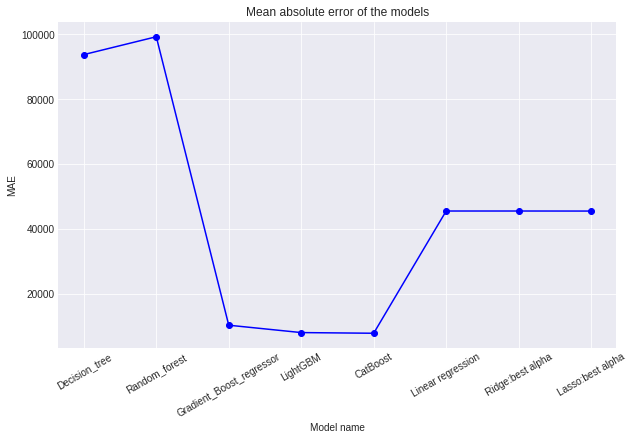

In [ ]:
metrics_plot('Test_MAE')

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
def ohe(df):
  cat_col = df.select_dtypes(exclude=[np.number]).columns.tolist()
  df = pd.get_dummies(data=df,columns=cat_col)
  new = []
  for i in df.columns:
    new.append("_".join(i.split()))
  for (i,j) in zip(df.columns,new):
    df.rename(columns={i:j},inplace=True)
  return df,list(df.columns)

In [ ]:
df,cols_list=ohe(df)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import catboost as cb

In [ ]:
from catboost import CatBoostRegressor,Pool

In [ ]:
X = df.drop("Expected_CTC",axis=1)
Y = df["Expected_CTC"]

In [ ]:
cbr = CatBoostRegressor()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
cat_col=df.select_dtypes(exclude=['int','float']).columns.tolist()

In [ ]:
#pool_train = Pool(X_train,Y_train,cat_features=cat_col)
#pool_test = Pool(X_test,Y_test,cat_features=cat_col)
#cbr.fit(pool_train,eval_set=pool_test,verbose=False)
cbr.fit(X_train,Y_train,verbose=False)

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
#creating an object that can calculate shap values
explainer = shap.TreeExplainer(cbr)

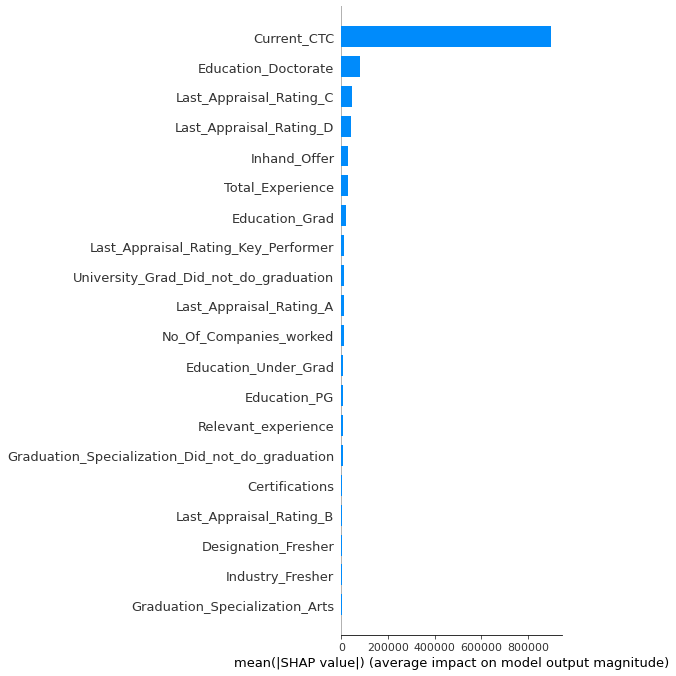

In [ ]:
#calculate shap values
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values,X_train,feature_names=X_train.columns,plot_type='bar')

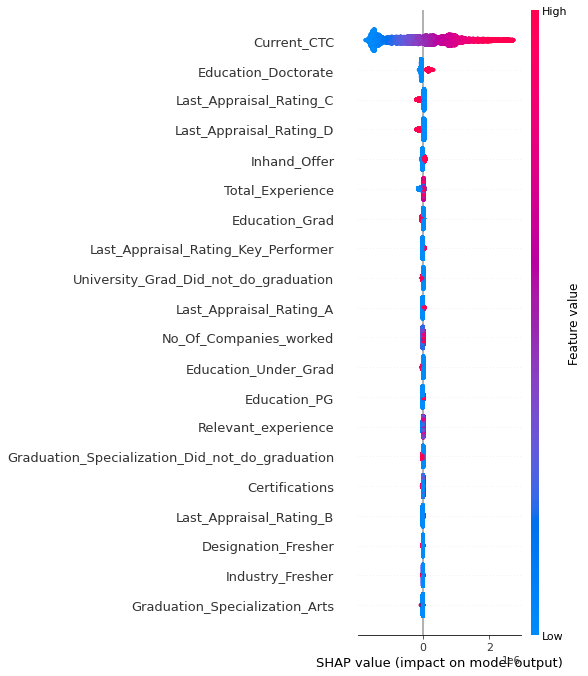

In [ ]:
#Summary plot
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)

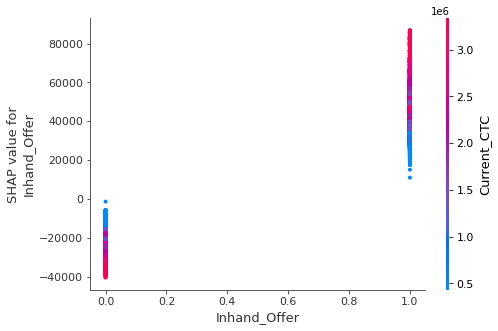

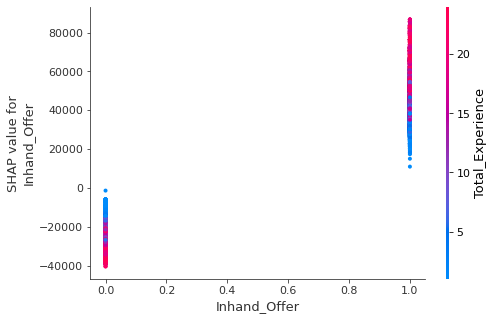

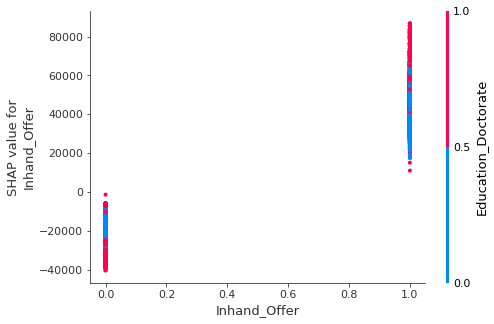

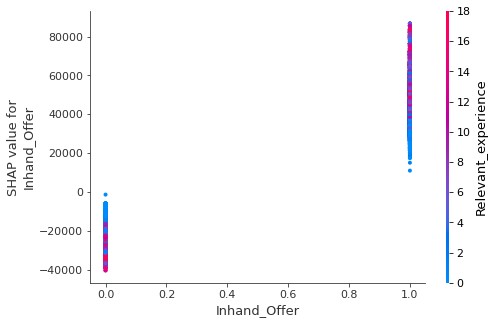

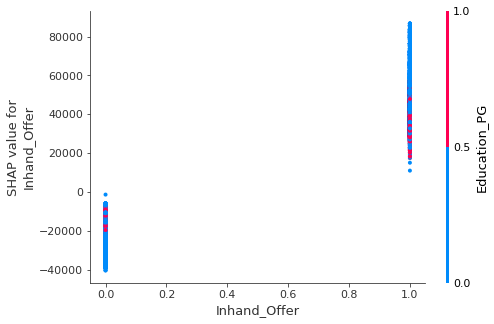

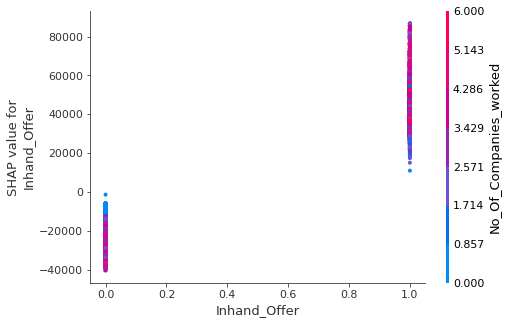

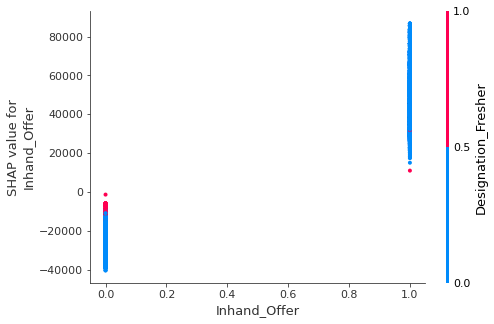

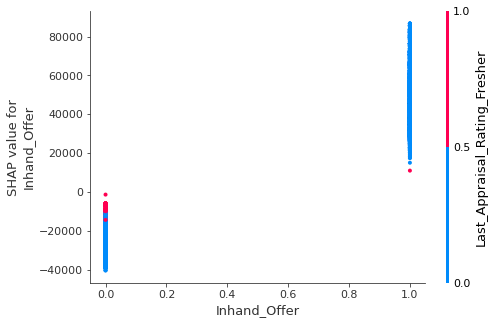

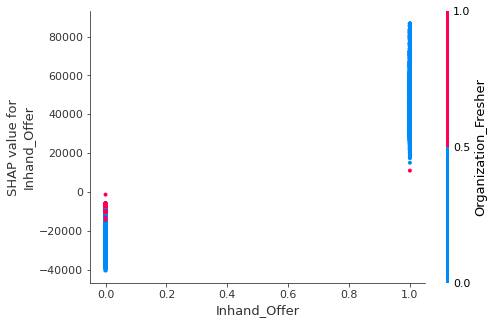

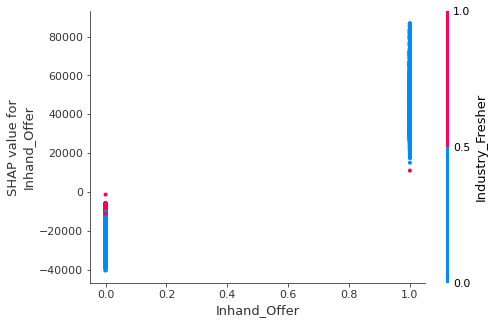

In [ ]:
# we can use shap.approximate_interactions to guess which features
# may interact with age
inds = shap.approximate_interactions("Inhand_Offer", shap_values, X_train)

# make plots colored by each of the top three possible interacting features
for i in range(10):
    shap.dependence_plot("Inhand_Offer", shap_values, X_train, interaction_index=inds[i])

In [ ]:
shap_values

array([[ 2.35471818e+04,  5.91097329e+03,  9.72815451e+05, ...,
         1.84597814e+04,  6.74658094e+00, -8.00291279e+03],
       [ 2.43268742e+03,  6.01801444e+03, -2.07865578e+05, ...,
         2.81674678e+04,  5.77943297e+01,  3.00876329e+04],
       [ 3.26393530e+04,  5.69057617e+03,  2.26085319e+06, ...,
         5.19693056e+04, -8.10604003e+01,  3.85776961e+04],
       ...,
       [ 3.62588250e+04,  6.16321348e+03,  2.06580002e+06, ...,
         4.56399313e+04, -6.90679907e+01, -8.68128694e+03],
       [ 6.29940237e+03, -1.18274996e+04, -5.18921372e+05, ...,
         2.88480503e+04,  3.44172904e+01, -7.37470416e+03],
       [ 4.02829447e+04,  6.62370806e+03,  2.55845071e+06, ...,
         3.70999328e+04, -2.33679035e+01, -1.35828614e+04]])

In [ ]:
df.shape

(25000, 130)

In [ ]:
df_shap = pd.DataFrame(data=shap_values,columns=X.columns)

In [ ]:
df_shap.sum()

Total_Experience                       16,590,558.78
Relevant_experience                    -4,939,190.20
Current_CTC                           -97,931,349.18
Inhand_Offer                            1,527,661.34
No_Of_Companies_worked                -13,094,614.67
                                           ...      
Last_Appraisal_Rating_B                   686,041.97
Last_Appraisal_Rating_C                21,100,033.70
Last_Appraisal_Rating_D               -27,392,781.09
Last_Appraisal_Rating_Fresher           1,906,298.81
Last_Appraisal_Rating_Key_Performer      -986,285.49
Length: 129, dtype: float64

In [ ]:
df_shap.apply(lambda x:abs(x).mean())

Total_Experience                       28,518.54
Relevant_experience                     8,158.68
Current_CTC                           898,531.52
Inhand_Offer                           28,761.43
No_Of_Companies_worked                  9,720.85
                                         ...    
Last_Appraisal_Rating_B                 3,725.53
Last_Appraisal_Rating_C                44,315.22
Last_Appraisal_Rating_D                42,755.16
Last_Appraisal_Rating_Fresher             203.58
Last_Appraisal_Rating_Key_Performer    12,535.69
Length: 129, dtype: float64

In [ ]:
df_shap.apply(lambda x:x<0).sum()

Total_Experience                        4048
Relevant_experience                     6098
Current_CTC                             8742
Inhand_Offer                           12198
No_Of_Companies_worked                  9116
                                       ...  
Last_Appraisal_Rating_B                12861
Last_Appraisal_Rating_C                 3379
Last_Appraisal_Rating_D                 3725
Last_Appraisal_Rating_Fresher          10456
Last_Appraisal_Rating_Key_Performer    14583
Length: 129, dtype: int64

In [ ]:
df.groupby(["Education"]).agg({"Expected_CTC":"mean"})

KeyError: ignored

In [ ]:
df.groupby(["Education_Doctorate"]).agg({"Total_Experience":"mean"})

In [ ]:
Doc=data1.loc[data1["Education"]=="Doctorate",:]
Doc.groupby("Role").agg({"Role":"count","Expected_CTC":"mean"}).rename(columns={"Role":"Count_of_role"}).sort_values(by="Count_of_role",ascending=False)

In [ ]:
Doc["Role"].value_counts(1)*100

In [ ]:
data1.groupby("Graduation_Specialization").agg({"Expected_CTC":"mean"}).sort_values(by="Expected_CTC",ascending=False)

NameError: ignored